In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib as plt
#%matplotlib notebook
#%matplotlib qt
from pprint import pprint

from __future__ import division


import os
os.listdir(os.getcwd())

import csv as csv
import json as json
import pickle as pickle

import scipy as scipy
from scipy.signal import find_peaks

THIS IS OLD CODE
needs manual adjustements for flies etc.

In [7]:
##open all files


#get to folder
date = '133023-120'
date_code = '1330120-'  #for fly names
date = '133023-120' #set to month-day-year format so it makes fly-IDs correctly, if your folders are not labelled this way make another variable called pathdate and use that for the path

#Pathstart = '/Users/ashsm/Documents/Bruker behavior/20230130'
Pathstart = 'C:/Users/ashsm/Documents/Stanford/bruker behavior/per'
SavePath = Pathstart
#SavePath = '/Users/ashsm/Desktop/Bruker behavior/results/20230130'

current_file = "Results_video_1_python_sorted.csv"

# Pathstart = '/Users/ashsm/Documents/python analysis/' + str(date) + "_raw_results"
print(Pathstart)
files = os.listdir(Pathstart)
print(files)




#make a list of filenames
file_name_list = []
for i in range(len(files)):
    if '.csv' in files[i]: 
        csv_file = []
        csv_file = files[i]
        file_name_list.append(csv_file)
        print (files[i])
    else:
        print('no')
print('file name list', file_name_list)

data_all = []
for single_file in file_name_list:
    with open(os.path.join(Pathstart, single_file), 'r') as rawfile:
       # reader = csv.reader(psth, delimiter="\t")
        reader = csv.reader(rawfile)
        data_single = list(reader)
        data_all.append(data_single)
#print('intdata', intdata)
print(len(data_all))
print(len(file_name_list))

##I could alternatively open files when I need them rather than storing them all in memory...

C:/Users/ashsm/Documents/Stanford/bruker behavior/per
['Results_video_1_python_sorted.csv']
Results_video_1_python_sorted.csv
file name list ['Results_video_1_python_sorted.csv']
1
1


In [8]:
#If there are double flashes set as True

double_flash = False
time_to_discount = 3000  #time to discount if double flash
#take_first_pulse = True #True if want to take the first pulse as the start, False if w

In [9]:
##set framerate
framerate_list = []
for single_video_index in range(len(data_all)):
    framerate = []
    framerate = 33
    framerate_list.append(framerate)

# list_of_10fr = ['5_25_Results_Video_1.csv', '5_25_Results_Video_2.csv', '5_25_Results_Video_3.csv', 
#                 '5_25_Results_Video_4.csv', '5_25_Results_Video_5.csv', '5_25_Results_Video_6.csv', 
#                 '5_25_Results_Video_7.csv']
# for single_video_index in range(len(data_all)):
#     framerate = []
#     if file_name_list[single_video_index] in list_of_10fr:
#         print(file_name_list[single_video_index])
#         #print(single_video_index)
#         framerate = 10
#         framerate_list.append(framerate)
#     else:
#         #print(file_name_list[single_video_index])
#         framerate = 33
#         framerate_list.append(framerate)
print(len(framerate_list))
print(framerate_list)

1
[33]


In [10]:
##set interval_ms
# interval_ms_list = []
# list_of_6s = []
# list_of_3s = []
# list_of_4s = [0]
# list_of_5s = [0]
# list_of_8s = []
# list_of_10s = [0]
# list_of_15s = [0]
# list_of_20s = ['Results_video_1_python.csv', 'Results_video_2_python.csv']
# list_of_40s = []
# list_of_30s = []  
# list_of_50s = [0]
# list_of_60s = []
# list_of_90s = []
# list_of_2s = []
# list_of_random = []
# list_of_none = []

### Bryans
list_map = {
    20: [current_file] #, 
    #20: ["Results_video_2_python.csv"]
}
# the dictionary key tells you what kind of video it is


def get_intervals_and_asks(list_map, file_name_list):
    """Get the PER interval and the ask type for each file in file_name_list.
    
    Args:
      list_map: A Dict of {interval: [list of filenames]} where interval is either the
        length of the interval in seconds or one of the strings {'random', 'none'}.
      file_name_list: A List of string filenames. The order determines the order of the output.
    Returns:
      A tuple of lists (interval_ms_list, ask) ordered to match file_name_list.
      interval_ms_list: a list of the interval length in milliseconds for each result in file_name_list
      ask: a list of ask types: 0 for fixed intervals, 'r' for random, and 'y' for none.
    """
    interval_ms_list = []
    ask = []
    for file_name in file_name_list:
        for key in list_map:
            if file_name in list_map[key]:
                if isinstance(key, str): # treating strings as a way of passing special values is common.
                    if key == 'none':
                        interval_ms_list.append(0)
                        ask.append('y')
                    if key == 'random':
                        interval_ms_list.append(0)
                        ask.append('r')
                else:  # if the key is not a string, it must be a number.
                    interval_ms_list.append(key * 1000)
                    ask.append(0)
                print(key, file_name, interval_ms_list[-1], ask[-1]) # optional if you like to print stuff.
    return interval_ms_list, ask
interval_ms_list, ask = get_intervals_and_asks(list_map, file_name_list)


print(len(interval_ms_list))
print((interval_ms_list))
print(ask)

20 Results_video_1_python_sorted.csv 20000 0
1
[20000]
[0]


In [82]:
# print(range(1,21))
# print(range(21,41))
# date_code = '0416-'
# set_1 = []
# for i in range(1,21):
#     set_1.append(str(date_code) + str(i))
# print(set_1)

In [83]:
##set fly number
# date_code = '0419-'
set_1 = []
for i in range(1,21):
    set_1.append(str(date_code) + str(i))
    
set_2 = []
for i in range(21,41):
    set_2.append(str(date_code) + str(i))



##########    FILL THIS IN    ##########################
    #specify different fly-IDs for each file. First specify fly-ID options then specify the files that have those flies in them


list_names_set_1 = [current_file]
#list_names_set_2 = None
list_names_set_2 = []

fly_number_list = []
for index in range(len(data_all)):
    fly_list = []
    if file_name_list[index] in list_names_set_1:
        print(file_name_list[index])
        fly_list = set_1
        fly_number_list.append(fly_list)
    if list_names_set_2 and len(list_names_set_2) > 0:
        if file_name_list[index] in list_names_set_2:
            print(file_name_list[index])
            fly_list = set_2
            fly_number_list.append(fly_list)

print(fly_number_list)
print(len(fly_number_list))
print(fly_number_list[0][0])
#list_names_set_3 = ['6_21_Results_Video_10.csv', '6_21_Results_Video_11.csv', '6_21_Results_Video_12.csv']



Results_video_1_python_sorted_3-25.csv
[['0325-1', '0325-2', '0325-3', '0325-4', '0325-5', '0325-6', '0325-7', '0325-8', '0325-9', '0325-10', '0325-11', '0325-12', '0325-13', '0325-14', '0325-15', '0325-16', '0325-17', '0325-18', '0325-19', '0325-20']]
1
0325-1


In [84]:
## list of functions to run before PER_analysis



def make_bins (time_range, binsize):
    """to make bins based on desired time range and binsize--use ms"""
    ms_binlength = np.asarray(range(int(time_range/binsize) + 1)) * binsize
    return ms_binlength

#to see if the column is a mean
def is_column_mean (data, row, column):
    """return true if cell contains 'mean'"""
    return "Mean" in data[row][column]

#collecting all of the values in a column
def get_means(data, column_number):  #this will pull from whatever you call the variable that you have gotten your csv data from and specified column 
    mean_list = []
    """gets column for (data, column_number) and eliminates the header (row 0) and puts it into a np.array"""
    for row in data: #row is the variable with the row number in it if use range(len(data)) it gives a list of the row if just use data
        #print row
        mean_list.append(row[column_number])
    means = np.asarray(mean_list[1:], dtype=np.float) #changes the list into a numpy array. [1:] means take the second number to the end 
    #(to get rid of the title). dtype changes from strings to np integers
    return means

def get_header(data, column_number):  #this will pull from whatever you call the variable that you have gotten your csv data from and specified column 
    title_list = []
    """gets header (row 0) for data set for specified column (data, column number)"""
    for row in data: #row is the variable with the row number in it if use range(len(data)) it gives a list of the row if just use data
        #print row
        title_list.append(row[column_number])
    titles = np.array(title_list[:1]) #changes the list into a numpy array. [:1] means take the first row
    return titles

def get_video_name(data, column):  #this will pull from whatever you call the variable that you have gotten your csv data from and specified column 
    video_name = []
    """gets video name (row 2) for data set for specified column (data, column number)--specify column 2 (1)"""
    for row in data: #row is the variable with the row number in it if use range(len(data)) it gives a list of the row if just use data
        #print row
        video_name.append(row[column])
    video = np.array(video_name[1:2]) #changes the list into a numpy array. [1:2] means take the second row
    return video

# find the mean(light) columns
def is_column_light (data, row, column):
    """return true if the column contains 'light' or 'Light'"""
    return "Light" in data[row][column] or "light" in data[row][column]

##specify which columns are PER by checking the column numbers in mean_titles
def is_column_PER (data, row, column):
    """return true if the column contains 'PER)' or 'per)' or 'Per)'"""
    return "PER)" in data[row][column] or "per)" in data[row][column] or 'Per)' in data[row][column]
    #in the fiji files the title is Mean(PER) so the ) lets it distinguish between PER and PER#

def is_column_PER2 (data, row, column):
    """return true if the column contains 'PER2' denoting second fly's PER"""
    return "PER2)" in data[row][column]

def is_column_PER3 (data, row, column):
    """return true if the column contains 'PER3' denoting third fly's PER"""
    return "PER3)" in data[row][column]

def is_column_PER4 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER4" in data[row][column]

def is_column_PER5 (data, row, column):
    """return true if the column contains 'PER2' denoting second fly's PER"""
    return "PER5" in data[row][column]

def is_column_PER6 (data, row, column):
    """return true if the column contains 'PER3' denoting third fly's PER"""
    return "PER6" in data[row][column]

def is_column_PER7 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER7" in data[row][column]

def is_column_PER8 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER8" in data[row][column]


def is_column_PER9 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER9" in data[row][column]

def is_column_PER10 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER10" in data[row][column]

def is_column_PER11 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER11" in data[row][column]

def is_column_PER12 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER12" in data[row][column]

def is_column_PER13 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER13" in data[row][column]

def is_column_PER14 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER14" in data[row][column]

def is_column_PER15 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER15" in data[row][column]

def is_column_PER16 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER16" in data[row][column]

def is_column_PER17 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER17" in data[row][column]

def is_column_PER18 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER18" in data[row][column]

def is_column_PER19 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER19" in data[row][column]

def is_column_PER20 (data, row, column):
    """return true if the column contains 'PER4' denoting fourth fly's PER"""
    return "PER20)" in data[row][column]



def make_title (date, video, fly_id, interval_s):
    title = str(date) + str(video).strip('[]') + str(fly_id) + '-flyID_' + str(interval_s) + '_int'
    return title

In [85]:
##functions that make things or process data

def make_raw_plots (PER_index, fly_number, split, save):
    """make raw plots--input PER(#)_indices, fly number, and if the plot should be split (y or n or b (both)) 
    and if it should be saved (y or n or b)"""
    #set up variables
    xtime = np.arange(1,len(means_matrix)+1)*framerate
    yPERm = means_matrix[:,PER_index]
    ylightm = means_matrix[:,light_indices] 
    yPERm_label = mean_titles[:,PER_index]
    ylightm_label = mean_titles[:,light_indices]
    #x and y for smoothed data
    #x2time = np.arange(1,len(smoothed_intensity_increases)+1)*framerate
    x2time = np.arange(1,len(smoothed_intensity_increases))*framerate  #using find_peaks don't drop last frame
    ysmoothlight = smoothed_intensity_increases[:,light_indices]*100 ##choosing a multiplier so I can see it compared to the line of PERintensity amp
    ysmoothlight_label = mean_titles[:,light_indices],'smooth increase'
    yuplight = intensity_up_50[:,light_indices_int]
    yuplight_label = mean_titles[:,light_indices],'intensity increase'
    ysmoothPER = smoothed_intensity_decreases[:,PER_index]*250 ##choosing different multiplier so I can see it compared to PERintensity and is differnt from y4
    ysmoothPER_label = mean_titles[:,PER_index],'smooth decrease'
    halfpoint = (max(xtime)/2)
    endpoint = max(xtime)
    
    
    
    
    #add to dictionary data_dict
    data_dict['light on frames'] = np.nonzero(intensity_up_50[:,light_indices_int])
    data_dict['raw PER'] = means_matrix[:,PER_index]
    #data_dict['raw light'] =map(float, means_matrix[:,light_indices].tolist())
    data_dict['raw light'] =means_matrix[:,light_indices]
          
    
    
    #make title
    title = make_title(date, video, fly_number, interval_s)
    
    if split == 'n' or split == 'b':
        print('full-raw' + str(fly_number))
        #plotting full plot
        fig2 = plt.figure(figsize=(50,30))
        plt.plot(xtime,ylightm,label = ylightm_label, color = 'darkorange', zorder = 1)   ##plots the light on/off lines from raw
        plt.plot(xtime,yPERm,label = yPERm_label, color = 'dodgerblue', zorder = 2)       ##plots the PER out/in lines from raw
        plt.scatter(xtime, ysmoothPER, color = 'k', zorder = 3)
        
        #plt.scatter(x2time,ysmoothPER, s=1, label = ysmoothPER_label, color = 'k', zorder = 3)  ##plots the points where found PER intensity decrease
        ##plt.scatter(x2time,yuplight, label = yuplight_label)  ##can't do this one because the length is different. fix length to plot with PER
        #plt.scatter(x2time,ysmoothlight, label = ysmoothlight_label)
        plt.xlabel('time (ms)')
        plt.ylabel('intensity changes')
        plt.title(str(title) + '_full-raw-plot')
        plt.show()
        if save == 'y':
            ##make path for saving the files
            #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
            rawPath = SavePath + "/" + str(date) + "/raw"
            if os.path.exists(rawPath):
                print('folder there')
            else:
                os.makedirs(rawPath)
            fig2.savefig(os.path.join(rawPath, str(title) + '_full-raw.png'))
        else:
            print('full raw not saved  :'+ str(fly_number))
        
    if split == 'y' or split == 'b':
        print('part-1-raw' + str(fly_number))
        #plot split plots
        #first half
        fig2 = plt.figure(figsize=(50,30))
        plt.plot(xtime,ylightm,label = ylightm_label, color = 'darkorange', zorder = 1)
        plt.plot(xtime,yPERm,label = yPERm_label, color = 'dodgerblue', zorder = 2)
        #plt.scatter(x2time,ysmoothlight, s=1, label = ysmoothlight_label, color = 'c')
        plt.scatter(xtime, ysmoothPER, color = 'k', zorder = 3)

        #plt.scatter(x2time,ysmoothPER, s=1, label = ysmoothPER_label, color = 'k', zorder = 3)
        plt.xlabel('time (ms)')
        plt.ylabel('intensity_up')
        plt.title(str(title) + '_part-1-raw') 
        plt.xlim(0,halfpoint)
        plt.show()
        if save == 'y':
            ##make path for saving the files
            #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
            rawPath = SavePath + "/" + str(date) + "/raw"
            if os.path.exists(rawPath):
                print('folder there')
            else:
                os.makedirs(rawPath)
            fig2.savefig(os.path.join(rawPath, str(title) + '_part-1-raw.png'))
        else:
            print('raw split part 1 not saved  ID:'+ str(fly_number))
            
        ##second half
        print('part-2-raw' + str(fly_number))
        fig2 = plt.figure(figsize=(50,30))
        plt.plot(xtime,ylightm,label = ylightm_label, color = 'darkorange', zorder = 1)
        plt.plot(xtime,yPERm,label = yPERm_label, color = 'dodgerblue', zorder = 2)
        #plt.scatter(x2time,ysmoothlight, s=1, label = ysmoothlight_label, color = 'c')
        
        plt.scatter(xtime, ysmoothPER, color = 'k', zorder = 3)
        #plt.scatter(x2time,ysmoothPER, s=1, label = ysmoothPER_label, color = 'k', zorder = 3)
        plt.xlabel('time (ms)')
        plt.ylabel('intensity_up')
        plt.title(str(title) + '_part-2-raw') 
        plt.xlim(halfpoint,endpoint)
        plt.show()
        if save == 'y':
            ##make path for saving the files
            #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
            rawPath = SavePath + "/" + str(date) + "/raw"
            if os.path.exists(rawPath):
                print('folder there')
            else:
                os.makedirs(rawPath)
            fig2.savefig(os.path.join(rawPath, str(title) + '_part-2-raw.png'))          
        else:
            print('raw split part 2 not saved  ID:'+ str(fly_number))
            

# ##make a histogram of PER responses post light turning on
# #list of times that the light turned on is light_up_50 
# #I will use the smoothened matrix for PER extensions
def make_histogram_by_light (PER_index, fly_number, save):
    """make histogram by light and save (type 'y' or 'n')"""
    light_up_50_fix = light_up_50
    #print(light_up_50_fix)
    #get PER responses from smoothened matrix comparison
    #use decreases because PER is out when intensity drops
    PER_index = np.asarray(PER_index)
   # print(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)
    #print('PER Smooth out', PER_smooth_out)
    
    # takes the time of PER, then looks at all the times of light that are less than that PER and takes the last one to add to a list
    #p is current PER looking at, light_up_50_fix is all the light times, PER_smooth_out is times PER extends
    #for p in the array of PERs, take the time of the current PER and subtract the time of previous light pulse 
    #p-light_up_50_fix[light_up_50_fix <= p][-1] --- time of PER - last item in list ([-1]) of the list of light times before or at the time of PER
    #if p is after the first light pulse ( p > light_up_50_fix[0])
    #and the frame after PER is not a light pulse ((p+1) not in light_up_50_fix) to make sure the light doesn't come on mid trial and cause a PER
    light_to_PER_time = []
    for p in PER_smooth_out:
        if double_flash == True: #make sure to check both lists for light immediately previously
            light_to_PER_time = np.asarray([p-light_up_50_fix[light_up_50_fix <= p][-1] for p in PER_smooth_out if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and (p+1) not in all_light_up_50 and p not in all_light_up_50])
        else: 
            light_to_PER_time = np.asarray([p-light_up_50_fix[light_up_50_fix <= p][-1] for p in PER_smooth_out if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix])
        
    #make title
    title = make_title(date, video, fly_number, interval_s)
    
    #plot histogram
    fig = plt.figure()
    fps_adjusted_light_to_PER_time = []
    fps_adjusted_light_to_PER_time = light_to_PER_time * framerate
    plt.hist(fps_adjusted_light_to_PER_time, interval_ms_binlength, histtype ='bar')
    plt.title(str(title) + '_histogram_of_all_PER')
    plt.xlabel('time (ms)')
    plt.show()
    if save == 'y':
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        histPERpath = SavePath + "/" + str(date) + "/histogram all PER"
        histPERpathGraph = histPERpath + "/graphs"
        if os.path.exists(histPERpath):
            print('folder there')
        else:
            os.makedirs(histPERpath)
        if os.path.exists(histPERpathGraph):
            print('folder there')
        else:
            os.makedirs(histPERpathGraph)
        fig.savefig(os.path.join(histPERpathGraph, str(title) + '_histogram_of_all_PER.png'), bbox_inches="tight")
    else:
        print ('histogram by light not saved  ID:'+ str(fly_number))
        
        
        
    
    
    ###add to dictionary
    data_dict['frames PER out--smoothed'] = PER_smooth_out  
    data_dict['light to PER time'] = light_to_PER_time
    
    
    


# to get first PER
# ##take just the first response after initial response post light on and before light on again (or after 1s in case the fly extends prob twice)
def get_first_PER (PER_index, fly_number, time_post_light_ms, save):
    """get first PER time_post_light_ms (generally used 1000) after light turns on and before next light turns on"""
    light_up_50_fix = light_up_50
    
    ##I need to convert ms into frames for exclusion
    frames_of_eclusion = int(round(time_post_light_ms/framerate))
        
    #use decreases because PER is out when intensity drops
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)

    #get just first PER after light on and after light response ( after first second)
    light_to_first_PER_time = []
    after_first_PER_time = []
    too_early_PER = []
    light_times_with_PER = []
    true_PER_times = []
    for p in PER_smooth_out:
        if double_flash == True: #also check all light list
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and (p+1) not in all_light_up_50 and p not in all_light_up_50:
                PER_time = []
                light_time = []
                light_time = light_up_50_fix[light_up_50_fix <=p][-1]
                #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
                PER_time = p - light_time
                #p is the actual time of the PER--could save this

                #to remove probe
                    #if per_time

                if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                    #Want it to be the previous element in the list
                    if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                        light_to_first_PER_time.append(PER_time)
                        true_PER_times.append(p)  #add to true list
                        #print('first', PER_time)
                    else:
                        #I need to compare this to the true time of the PER not the light_to_first_PER...
                        if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                            light_to_first_PER_time.append(PER_time)
                            true_PER_times.append(p)  #add to true list
                            light_times_with_PER.append(light_time) #to see the light times <test>

                        if true_PER_times[-1] > light_time:
                            after_first_PER_time.append(PER_time)
                else: 
                    too_early_PER.append(PER_time)
        else: #single flash version
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix:
                PER_time = []
                light_time = []
                light_time = light_up_50_fix[light_up_50_fix <=p][-1]
                #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
                PER_time = p - light_time
                #p is the actual time of the PER--could save this

                #to remove probe
                    #if per_time

                if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                    #Want it to be the previous element in the list
                    if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                        light_to_first_PER_time.append(PER_time)
                        true_PER_times.append(p)  #add to true list
                        #print('first', PER_time)
                    else:
                        #I need to compare this to the true time of the PER not the light_to_first_PER...
                        if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                            light_to_first_PER_time.append(PER_time)
                            true_PER_times.append(p)  #add to true list
                            light_times_with_PER.append(light_time) #to see the light times <test>

                        if true_PER_times[-1] > light_time:
                            after_first_PER_time.append(PER_time)
                else: 
                    too_early_PER.append(PER_time)
    
    #make title
    title = make_title(date, video, fly_number, interval_s)
            
    #convert to ms
    fps_adj_light_to_first_PER_time = []
    light_to_first_PER_time = np.asarray(light_to_first_PER_time)
    fps_adj_light_to_first_PER_time = light_to_first_PER_time * framerate
    print('first per time', fps_adj_light_to_first_PER_time)
    fig = plt.figure()
    plt.hist(fps_adj_light_to_first_PER_time, probe_ms_binlength, histtype ='bar', rwidth = 0.8)
    plt.title(str(title) + ' histogram of first PER')
    plt.xlabel('time (ms)')
    plt.show()
        
    if save == 'y':
        ##make path for saving the files
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        firstPERpath = SavePath + "/" + str(date) + "/first PER"
        firstPERgraphPath = firstPERpath + "/graphs"
        if os.path.exists(firstPERpath):
            print('folder there')
        else:
            os.makedirs(firstPERpath)
        if os.path.exists(firstPERgraphPath):
            print('folder there')
        else:
            os.makedirs(firstPERgraphPath)
            
        np.savetxt(os.path.join(firstPERpath, str(title) + '_first_PER.csv'), fps_adj_light_to_first_PER_time)
        fig.savefig(os.path.join(firstPERgraphPath, str(title) + '_first_PER.png'), bbox_inches="tight")
    else:
        print('first PER not saved'+ str(fly_number))
        
        
        
    ##add to dictionary
    data_dict['first PER (frames)'] = light_to_first_PER_time
    data_dict['first PER (ms)'] = fps_adj_light_to_first_PER_time

def get_single_PER_smooth_totals (PER_index, fly_number, save):
    """get single PER smooth and return the total for each fly"""
    #light_up_50_fix = light_up_50
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)
    single_PER_smooth = []
    removed_PER_smooth = []
    for i in PER_smooth_out:
        #if the single_PER smooth list is empty or the previous item in the list is 3 less than than the current
        if not single_PER_smooth or i > single_PER_smooth[-1] + 3:
            single_PER_smooth.append(i)
   
    data_dict['total single PER'] = single_PER_smooth
    
    return len(single_PER_smooth)
    
            
# ###Adjusting PER thresholded responses (in previous) so there is only 1 PER per 100ms
def make_single_PER_histogram_by_light (PER_index, fly_number, save):
    """histogram of single PER (within 100ms)"""
    light_up_50_fix = light_up_50
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)
    
    single_PER_smooth = []
    removed_PER_smooth = []
    frame_seperation = int(100/framerate)
    for i in PER_smooth_out:
        #if the single_PER smooth list is empty or the previous item in the list is 3 less than than the current
        if not single_PER_smooth or i > single_PER_smooth[-1] + frame_seperation:
            single_PER_smooth.append(i)

    light_to_PER_single_time = []
    for p in single_PER_smooth:
        if double_flash == True: 
            light_to_PER_single_time = np.asarray([p-light_up_50_fix[light_up_50_fix <= p][-1] for p in single_PER_smooth 
                                            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in all_light_up_50 and (p+1) not in all_light_up_50])
        else: 
            light_to_PER_single_time = np.asarray([p-light_up_50_fix[light_up_50_fix <= p][-1] for p in single_PER_smooth 
                                        if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix])


    fps_adj_light_to_PER_single_time = []
    fps_adj_light_to_PER_single_time = light_to_PER_single_time * framerate
    
    #make title
    title = make_title(date, video, fly_number, interval_s)
    
    #probe length histogram      
    fig = plt.figure()
    plt.hist(fps_adj_light_to_PER_single_time, probe_ms_binlength, histtype ='bar')
    plt.xlabel('time (ms)')
    plt.ylabel('number of single PER (within 3 frames)')
    plt.title(str(title) + 'single PER histogram')
    plt.ylim(0,20)
    plt.yticks(np.arange(0,20, step = 5))
    plt.show()
    
    fig = plt.figure()
    fps_adjusted_light_to_PER_single_time = []
    fps_adjusted_light_to_PER_single_time = light_to_PER_single_time * framerate
    plt.hist(fps_adjusted_light_to_PER_single_time, interval_ms_binlength, histtype ='bar')
    plt.title(str(title) + 'single PER histogram')
    plt.xlabel('time (ms)')
    plt.ylim(0,20)
    plt.yticks(np.arange(0,20, step = 5))
    plt.show()
    
    fig = plt.figure()
    fps_adjusted_light_to_PER_single_time = []
    fps_adjusted_light_to_PER_single_time = light_to_PER_single_time * framerate
    plt.hist(fps_adjusted_light_to_PER_single_time, interval_ms_binlength, histtype ='bar')
    plt.title(str(title) +'PSTH of PER--log')
    plt.ylabel('number of PER')
    plt.xlabel('time (ms)')
    plt.yscale('log')
    
                                              
    data_dict['PER 100ms apart (frames)'] = single_PER_smooth
    data_dict['PER 100ms apart--frames from previous light'] = light_to_PER_single_time
    data_dict['PER 100ms apart--ms from previous light'] = fps_adj_light_to_PER_single_time
    
    if save == 'y':
        ##make path for saving the files
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        histSinglePERpath = SavePath + "/" + str(date) + "/histogram single PER"
        histSinglePERpathgraph = histSinglePERpath + "/graphs"
        if os.path.exists(histSinglePERpath):
            print('folder there')
        else:
            os.makedirs(histSinglePERpath)
        if os.path.exists(histSinglePERpathgraph):
            print('folder there')
        else:
            os.makedirs(histSinglePERpathgraph)
        np.savetxt(os.path.join(histSinglePERpath, str(title) + 'single PER.txt'), fps_adj_light_to_PER_single_time)
        fig.savefig(os.path.join(histSinglePERpathgraph, str(title) + '_single_PER.png'), bbox_inches="tight")
    else:
        print ('single histogram not saved'+ str(fly_number))
    return fps_adj_light_to_PER_single_time
        
def get_video_information(save):
    """returns number_of_pulses, light_interval_time, number_probe_trials, probe_length_time and saves"""
    light_up_50_fix = light_up_50
    light_up_50_fix = np.asarray(light_up_50_fix)
    light_down_50 = np.squeeze(np.where(intensity_down_50[:,light_indices_int]))
    #light_down_50 = np.nonzero(intensity_down_50[:,light_indices_int])  #this is the old version
    #light_down_50 = light_down_50
    number_of_pulses = len(light_up_50_fix)
    
    interval_list = get_light_interval_list()
    print(interval_list)
    calc_interval_length = np.median(interval_list[0:10])  #new change for increasing light so it gets the starting interval rather than the adjusted
    print('calc interval in ms', calc_interval_length*framerate)
    
    light_interval = []
    light_interval = light_up_50_fix[1] - light_up_50_fix[0]
    #to prevent calculating light_interval as probe trial if the first round is a probe trial
    if light_interval > 1.5 * calc_interval_length or light_interval < 5:
        light_interval = light_up_50_fix[3] - light_up_50_fix[2]
    if light_interval > 1.5 * calc_interval_length or light_interval < 5:
        light_interval = light_up_50_fix[4] - light_up_50_fix[3]
    if light_interval > 1.5 * calc_interval_length or light_interval < 5:
        light_interval = light_up_50_fix[5] - light_up_50_fix[4]
    print(light_interval)
    light_interval_time = light_interval * framerate
    
    #REMOVING light_on_length_frames 7-3-19
    
#     light_on_length_frames = []
#     light_on_length_frames = light_down_50[1] - light_up_50_fix[1]
    
    #light_interval_time is the ms of time between two trials
    #light_interval is the number of frames between two light trials
    ##I want it to see if the difference between two light on times is more than the length of the light_interval 
    #I actually want when the light goes off to get the true start time of the probe trial
    #print(range(len(light_down_50)-1)) #-1 because of subtraction
#     probe_trial_start = []  #frame where each probe trial starts
#     for i in range(len(light_down_50)-1):
#         if (light_down_50[i+1] - light_down_50[i]) > (light_interval+15):
#             probe_trial_start.append(light_down_50[i])
#     #print('probe trial start', probe_trial_start)
    
    
    ##NEW WAY OF GETTING PROBE TRIAL START## (looks only at onset of light trial to set start, but I think that is ok. otherwise could add a frame to the start)
    probe_trial_start = []
    for i in range(len(light_up_50_fix)-1):
        if (light_up_50_fix[i+1] - light_up_50[i]) > (light_interval*2): #new change for increasing trials, it used to be this  > (light_interval + 15):
            probe_trial_start.append(light_up_50[i])
    
    
    
    number_probe_trials = len(probe_trial_start)
    print('number of probe trials: ', number_probe_trials)
    
    
    if number_probe_trials > 1:
        #probe_trial_start will now give the frames that the light is first off when the probe trial begins
        #I want to get a histogram of PERs from the time the light goes off to the time that the light goes on again
        #find the time the light goes on after a probe trial
        #I have the list of frames that the light goes off and want to find the next frame that the light goes on
        #find frame of last light before probe then find the next frame in light_up_50
        #find the value in the last light before probe that is in light_up_50 and append the next frame to a new list
        last_light_before_probe = []
        for i in range(len(light_up_50_fix)-1):
            if (light_up_50_fix[i+1] - light_up_50_fix[i]) > (light_interval + 15):   #the +15 is just a buffer region in case the frames don't catch perfect
                last_light_before_probe.append(light_up_50_fix[i])
        probe_trial_end = []
        for i in range(len(last_light_before_probe)):
            for j in range(len(light_up_50_fix)):
                if last_light_before_probe[i] == light_up_50_fix[j]:
                    probe_trial_end.append(light_up_50_fix[j+1])

        ##this is getting the probe length as starting the frame the light goes off and ending the frame the light goes on. 
        #I really want the frame before the light goes on
        #to change probe_trial_end to one frame earlier
        probe_trial_end_before_light_on = []
        probe_trial_end_array = np.asarray(probe_trial_end)
        probe_trial_end_before_light_on = probe_trial_end_array - 1

        #just to check the probe length
        probe_length_wlight = probe_trial_end[0]-last_light_before_probe[0]
        probe_length_time = probe_length_wlight * framerate
        
        data_dict['flash determined probe length'] = probe_length_time
    else: 
        data_dict['flash determined probe length'] = 0
        probe_length_time = 0
        probe_length_wlight = 0
        last_light_before_probe = [0]
        probe_length_wlight = 0
        probe_trial_end_before_light_on = [0]
        
        
    #get length of video
    length_video = []
    length_video = framerate * len(means_matrix)
    
    data_dict['date'] = date
    data_dict['video-number'] = str(video).strip('[]')
    data_dict['framerate'] = framerate
    data_dict['threshold for smoothing'] = smoothed_threshold
    data_dict['flash determined interval length'] = light_interval_time
    data_dict['number of flashes'] = number_of_pulses
    data_dict['number of probe trials'] = number_probe_trials
    data_dict['video length (ms)'] = length_video
    
                                              
                                              
    #make file to save info
    if save == 'y':
        ##make path for saving the files
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        videoinfopath = SavePath + "/" + str(date) + "/video info"
        if os.path.exists(videoinfopath):
            print('folder there')
        else:
            os.makedirs(videoinfopath)
        header_video_info = ['date', 'video-number', 'framerate', 'threshold', 'interval-length', 'probe-length', '#light-pulses', '#probe-trials', 'length of video']
        video_name = str(video).strip('[]')
        video_info = [date, video_name, framerate, smoothed_threshold, light_interval_time, probe_length_time, number_of_pulses, number_probe_trials, length_video]
        all_video_info = [header_video_info, video_info]
        np.savetxt(os.path.join(videoinfopath, date + str(video).strip('[]') + 'all_video_info.txt'), all_video_info, fmt='%s')
    else: 
        print("video info not saved"+ str(fly_number))
    return number_of_pulses, light_interval_time, number_probe_trials, probe_length_time, last_light_before_probe, probe_trial_end_before_light_on

def probe_trial_histogram (PER_index, fly_number, save):
    """get probe trials and plot histogram after every probe light pulse"""
    

    #run get video info function and store output in variables
    number_of_pulses, light_interval_time, number_probe_trials, probe_length_time, last_light_before_probe, probe_trial_end_before_light_on = get_video_information(save)
    
    
    #get single PER smooth
    light_up_50_fix = light_up_50
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)
    
    single_PER_smooth = []
    removed_PER_smooth = []
    for i in PER_smooth_out:
        #if the single_PER smooth list is empty or the previous item in the list is 3 less than than the current
        if not single_PER_smooth or i > single_PER_smooth[-1] + 3:
            single_PER_smooth.append(i)
    
    single_PER_in_probe = []
    for trial_index in xrange(len(last_light_before_probe)):
        for event_time in single_PER_smooth:
            PER_in_trial = (event_time > last_light_before_probe[trial_index] and event_time < probe_trial_end_before_light_on[trial_index])
            if PER_in_trial:  ##if PER_in_trial is true
                PER_in_trial_time = event_time - last_light_before_probe[trial_index]
                single_PER_in_probe.append(PER_in_trial_time)
    #by time
    single_PER_in_probe_array = np.asarray(single_PER_in_probe)
    single_PER_in_probe_fps = []
    single_PER_in_probe_fps = single_PER_in_probe_array * framerate
    
    #make title
    title = make_title(date, video, fly_number, interval_s)
    
    #plot
    fig = plt.figure()            
    plt.hist(single_PER_in_probe_fps, probe_ms_binlength, histtype ='bar', rwidth = 0.8)
    plt.xlabel('time (ms)')
    plt.ylabel('number of single PER')
    plt.title(str(title) + '\n Time of probe trial beginning (light on)')
    plt.ylim(0, 11)
    plt.show()
                                              
                                              
    data_dict['PER in probe(frames) from previous light'] = single_PER_in_probe
    data_dict['PER in probe(ms) from previous light'] = single_PER_in_probe_fps
    
    if save == 'y':
        ##make path for saving the files
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        probePath = SavePath + "/" + str(date) + "/probe"
        probePathgraph = probePath + "/graphs"
        if os.path.exists(probePath):
            print('folder there')
        else:
            os.makedirs(probePath)
        if os.path.exists(probePathgraph):
            print('folder there')
        else:
            os.makedirs(probePathgraph)
        fig.savefig(os.path.join(probePathgraph, str(title) + '_probe.png'), bbox_inches="tight")
        np.savetxt(os.path.join(probePath, str(title) + 'probe.txt'), single_PER_in_probe_fps)
    else: 
        print("probe and video info not saved" + str(fly_number))

In [86]:

# to get first PER
# ##take just the first response after initial response post light on and before light on again (or after 1s in case the fly extends prob twice)
def get_first_PER_probe_only (PER_index, fly_number, time_post_light_ms, save):
    """get first PER time_post_light_ms (generally used 1000) after light turns on and before next light turns on"""
    light_up_50_fix = light_up_50
    ##I need to convert ms into frames for exclusion
    frames_of_eclusion = int(round(time_post_light_ms/framerate))
        
    #use decreases because PER is out when intensity drops
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)

    #get just first PER after light on and after light response ( after first second)
    light_to_first_PER_time = []
    after_first_PER_time = []
    too_early_PER = []
    light_times_with_PER = []
    true_PER_times = []
    for p in PER_smooth_out:
        if double_flash == True: #also check all light list
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1] and (p+1) not in all_light_up_50 and p not in all_light_up_50:
                PER_time = []
                light_time = []
                light_time = light_up_50_fix[light_up_50_fix <=p][-1]
                #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
                PER_time = p - light_time
                #p is the actual time of the PER--could save this

                #to remove probe
                #prev light time = light_time
                #next_light_time = time immediately after
                next_light_time = light_up_50_fix[light_up_50_fix >=p][0]
                light_difference = next_light_time - light_time
                if light_difference > interval_ms / framerate * 2:  #1.5: #adjusted this to 2 for increase trials
                    #print('probe trial')
                    if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                        #Want it to be the previous element in the list
                        if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                            light_to_first_PER_time.append(PER_time)
                            true_PER_times.append(p)  #add to true list
                            #print('first', PER_time)
                        else:
                            #I need to compare this to the true time of the PER not the light_to_first_PER...
                            if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                                light_to_first_PER_time.append(PER_time)
                                true_PER_times.append(p)  #add to true list
                                light_times_with_PER.append(light_time) #to see the light times <test>

                            if true_PER_times[-1] > light_time:
                                after_first_PER_time.append(PER_time)
                    else: 
                        too_early_PER.append(PER_time)
                elif light_difference <= interval_ms * 2:  #1.5: #adjusted this to 2 for increase trials
                   # print('regular trial')
                    continue
            
            else: #single flash version
                if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1]:
                    PER_time = []
                    light_time = []
                    light_time = light_up_50_fix[light_up_50_fix <=p][-1]
                    #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
                    PER_time = p - light_time
                    #p is the actual time of the PER--could save this

                    #to remove probe
                    #prev light time = light_time
                    #next_light_time = time immediately after
                    next_light_time = light_up_50_fix[light_up_50_fix >=p][0]
                    light_difference = next_light_time - light_time
                    if light_difference > interval_ms / framerate * 2:  #1.5: #adjusted this to 2 for increase trials
                        #print('probe trial')
                        if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                            #Want it to be the previous element in the list
                            if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                                light_to_first_PER_time.append(PER_time)
                                true_PER_times.append(p)  #add to true list
                                #print('first', PER_time)
                            else:
                                #I need to compare this to the true time of the PER not the light_to_first_PER...
                                if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                                    light_to_first_PER_time.append(PER_time)
                                    true_PER_times.append(p)  #add to true list
                                    light_times_with_PER.append(light_time) #to see the light times <test>

                                if true_PER_times[-1] > light_time:
                                    after_first_PER_time.append(PER_time)
                        else: 
                            too_early_PER.append(PER_time)
                    elif light_difference <= interval_ms * 2:  #1.5: #adjusted this to 2 for increase trials
                       # print('regular trial')
                        continue
                

    #make title
    title = make_title(date, video, fly_number, interval_s)
            
    #convert to ms
    fps_adj_light_to_first_PER_time = []
    light_to_first_PER_time = np.asarray(light_to_first_PER_time)
    fps_adj_light_to_first_PER_time = light_to_first_PER_time * framerate
  #  print('first per time', fps_adj_light_to_first_PER_time)
    fig = plt.figure()
    plt.hist(fps_adj_light_to_first_PER_time, probe_ms_binlength, histtype ='bar', rwidth = 0.8)
    plt.title(str(title) + '\n histogram of first PER probe only')
    plt.xlabel('time (ms)')
    plt.show()
    
    data_dict['first PER probe only (frames)'] = light_to_first_PER_time
    data_dict['first PER probe only (ms)'] = fps_adj_light_to_first_PER_time
        
    if save == 'y':
        ##make path for saving the files
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        firstPERpath = SavePath + "/" + str(date) + "/first PER probe only"
        firstPERgraphPath = firstPERpath + "/graphs"
        if os.path.exists(firstPERpath):
            print('folder there')
        else:
            os.makedirs(firstPERpath)
        if os.path.exists(firstPERgraphPath):
            print('folder there')
        else:
            os.makedirs(firstPERgraphPath)
            
        np.savetxt(os.path.join(firstPERpath, str(title) + '_first_PER_probe_only.csv'), fps_adj_light_to_first_PER_time)
        fig.savefig(os.path.join(firstPERgraphPath, str(title) + '_first_PER_probe_only.png'), bbox_inches="tight")
    else:
        print('first PER not saved'+ str(fly_number))
        

# to get first PER
# ##take just the first response after initial response post light on and before light on again (or after 1s in case the fly extends prob twice)
def get_first_PER_no_probe (PER_index, fly_number, time_post_light_ms, save):
    """get first PER time_post_light_ms (generally used 1000) after light turns on and before next light turns on"""
    light_up_50_fix = light_up_50
    ##I need to convert ms into frames for exclusion
    frames_of_eclusion = int(round(time_post_light_ms/framerate))
        
    #use decreases because PER is out when intensity drops
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)

    #get just first PER after light on and after light response ( after first second)
    light_to_first_PER_time = []
    after_first_PER_time = []
    too_early_PER = []
    light_times_with_PER = []
    true_PER_times = []
    for p in PER_smooth_out:
        if double_flash == True: 
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1] and (p+1) not in all_light_up_50 and p not in all_light_up_50:
                PER_time = []
                light_time = []
                light_time = light_up_50_fix[light_up_50_fix <=p][-1]
                #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
                PER_time = p - light_time
                #p is the actual time of the PER--could save this

                #to remove probe
                #prev light time = light_time
                #next_light_time = time immediately after
                next_light_time = light_up_50_fix[light_up_50_fix >=p][0]
                light_difference = next_light_time - light_time
                if light_difference > interval_ms/ framerate * 2:  #1.5: #adjusted this to 2 for increase trials
                    #print('probe trial')
                    continue
                elif light_difference <= interval_ms * 2: # 1.5: #adjusted this to 2 for increase trials
                    #print('regular trial')
                    if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                        #Want it to be the previous element in the list
                        if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                            light_to_first_PER_time.append(PER_time)
                            true_PER_times.append(p)  #add to true list
                            #print('first', PER_time)
                        else:
                            #I need to compare this to the true time of the PER not the light_to_first_PER...
                            if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                                light_to_first_PER_time.append(PER_time)
                                true_PER_times.append(p)  #add to true list
                                light_times_with_PER.append(light_time) #to see the light times <test>

                            if true_PER_times[-1] > light_time:
                                after_first_PER_time.append(PER_time)
                    else: 
                        too_early_PER.append(PER_time)
            
            else: #single flash version
                if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1]:
                    PER_time = []
                    light_time = []
                    light_time = light_up_50_fix[light_up_50_fix <=p][-1]
                    #PER_times = p-light_up_50_fix[light_up_50_fix <= p][-1]
                    PER_time = p - light_time
                    #p is the actual time of the PER--could save this

                    #to remove probe
                    #prev light time = light_time
                    #next_light_time = time immediately after
                    next_light_time = light_up_50_fix[light_up_50_fix >=p][0]
                    light_difference = next_light_time - light_time
                    if light_difference > interval_ms/ framerate * 2:  #1.5: #adjusted this to 2 for increase trials
                        #print('probe trial')
                        continue
                    elif light_difference <= interval_ms * 2:  #1.5: #adjusted this to 2 for increase trials
                        #print('regular trial')
                        if PER_time > frames_of_eclusion: ##to remove the early responses to the previous light
                            #Want it to be the previous element in the list
                            if len(light_to_first_PER_time) < 1: #if the list is empty add the time in 
                                light_to_first_PER_time.append(PER_time)
                                true_PER_times.append(p)  #add to true list
                                #print('first', PER_time)
                            else:
                                #I need to compare this to the true time of the PER not the light_to_first_PER...
                                if true_PER_times[-1] < light_time: ##if the last element added to the list is before the current light time
                                    light_to_first_PER_time.append(PER_time)
                                    true_PER_times.append(p)  #add to true list
                                    light_times_with_PER.append(light_time) #to see the light times <test>

                                if true_PER_times[-1] > light_time:
                                    after_first_PER_time.append(PER_time)
                        else: 
                            too_early_PER.append(PER_time)

    #make title
    title = make_title(date, video, fly_number, interval_s)
            
    #convert to ms
    fps_adj_light_to_first_PER_time = []
    light_to_first_PER_time = np.asarray(light_to_first_PER_time)
    fps_adj_light_to_first_PER_time = light_to_first_PER_time * framerate
   # print('first per time', fps_adj_light_to_first_PER_time)
    fig = plt.figure()
    plt.hist(fps_adj_light_to_first_PER_time, interval_ms_binlength, histtype ='bar', rwidth = 0.8)
    plt.title(str(title) + '\n histogram of first PER no probe')
    plt.xlabel('time (ms)')
    plt.show()
    
    data_dict['first PER no probe (frames)'] = light_to_first_PER_time
    data_dict['first PER no probe (ms)'] = fps_adj_light_to_first_PER_time
        
    if save == 'y':
        ##make path for saving the files
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        firstPERpath = SavePath + "/" + str(date) + "/first PER no probe"
        firstPERgraphPath = firstPERpath + "/graphs"
        if os.path.exists(firstPERpath):
            print('folder there')
        else:
            os.makedirs(firstPERpath)
        if os.path.exists(firstPERgraphPath):
            print('folder there')
        else:
            os.makedirs(firstPERgraphPath)
            
        np.savetxt(os.path.join(firstPERpath, str(title) + '_first_PER_no_probe.csv'), fps_adj_light_to_first_PER_time)
        fig.savefig(os.path.join(firstPERgraphPath, str(title) + '_first_PER_no_probe.png'), bbox_inches="tight")
    else:
        print('first PER not saved'+ str(fly_number))

In [87]:
#to get an interval length to use for the probe trials to see if the flies anticipate the flash that doesn't come
def get_light_interval_list():
    """to get the list of light intervals"""
    light_up_50_fix = light_up_50
    interval_lengths = []
    for flash_index in range(len(light_up_50_fix)-1): #stop before the last index
        single_interval_length = light_up_50_fix[flash_index+1] - light_up_50_fix[flash_index]
        interval_lengths.append(single_interval_length)
    interval_lengths = np.asarray(interval_lengths)
    interval_lengths_time = interval_lengths * framerate
    data_dict['all interval lengths(ms)'] = interval_lengths_time
    data_dict['all interval lengths(frames)'] = interval_lengths
    return interval_lengths

    
    
def get_anticipation_non_random_trial (PER_index, fly_number, save):
    
    ##use to calculate anticpation rate for non-random trials
    #could use median to get the interval value to exclude probe trials. can do the random version of anticipation on the regular trials
    #and do 2/3 average measured interval length for the probe trials
    """to get anticipation rate for non random trials--uses median light interval to find probe anticipation"""
   
    interval_list = get_light_interval_list()
    print('interval list: ', interval_list)
    calc_interval_length = np.median(interval_list)
    #print('calc interval', calc_interval_length*33)
    calc_interval_ms = calc_interval_length * framerate


    light_up_50_fix = light_up_50
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)

    single_PER_smooth = []
    removed_PER_smooth = []
    for i in PER_smooth_out:
        #if the single_PER smooth list is empty or the previous item in the list is 3 less than than the current
        if not single_PER_smooth or i > single_PER_smooth[-1] + 3:
            single_PER_smooth.append(i)
    #single_PER_smooth gives a list of PERs that are more than 3 frames apart
    #I want to see if these are within 2/3 of a light pulse and collect them then in the previous 1/3 and collect

    single_twothirds_anticipate_list = []
    single_onethird_response_list = []
    single_early_response_list = []
    PER_single_after_two_thirds_of_trial = []
    two_thirds_next_light = []
    one_third_next_light = []

    for p in single_PER_smooth:
        if double_flash == True: #also check not in all light
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1] and p not in all_light_up_50 and (p+1) not in all_light_up_50:
                #if p is after the first light pulse and is before the last light pulse and it is not just before a light comes on
                #need to find the interval p is in
                PER_time = []
                light_time = []
                interval_start_time = light_up_50_fix[light_up_50_fix <=p][-1] #the start of the trial
                interval_end_time = light_up_50_fix[light_up_50_fix >=p][0] 
                PER_time = p - interval_start_time ##this is the time post light on 
                interval_length = interval_end_time - interval_start_time
                #distinguish between probe and non-probe
                if interval_length > calc_interval_length *1.5:
                    #then it is a probe and use the calc_interval_lenth to determine 2/3 and 1/3
                    two_thirds_calc_interval_length = calc_interval_length *2/3
                    one_third_calc_interval_length = calc_interval_length *1/3
                    if PER_time >= two_thirds_calc_interval_length and PER_time < calc_interval_length:
                        single_twothirds_anticipate_list.append(p)
                        two_thirds_next_light.append(interval_end_time)
                    if PER_time < two_thirds_calc_interval_length and PER_time >= one_third_calc_interval_length:
                        single_onethird_response_list.append(p)
                        one_third_next_light.append(interval_end_time)
                    if PER_time < one_third_calc_interval_length and PER_time >=0:
                        single_early_response_list.append(p)

                else: 
                    two_thirds_interval_length = interval_length *2/3
                    one_third_interval_length = interval_length *1/3 
                    if PER_time >= two_thirds_interval_length and PER_time < interval_length:
                        single_twothirds_anticipate_list.append(p)
                        two_thirds_next_light.append(interval_end_time)
                    if PER_time < two_thirds_interval_length and PER_time >= one_third_interval_length:
                        single_onethird_response_list.append(p)
                        one_third_next_light.append(interval_end_time)
                    if PER_time < one_third_interval_length and PER_time >=0:
                        single_early_response_list.append(p)
        
        else: #single flash version
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1]:
                #if p is after the first light pulse and is before the last light pulse and it is not just before a light comes on
                #need to find the interval p is in
                PER_time = []
                light_time = []
                interval_start_time = light_up_50_fix[light_up_50_fix <=p][-1] #the start of the trial
                interval_end_time = light_up_50_fix[light_up_50_fix >=p][0] 
                PER_time = p - interval_start_time ##this is the time post light on 
                interval_length = interval_end_time - interval_start_time
                #distinguish between probe and non-probe
                if interval_length > calc_interval_length *1.5:
                    #then it is a probe and use the calc_interval_lenth to determine 2/3 and 1/3
                    two_thirds_calc_interval_length = calc_interval_length *2/3
                    one_third_calc_interval_length = calc_interval_length *1/3
                    if PER_time >= two_thirds_calc_interval_length and PER_time < calc_interval_length:
                        single_twothirds_anticipate_list.append(p)
                        two_thirds_next_light.append(interval_end_time)
                    if PER_time < two_thirds_calc_interval_length and PER_time >= one_third_calc_interval_length:
                        single_onethird_response_list.append(p)
                        one_third_next_light.append(interval_end_time)
                    if PER_time < one_third_calc_interval_length and PER_time >=0:
                        single_early_response_list.append(p)

                else: 
                    two_thirds_interval_length = interval_length *2/3
                    one_third_interval_length = interval_length *1/3 
                    if PER_time >= two_thirds_interval_length and PER_time < interval_length:
                        single_twothirds_anticipate_list.append(p)
                        two_thirds_next_light.append(interval_end_time)
                    if PER_time < two_thirds_interval_length and PER_time >= one_third_interval_length:
                        single_onethird_response_list.append(p)
                        one_third_next_light.append(interval_end_time)
                    if PER_time < one_third_interval_length and PER_time >=0:
                        single_early_response_list.append(p)


    #calculate rate of anticipation
    if len(single_onethird_response_list) == 0:
        rate_anticipation = int(len(single_twothirds_anticipate_list))/1
    else:
        rate_anticipation = int(len(single_twothirds_anticipate_list))/int(len(single_onethird_response_list))
    print('rate of anticipation', rate_anticipation)
    
    #calculate trials with anticipation
    #to find individual trials remove repeats from the light list and count the length
    ind_trial_two_thirds_light = list(set(two_thirds_next_light))
    number_ind_trials_two_thirds = len(ind_trial_two_thirds_light)
    ind_trial_one_third_light = list(set(one_third_next_light))
    number_ind_trials_one_third = len(ind_trial_one_third_light)
    
    if number_ind_trials_one_third == 0:
        trial_anticipation_rate = int(number_ind_trials_two_thirds)/1
    else:
        trial_anticipation_rate = int(number_ind_trials_two_thirds)/int(number_ind_trials_one_third)
    print('trial anticipation', trial_anticipation_rate)
    
    #make title
    title = make_title(date, video, fly_number, interval_s)
#     header_anticipation = ['anticiption rate (two-thirds to end/one-third to two-thirds)', 'number 2/3 to end responses', 
#                            'number 1/3 to 2/3 responses', 'number early responses', 'list of 2/3 to end responses (frames)', 
#                            'list next light for 2/3 responses(frames)', 'list of 1/3 to 2/3 responses(frames)', 
#                            'list of light for 1/3 responses(frames)', 'median interval length (calc-interval) ms', 'framerate']
#     anticipation_info = [rate_anticipation, len(single_twothirds_anticipate_list), len(single_onethird_response_list), 
#                          len(single_early_response_list), single_twothirds_anticipate_list, two_thirds_next_light, 
#                          single_onethird_response_list, one_third_next_light, calc_interval_ms, framerate]
#     all_info = [header_anticipation, anticipation_info]
        
    anticipation_dict = {}
    anticipation_dict['anticiption rate (two-thirds to end/one-third to two-thirds)'] = rate_anticipation
    anticipation_dict['number 2/3 to end responses'] = len(single_twothirds_anticipate_list)
    anticipation_dict['number 1/3 to 2/3 responses'] = len(single_onethird_response_list)
    anticipation_dict['number early responses'] = len(single_early_response_list)
    anticipation_dict['list of 2/3 to end responses (frames)'] = map(int, single_twothirds_anticipate_list)
    anticipation_dict['list next light for 2/3 responses(frames)'] = map(int, two_thirds_next_light)
    anticipation_dict['list of 1/3 to 2/3 responses(frames)'] = map(int, single_onethird_response_list)
    anticipation_dict['list of next light for 1/3 responses(frames)'] = map(int,one_third_next_light)
    anticipation_dict['median interval length (calc-interval) ms'] = calc_interval_ms
    anticipation_dict['framerate'] = framerate
    anticipation_dict['trial anticipation rate (one per trial)'] = trial_anticipation_rate
    
    data_dict['anticiption rate (two-thirds to end/one-third to two-thirds)'] = rate_anticipation
    data_dict['number 2/3 to end responses'] = len(single_twothirds_anticipate_list)
    data_dict['number 1/3 to 2/3 responses'] = len(single_onethird_response_list)
    data_dict['number early responses'] = len(single_early_response_list)
    data_dict['list of 2/3 to end responses (frames)'] = map(int, single_twothirds_anticipate_list)
    data_dict['list next light for 2/3 responses(frames)'] = map(int, two_thirds_next_light)
    data_dict['list of 1/3 to 2/3 responses(frames)'] = map(int, single_onethird_response_list)
    data_dict['list of next light for 1/3 responses(frames)'] = map(int,one_third_next_light)
    data_dict['median interval length (calc-interval) ms'] = calc_interval_ms
    data_dict['framerate'] = framerate
    data_dict['trial anticipation rate (one per trial)'] = trial_anticipation_rate

    if save_anticipation == 'y':
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        dictionaryPath = SavePath + "/" + str(date) + "/dictionary"
        if os.path.exists(dictionaryPath):
            print('folder there')
        else:
            os.makedirs(dictionaryPath)
        #rate_anticipation = np.atleast_1d(np.asarray(rate_anticipation)) ##needs to be a 1d array to save
        #np.savetxt(os.path.join(dictionaryPath, str(title) + '_anticipation_rate.csv'), all_info)

    with open(os.path.join(dictionaryPath, str(title) + '_anticipation_dictionary.txt'), 'w') as outfile:
        json.dump(anticipation_dict, outfile, indent = 4)

In [88]:
def get_anticipation_random_trial (PER_index, fly_number, save):

    interval_list = get_light_interval_list()
    print(interval_list)
    calc_interval_length = np.median(interval_list)
    #print('calc interval', calc_interval_length*33)
    calc_interval_ms = calc_interval_length * framerate

    
    #Use this to calculate the anticipation of random trials
    #should not be used for regular trials because it will look for anticpation of the probe pulse rather than when the light should turn on
       
    light_up_50_fix = light_up_50
    PER_index = np.asarray(PER_index)
    PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
    PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
    PER_smooth_out = PER_smooth_out[0]
    PER_smooth_out = np.asarray(PER_smooth_out)

    single_PER_smooth = []
    removed_PER_smooth = []
    for i in PER_smooth_out:
        #if the single_PER smooth list is empty or the previous item in the list is 3 less than than the current
        if not single_PER_smooth or i > single_PER_smooth[-1] + 3:
            single_PER_smooth.append(i)
    #single_PER_smooth gives a list of PERs that are more than 3 frames apart
    #I want to see if these are within 2/3 of a light pulse and collect them then in the previous 1/3 and collect

    single_twothirds_anticipate_list = []
    single_onethird_response_list = []
    single_early_response_list = []
    PER_single_after_two_thirds_of_trial = []
    two_thirds_next_light = []
    one_third_next_light = []
    for p in single_PER_smooth:
        if double_flash == True: #check all light list too
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1] and p not in all_light_up_50 and (p+1) not in all_light_up_50:
                #if p is after the first light pulse and is before the last light pulse and it is not just before a light comes on
                #need to find the interval p is in
                PER_time = []
                light_time = []
                interval_start_time = light_up_50_fix[light_up_50_fix <=p][-1] #the start of the trial
                interval_end_time = light_up_50_fix[light_up_50_fix >=p][0] 
                PER_time = p - interval_start_time ##this is the time post light on 
                #may need to calculate the interval length here
                interval_length = interval_end_time - interval_start_time
                two_thirds_interval_length = interval_length *2/3
                one_third_interval_length = interval_length *1/3

          ##this will give anticipation before light on so if it is a probe trial it will look for anticiption to probe length      
                if PER_time >= two_thirds_interval_length and PER_time < interval_end_time:
                    single_twothirds_anticipate_list.append(p)
                    two_thirds_next_light.append(interval_end_time)
                if PER_time < two_thirds_interval_length and PER_time >= one_third_interval_length:
                    single_onethird_response_list.append(p)
                    one_third_next_light.append(interval_end_time)
                if PER_time < one_third_interval_length and PER_time >=0:
                    single_early_response_list.append(p)
        
        else: #single flash version
            if p > light_up_50_fix[0] and (p+1) not in light_up_50_fix and p not in light_up_50_fix and p < light_up_50_fix[-1]:
                #if p is after the first light pulse and is before the last light pulse and it is not just before a light comes on
                #need to find the interval p is in
                PER_time = []
                light_time = []
                interval_start_time = light_up_50_fix[light_up_50_fix <=p][-1] #the start of the trial
                interval_end_time = light_up_50_fix[light_up_50_fix >=p][0] 
                PER_time = p - interval_start_time ##this is the time post light on 
                #may need to calculate the interval length here
                interval_length = interval_end_time - interval_start_time
                two_thirds_interval_length = interval_length *2/3
                one_third_interval_length = interval_length *1/3

          ##this will give anticipation before light on so if it is a probe trial it will look for anticiption to probe length      
                if PER_time >= two_thirds_interval_length and PER_time < interval_end_time:
                    single_twothirds_anticipate_list.append(p)
                    two_thirds_next_light.append(interval_end_time)
                if PER_time < two_thirds_interval_length and PER_time >= one_third_interval_length:
                    single_onethird_response_list.append(p)
                    one_third_next_light.append(interval_end_time)
                if PER_time < one_third_interval_length and PER_time >=0:
                    single_early_response_list.append(p)

    #calculate rate of anticipation
    if len(single_onethird_response_list) == 0:
        rate_anticipation = int(len(single_twothirds_anticipate_list))/1
    else:
        rate_anticipation = int(len(single_twothirds_anticipate_list))/int(len(single_onethird_response_list))
        
        
    #calculate trials with anticipation
    #to find individual trials remove repeats from the light list and count the length
    ind_trial_two_thirds_light = list(set(two_thirds_next_light))
    number_ind_trials_two_thirds = len(ind_trial_two_thirds_light)
    ind_trial_one_third_light = list(set(one_third_next_light))
    number_ind_trials_one_third = len(ind_trial_one_third_light)
    
    if number_ind_trials_one_third == 0:
        trial_anticipation_rate = int(number_ind_trials_two_thirds)/1
    else:
        trial_anticipation_rate = int(number_ind_trials_two_thirds)/int(number_ind_trials_one_third)
        
    print('trial anticipation', trial_anticipation_rate)        
            
#     header_anticipation = ['anticiption rate (two-thirds to end/one-third to two-thirds)', 'number 2/3 to end responses', 
#                            'number 1/3 to 2/3 responses', 'number early responses', 'list of 2/3 to end responses (frames)', 
#                            'list next light for 2/3 responses(frames)', 'list of 1/3 to 2/3 responses(frames)', 
#                            'list of light for 1/3 responses(frames)', 'median interval length (calc-interval) ms', 'framerate']
#     anticipation_info = [rate_anticipation, len(single_twothirds_anticipate_list), len(single_onethird_response_list), 
#                          len(single_early_response_list), single_twothirds_anticipate_list, two_thirds_next_light, 
#                          single_onethird_response_list, one_third_next_light, calc_interval_ms, framerate]
#     all_info = [header_anticipation, anticipation_info]

    print('rate of anticipation', rate_anticipation)
    #make title
    title = make_title(date, video, fly_number, interval_s)
    
    anticipation_dict = {}
    anticipation_dict['anticiption rate (two-thirds to end/one-third to two-thirds)'] = rate_anticipation
    anticipation_dict['number 2/3 to end responses'] = len(single_twothirds_anticipate_list)
    anticipation_dict['number 1/3 to 2/3 responses'] = len(single_onethird_response_list)
    anticipation_dict['number early responses'] = len(single_early_response_list)
    anticipation_dict['list of 2/3 to end responses (frames)'] = map(int, single_twothirds_anticipate_list)
    anticipation_dict['list next light for 2/3 responses(frames)'] = map(int, two_thirds_next_light)
    anticipation_dict['list of 1/3 to 2/3 responses(frames)'] = map(int, single_onethird_response_list)
    anticipation_dict['list of next light for 1/3 responses(frames)'] = map(int,one_third_next_light)
    anticipation_dict['median interval length (calc-interval) ms'] = calc_interval_ms
    anticipation_dict['framerate'] = framerate
    anticipation_dict['trial anticipation rate (one per trial)'] = trial_anticipation_rate
    
    
    
    data_dict['anticiption rate (two-thirds to end/one-third to two-thirds)'] = rate_anticipation
    data_dict['number 2/3 to end responses'] = len(single_twothirds_anticipate_list)
    data_dict['number 1/3 to 2/3 responses'] = len(single_onethird_response_list)
    data_dict['number early responses'] = len(single_early_response_list)
    data_dict['list of 2/3 to end responses (frames)'] = map(int, single_twothirds_anticipate_list)
    data_dict['list next light for 2/3 responses(frames)'] = map(int, two_thirds_next_light)
    data_dict['list of 1/3 to 2/3 responses(frames)'] = map(int, single_onethird_response_list)
    data_dict['list of next light for 1/3 responses(frames)'] = map(int,one_third_next_light)
    data_dict['median interval length (calc-interval) ms'] = calc_interval_ms
    data_dict['framerate'] = framerate
    data_dict['trial anticipation rate (one per trial)'] = trial_anticipation_rate

    if save_anticipation == 'y':
        #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
        dictionaryPath = SavePath + "/" + str(date) + "/dictionary"
        if os.path.exists(dictionaryPath):
            print('folder there')
        else:
            os.makedirs(dictionaryPath)
        #rate_anticipation = np.atleast_1d(np.asarray(rate_anticipation)) ##needs to be a 1d array to save
        #np.savetxt(os.path.join(dictionaryPath, str(title) + '_anticipation_rate.csv'), all_info)

    with open(os.path.join(dictionaryPath, str(title) + '_anticipation_dictionary.txt'), 'w') as outfile:
        json.dump(anticipation_dict, outfile, indent = 4)

('number of columns with means: ', 21)
[['Mean(PER13)' 'Mean(PER5)' 'Mean(light)' 'Mean(PER3)' 'Mean(PER9)'
  'Mean(PER20)' 'Mean(PER7)' 'Mean(PER12)' 'Mean(PER19)' 'Mean(PER)'
  'Mean(PER14)' 'Mean(PER4)' 'Mean(PER2)' 'Mean(PER15)' 'Mean(PER6)'
  'Mean(PER8)' 'Mean(PER11)' 'Mean(PER18)' 'Mean(PER10)' 'Mean(PER16)'
  'Mean(PER17)']]
2
not light
('peaks length', 2)
not light
('peaks length', 736)
('light column', 'Mean(light)')
('peaks length', 497)
not light
('peaks length', 869)
not light
('peaks length', 908)
not light
('peaks length', 4643)
not light
('peaks length', 1134)
not light
('peaks length', 86)
not light
('peaks length', 155)
not light
('peaks length', 1209)
not light
('peaks length', 1942)
not light
('peaks length', 769)
not light
('peaks length', 1118)
not light
('peaks length', 1647)
not light
('peaks length', 1552)
not light
('peaks length', 1062)
not light
('peaks length', 806)
not light
('peaks length', 674)
not light
('peaks length', 0)
not light
('peaks length', 16)

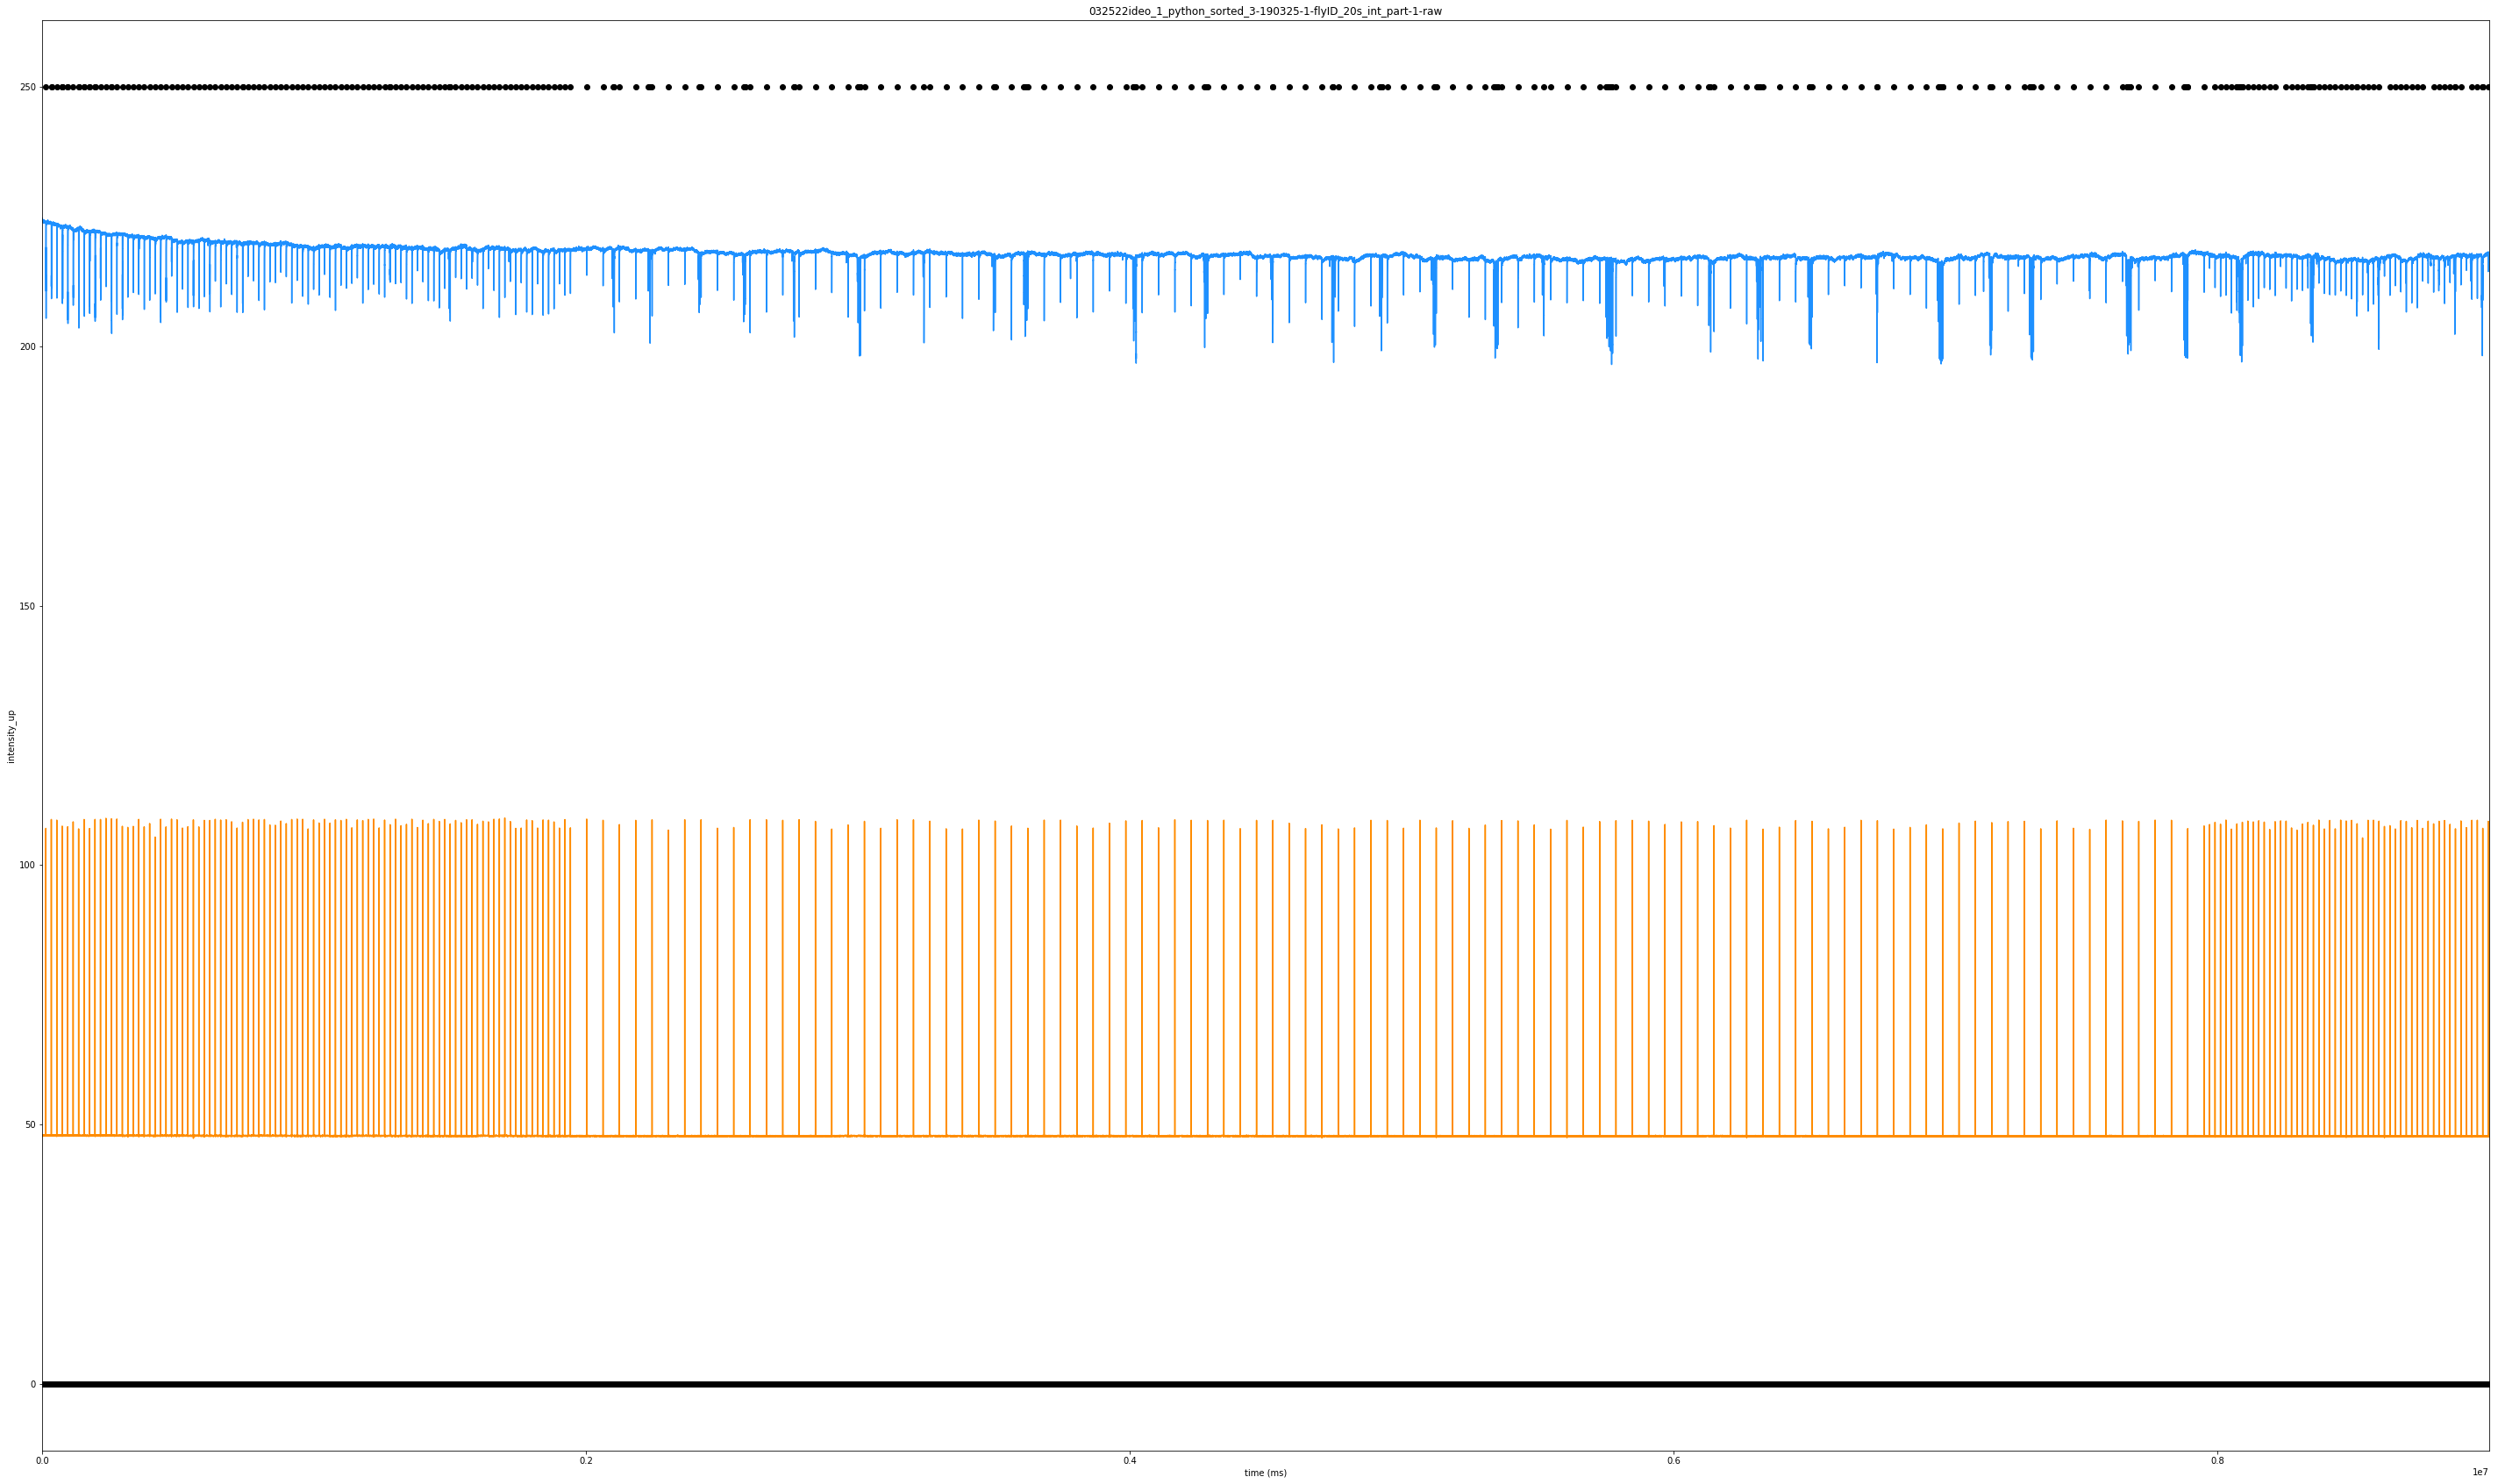

folder there
part-2-raw0325-1


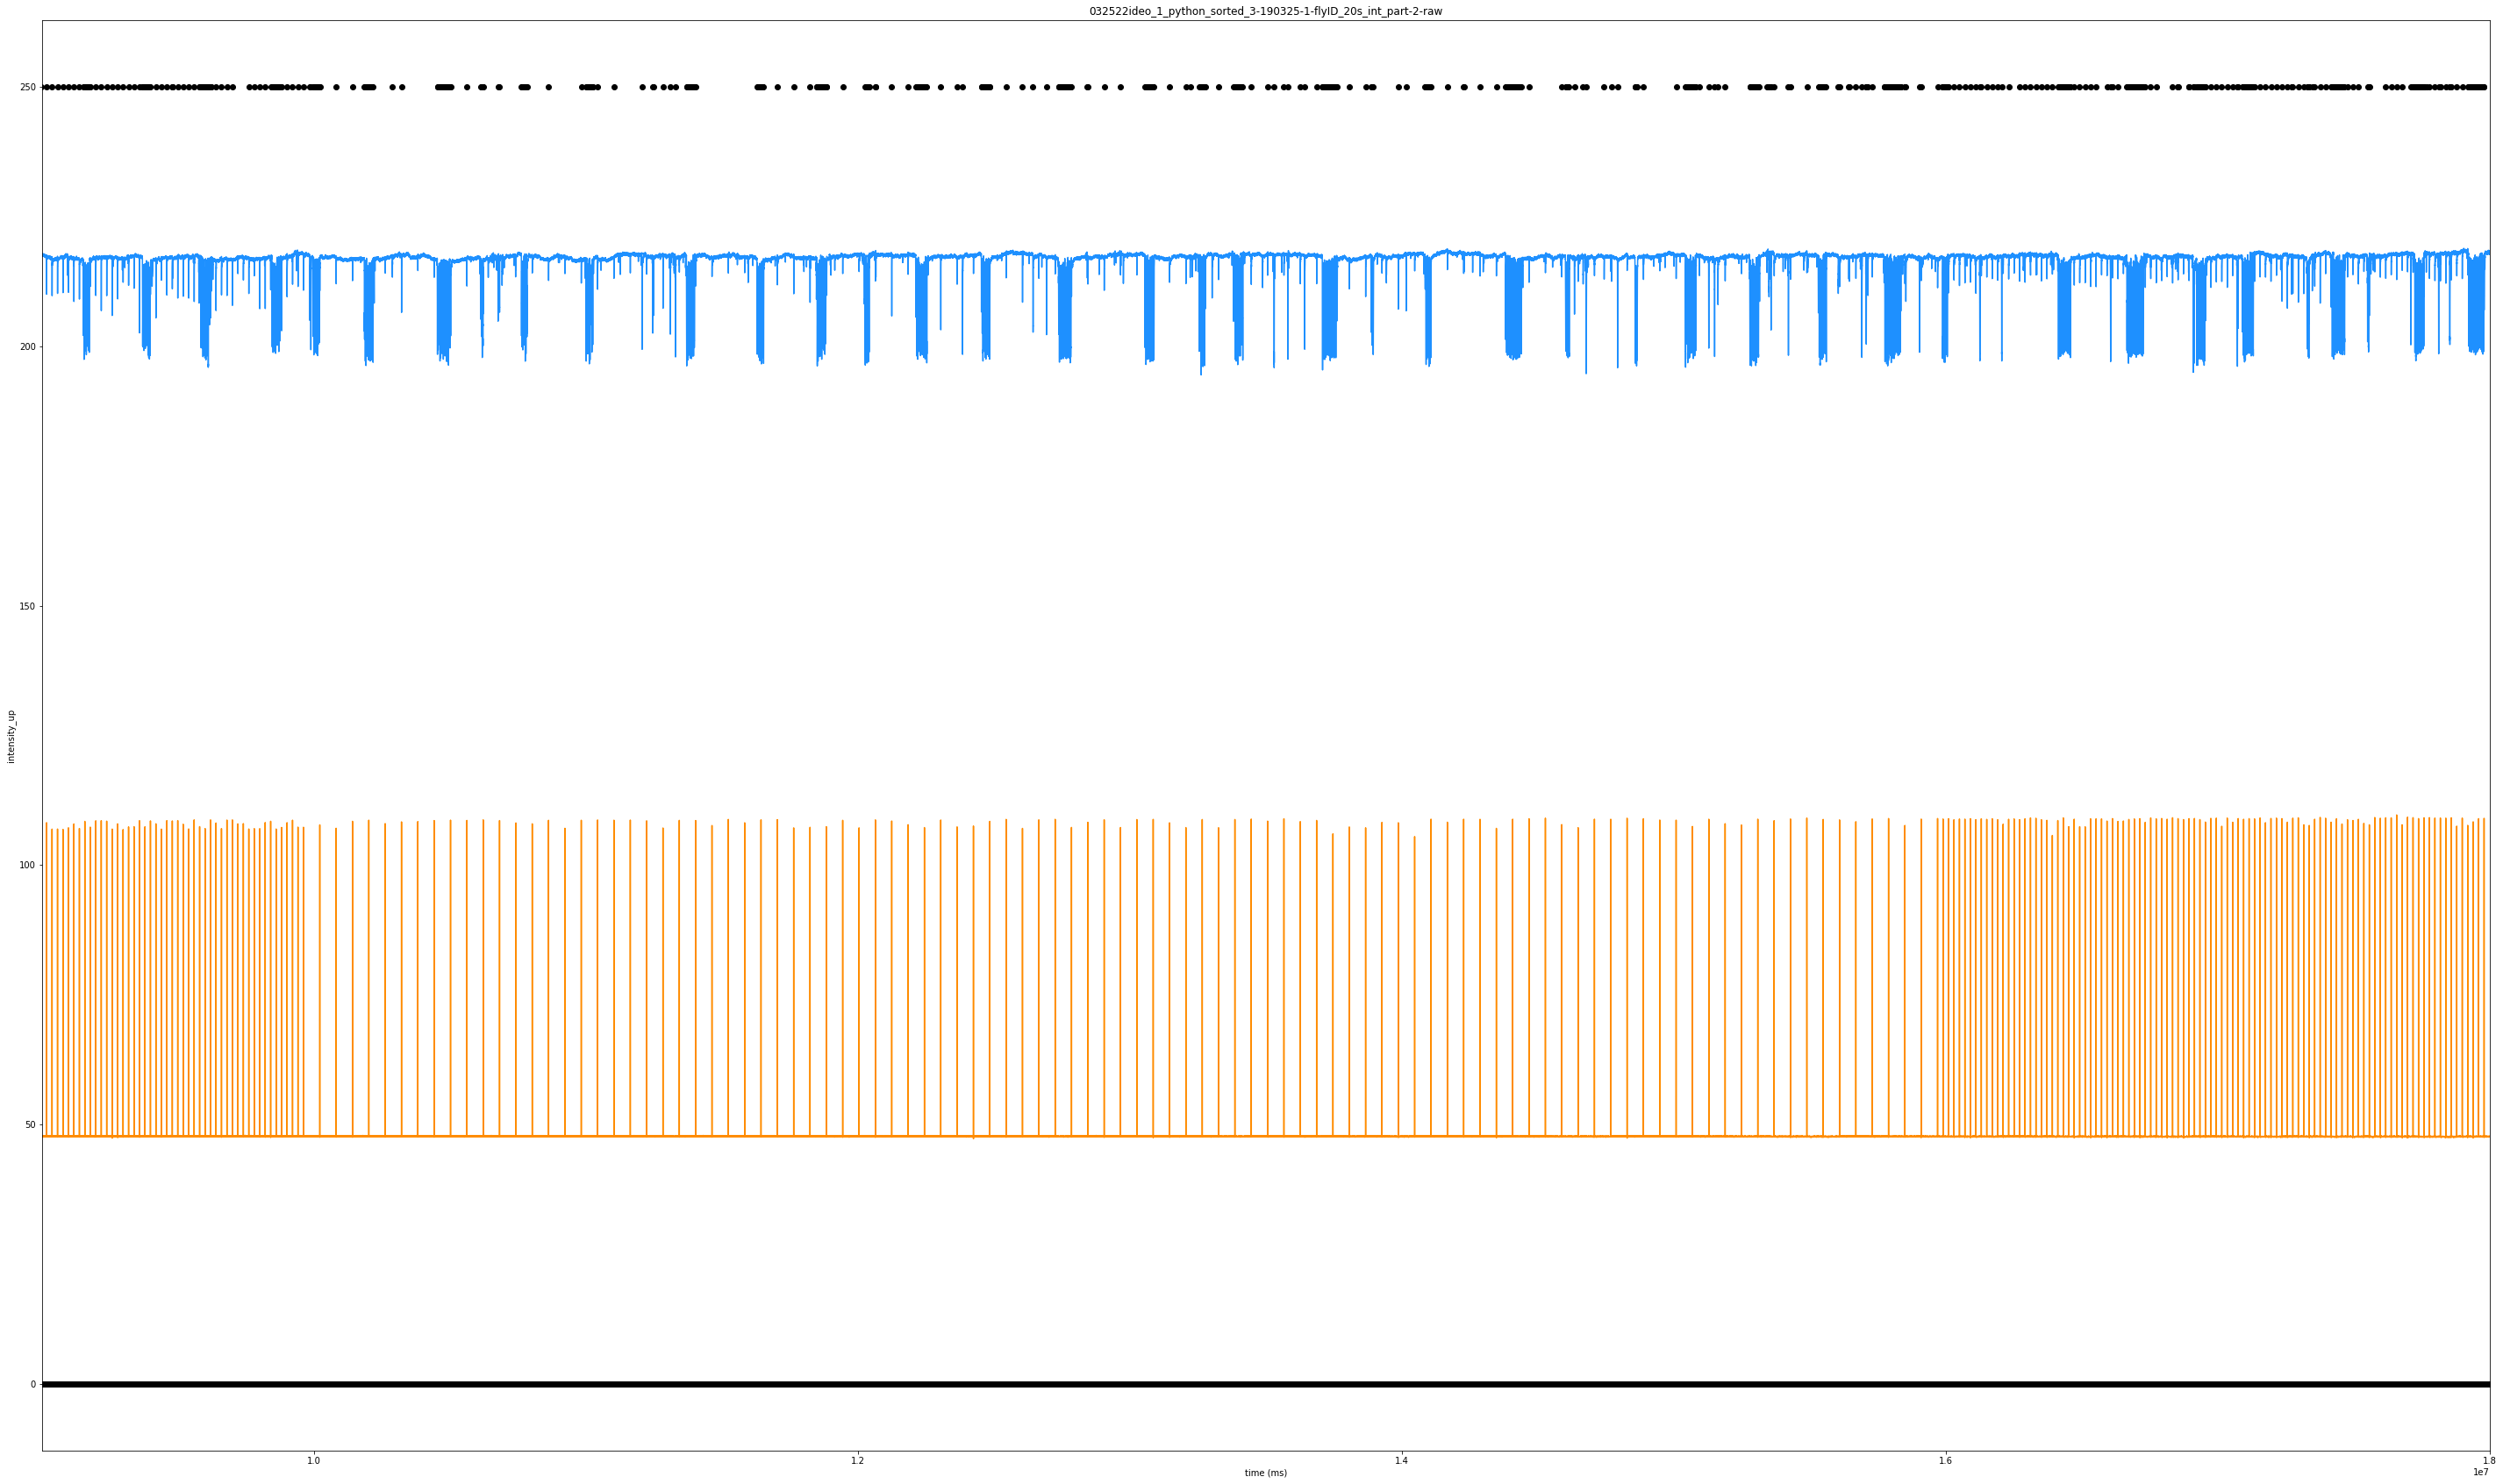

folder there


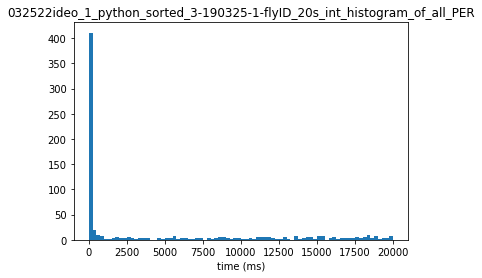

folder there
folder there
('first per time', array([ 1947,  1716,  1353, 19272, 16896, 36234, 46299, 52998, 36102,
       39402, 36630, 38643, 53658, 45507, 26235, 49335, 59235, 36795,
       32307, 53262, 31713, 35409, 24024, 41250, 38676, 49269, 58443,
       43593, 53064, 18909, 15279, 46266, 18447,  9801,  9768, 18909,
       19668, 17688, 18348, 14421,  2739, 19899, 11154,  3696,  1980,
       18117,  4851,  2838,  3069,  5412,  3663, 23067, 44121,  1947,
       26169, 11748, 50424, 54549, 20460, 17622, 43461, 22209, 26928,
       26796, 45870,  3762, 23463, 22242,  1815, 28743,  2112, 19932,
       29337, 38709, 28149, 12870, 58179, 29271,  2508, 15840,  2475,
       54516,  4587, 23529, 13860, 15906, 21318,  3498, 20196, 28908,
       38676,  1518, 33792,  3366, 14487, 18249, 35871,  2937, 29370,
       34155,  2409, 21087, 30789,  1815, 52041, 42075,  3300, 34089,
       21648, 43890,  2607,  3597, 18117,  3630, 14256, 14520,  1881,
        2772,  2508, 12903, 12936,  2145,  22

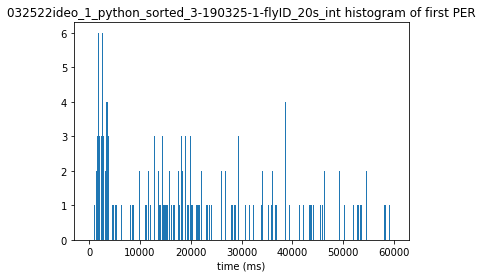

folder there
folder there


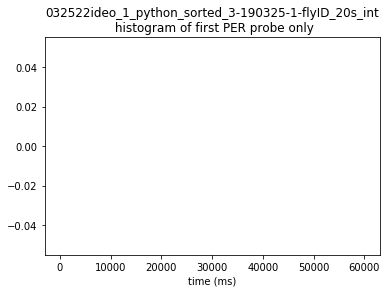

folder there
folder there


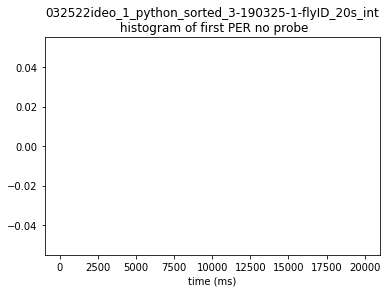

folder there
folder there


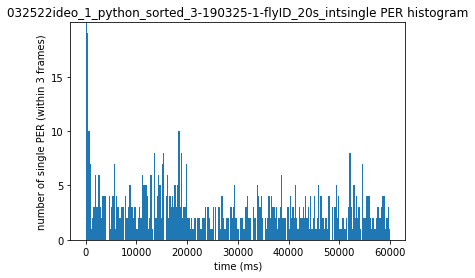

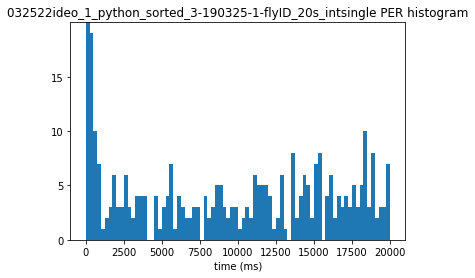

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

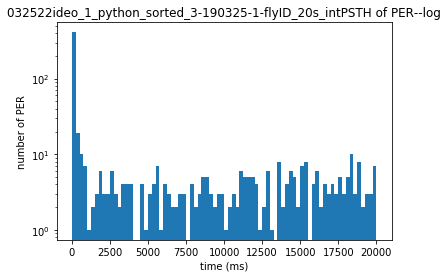

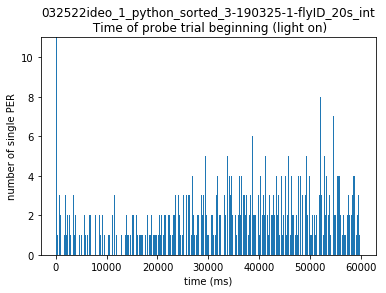

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

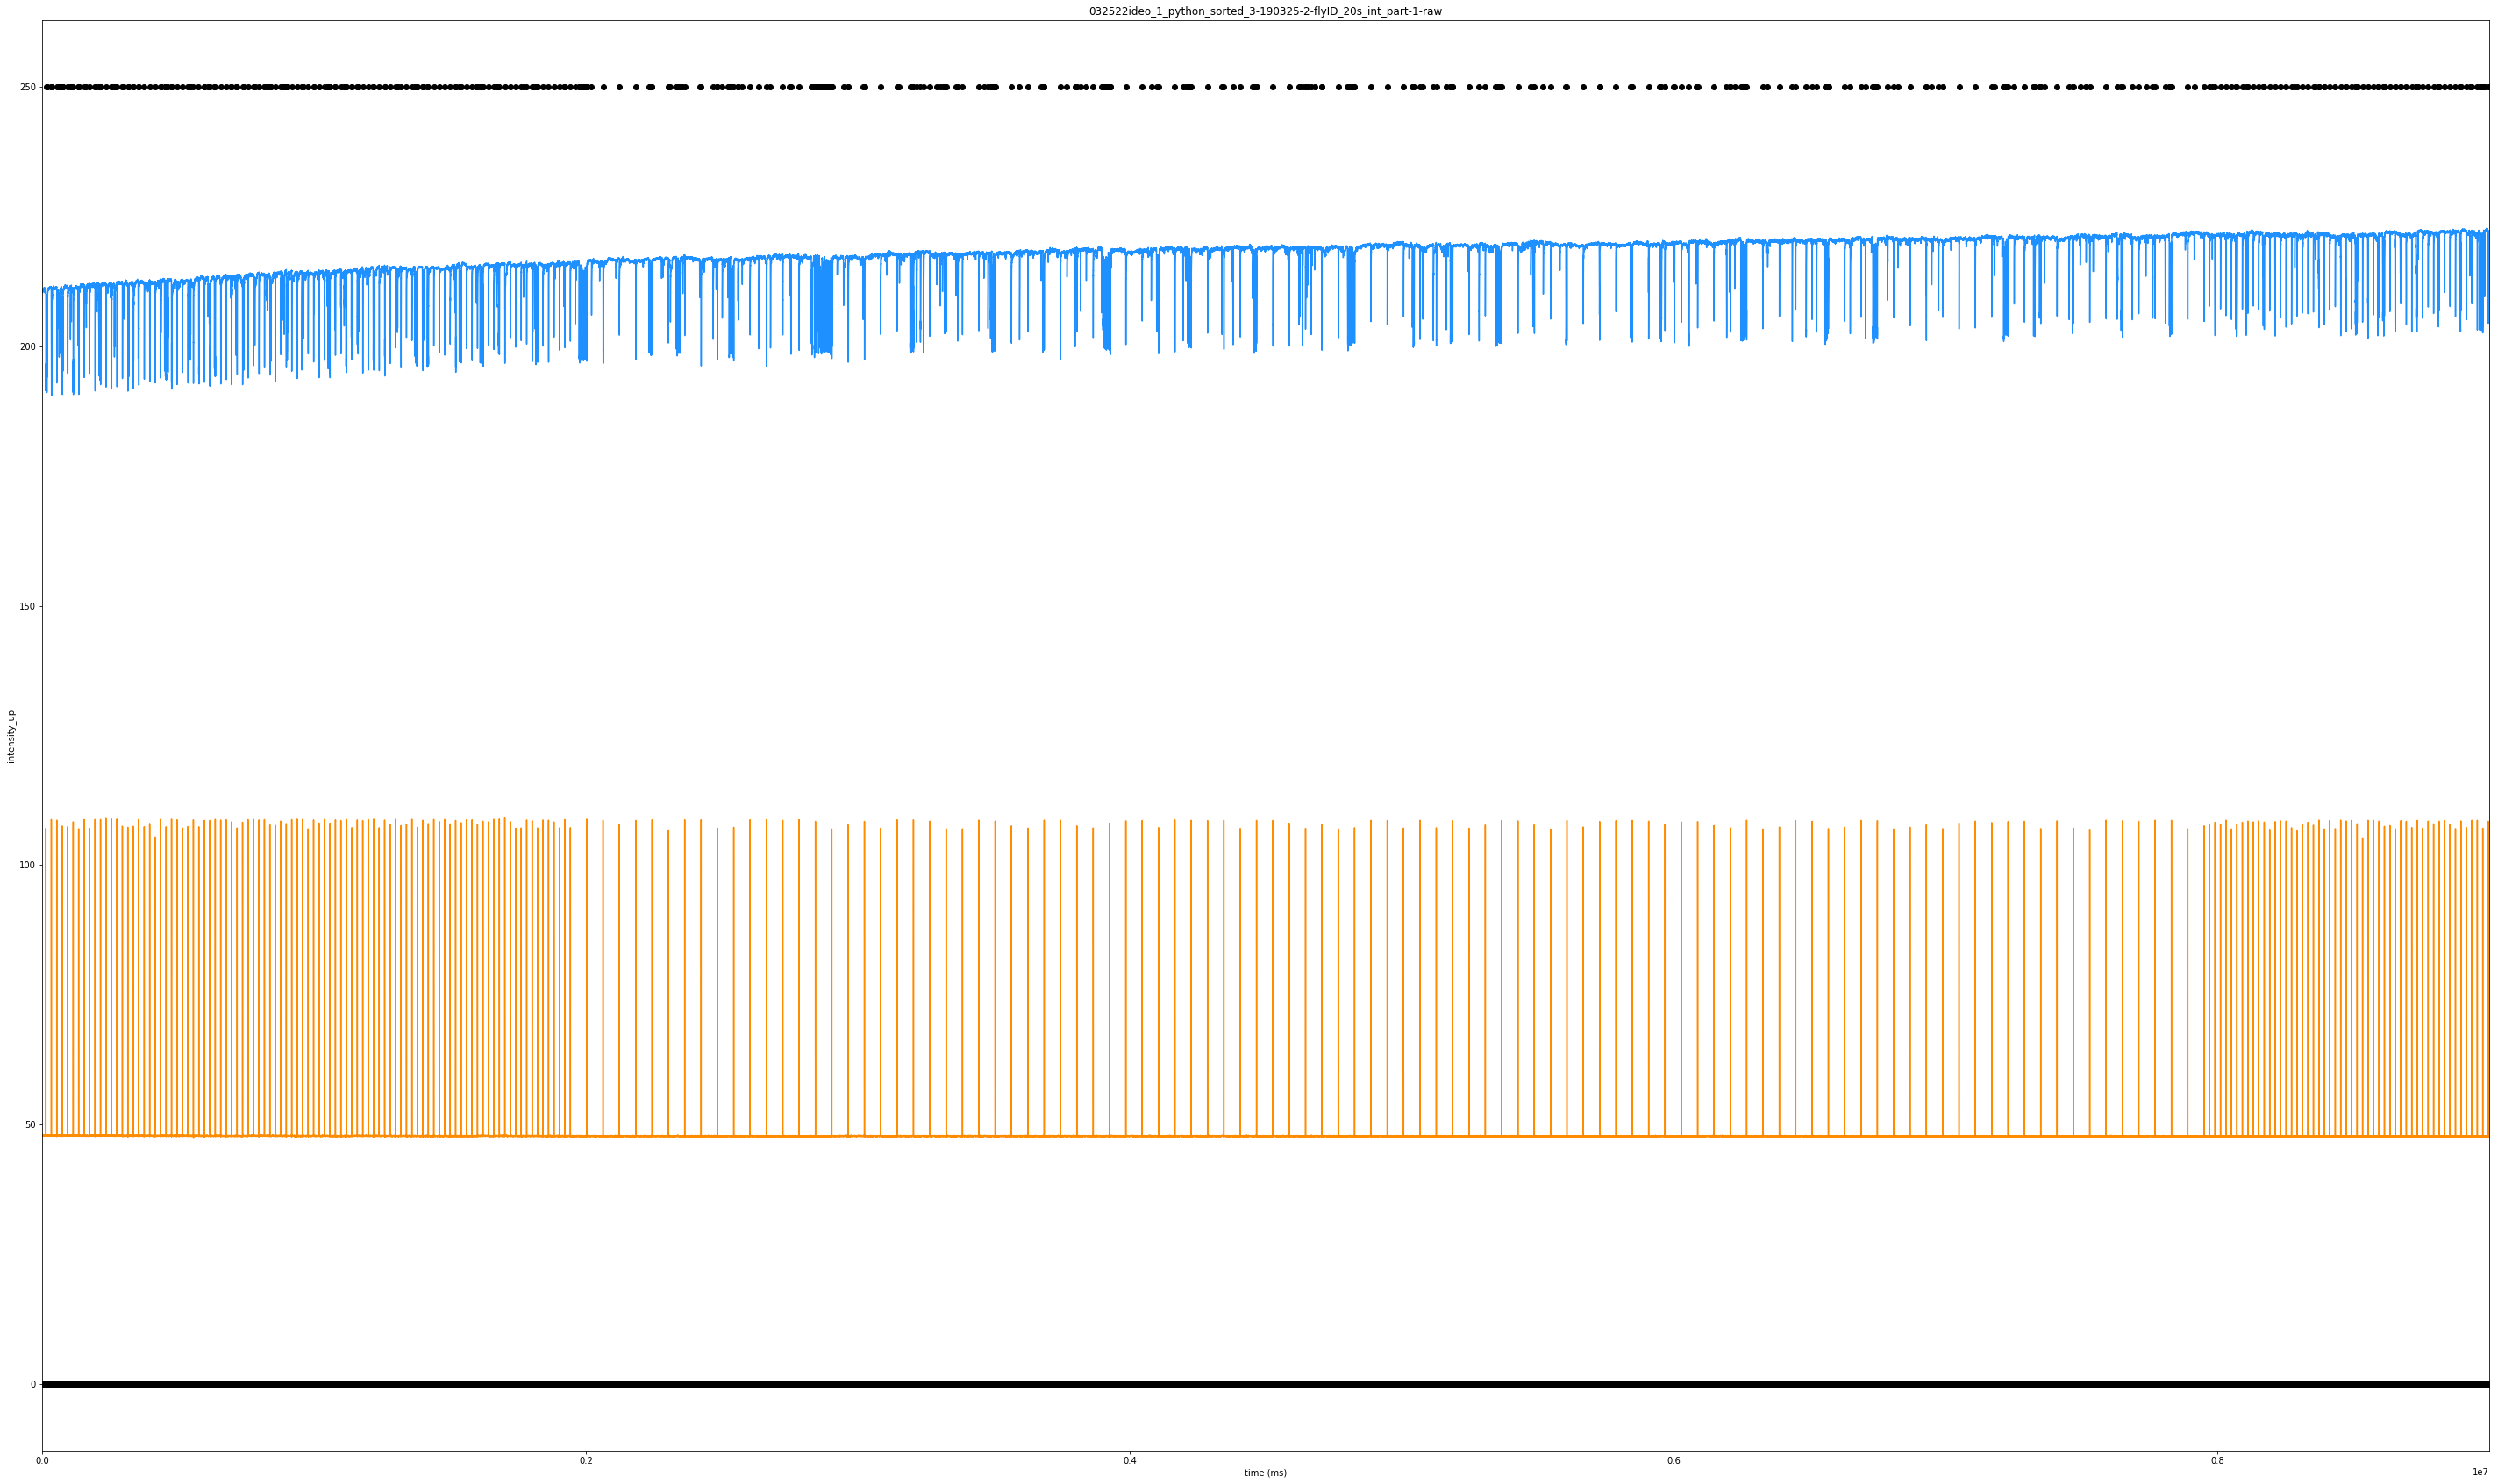

folder there
part-2-raw0325-2


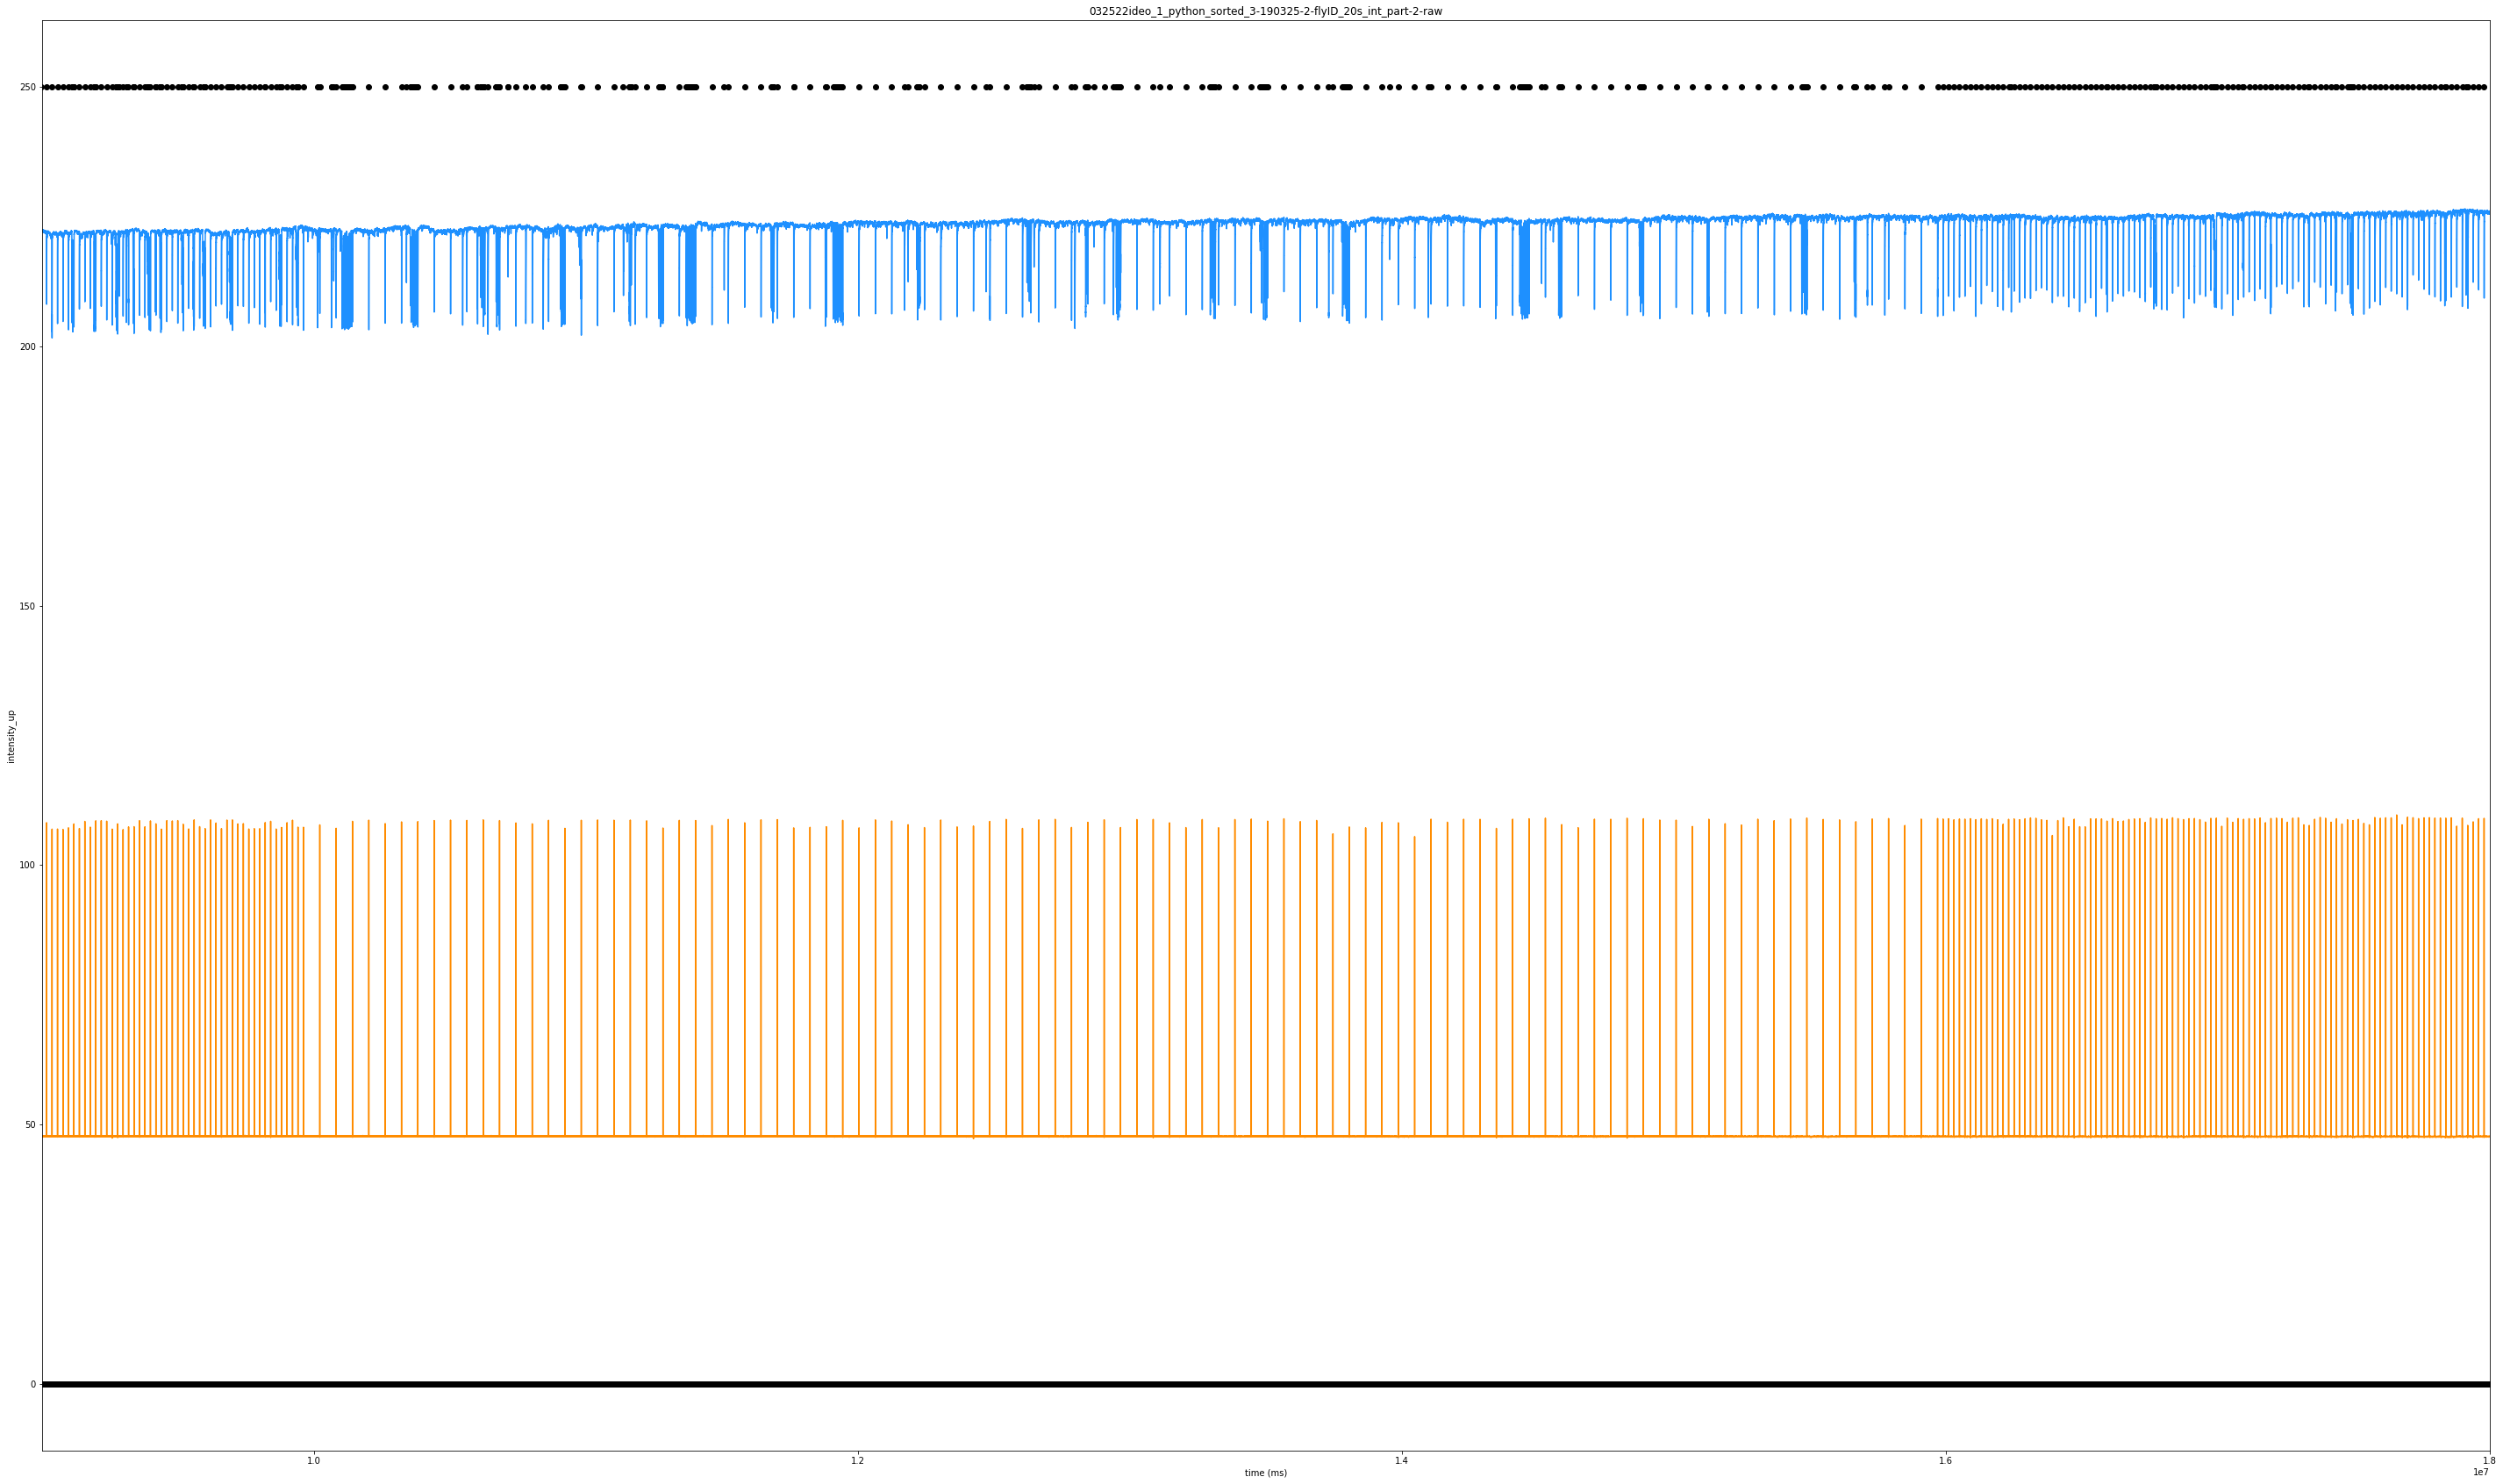

folder there


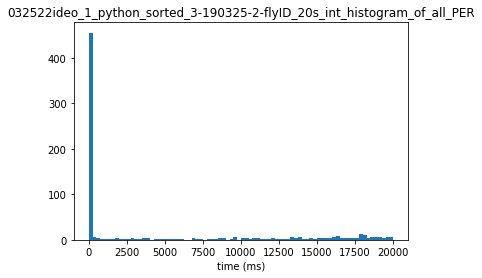

folder there
folder there
('first per time', array([ 3696,  7227,  2409, 10032, 17655,  8217,  7062, 11022,  6204,
        3531,  1221,  1650,  1980,  8910, 19503, 19107, 13992, 17061,
       16929, 15642,  5082,  4983,  8877,  3795,  6897,  2937, 17193,
        3663,  1782,  9735, 17688, 12078, 18348,  2871, 18348,  5280,
       10659, 18810,  1980, 17787, 13266, 16269,  9537, 10065,  8250,
        2541, 16302, 17853, 17886, 48213,  7491, 55341, 44154, 17853,
       15708, 32043, 14718, 24486, 45276, 10065,  2838, 55275,  8679,
       11715, 25839, 35442, 18645, 29403, 48444, 23925, 13299, 30822,
        1452, 33363, 30030, 52965, 33231, 45738, 36135,  3861, 34320,
       32208, 10494, 36828, 37059, 38643, 47454, 33033, 56265, 59466,
       52899, 59895, 41316, 30624, 27786, 46233, 16203, 17424, 47190,
       38379, 16269, 20427, 16236, 37686, 16368, 59235, 19503,  9273,
       22737, 33660, 13959, 44484, 24981, 40392, 36630, 26136, 37389,
       23727, 10131, 15477, 13299, 15873, 192

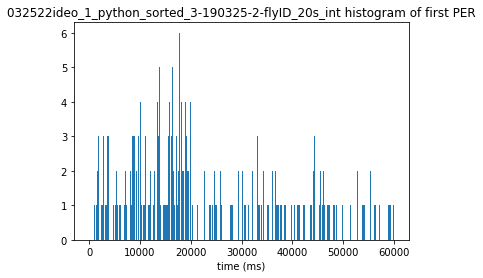

folder there
folder there


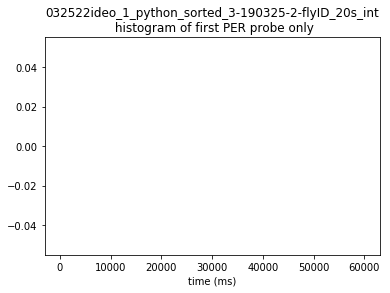

folder there
folder there


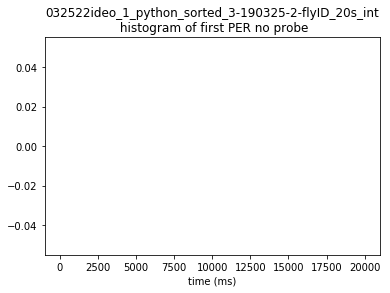

folder there
folder there


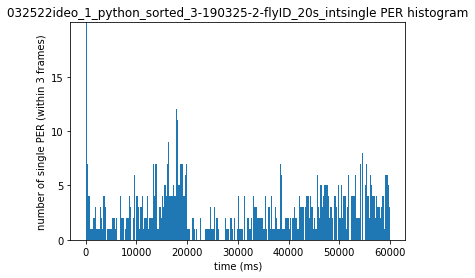

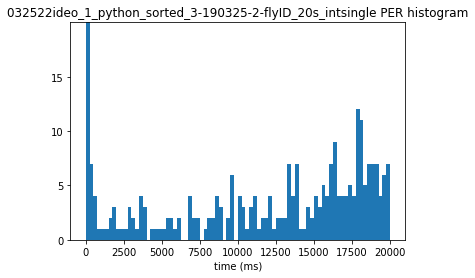

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

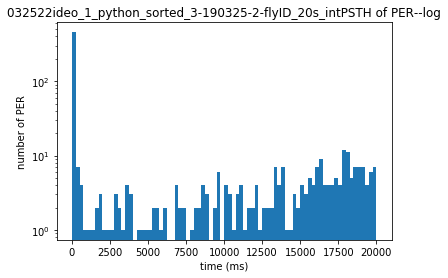

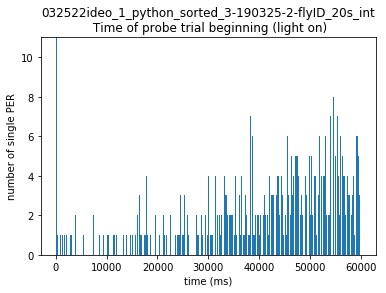

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

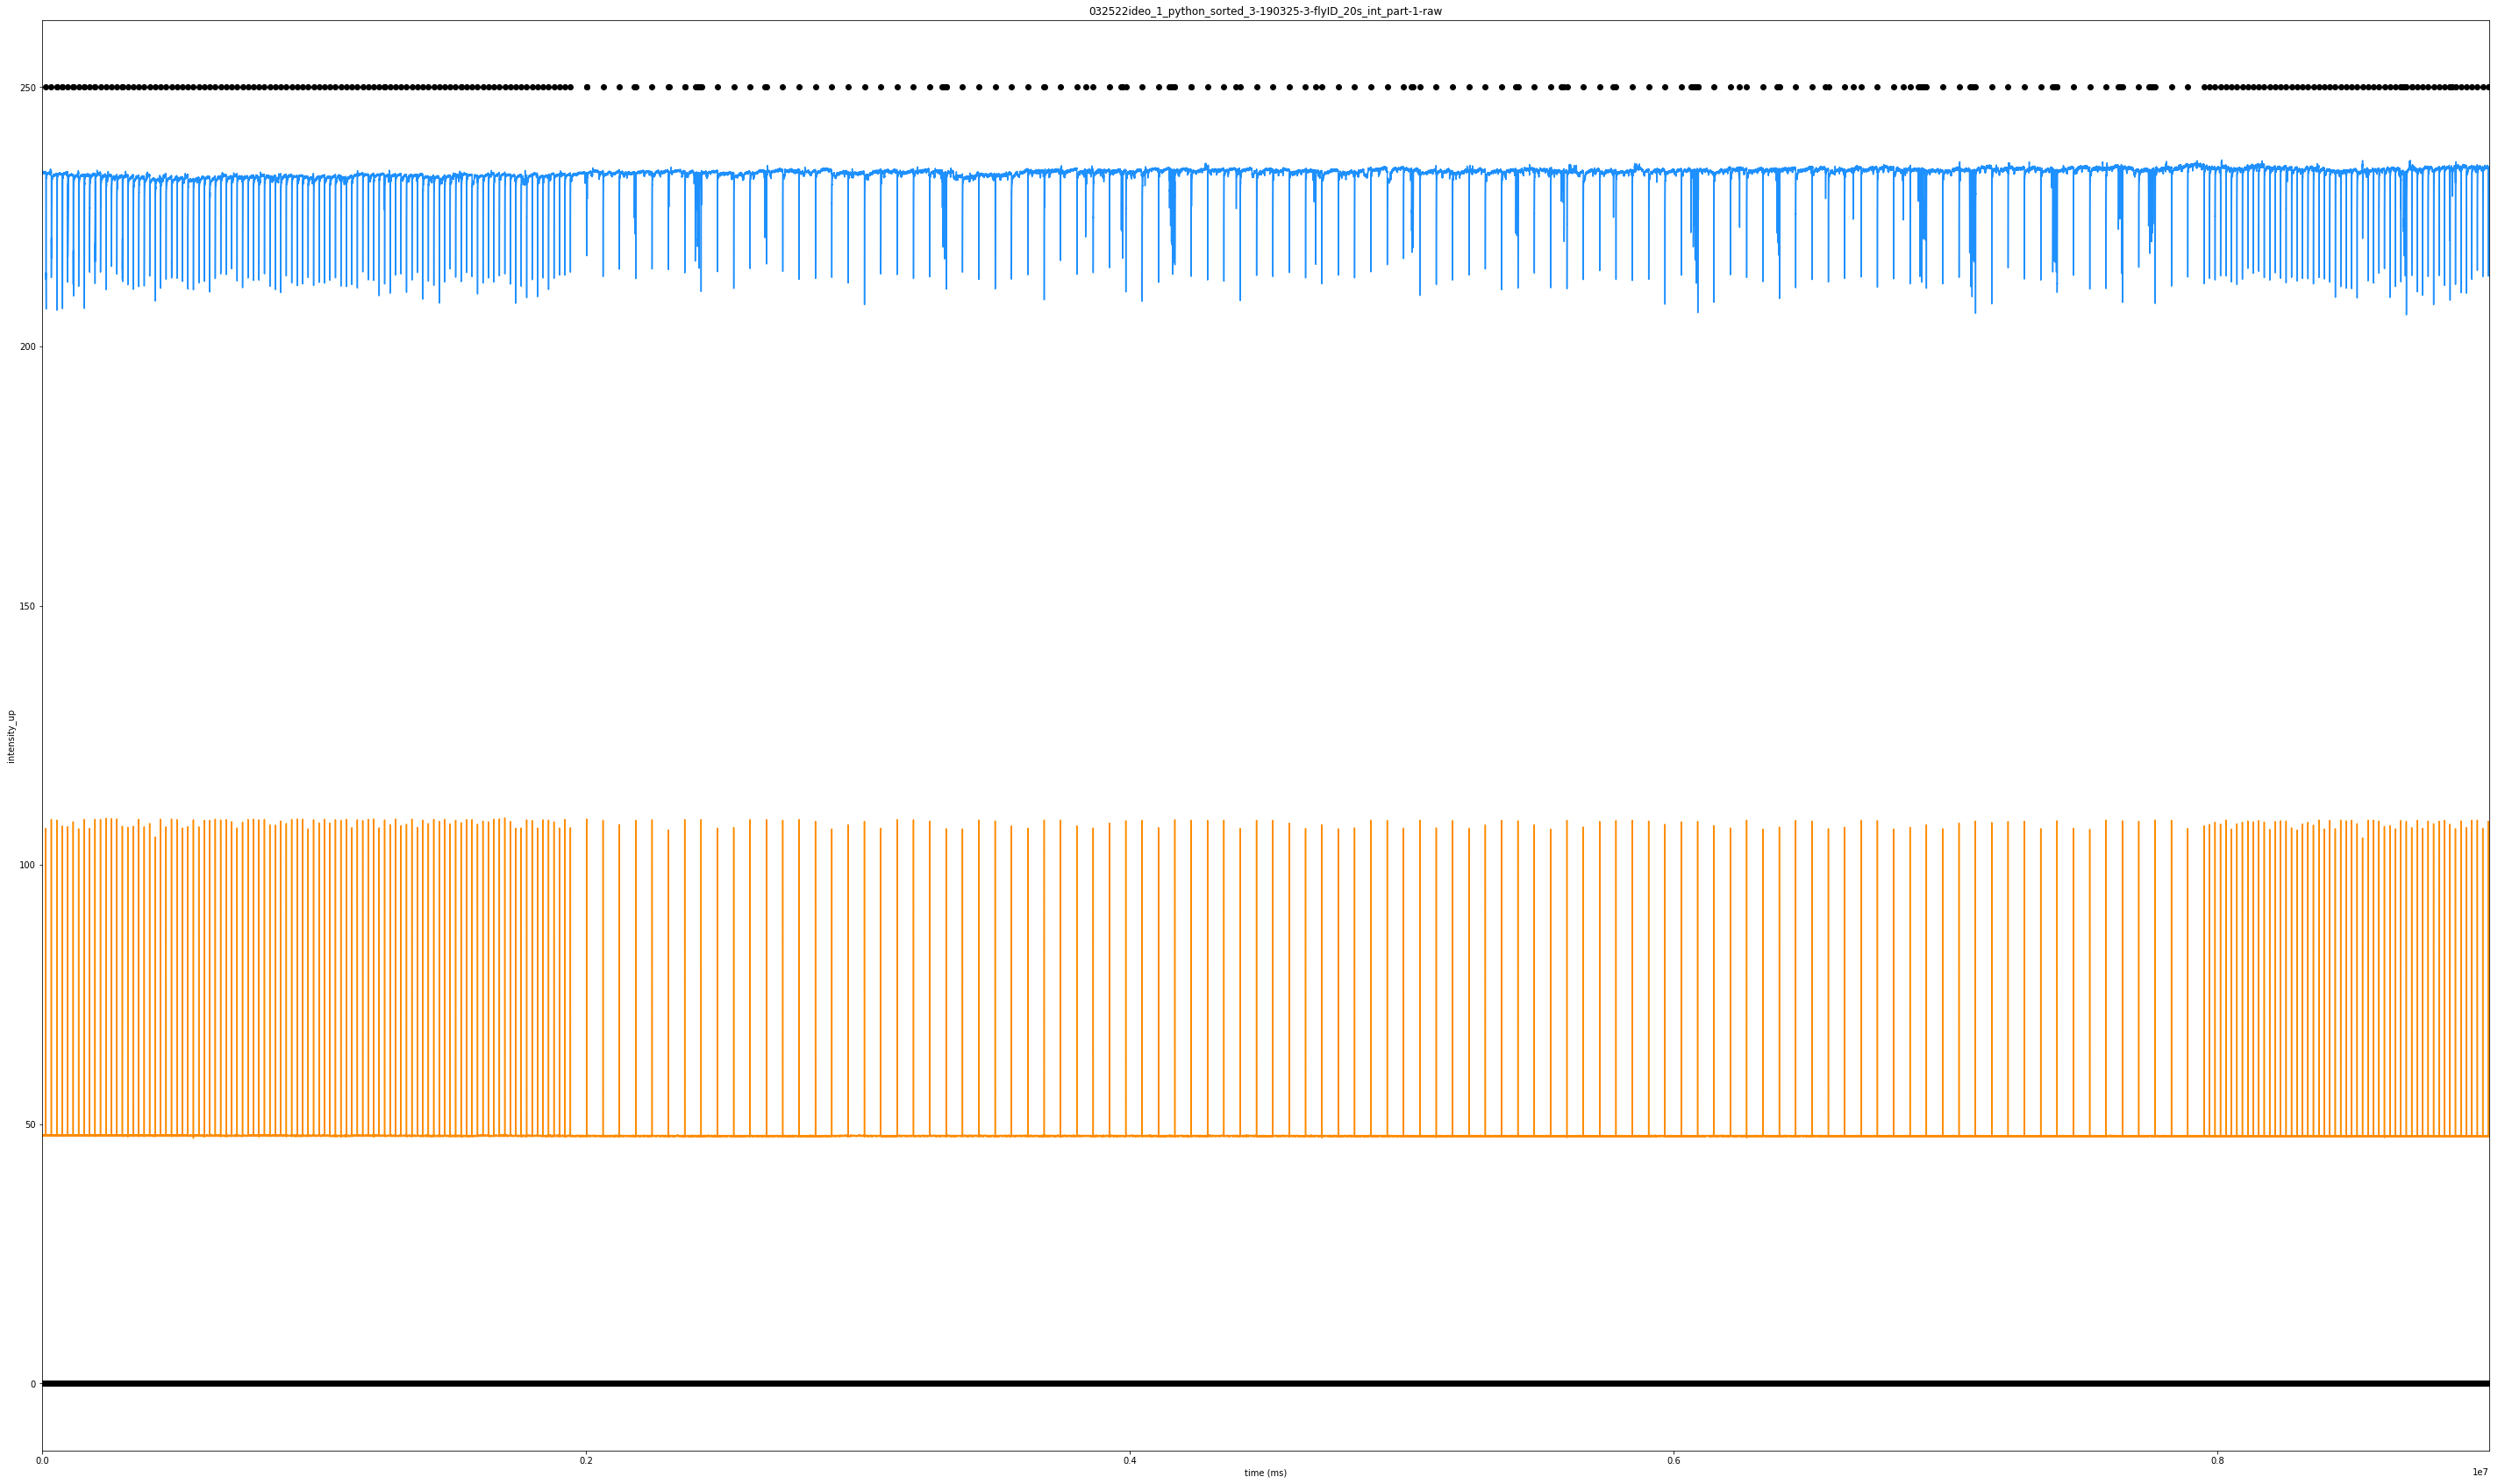

folder there
part-2-raw0325-3


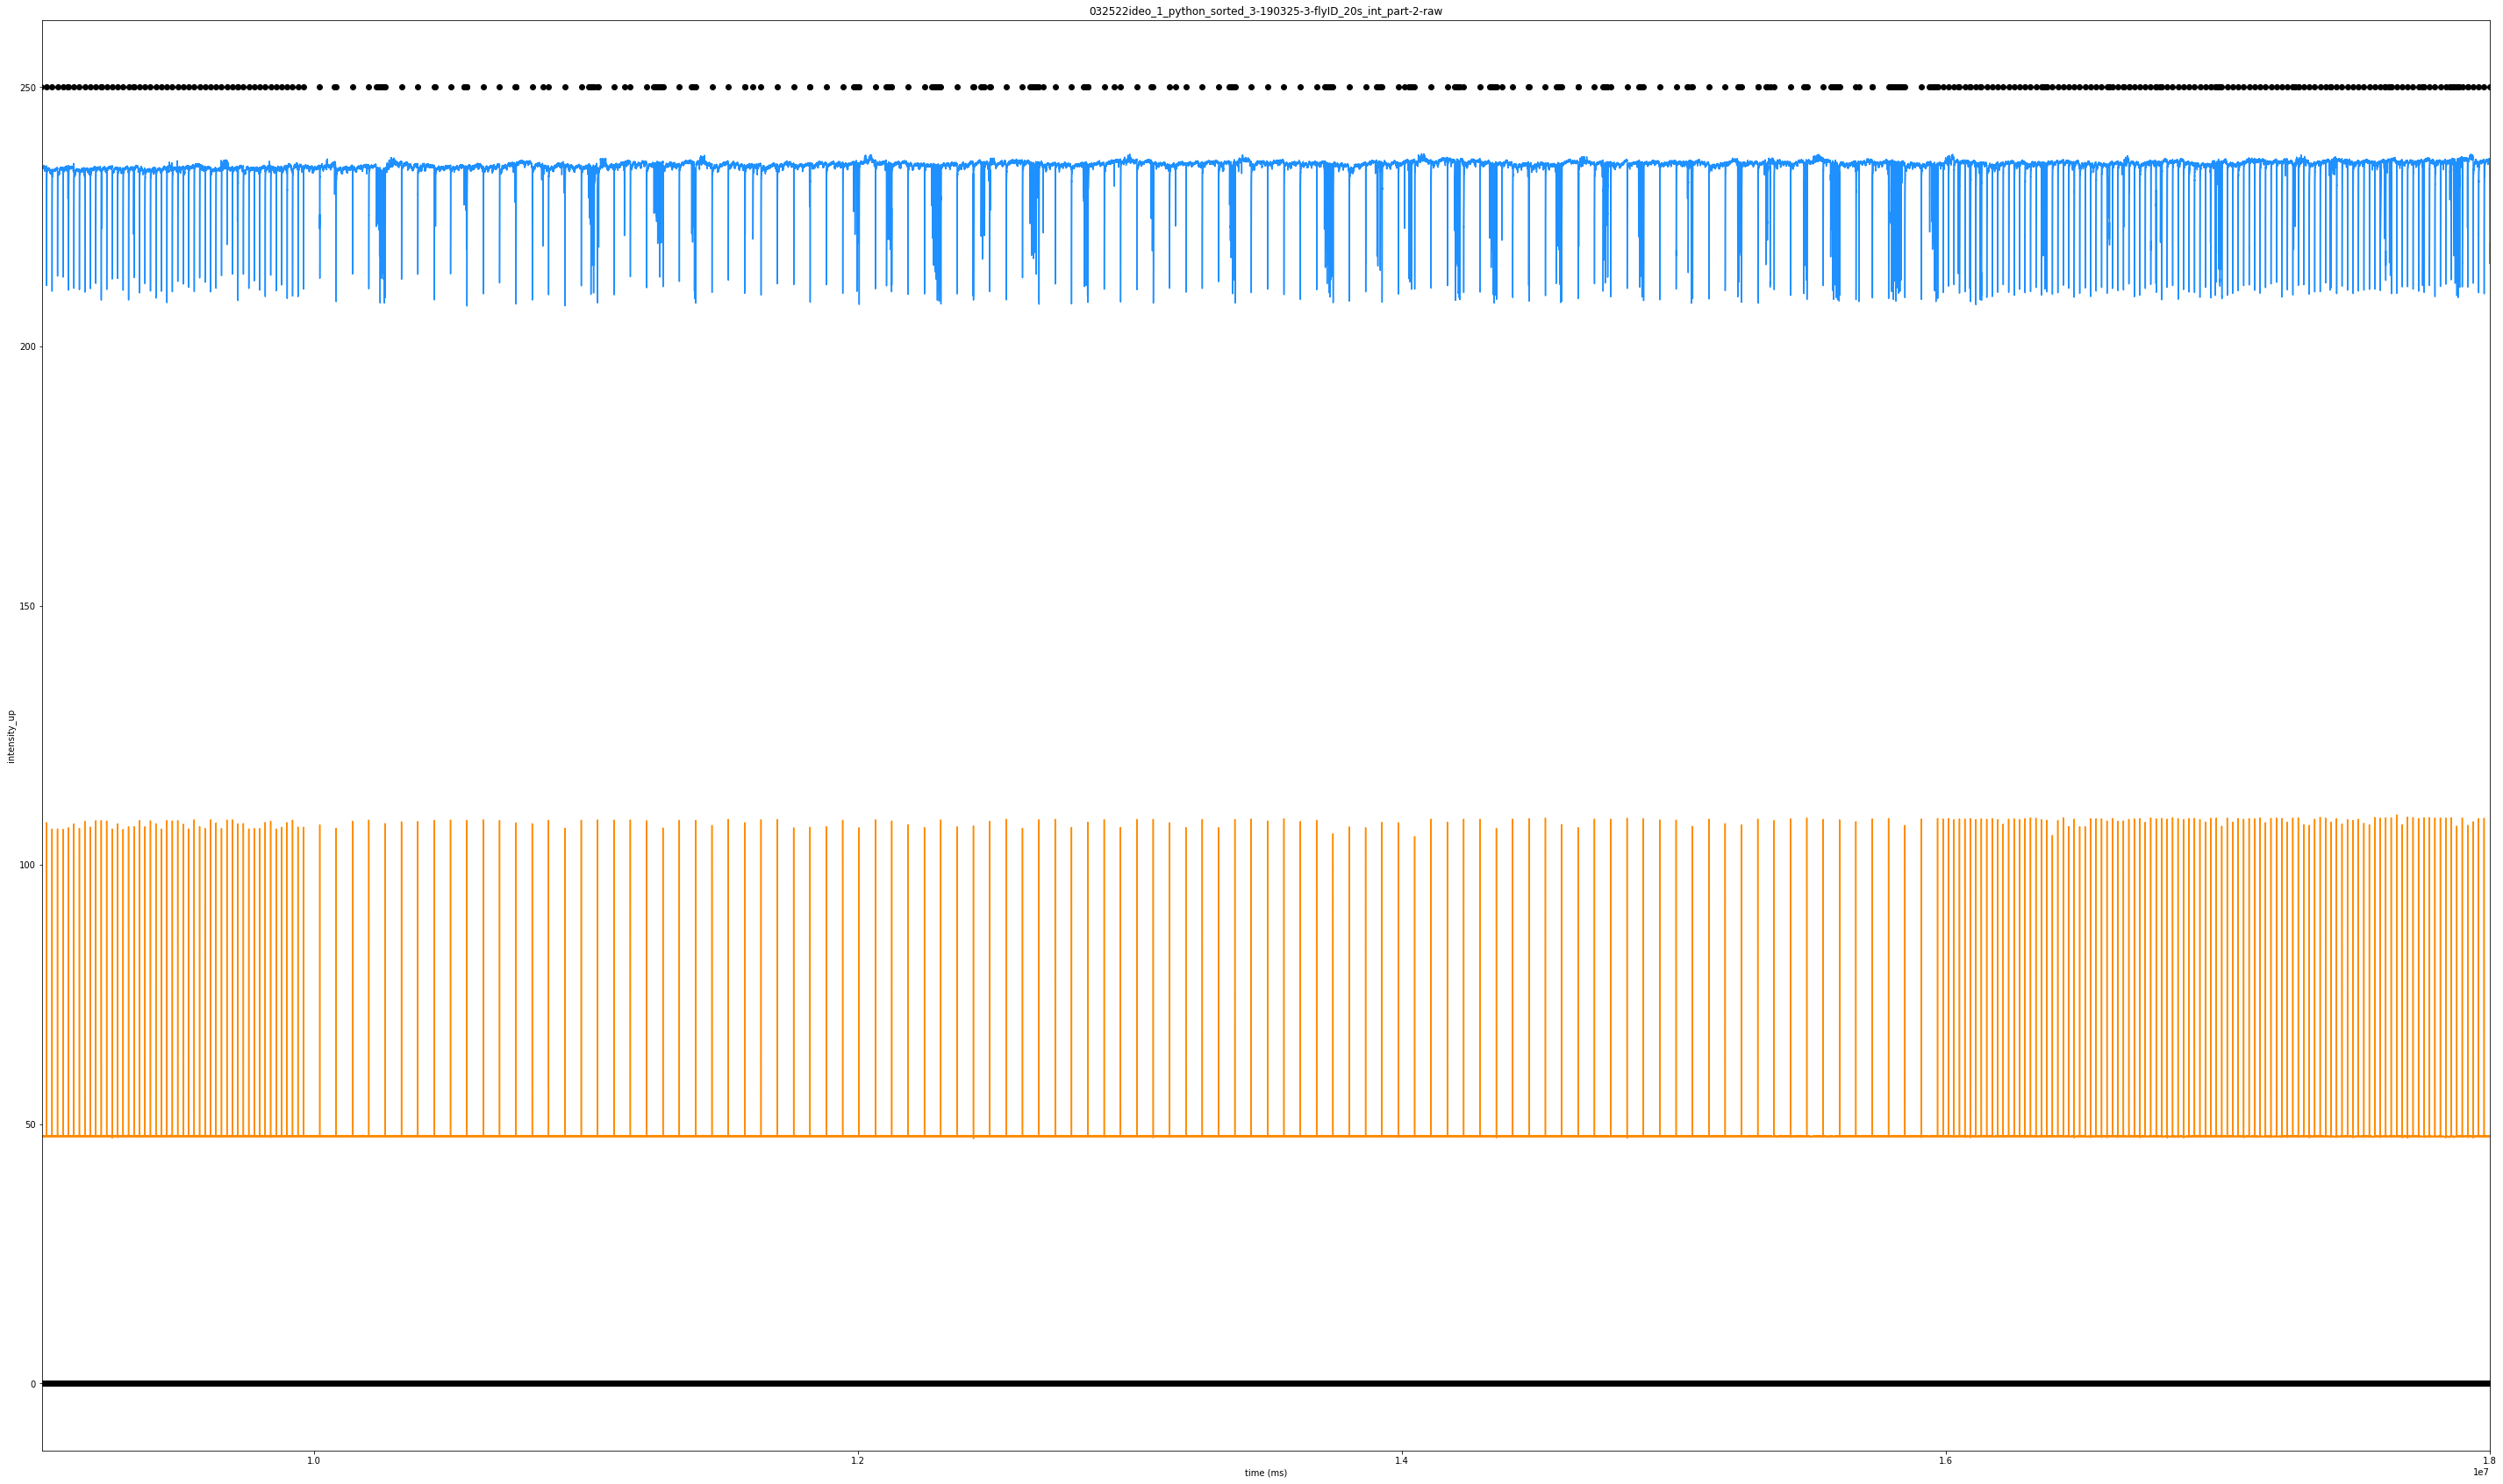

folder there


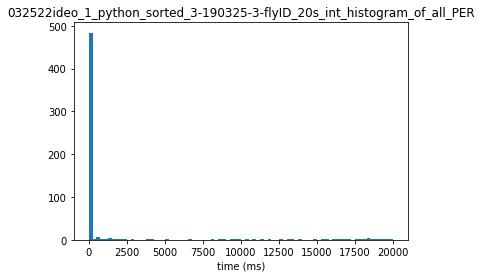

folder there
folder there
('first per time', array([ 1056, 18117,  1617, 59400, 54912,  1881,  1815,  1188, 54120,
       46134,  1485,  1386, 32208, 42999, 40359,  1320, 45309, 37323,
       29403, 52173, 38379, 50721, 34980,  2442, 34122, 51348, 50127,
       30921, 35310, 30393, 38742, 44055, 45375, 35838, 19569,  9966,
        1485, 18381,  9669, 18447,  1188, 18381, 18315, 59532, 54516,
       27522,  5016, 49335, 56694, 39105, 26928,  3960, 38346, 26895,
       45606,  1683, 58245, 40128, 40722, 26334, 59004, 27984,  1584,
       27159, 16236, 45243, 37092, 52503, 21549, 40359, 28446, 41712,
       22803, 27192, 35508, 20691, 58509, 39369,  2277, 31746, 42471,
       41910, 46167, 29535, 49071, 27225, 10791, 60027,  8778, 30888,
       15510, 17952, 19899, 16170,  6534, 19668,  8052,  1419,  2178,
       18876, 15477, 18711, 15378,  9438,  2970,  1947, 16368, 15675,
       13398, 14751, 14751,  8712,  4224, 19338, 20757], dtype=int64))


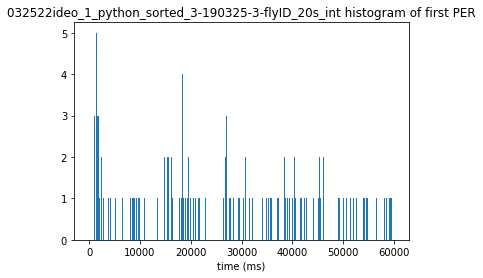

folder there
folder there


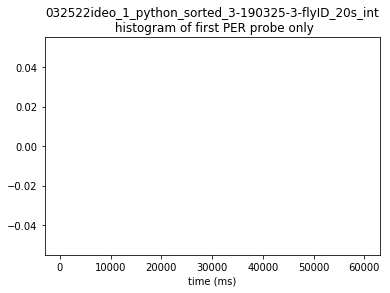

folder there
folder there


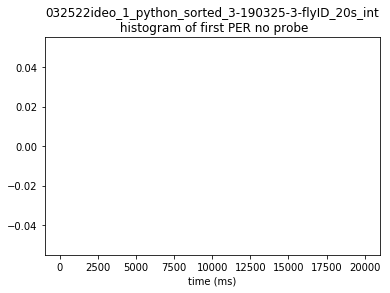

folder there
folder there


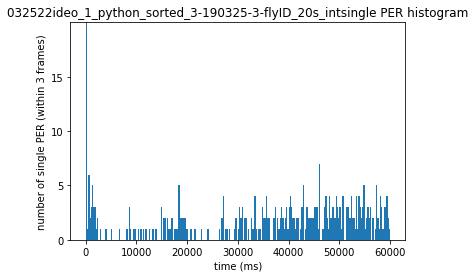

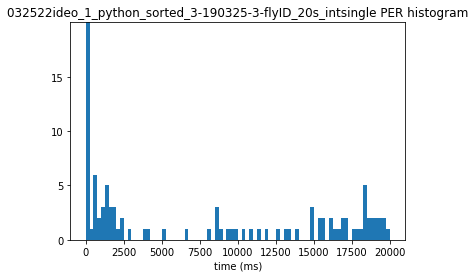

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

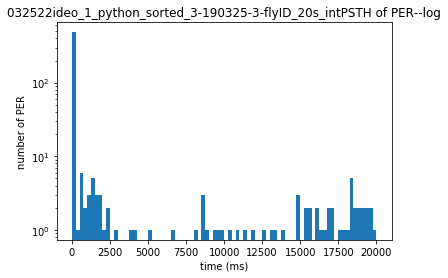

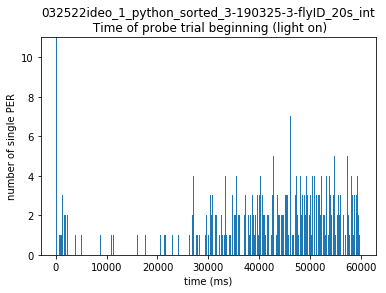

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

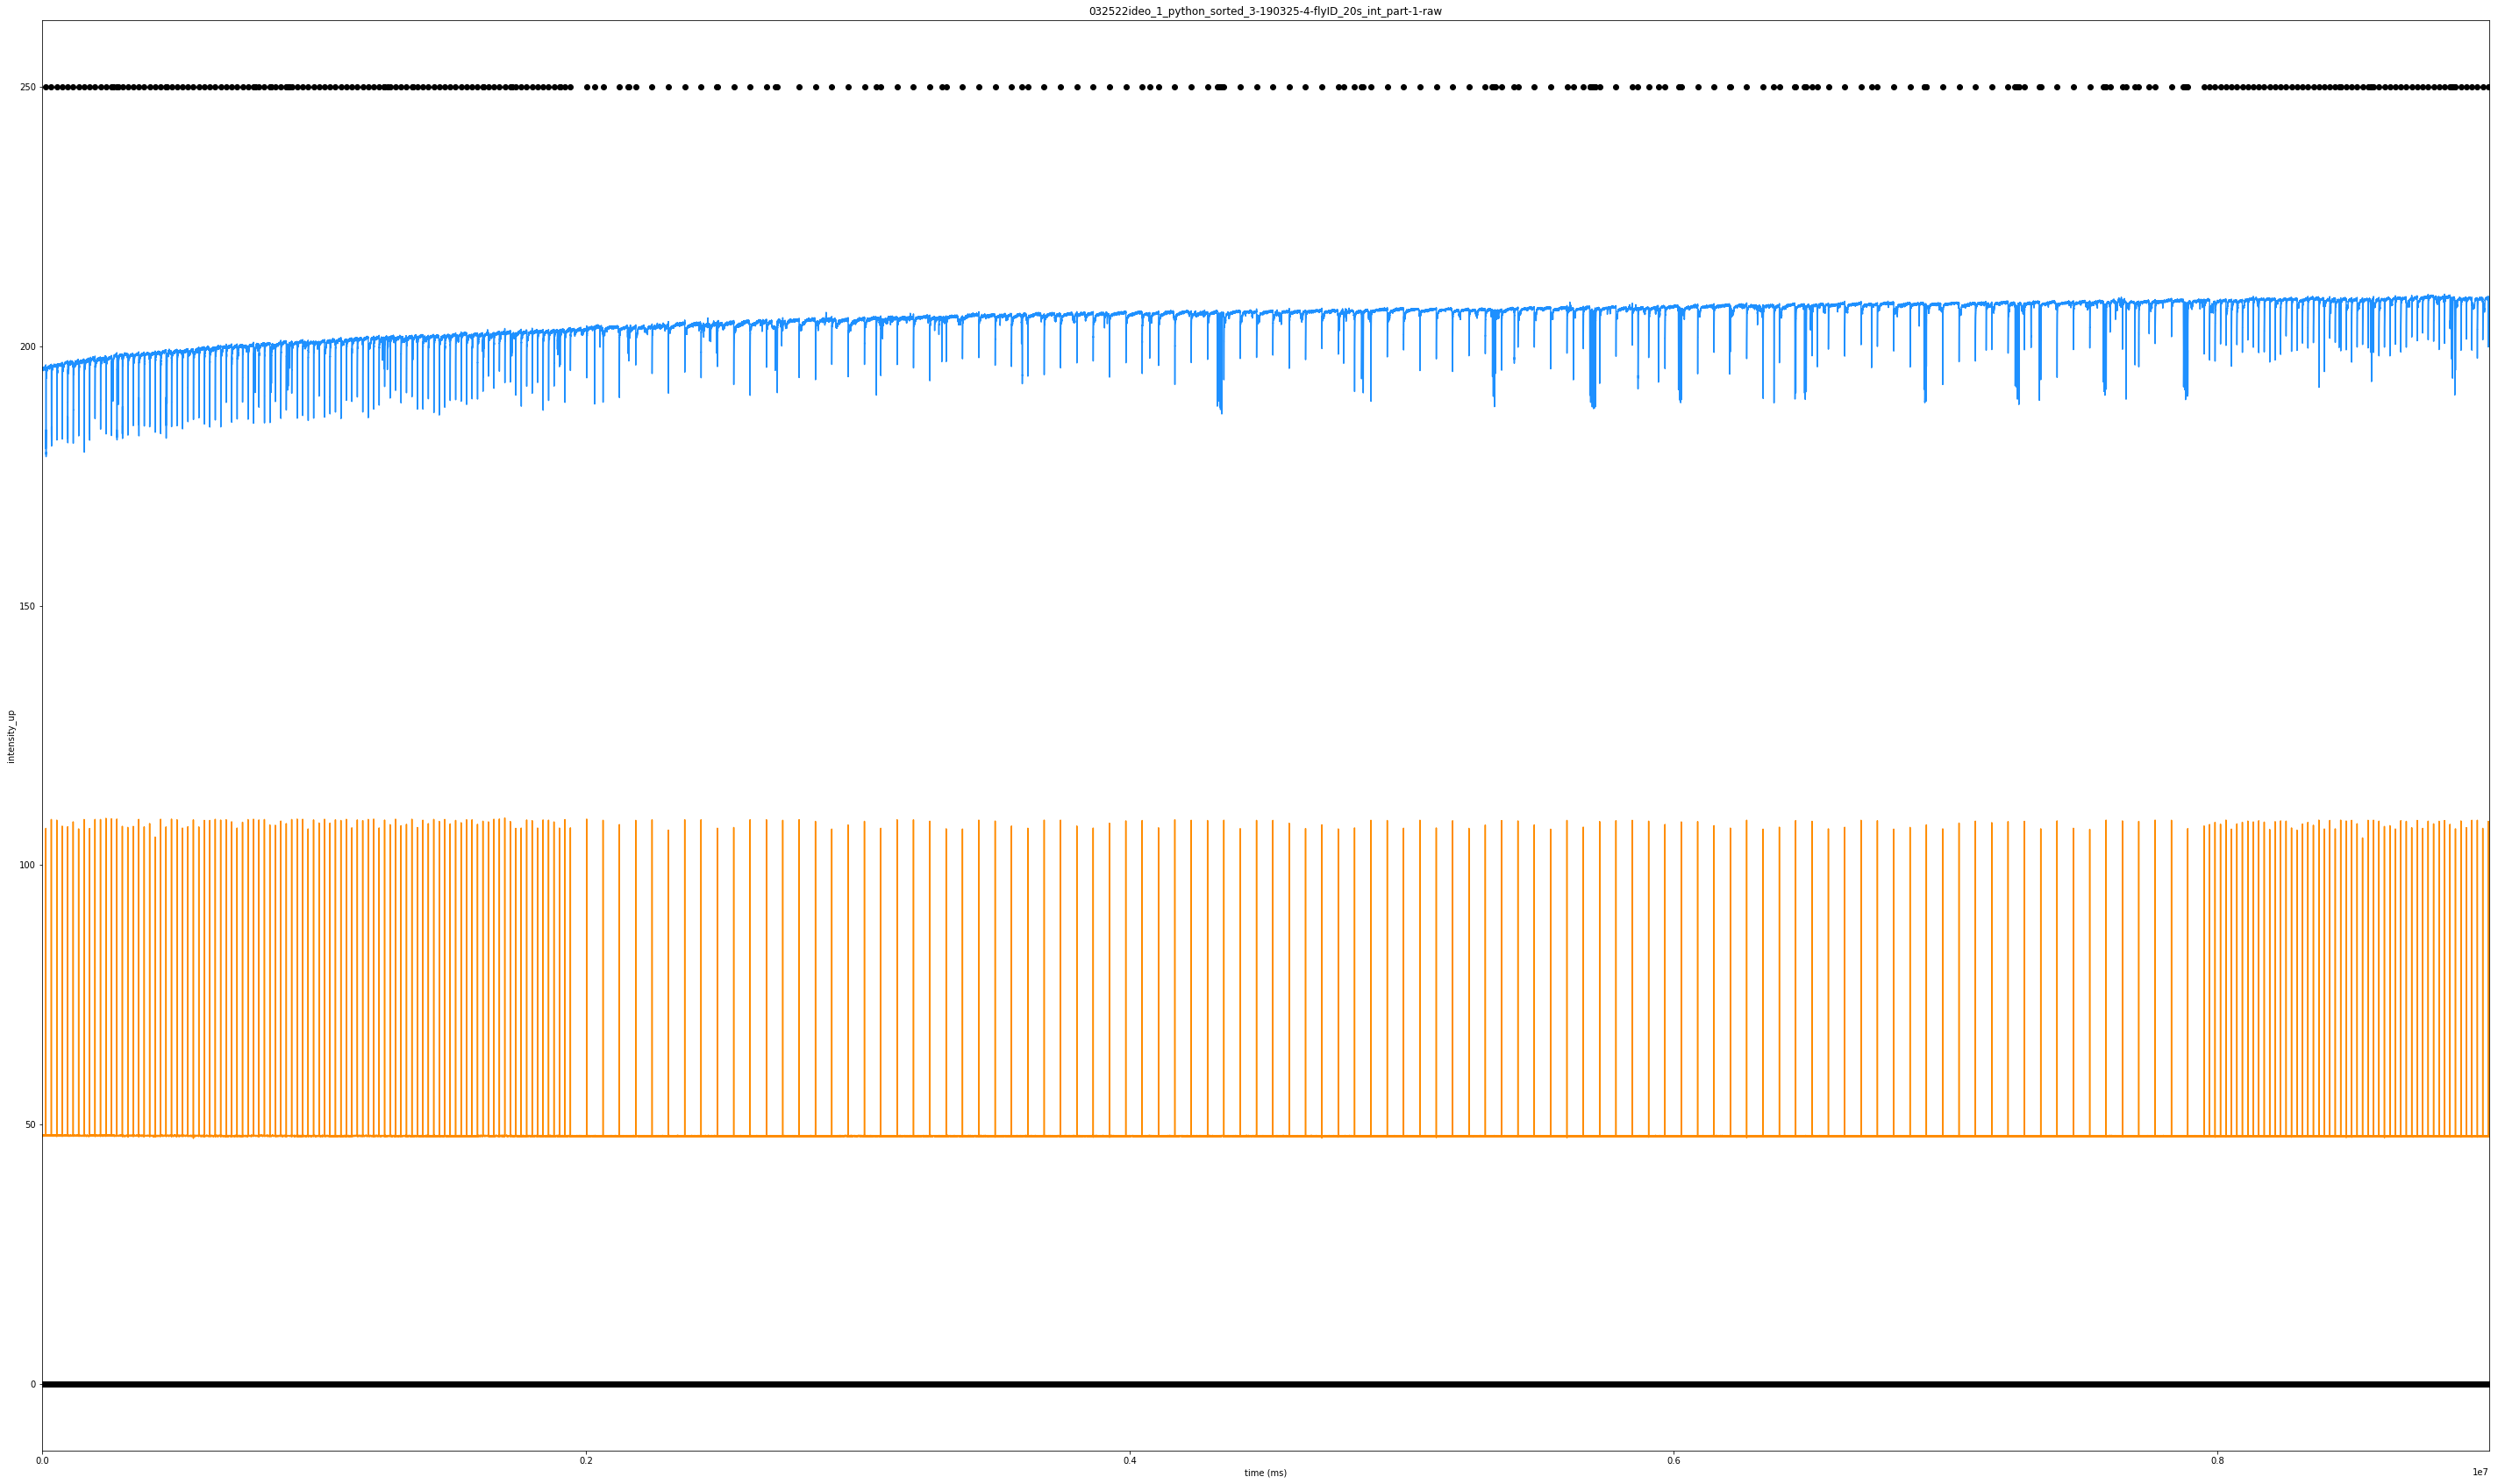

folder there
part-2-raw0325-4


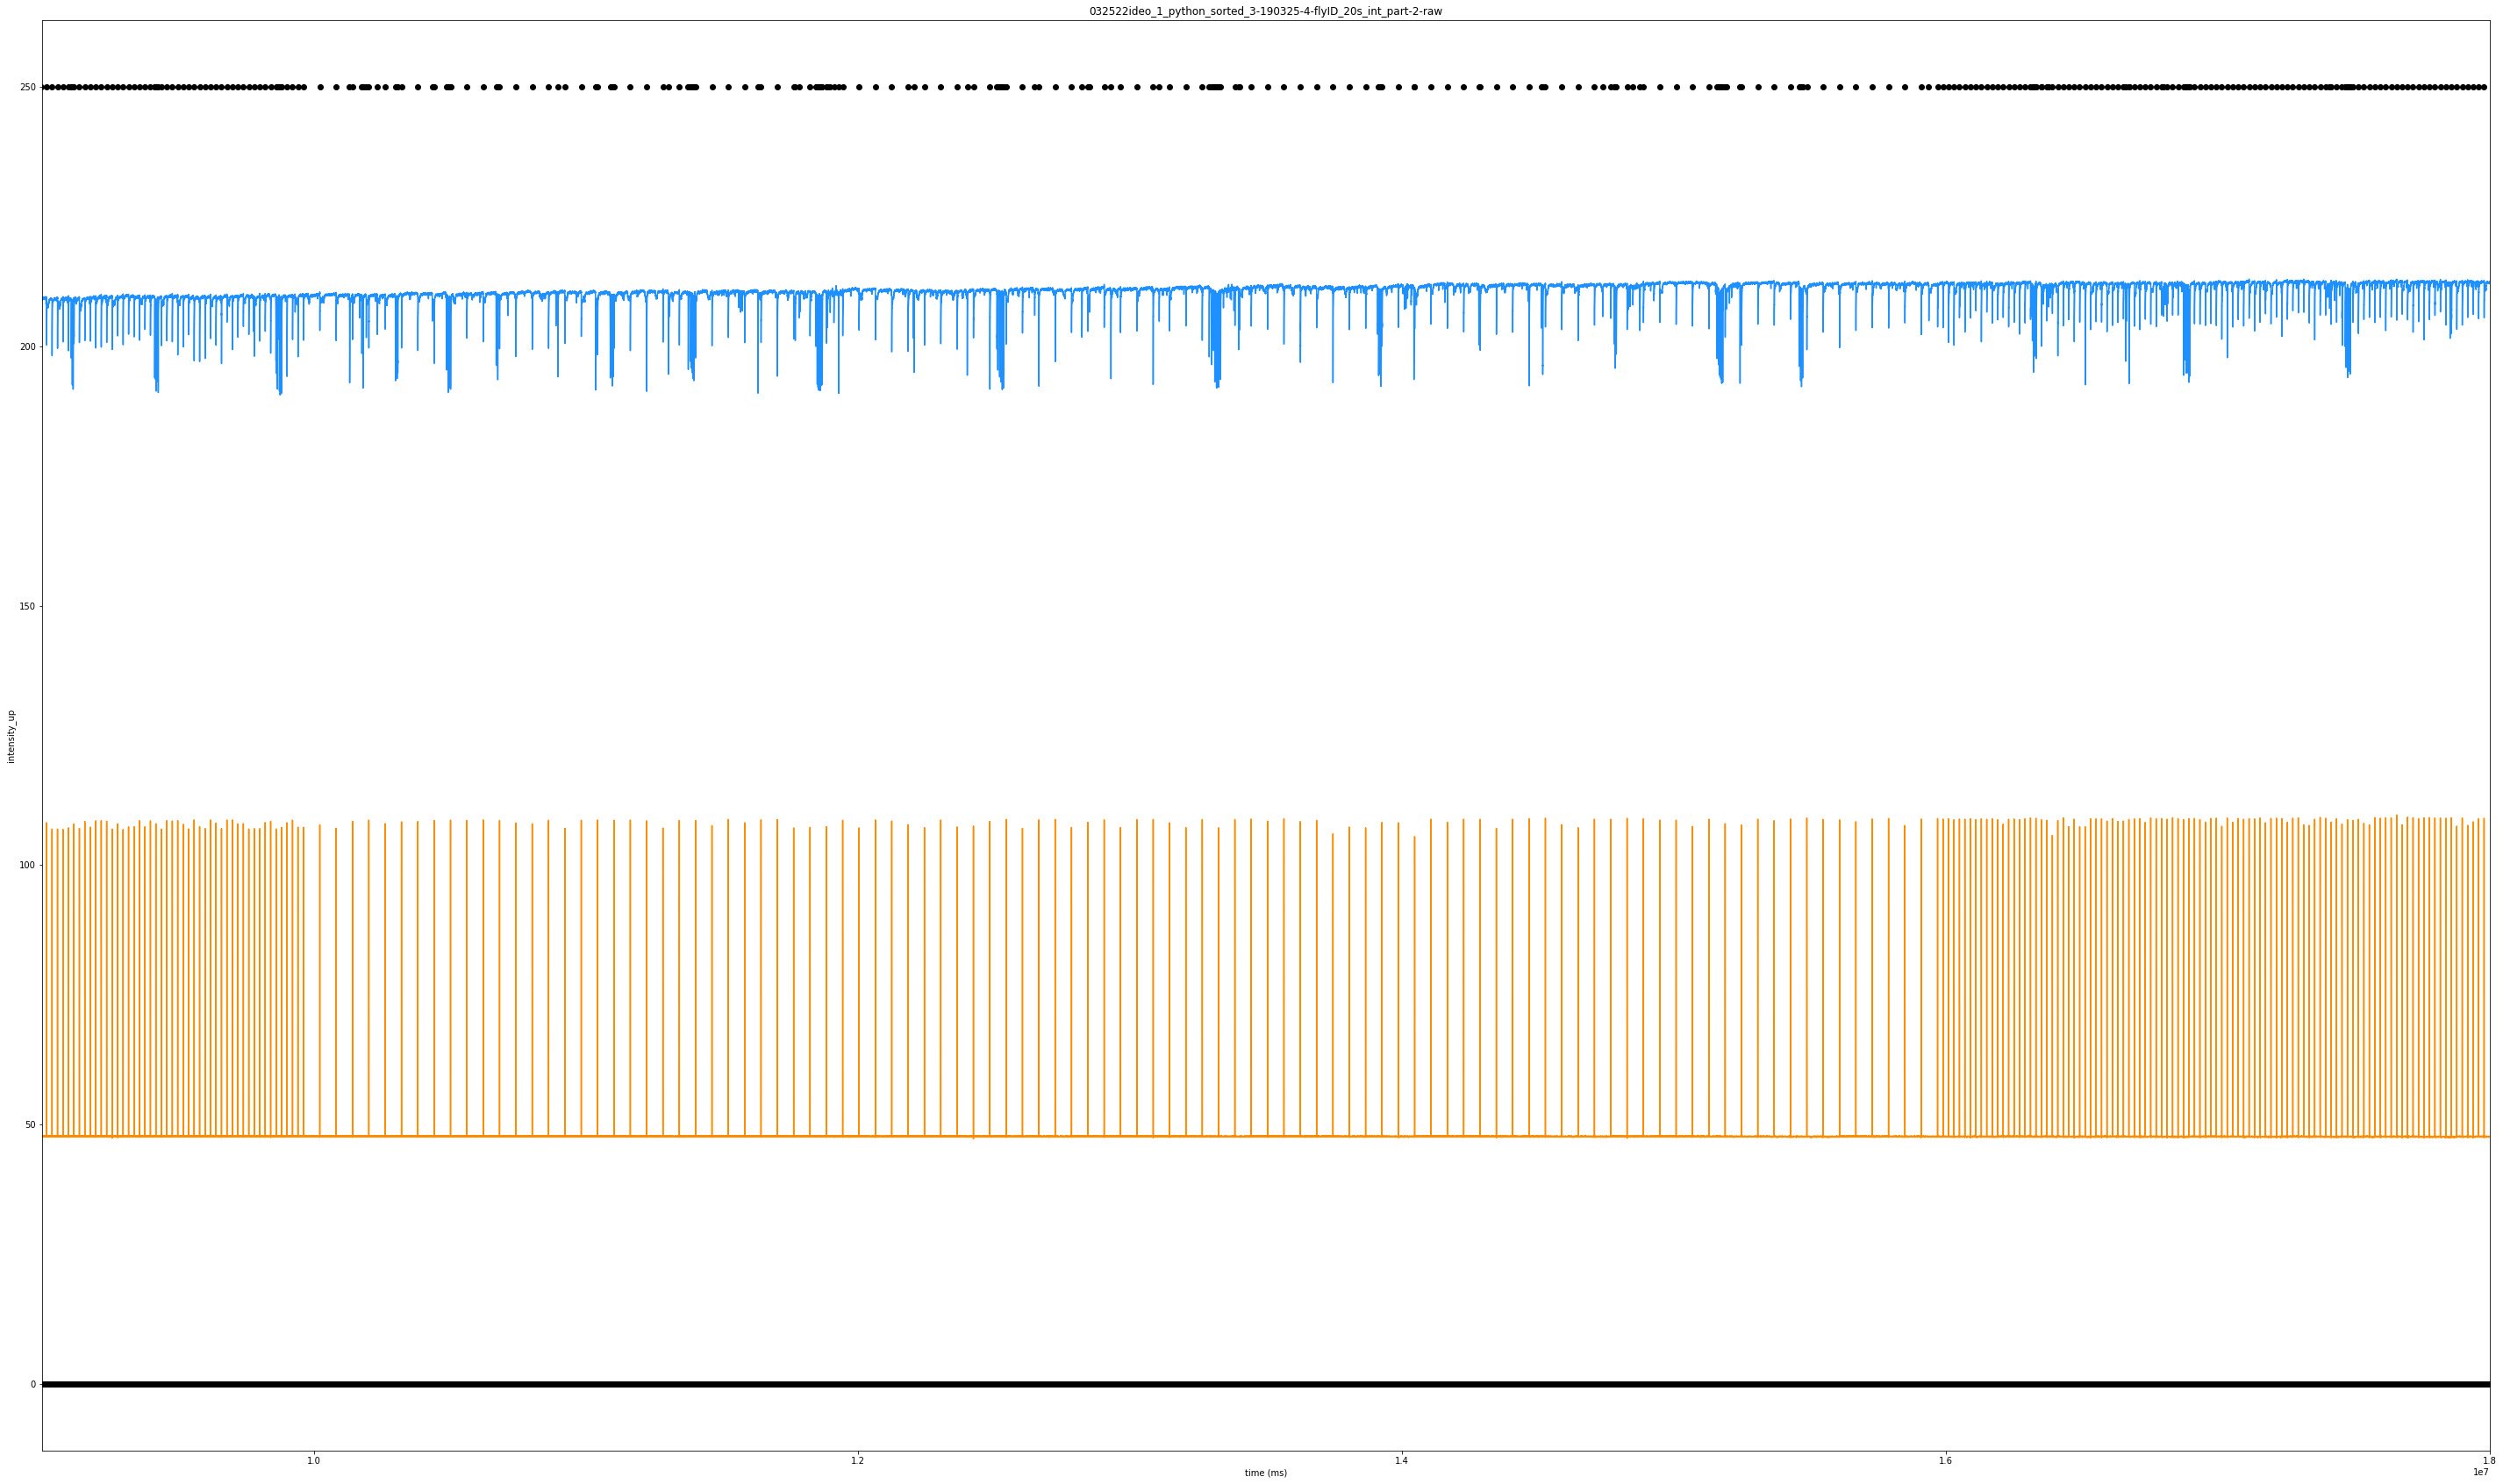

folder there


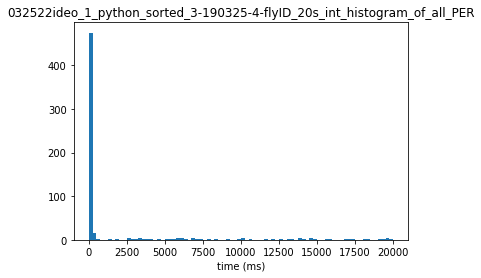

folder there
folder there
('first per time', array([ 5016,  5346,  2541,  3795,  2508,  1947, 18348, 10098,  3366,
        1782,  3399,  2574, 29403, 31350, 56727, 32571, 43758, 44088,
       39336, 27687, 35706, 19668, 25608, 26103, 46596, 23298, 24024,
       20757, 35640, 49566, 57684, 40227, 57387, 32373, 19371, 38544,
       51348, 26070, 54747, 49830, 14619, 13233, 38115, 44385, 13827,
        9240,  6237, 10131, 15543,  3036, 19734,  3729, 49566, 33957,
       31482, 37719, 53097, 45441, 47784, 34221, 52569, 46662, 20592,
       32802, 48807,  5841, 20823,  4158, 21879, 37422, 26136, 44682,
       38247,  6303, 24684, 59697, 22110, 25344,  6864, 13365, 60027,
       47553, 57321, 55803, 45309, 30591, 12111, 21351, 29337,  4686,
       31515, 27852,  6930,  1353,  5841,  7920,  7029,  6237,  2871,
       14784, 12012,  3729], dtype=int64))


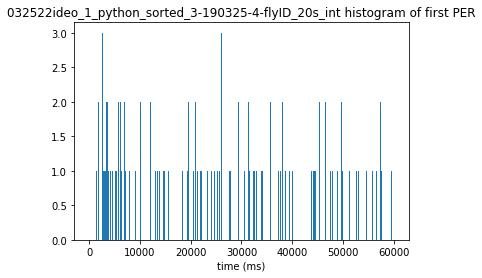

folder there
folder there


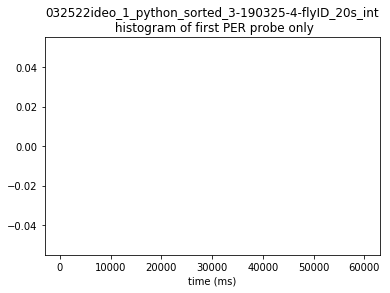

folder there
folder there


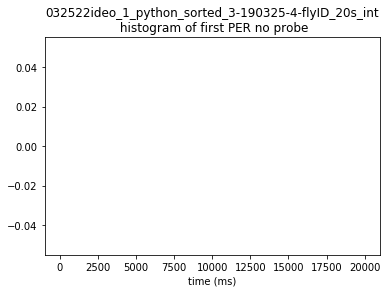

folder there
folder there


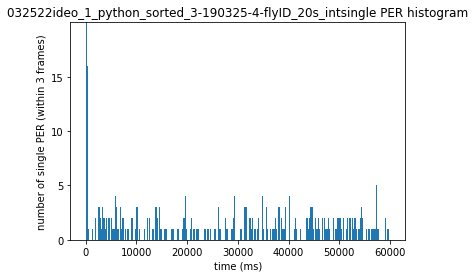

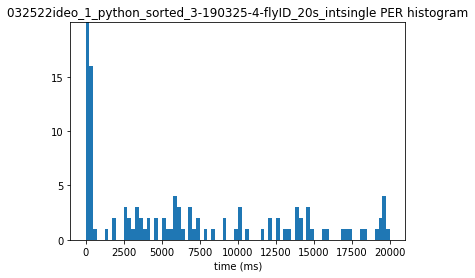

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

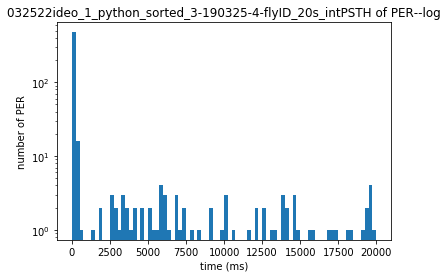

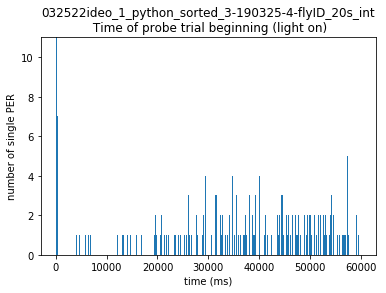

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

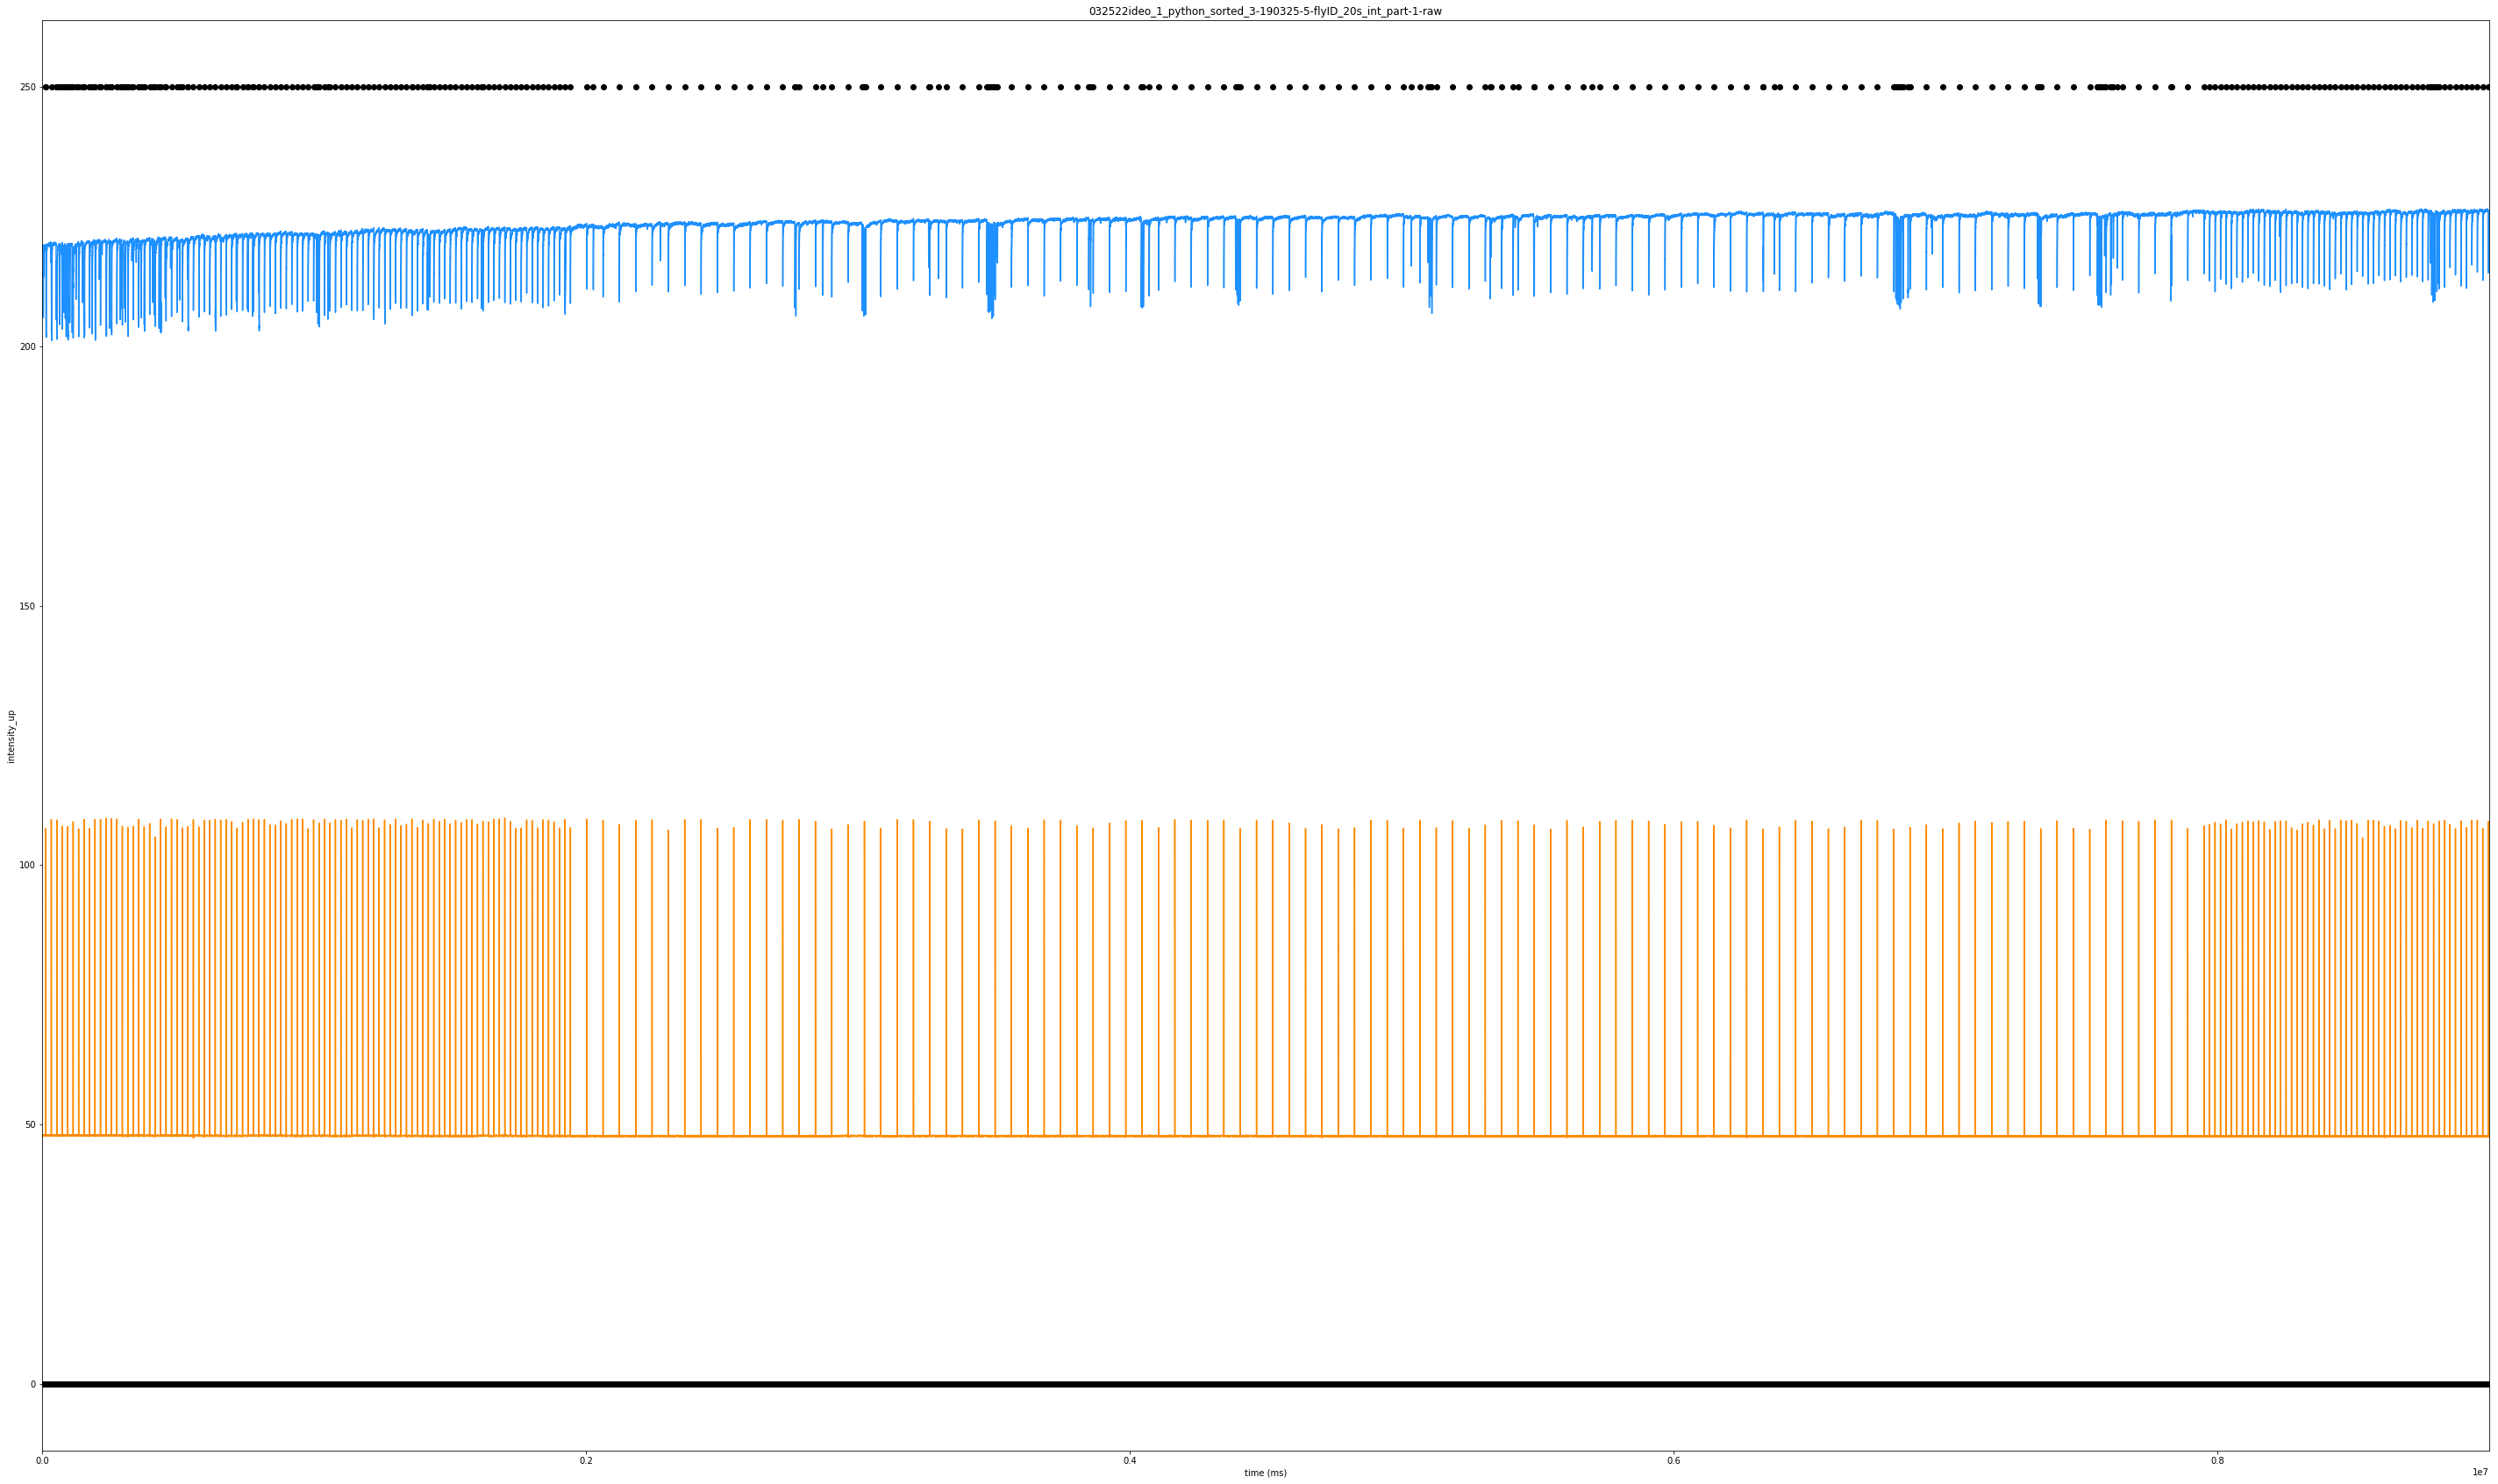

folder there
part-2-raw0325-5


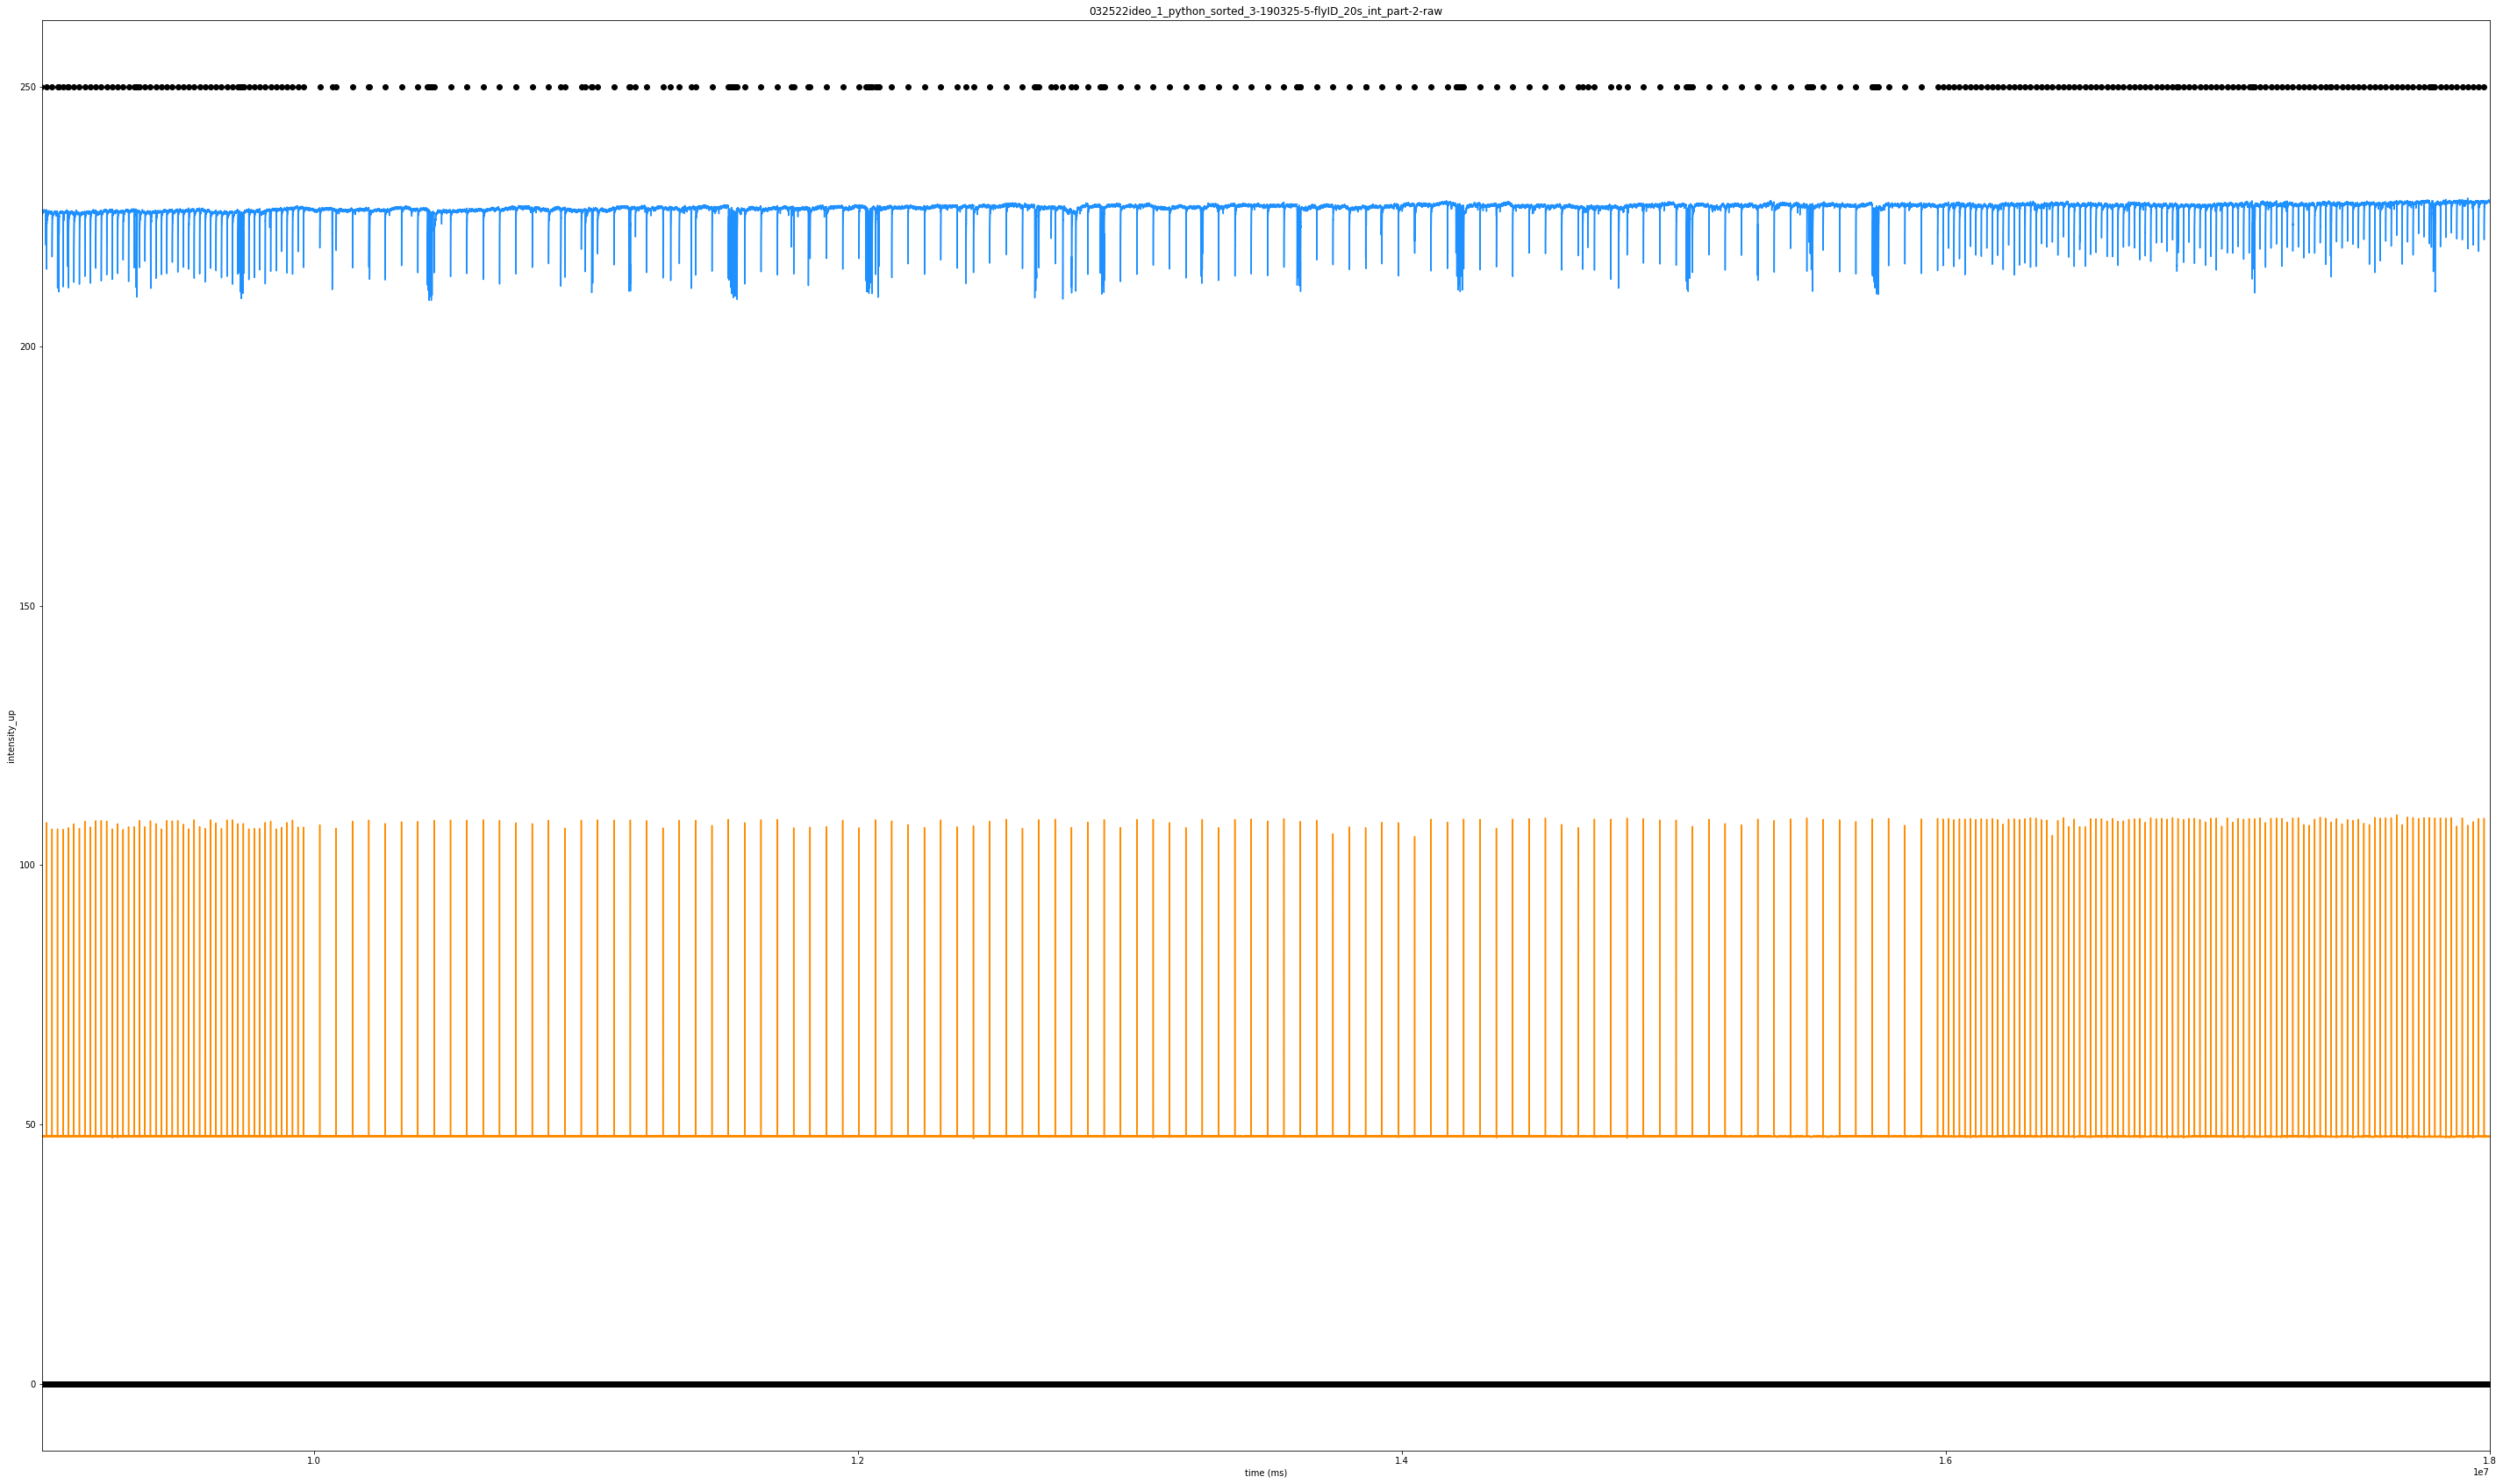

folder there


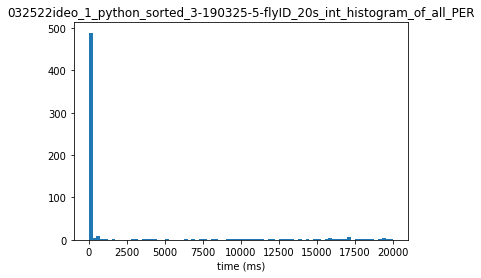

folder there
folder there
('first per time', array([17820, 10593,  6369,  7458, 10263, 13299, 19371,  9702, 15741,
       12507, 11979,  8448, 14883, 19470,  8448,  1188, 10725, 14355,
       17028,  9636, 18315, 17226, 18249, 17061, 18678, 10626, 12144,
       16302,  6303, 14751, 24024, 44484, 26433, 50853,  3597, 55737,
       31845, 29238,  3960, 43494, 56496,  4158, 42900, 28611, 29469,
       17193, 41976, 58443, 31911,  1122,  7722, 48642, 27753, 16731,
       58509, 19668, 19437,  9009,  4092,  4488, 16401,  7656,  3168,
       45375,  2805, 34914, 44913, 14454, 54648, 19173, 28248, 43230,
        1617, 51183, 53691, 24618,  9240, 32538, 45078, 45276, 28017,
       15708, 45375, 54945, 48246, 31845, 16797, 28710, 37488, 58872,
       11946,  3993, 15807, 11352, 17721,  6765], dtype=int64))


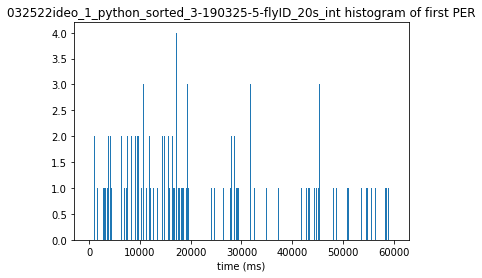

folder there
folder there


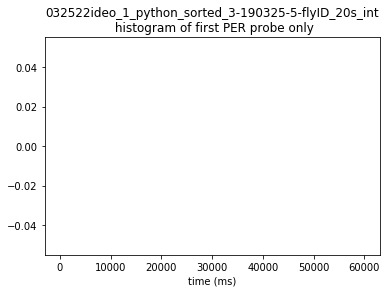

folder there
folder there


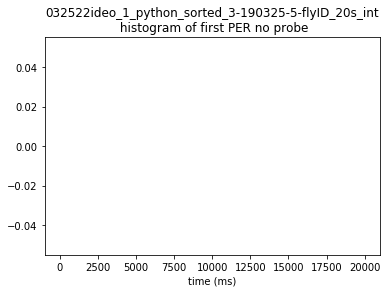

folder there
folder there


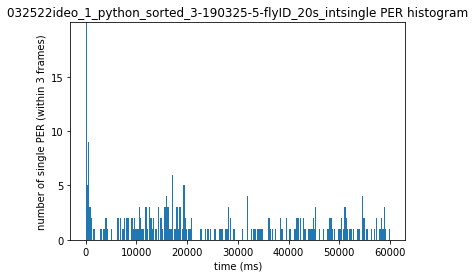

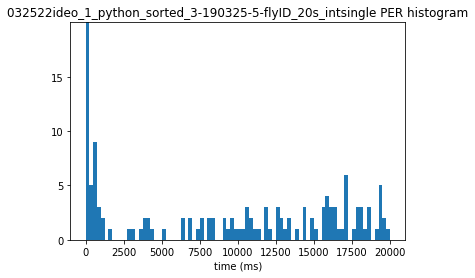

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

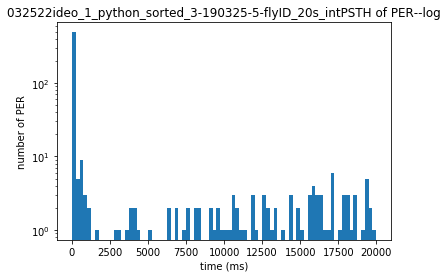

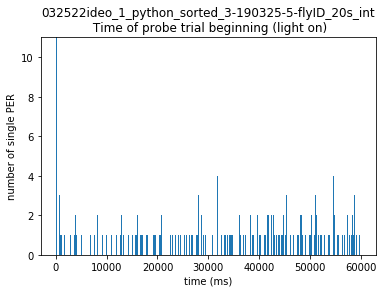

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

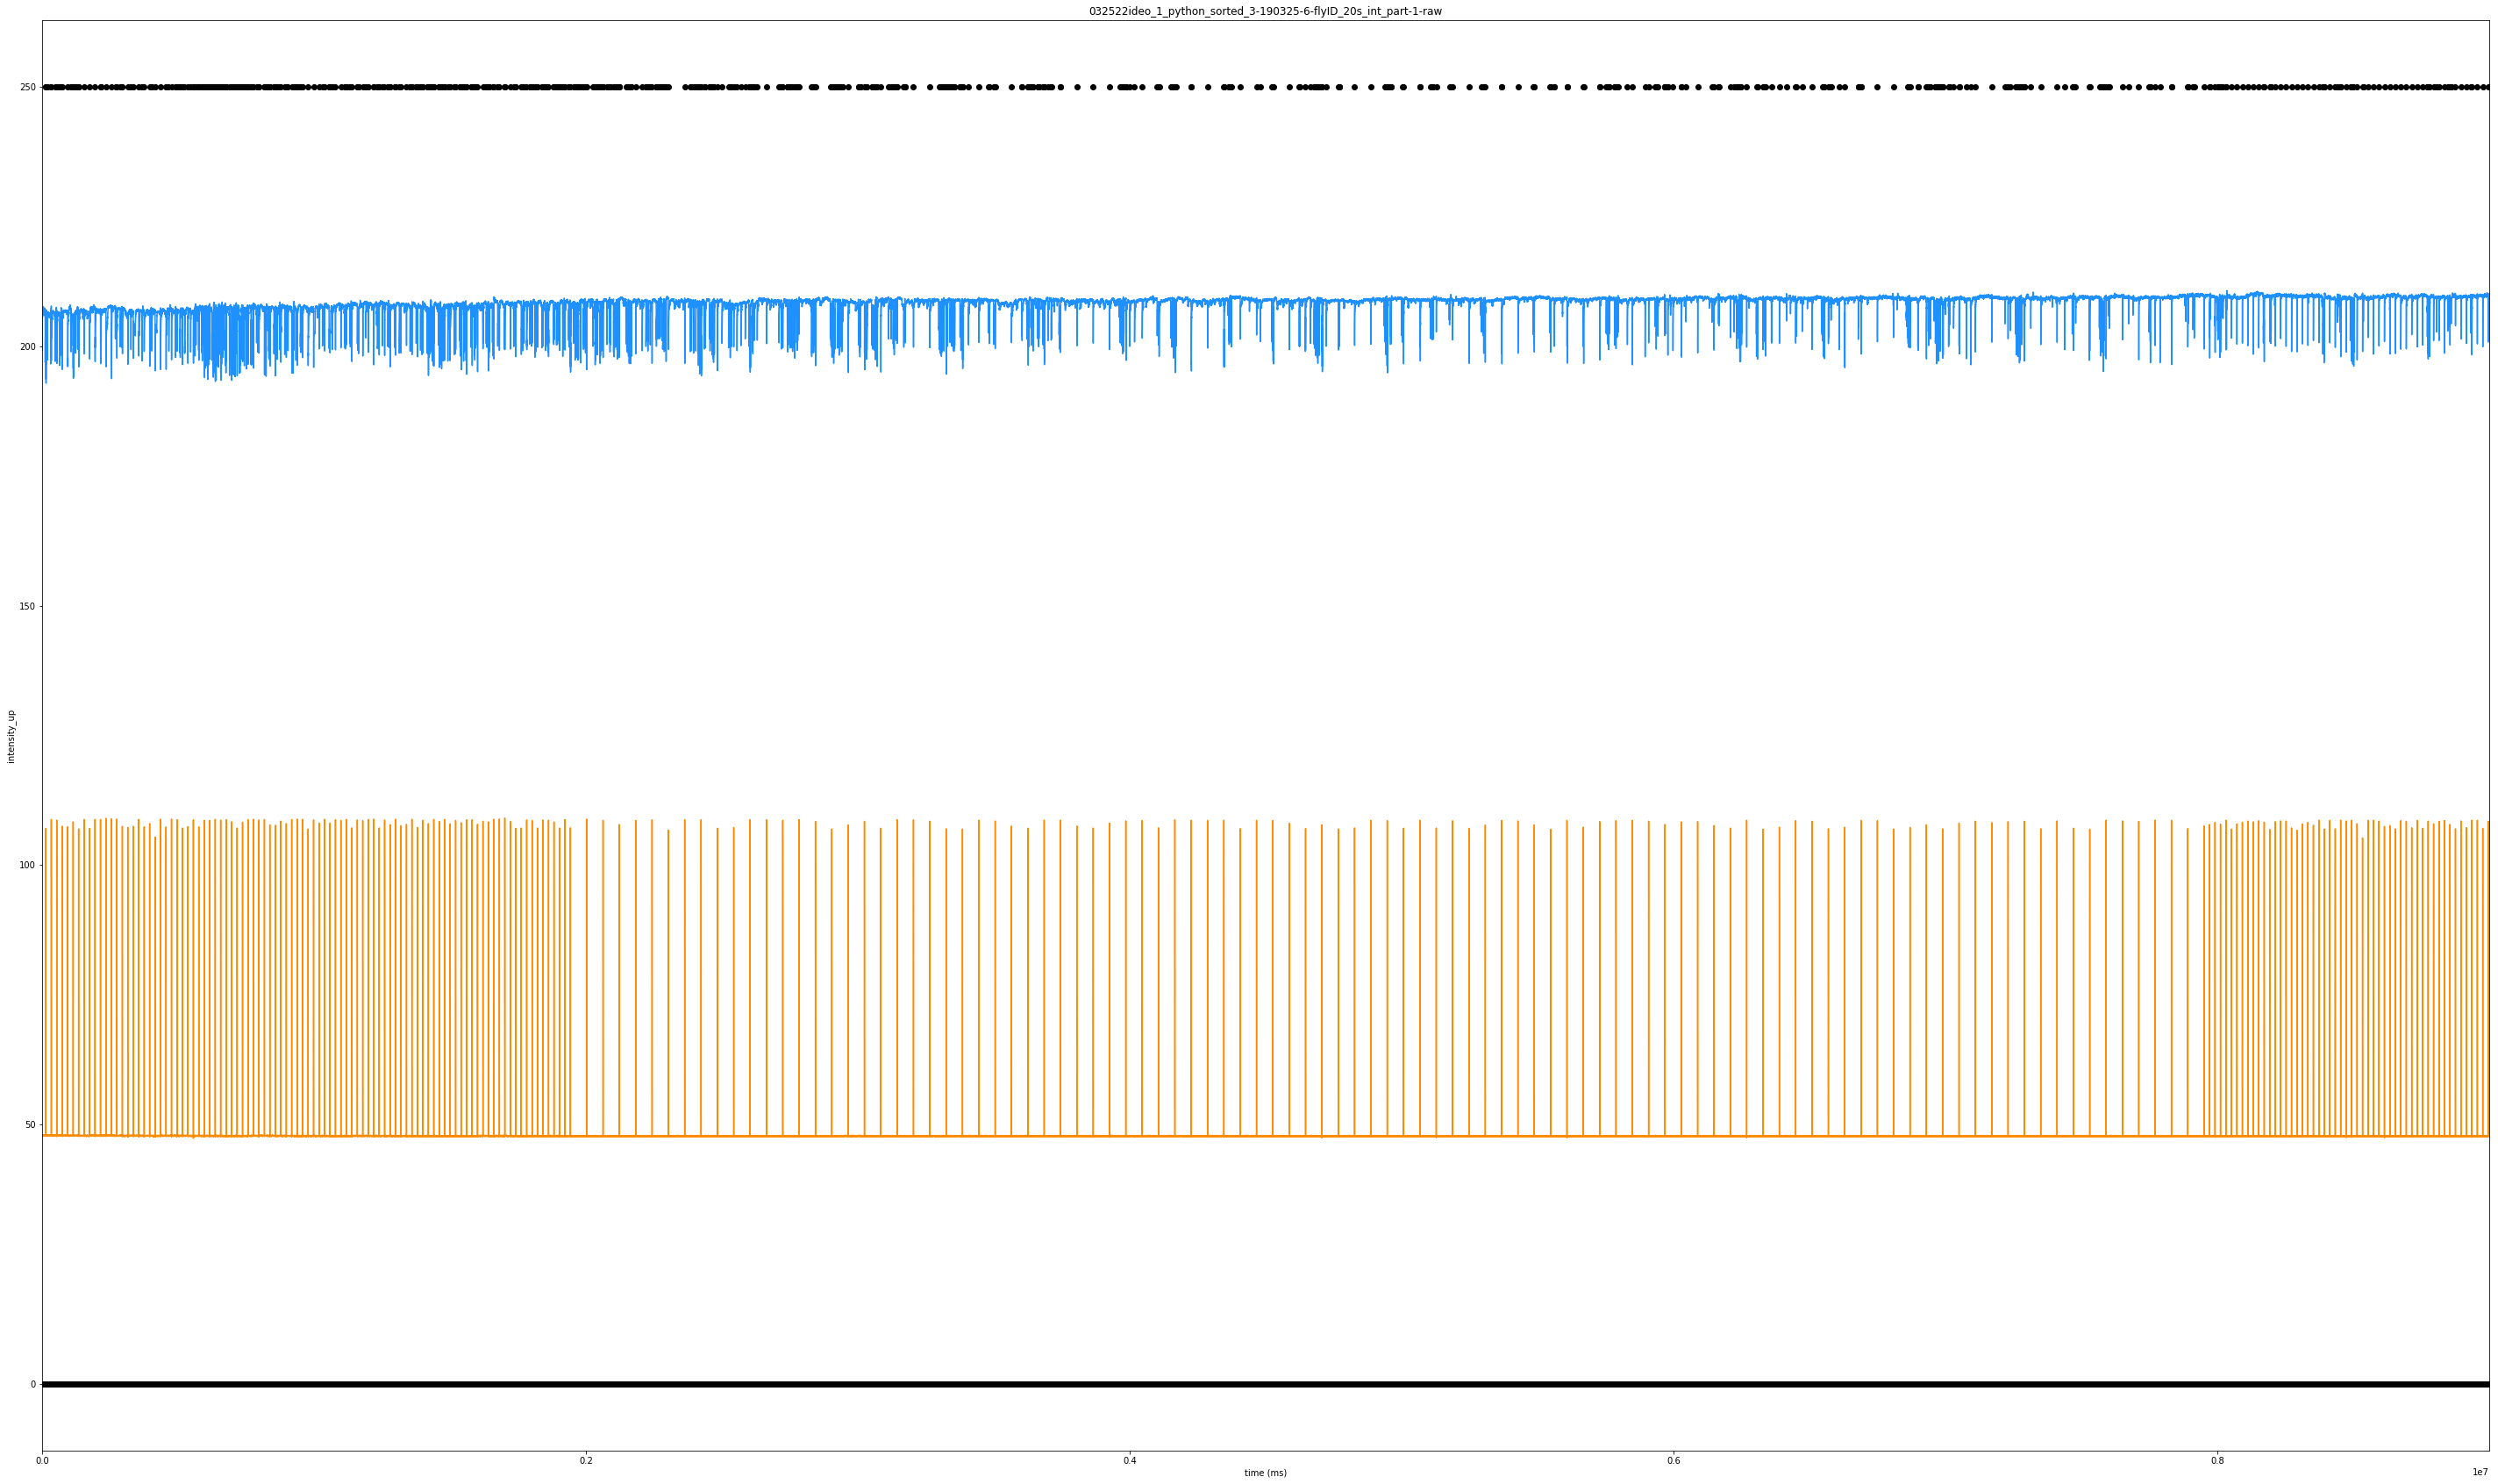

folder there
part-2-raw0325-6


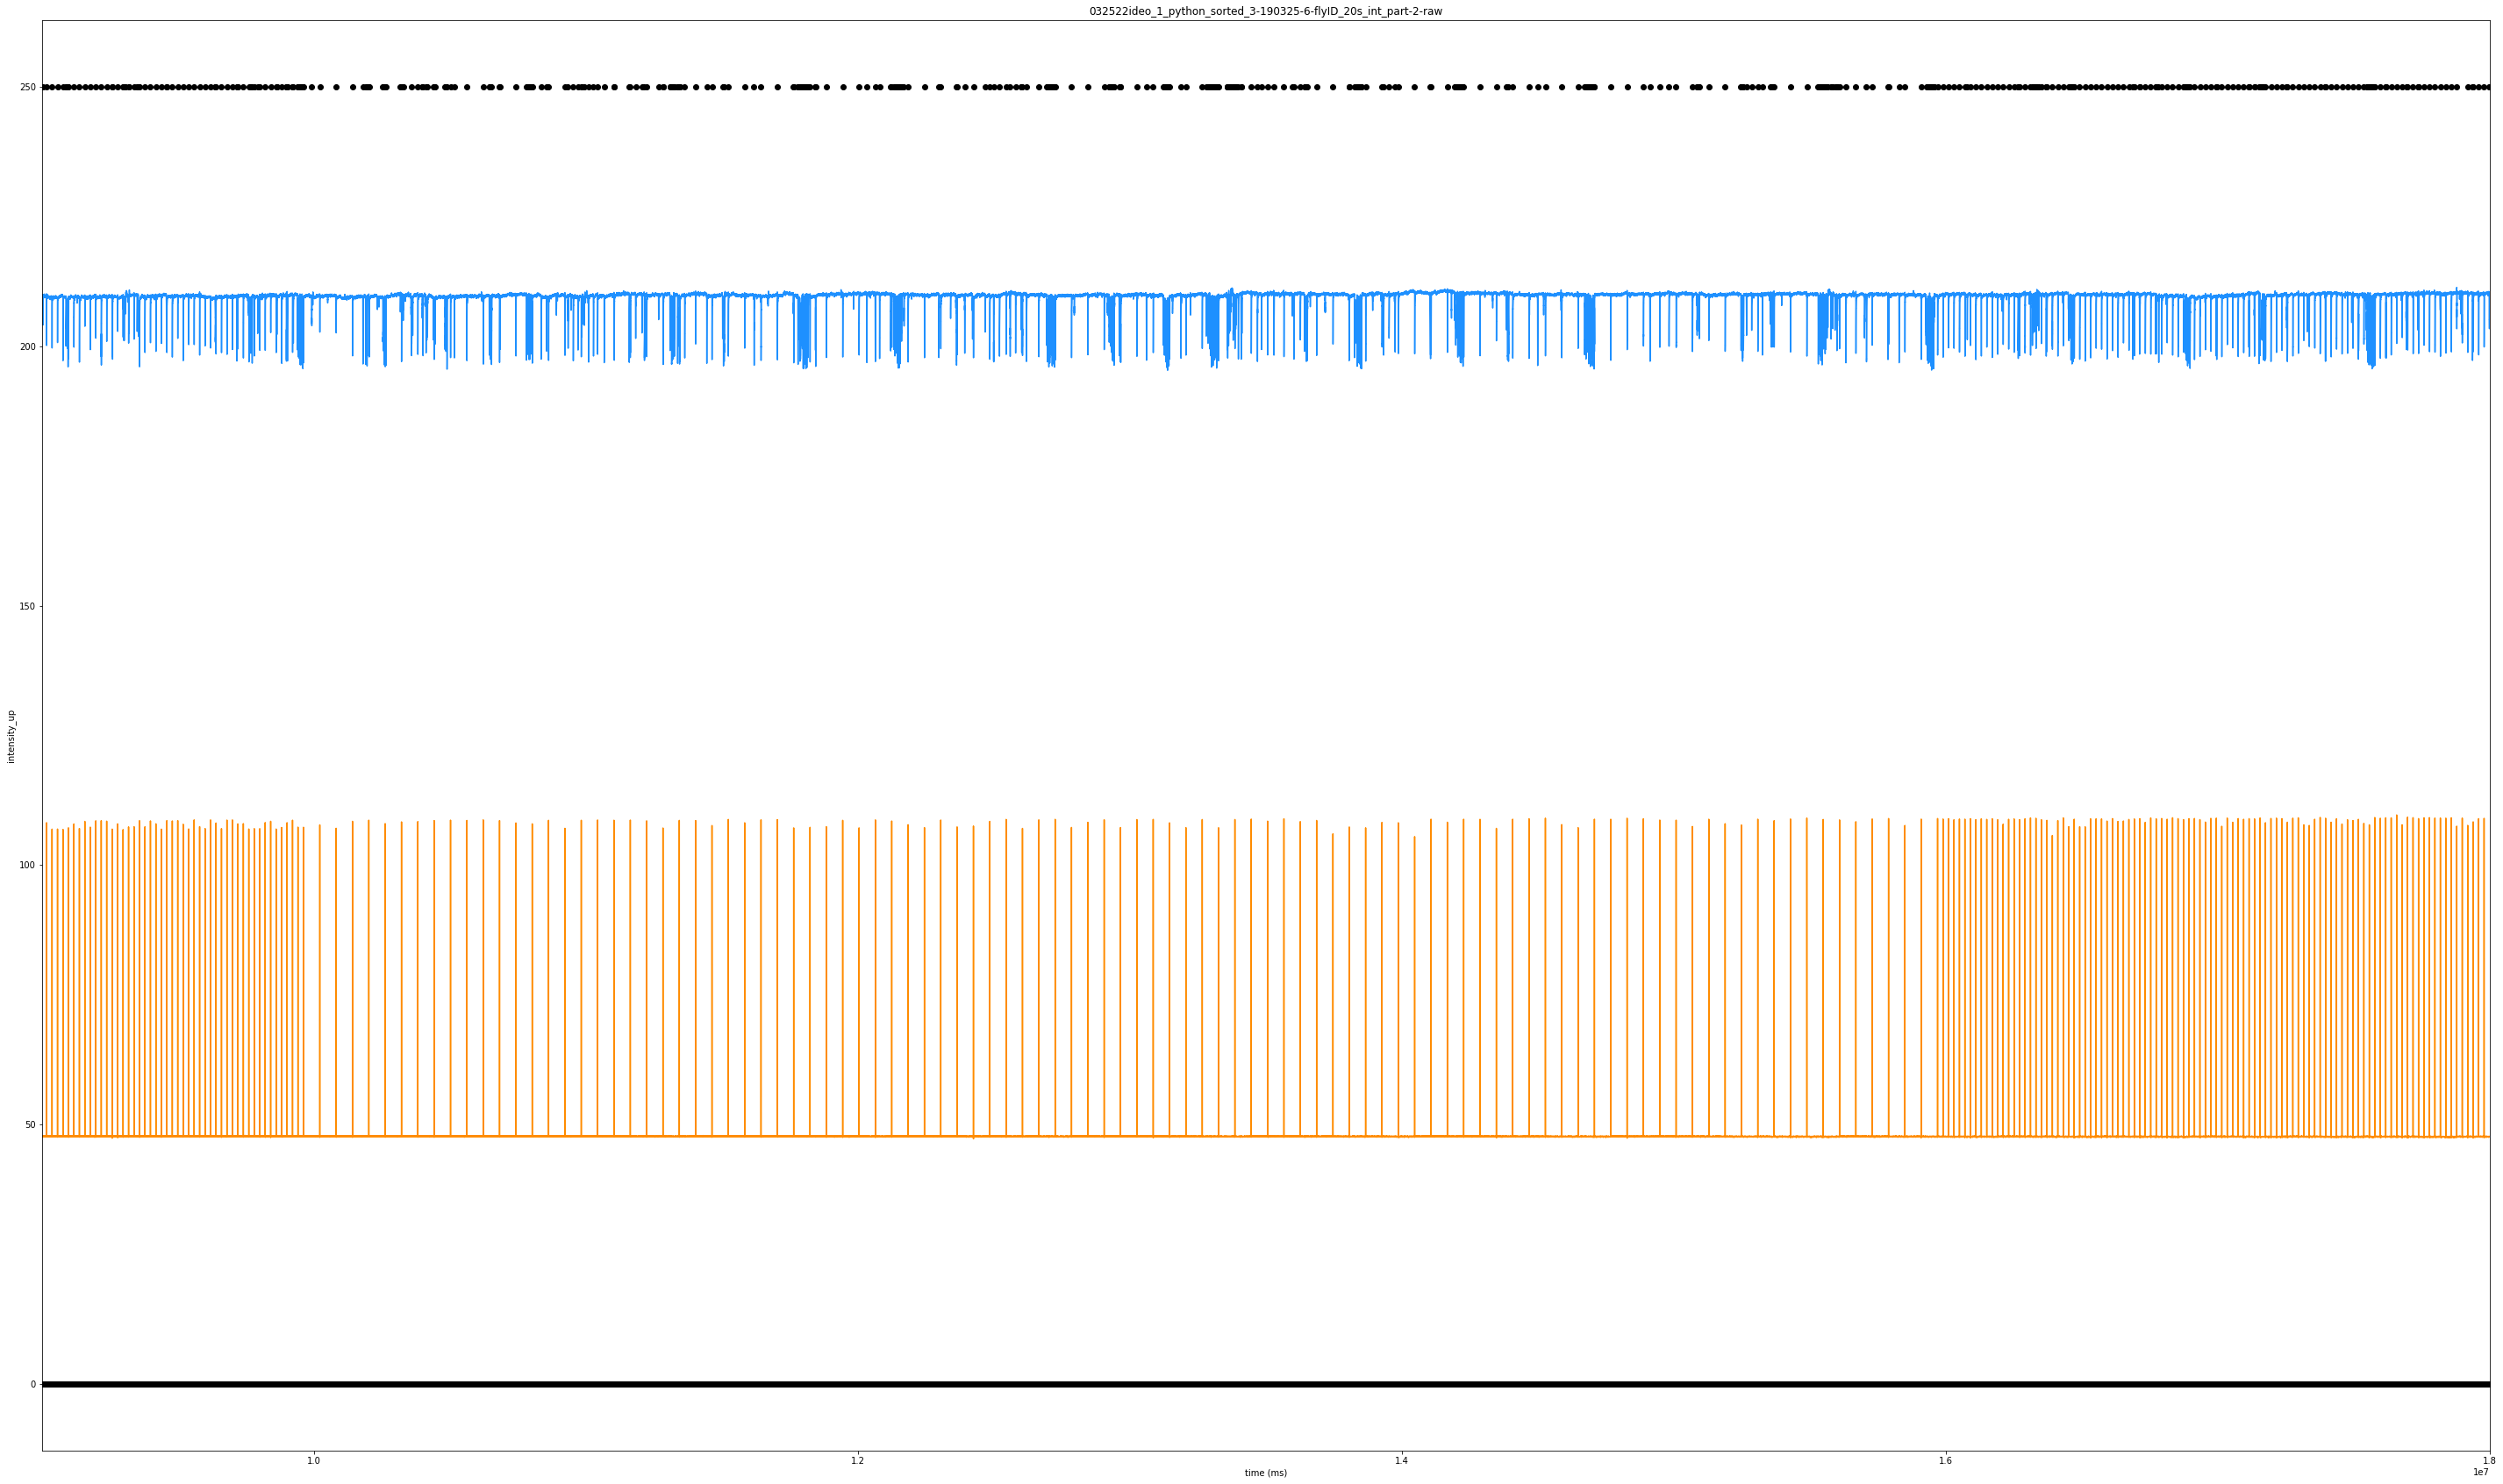

folder there


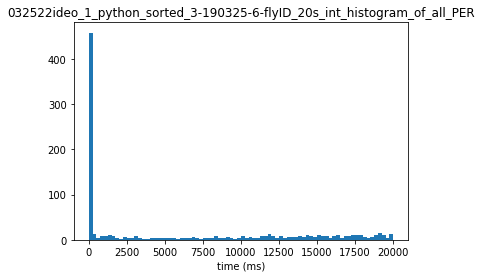

folder there
folder there
('first per time', array([ 1452, 14025, 10428, 12045,  1254,  1188, 14718, 12144, 11682,
       11814,  7491, 10230, 13563, 10692,  8118, 10131,  4785, 11484,
        3366,  7524,  3201,  3333, 12309,  5379,  8151,  6534, 11550,
       11451,  3960, 15114,  6567, 14388,  6501,  5478, 11781, 12705,
       17127,  8316, 14850, 12210,  2475, 11616, 19305, 13794, 12243,
       11880, 16137, 13992, 13200, 15411, 11517, 16401,  3201, 17655,
        1518, 11385, 15147, 13827,  8943, 16632,  9075, 11913,  1386,
       13992, 18942, 12540,  5544, 10593, 10065, 15708,  8877, 18348,
        9240, 11847, 13629, 11055, 22341, 14421, 24255, 23991, 15345,
       20592, 11979, 17094, 12078,  1155, 46266, 16962, 46398, 54615,
        1914, 38016,  1122, 28809, 24453, 35277,  3135, 22242, 35211,
       37653,  1089,  1815, 38082,  1716, 55176,  2211,  4059, 17424,
       13926,  1716, 36993, 17721,  1254,  3201, 50622, 11253,  1419,
       48840, 46299,  1089, 56067, 56991, 130

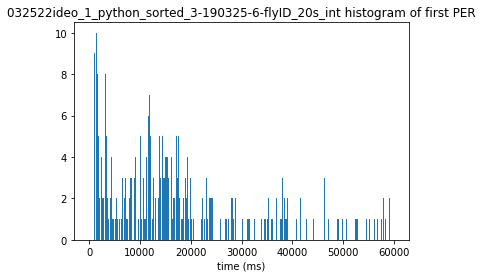

folder there
folder there


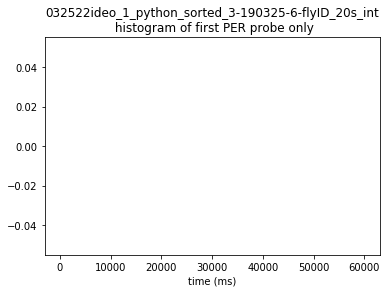

folder there
folder there


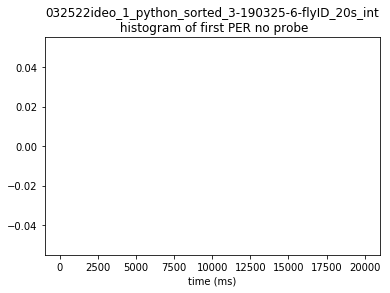

folder there
folder there


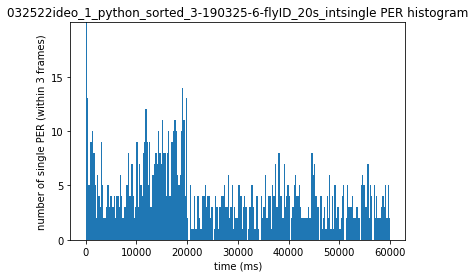

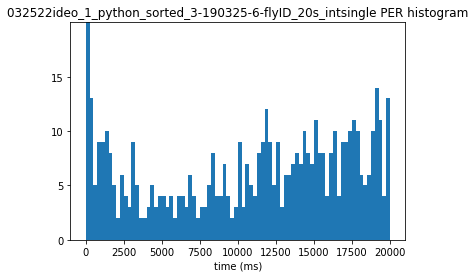

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

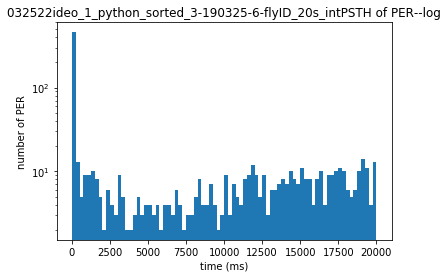

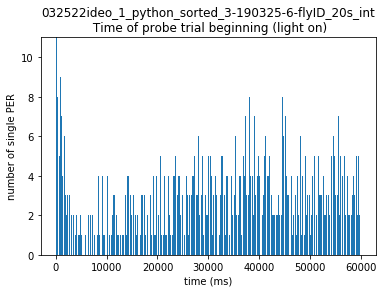

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

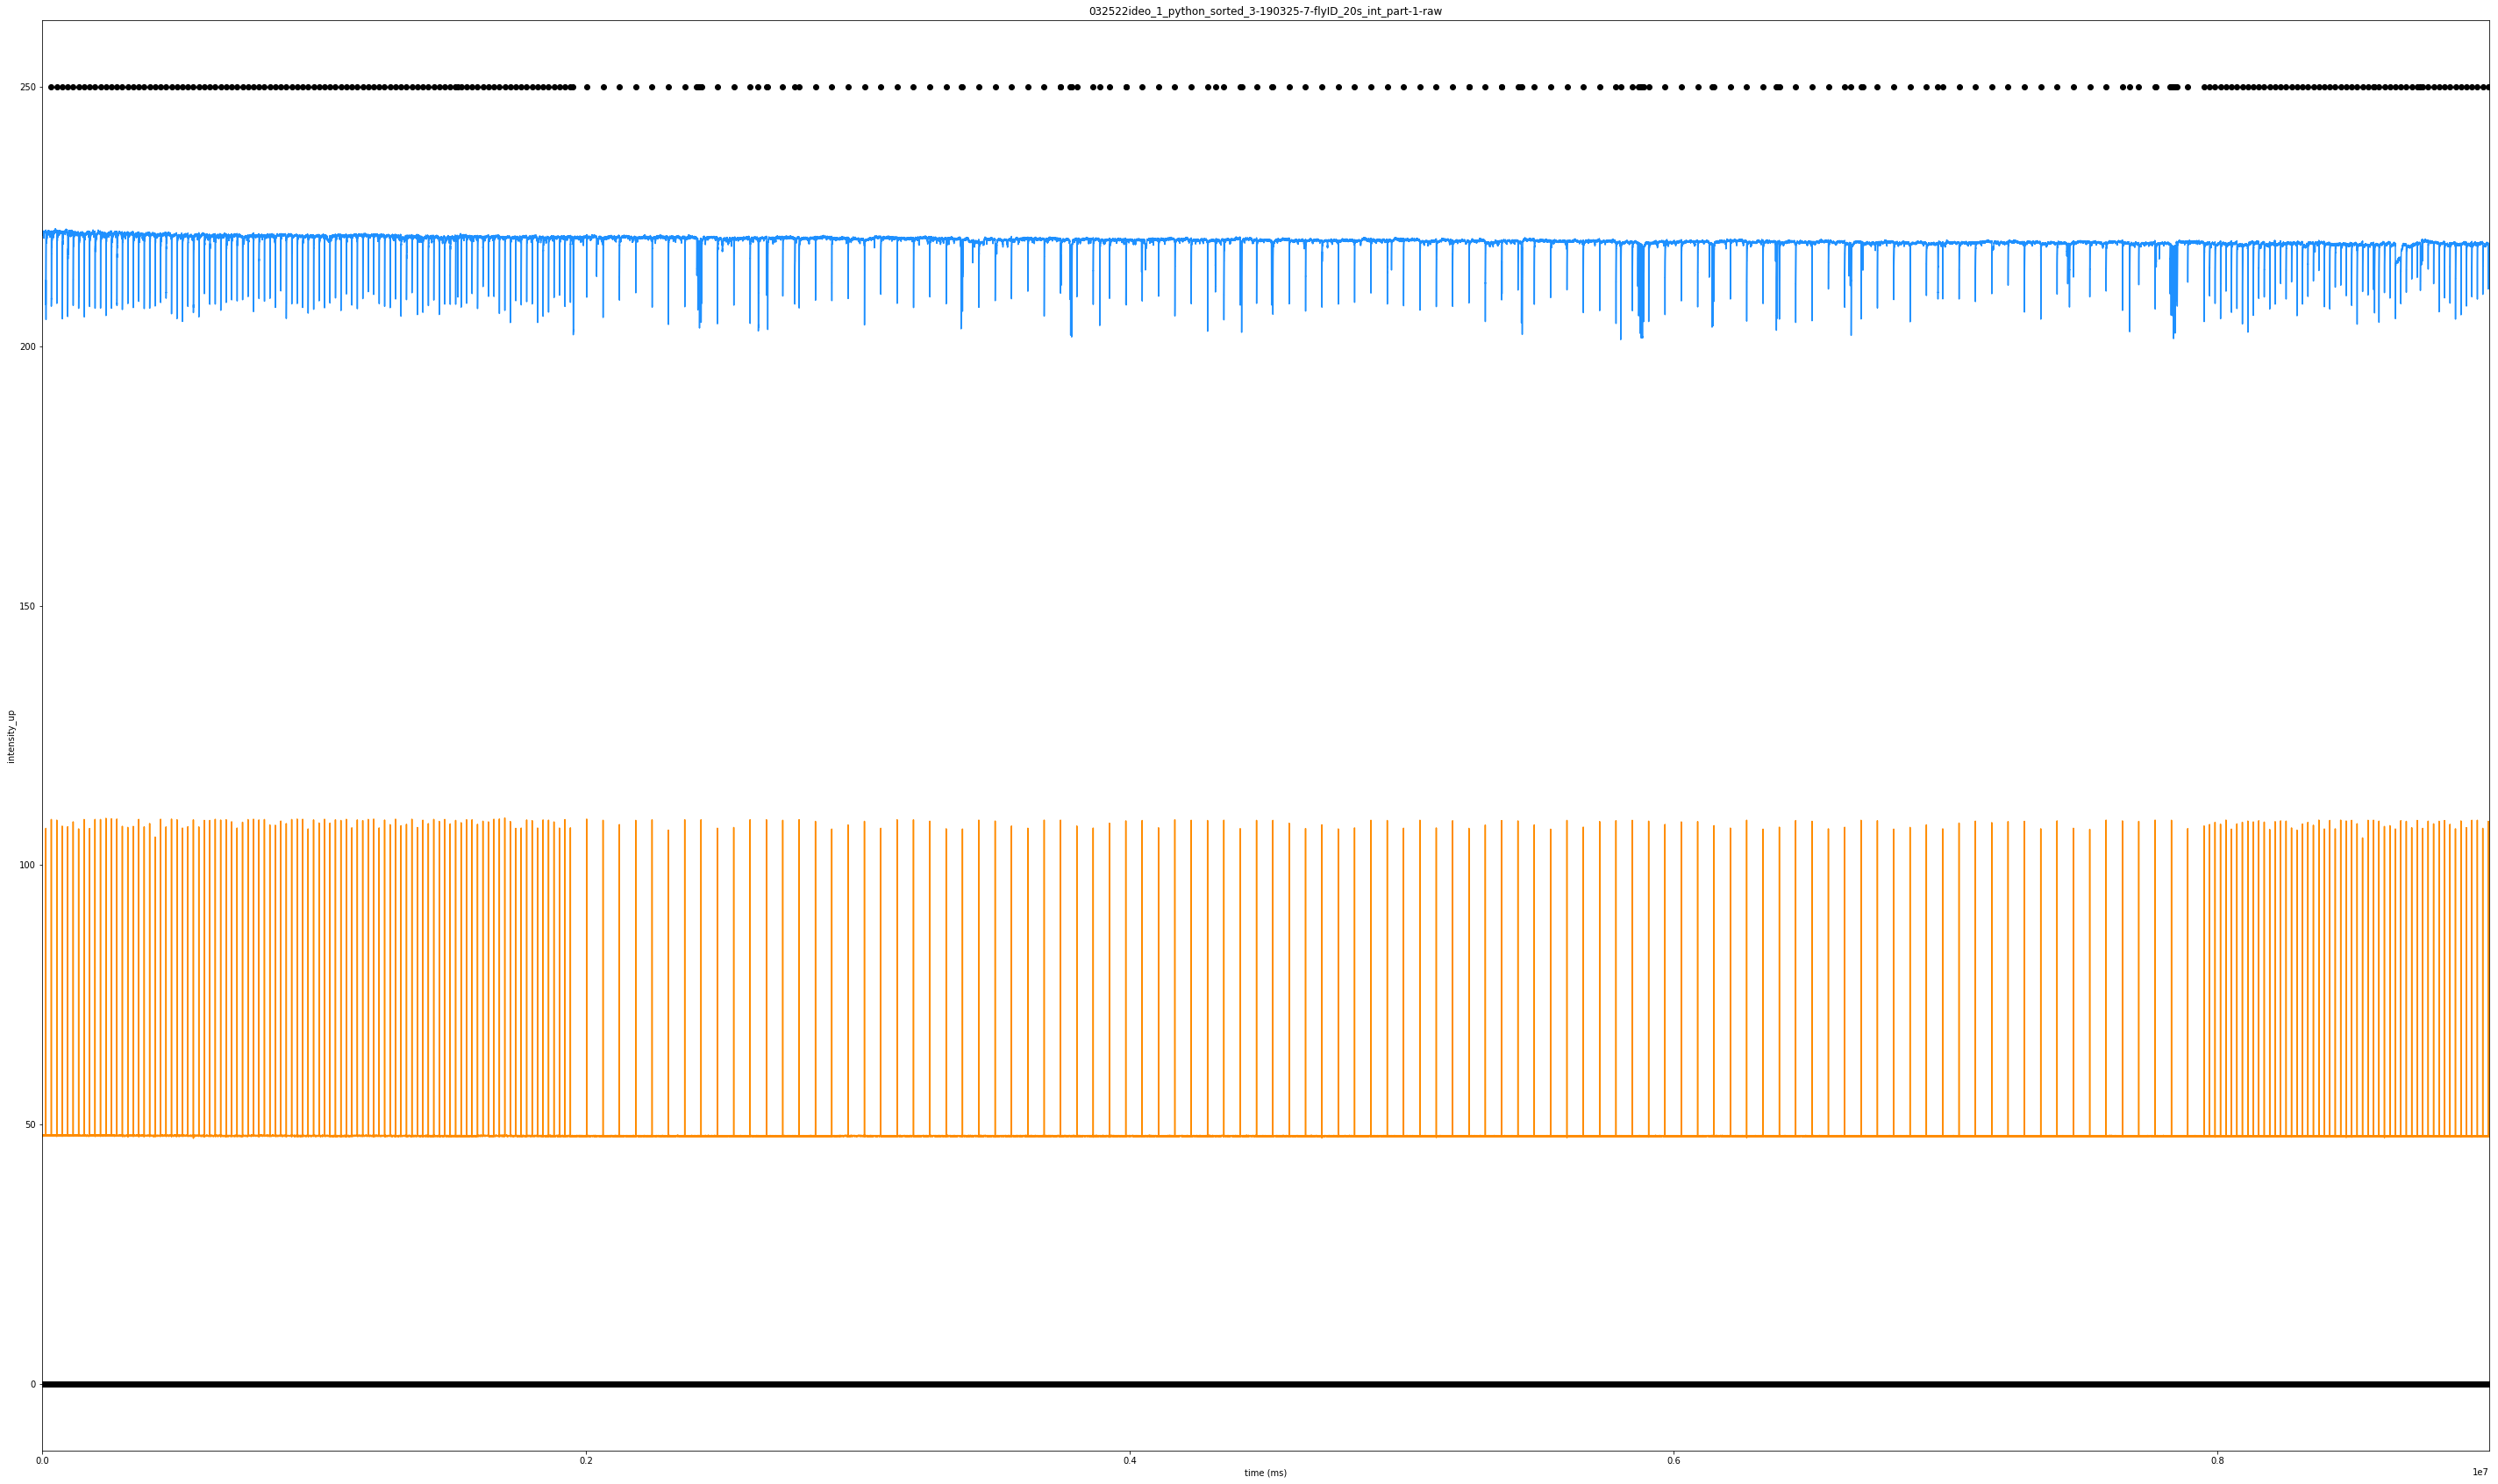

folder there
part-2-raw0325-7


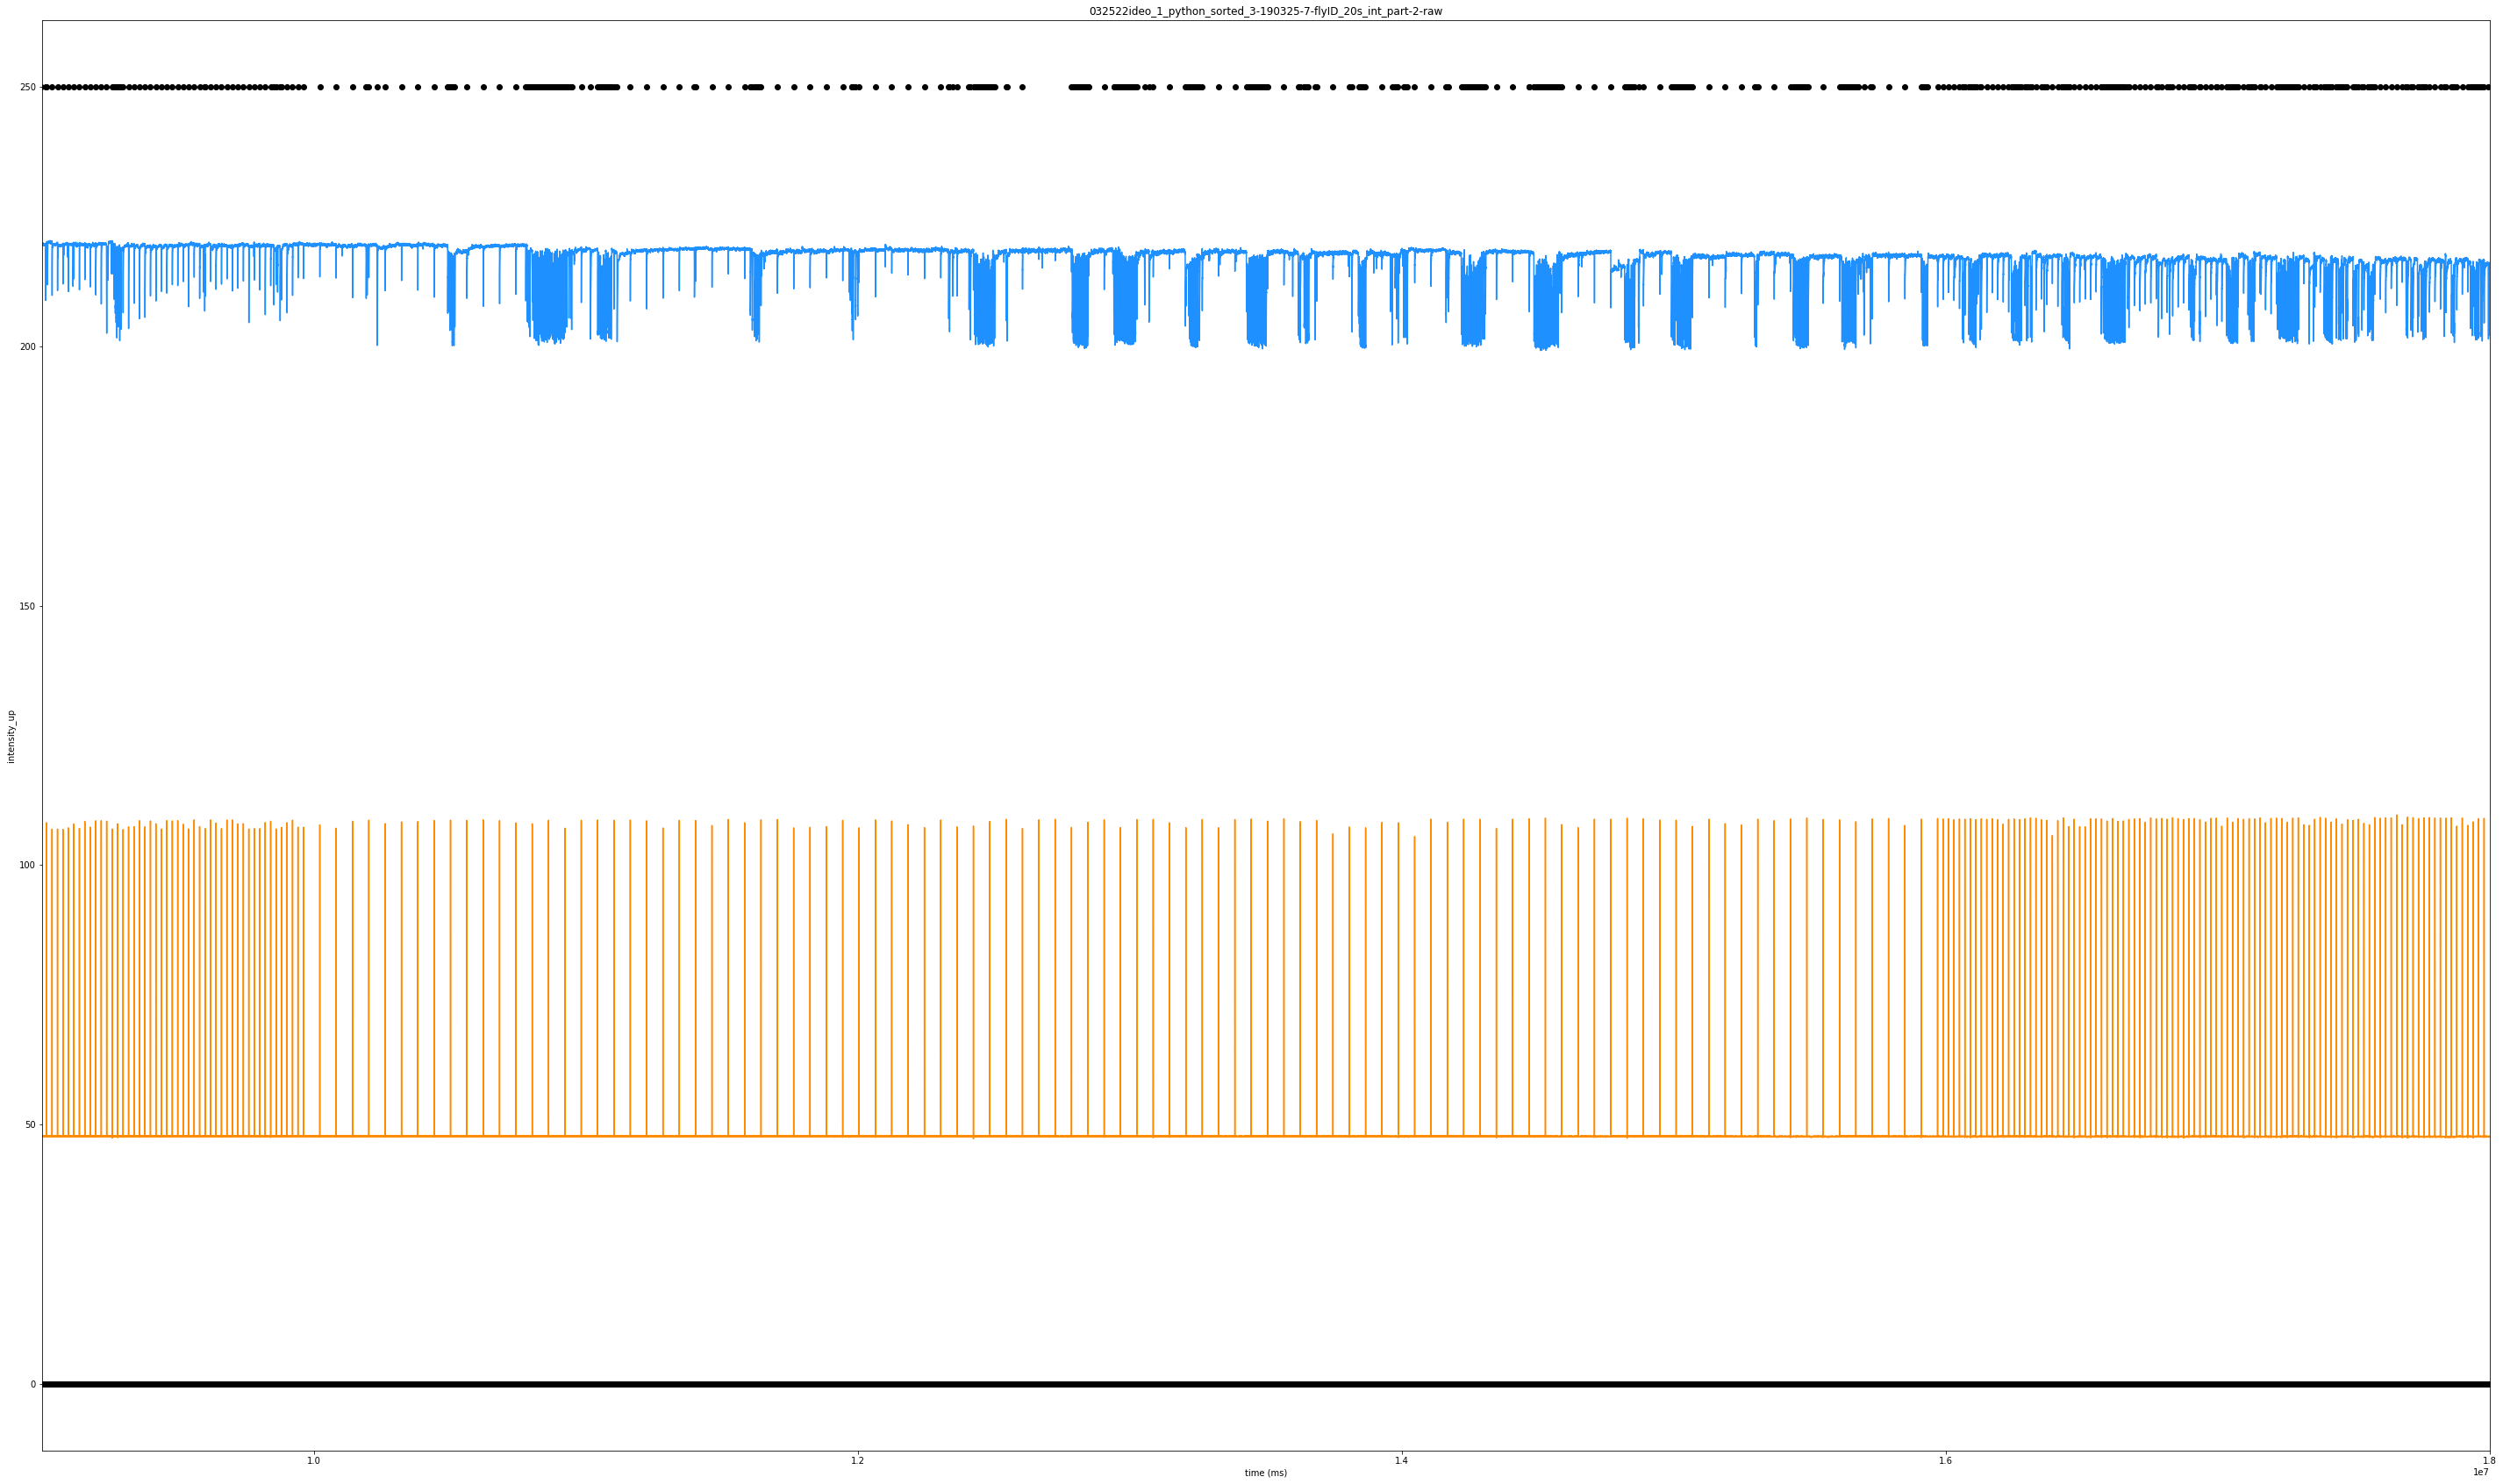

folder there


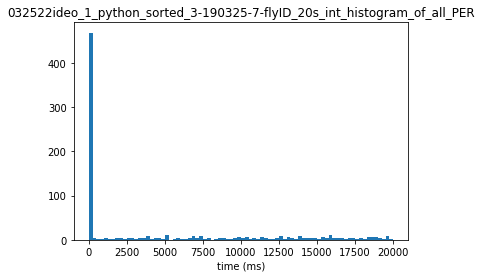

folder there
folder there
('first per time', array([ 7491, 10395, 44484,  2079, 29931,  4818, 44286, 54714,  1320,
       24090, 28710,  5181, 55077,  1056, 12507, 17193, 23397, 52734,
       48708, 23430,  6864, 42306, 26532,  2178,  3399,  3960, 11583,
       16566, 19536,  6633,  1815, 18546, 11781, 14520, 50160, 30591,
       49731,  2838, 36267,  1947,  1914,  3861, 33528,  4752, 11616,
       55539, 20460, 33132, 28677, 43659,  4191,  2706,  2871,  6699,
        3399, 37455,  1089, 28809, 57750, 10395, 42801,  2178, 52602,
       14124,  9405, 36597, 18975, 54648,  4521,  2904,  1980,  1023,
        1650, 51018,  6897, 42570,  4587, 47520, 10263,  4356,  8382,
        7557,  4356, 11253, 14091,  3828,  4356, 10164,  4719,  6105,
        6303,  3795,  9768, 14883,  5907,  1815, 18942,  7458,  5214,
        2442,  2343,  4620,  7557,  8778,  5049, 18612,  2706, 16830,
        2739,  3828, 15972,  5808,  3762,  3564,  3894,  2211,  3696,
       19536, 14883,  5115, 14289,  3003,  37

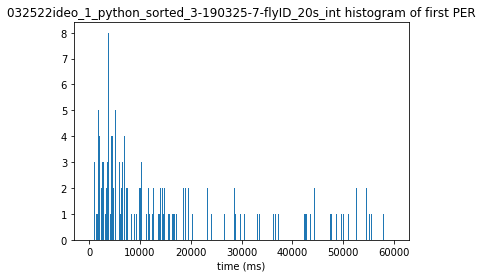

folder there
folder there


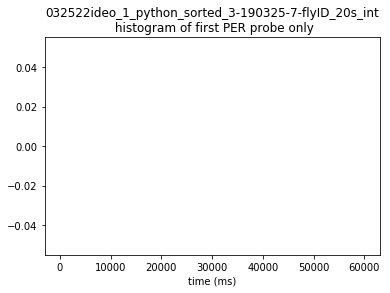

folder there
folder there


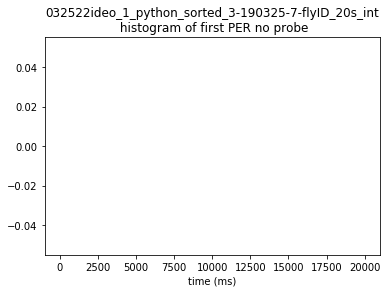

folder there
folder there


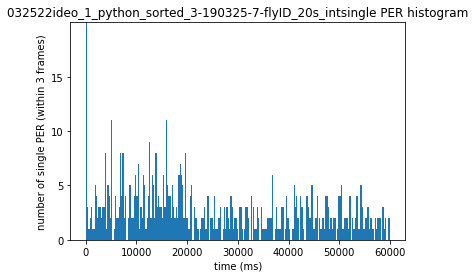

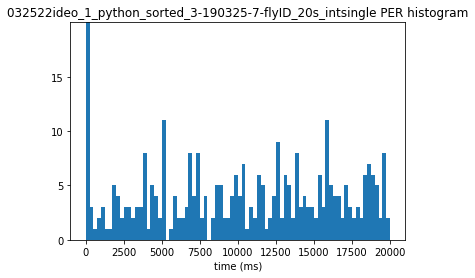

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

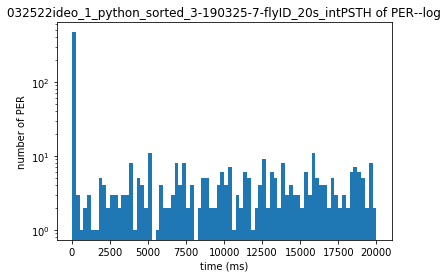

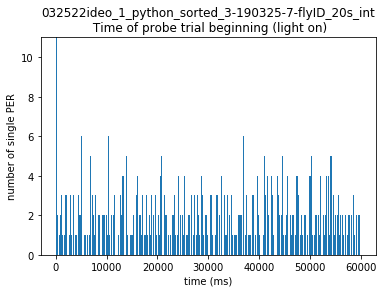

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

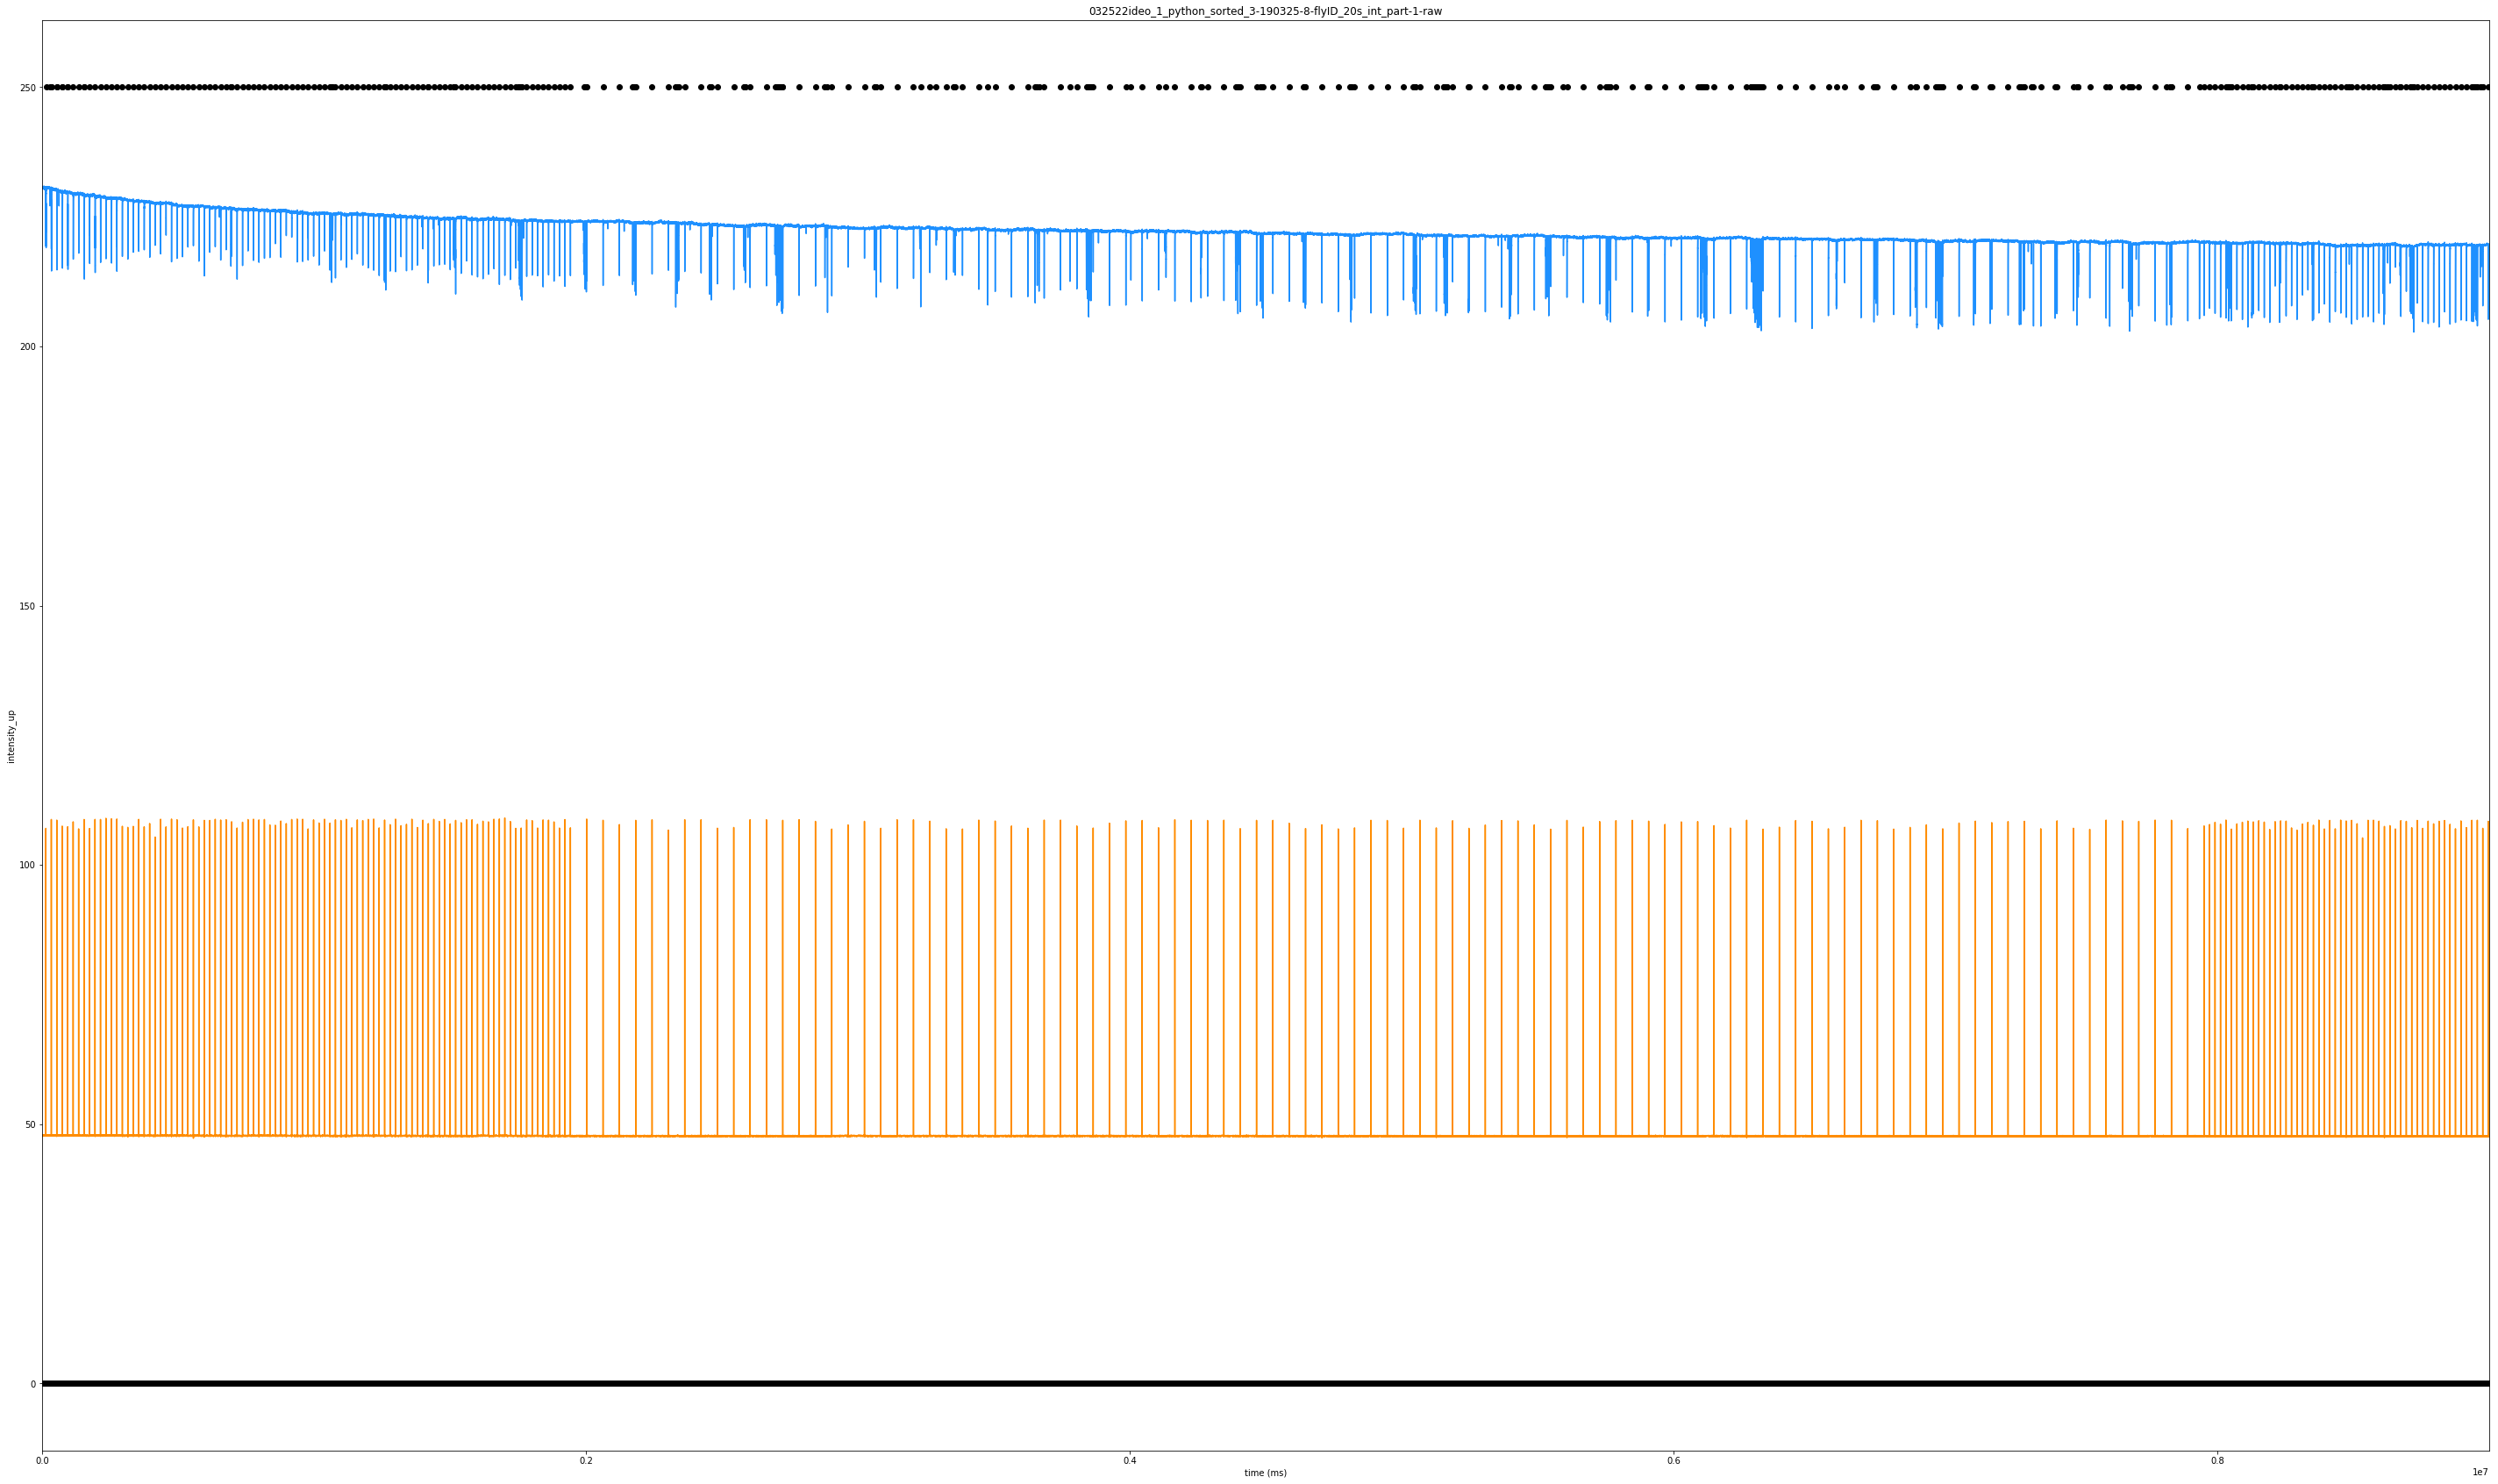

folder there
part-2-raw0325-8


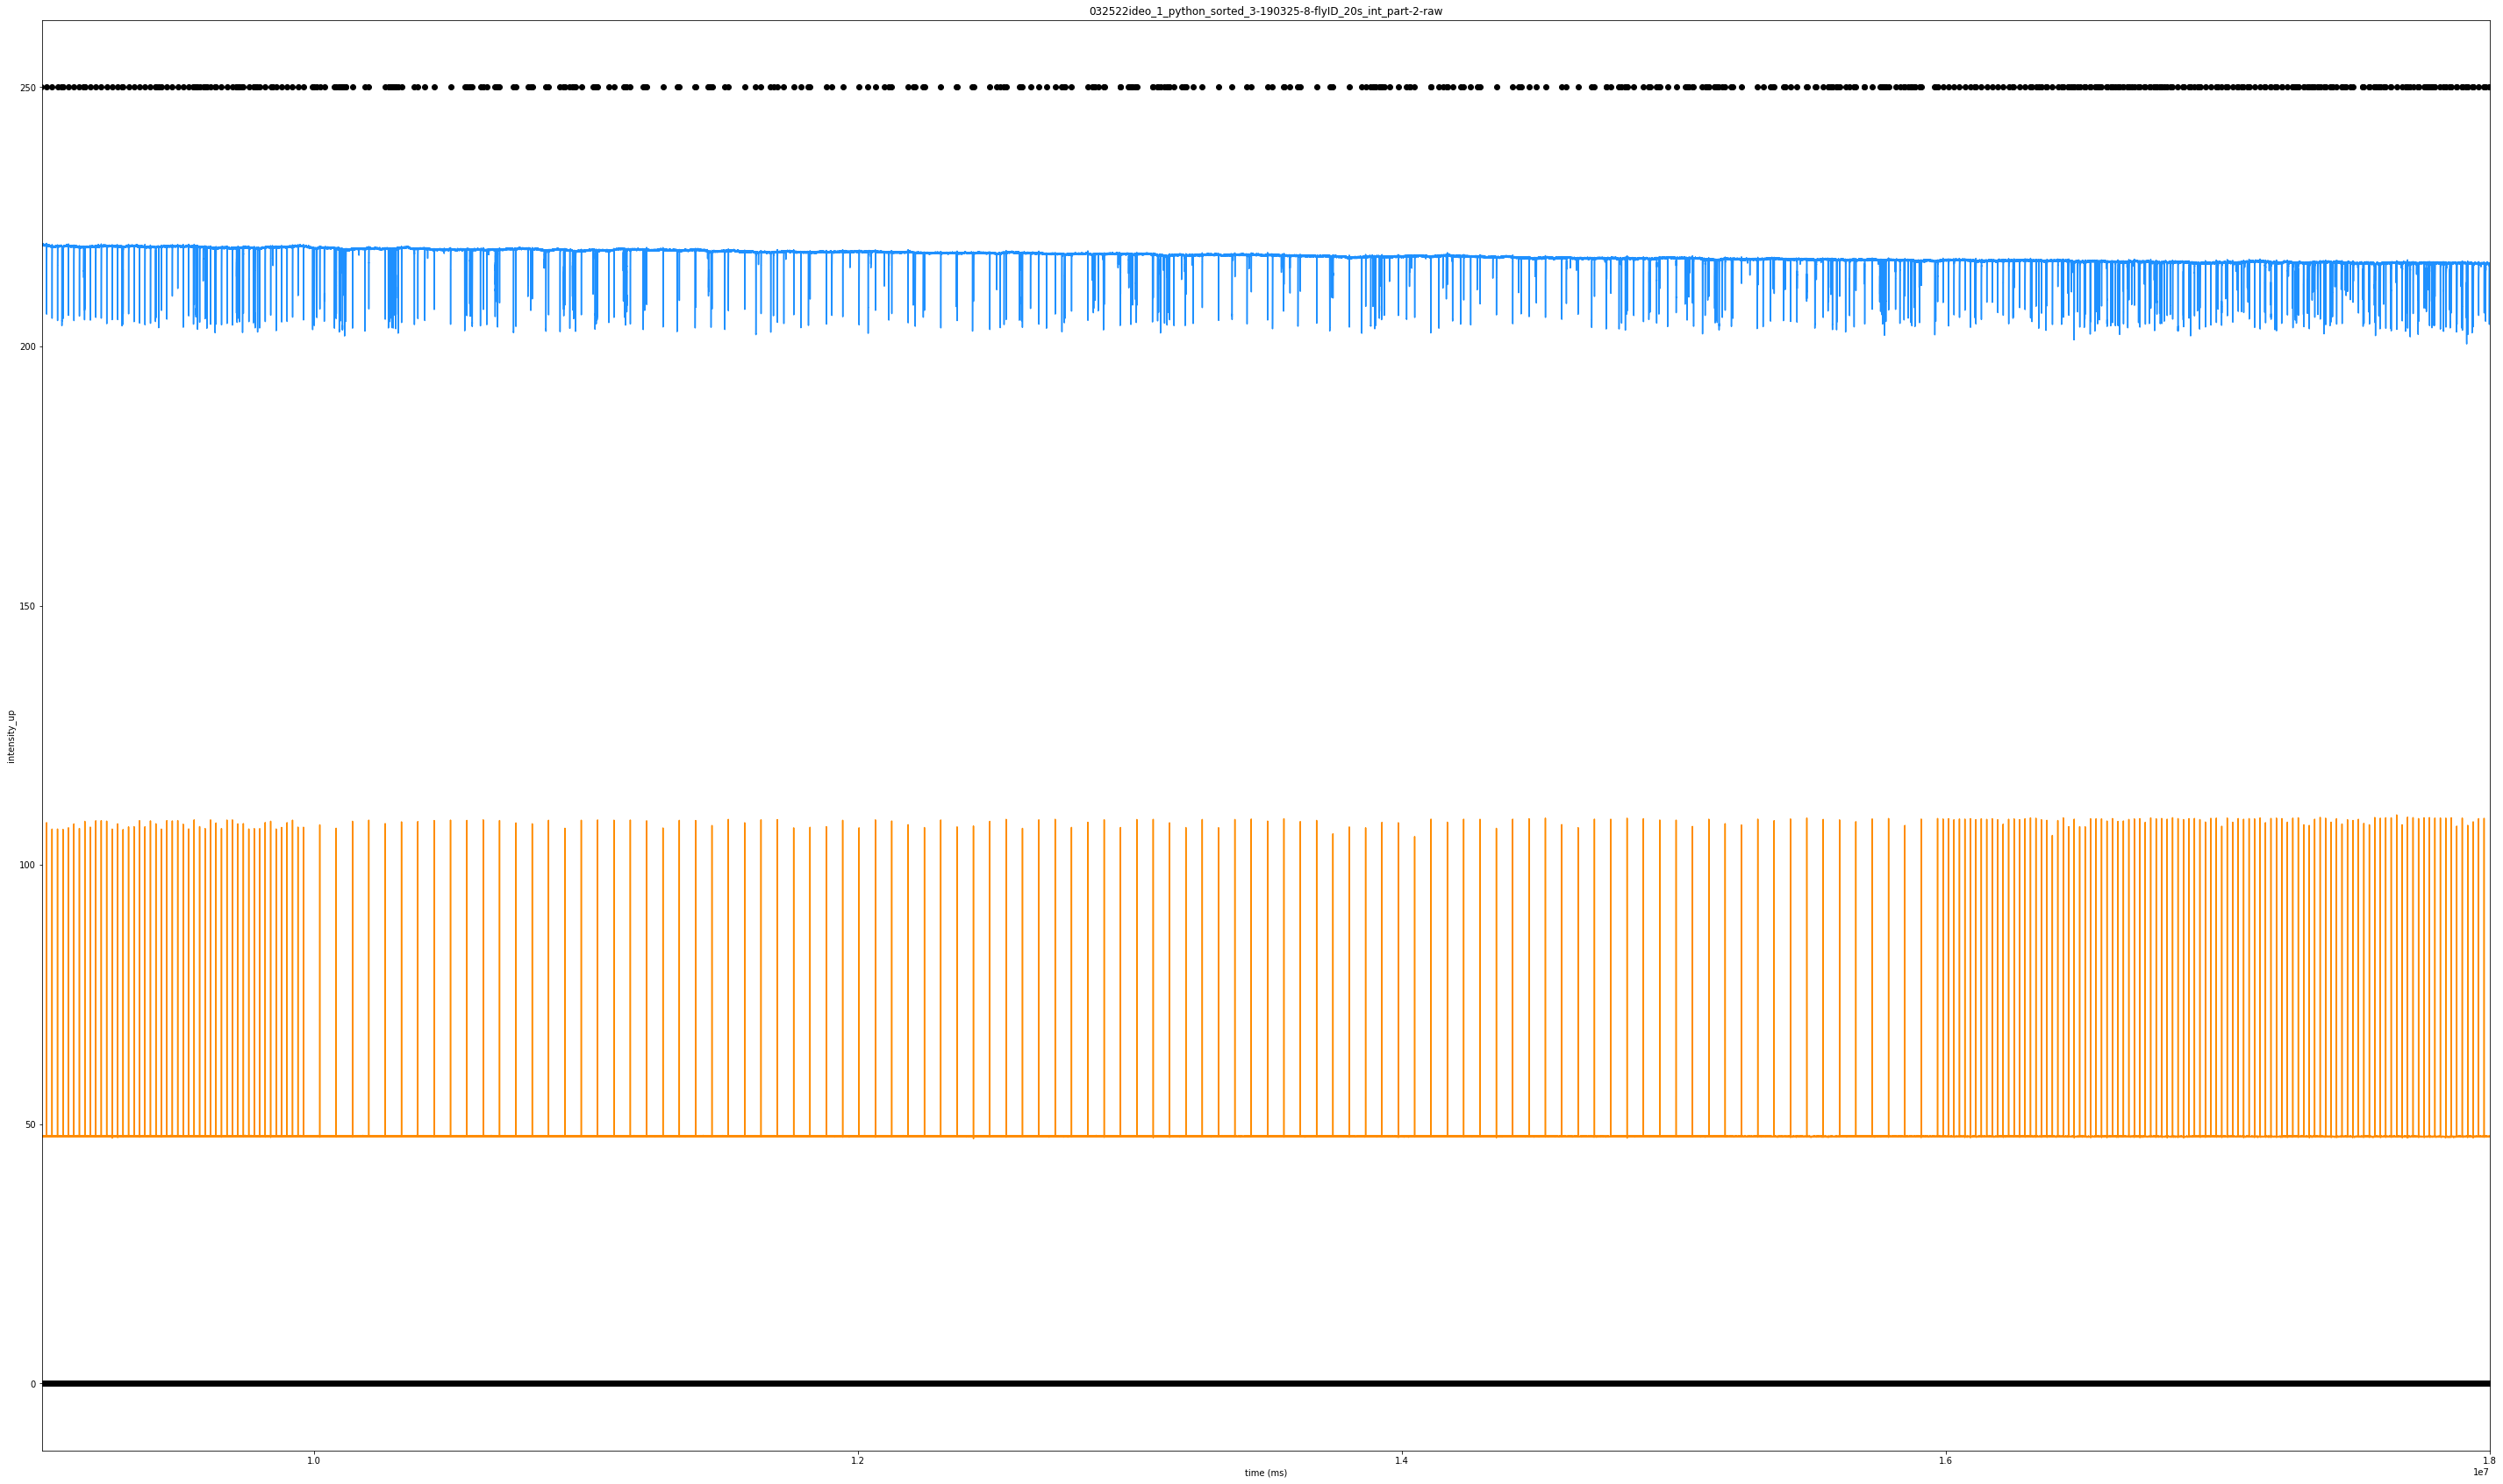

folder there


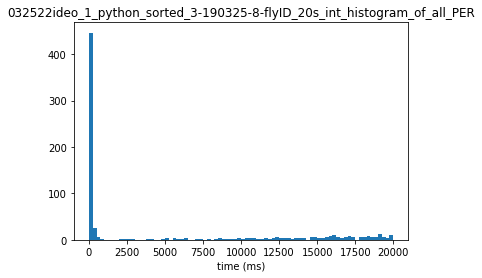

folder there
folder there
('first per time', array([15543, 19932, 17358,  6303, 18348,  4059, 19173, 12804, 10593,
        2937, 49500, 48873, 26631, 31614, 36069, 34551, 34881, 36927,
       26499, 23562, 27951, 32604, 26433, 34749, 34980, 18348, 27522,
       36201, 43230, 13761, 52272, 42603, 35970, 27555, 58344, 28017,
       42207, 47157, 24387, 56364, 11583, 15345, 59697, 29040, 47124,
       19008, 34716, 53658, 53691, 41580, 25707, 52338, 12441, 13035,
       23001, 42867, 42702,  5940, 14520, 16104, 15015, 11451, 15906,
       12210, 17457, 14124,  4191,  4917, 10461, 15906, 15774, 15774,
       18480,  9999, 17358,  6369, 13167,  6303, 16434, 14883,  5544,
       16467,  2442,  8547, 33462, 16368, 10824, 45210, 11583, 47256,
       25245, 51876, 10230, 13134, 51051, 43989, 50061, 41976, 17853,
       43461, 41217, 34716, 47322, 51480, 57948, 47058, 47091, 40854,
       35409, 23496, 26268, 19965, 33000, 32835, 19041, 56892, 56430,
       25344, 48114, 29535, 27984, 24618, 161

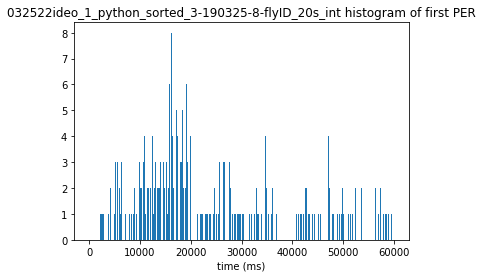

folder there
folder there


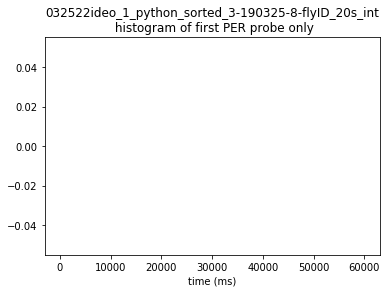

folder there
folder there


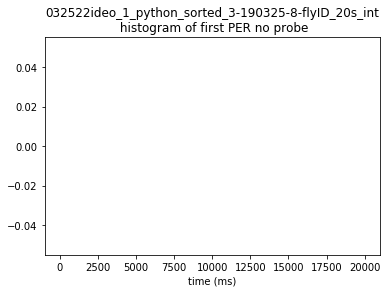

folder there
folder there


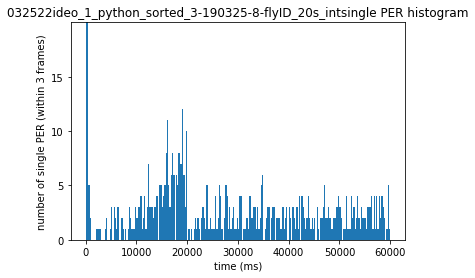

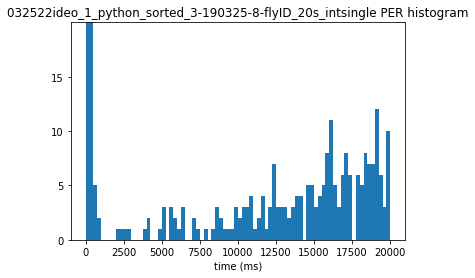

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

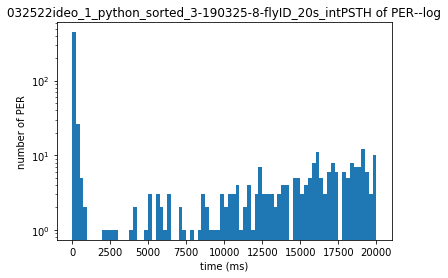

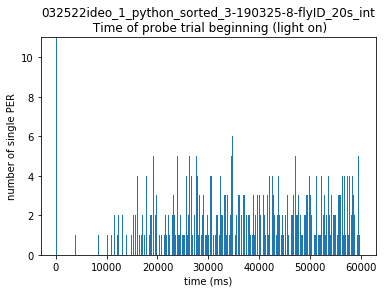

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

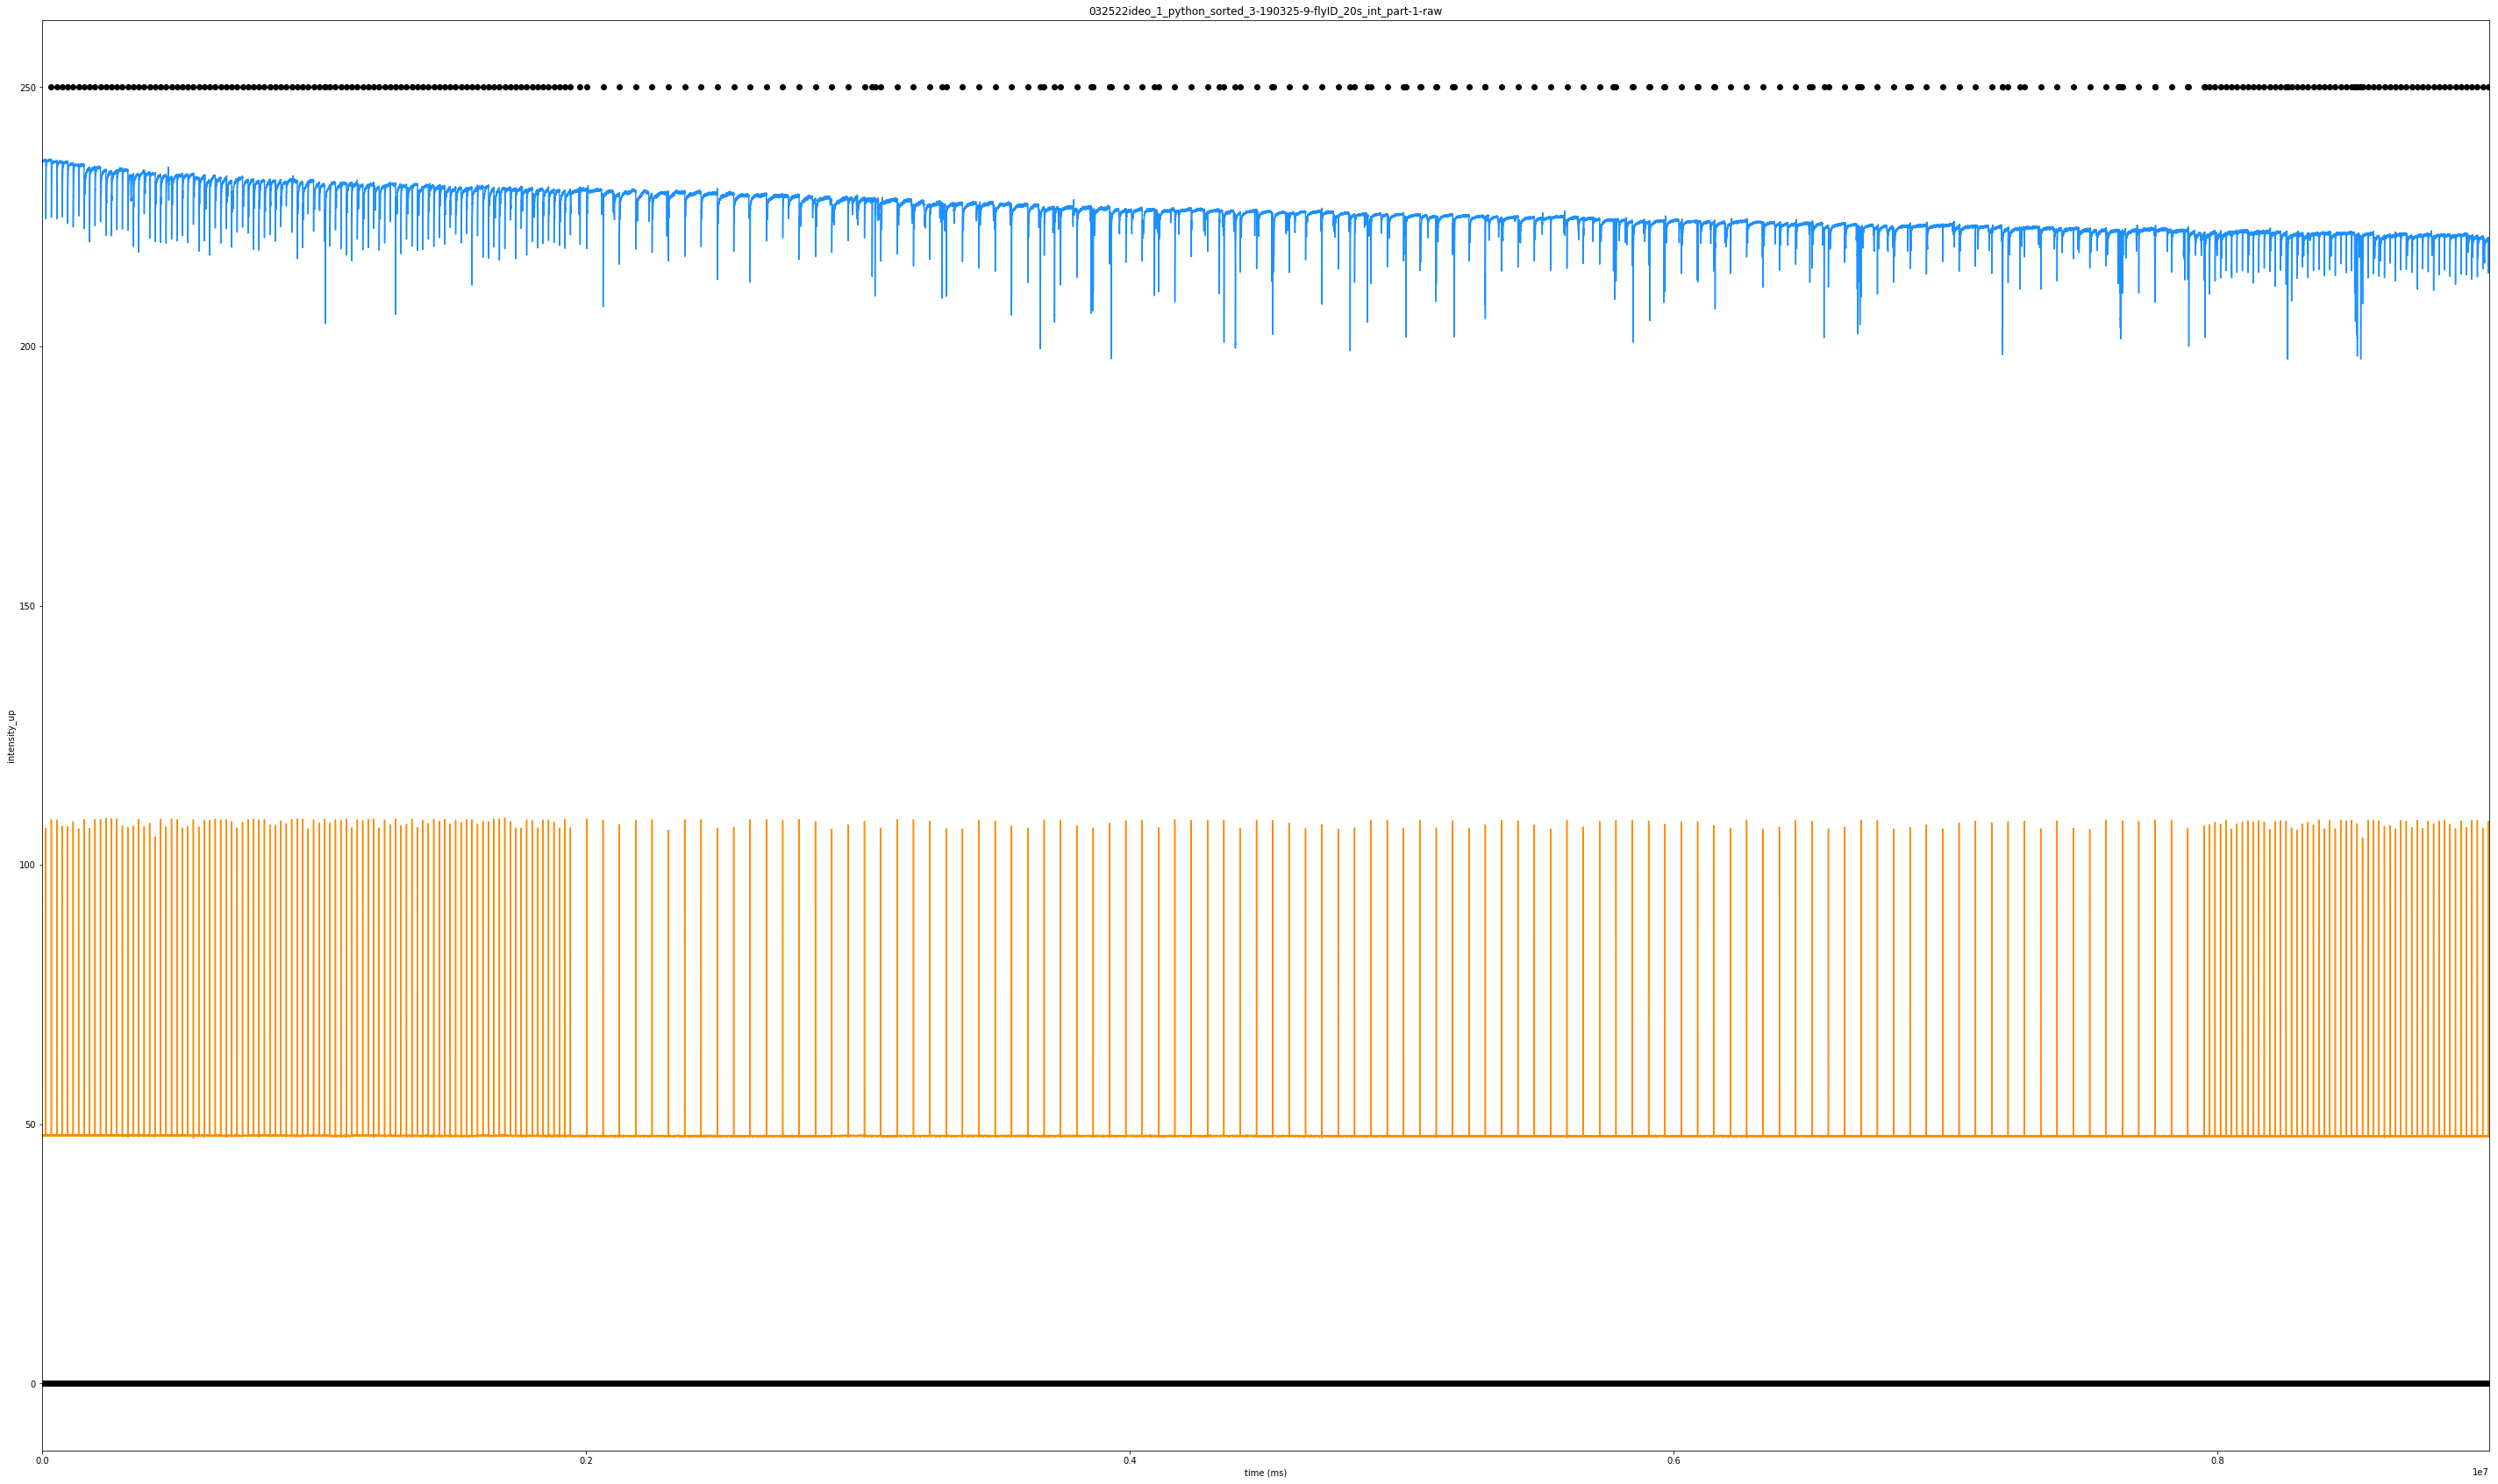

folder there
part-2-raw0325-9


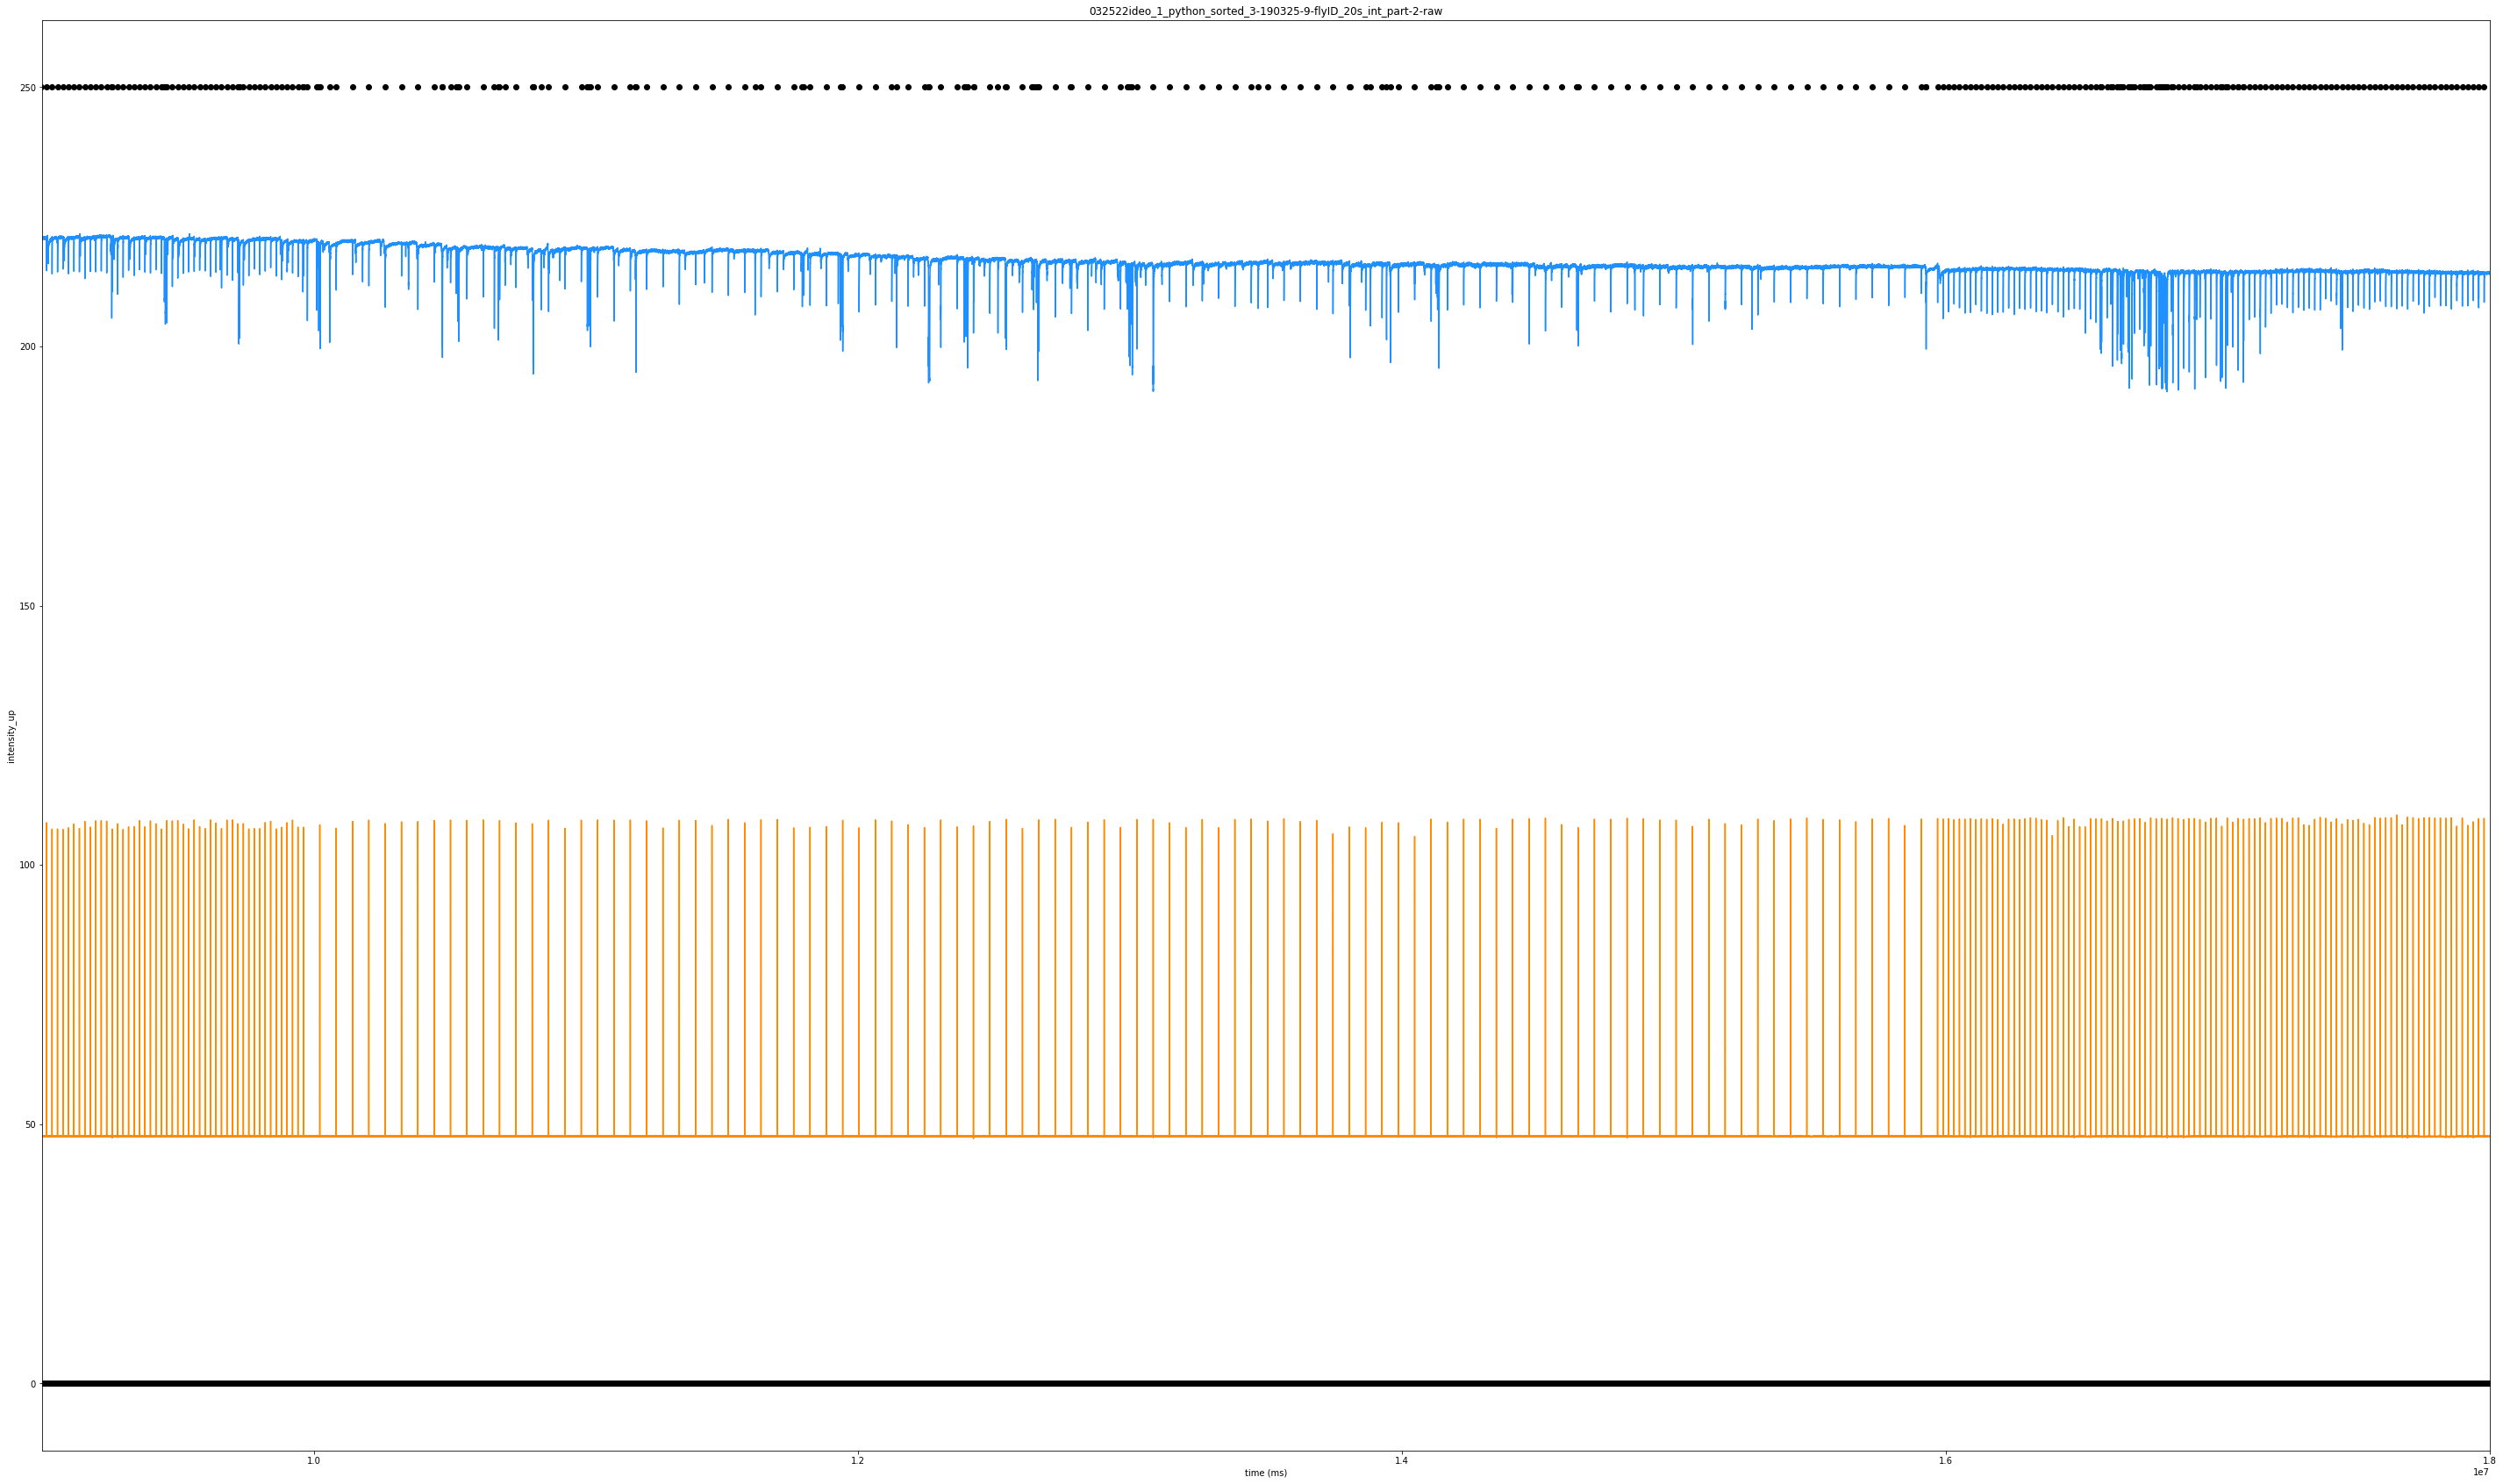

folder there


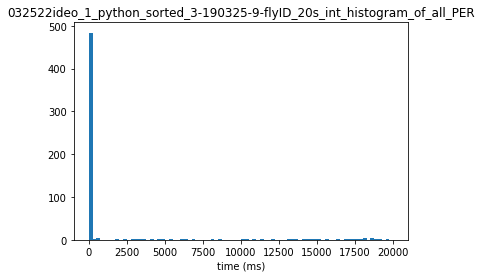

folder there
folder there
('first per time', array([ 3234, 35409, 28017, 44286, 45738, 38049, 52074,  5478, 44649,
       43362, 42042, 56529,  3036, 43725, 46365,  6864,  2475,  6270,
       59367, 50589,  3465,  4620, 58311,  4125, 51810, 44088, 48180,
       51909, 38412, 42999, 43395, 58740,  3729,  3597,  4224, 10956,
       13134, 18183, 10923,  3498, 17985, 14091, 36135, 28644, 20691,
       40623, 20460,  2904, 22242, 19140, 37917, 31317, 50985, 17358,
       15015, 25179,  1848, 29700, 34914, 54483, 24288, 59631, 25509,
        3729, 17391, 16467, 18711, 55143, 17127, 14322, 13365, 17721,
        8679, 16863, 11385, 14322, 10329, 10131,  2838, 14388,  8184,
       19668, 15576, 14751, 18909, 18183], dtype=int64))


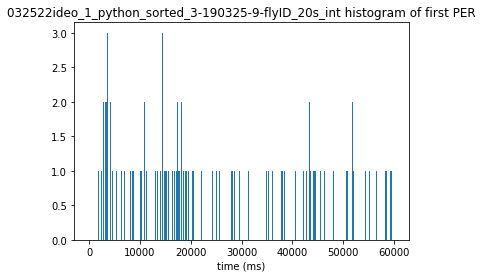

folder there
folder there


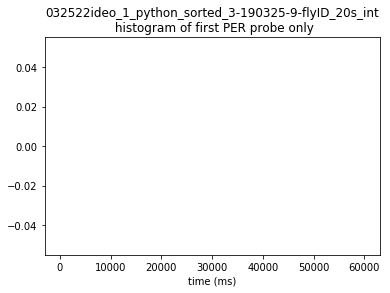

folder there
folder there


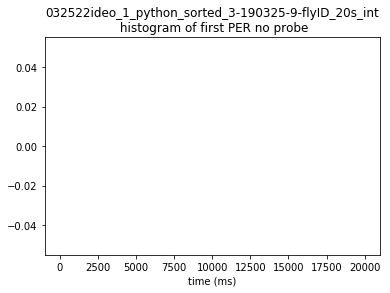

folder there
folder there


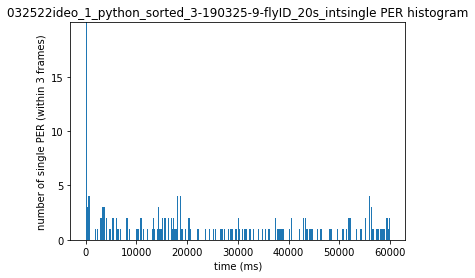

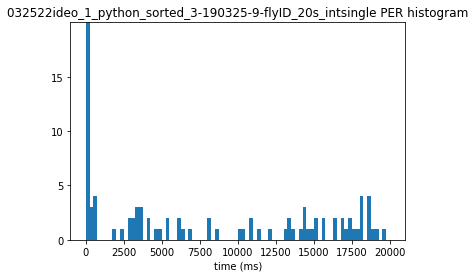

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

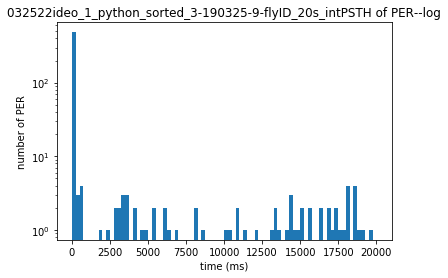

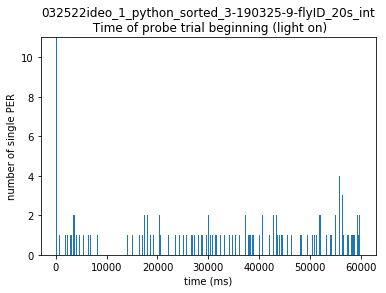

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

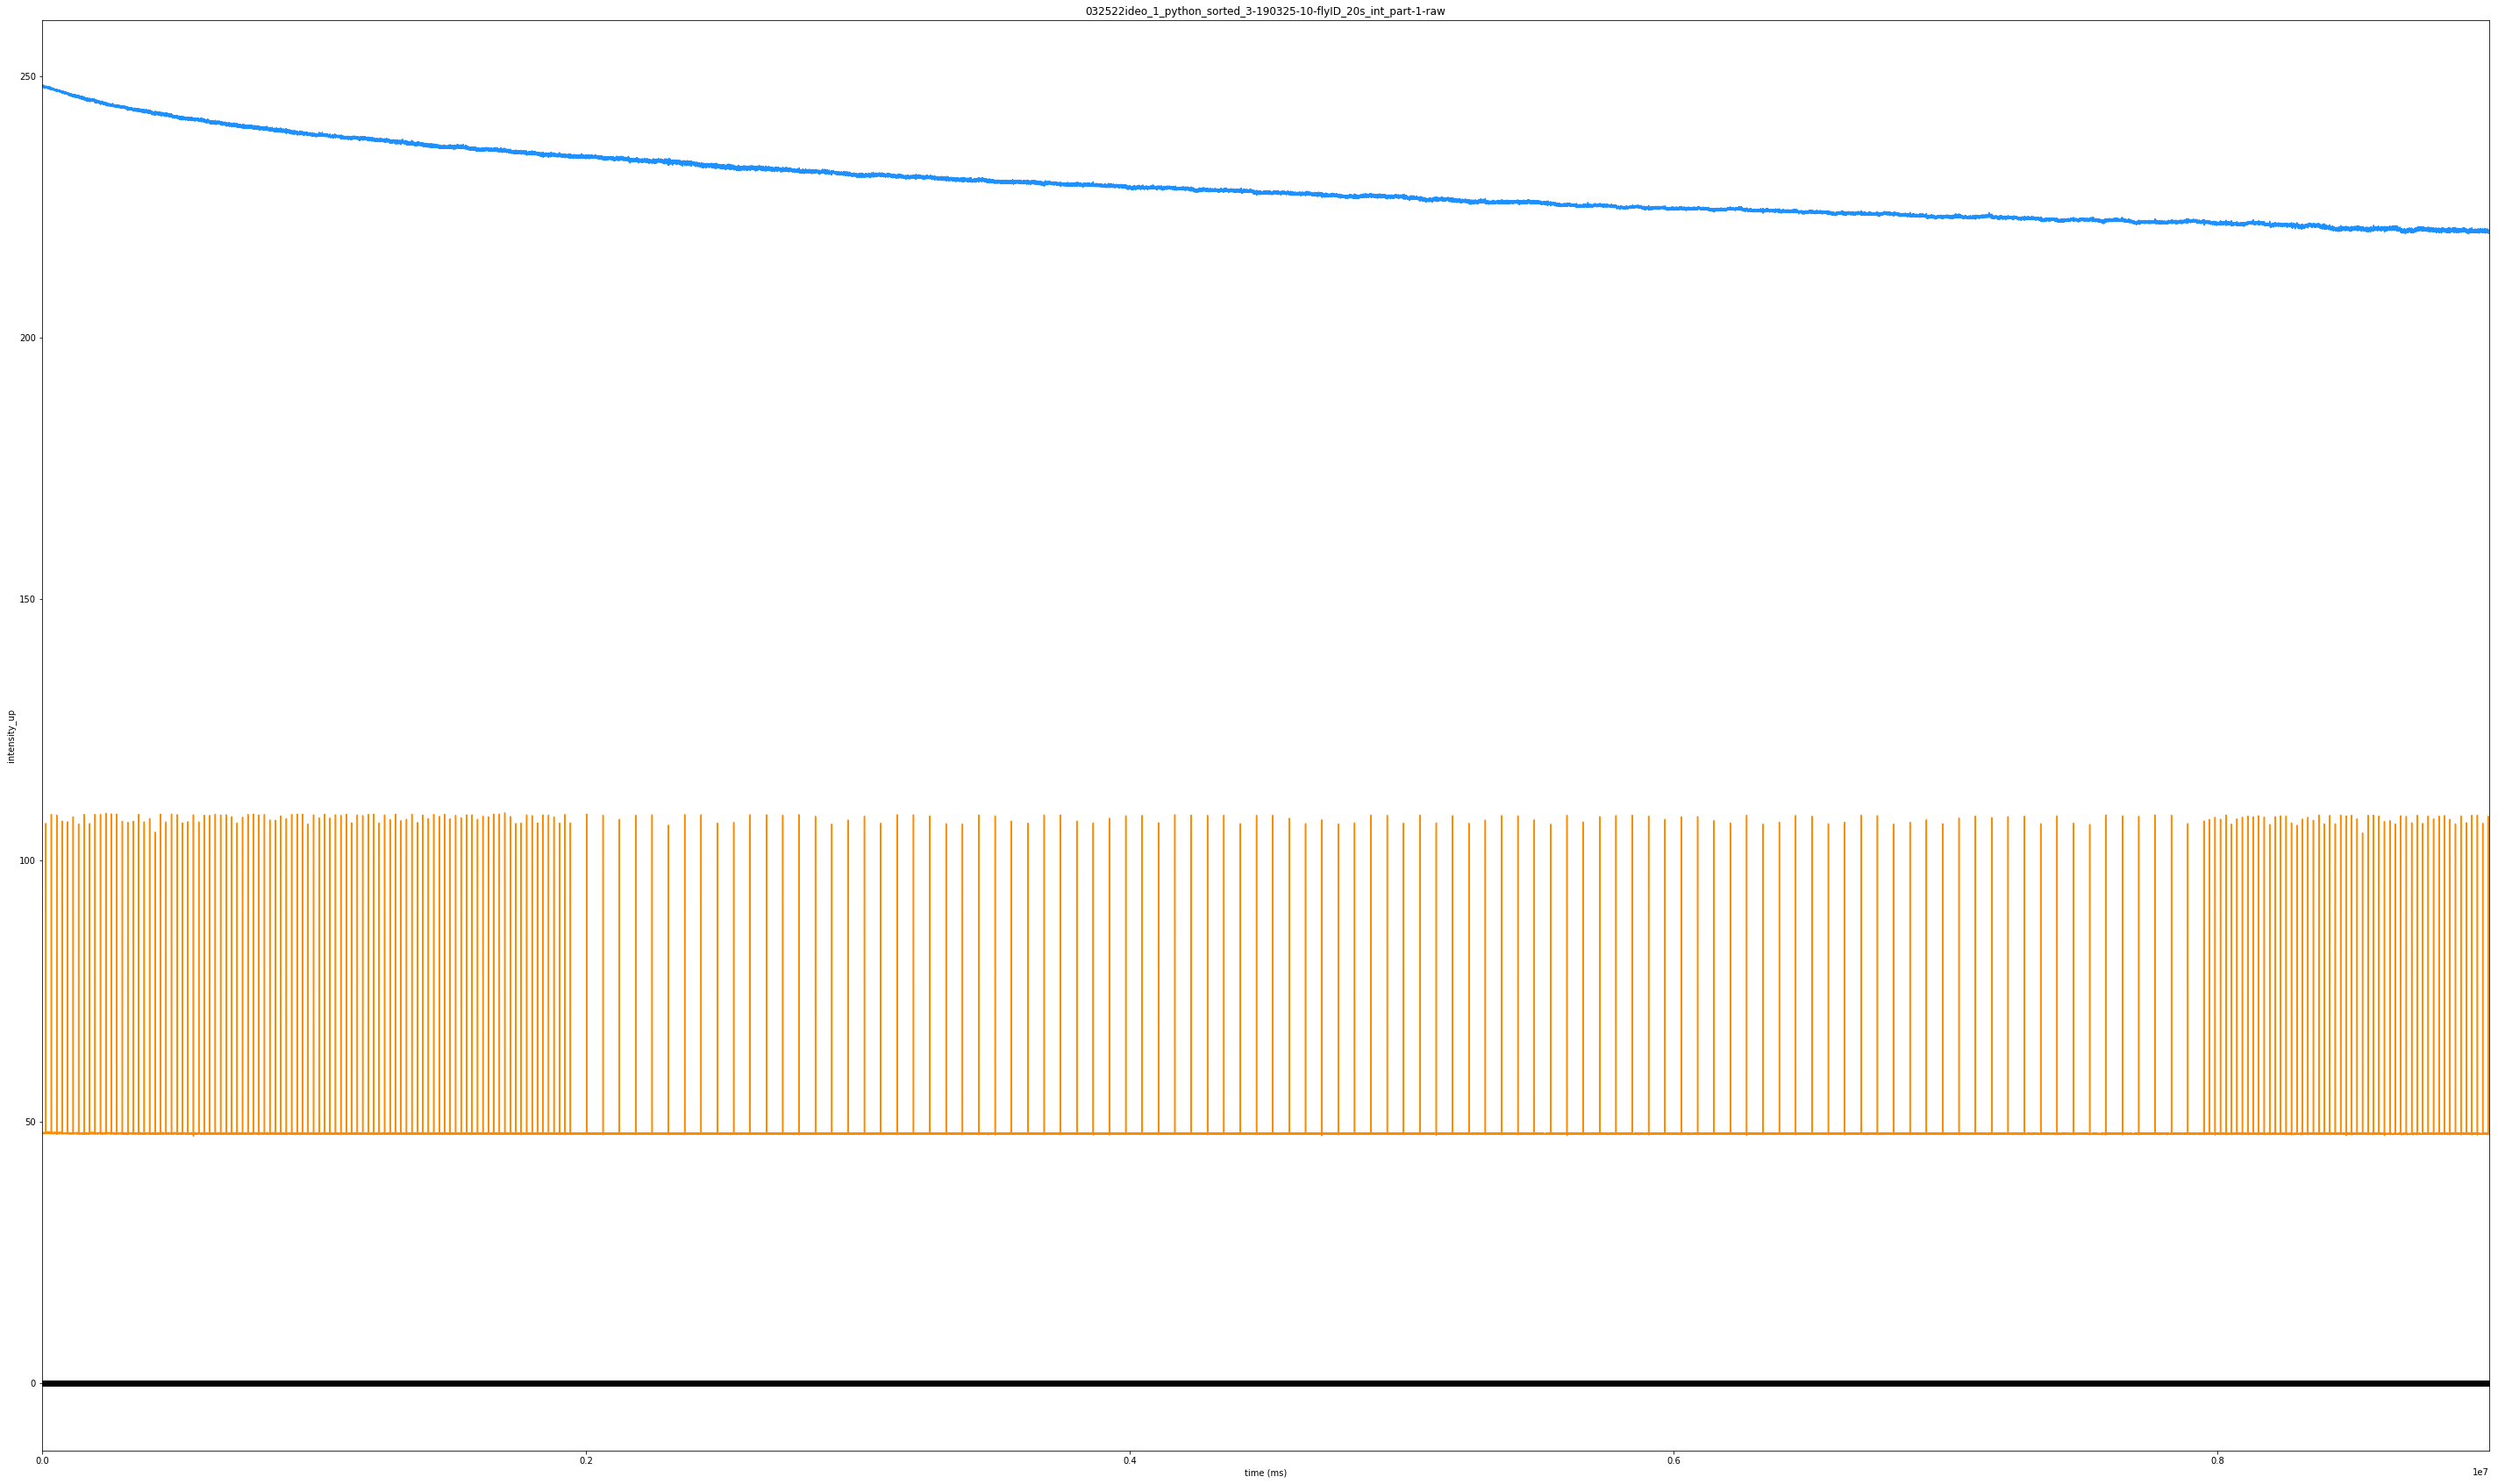

folder there
part-2-raw0325-10


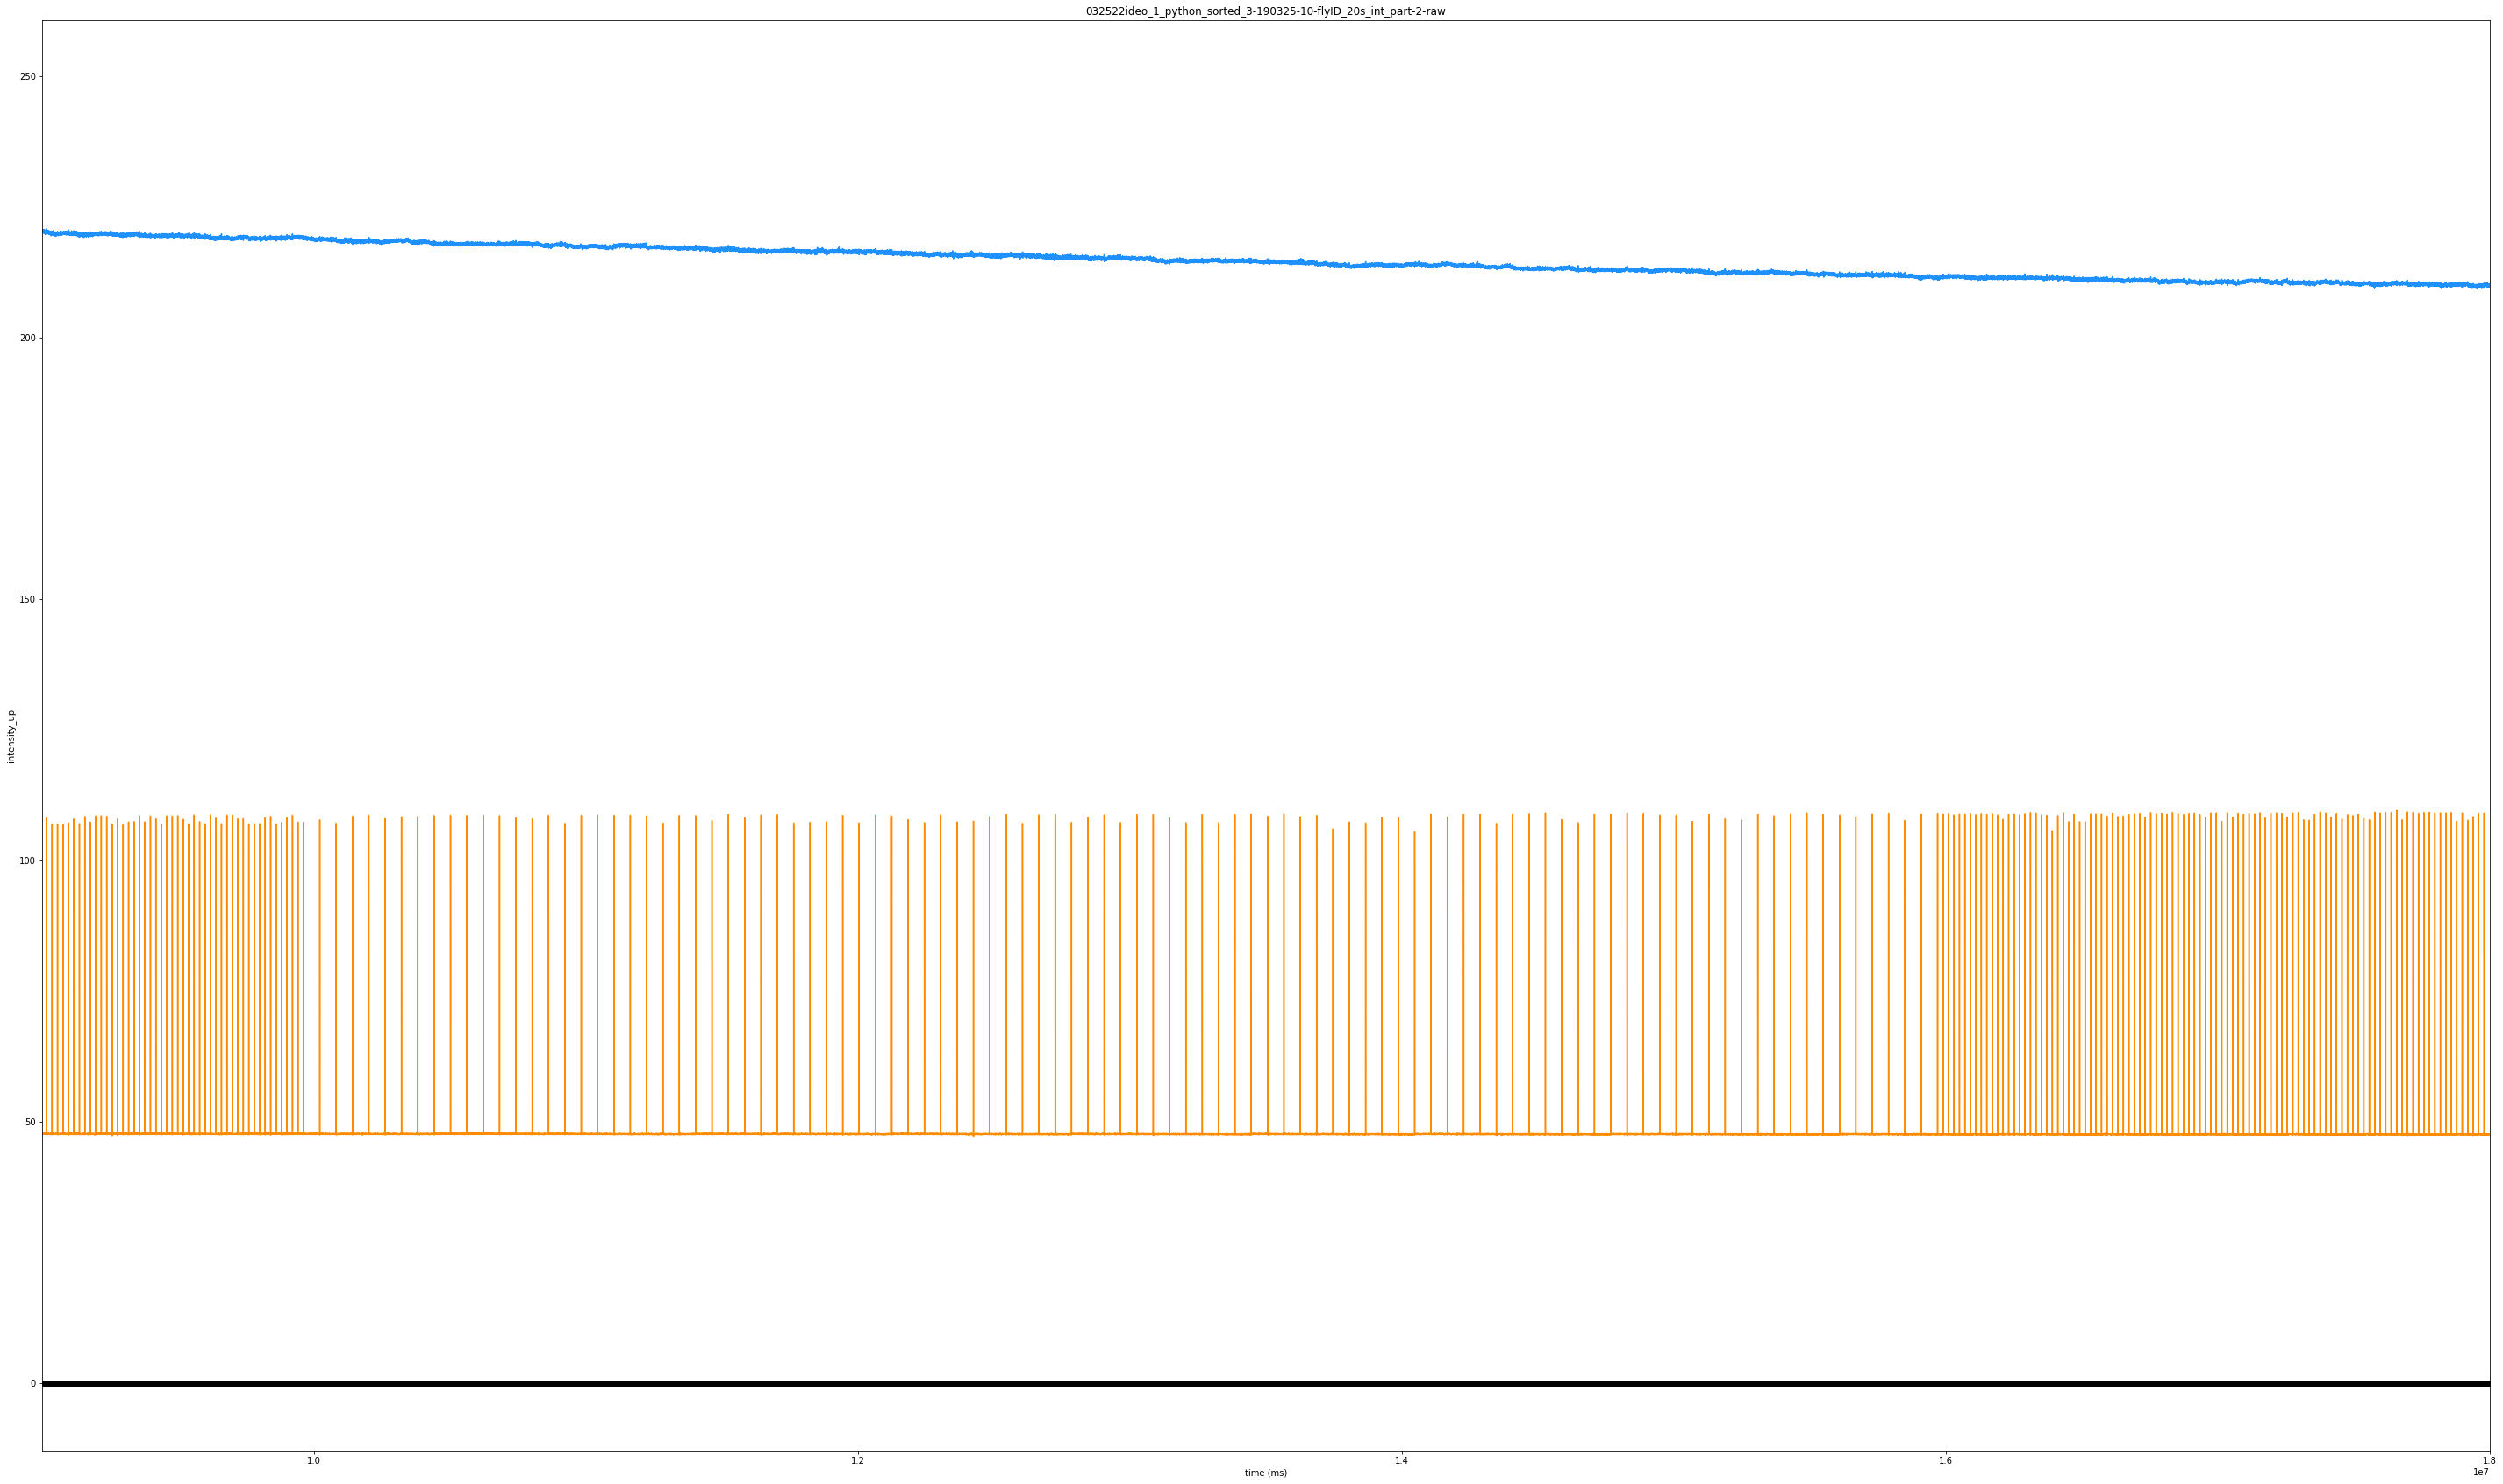

folder there


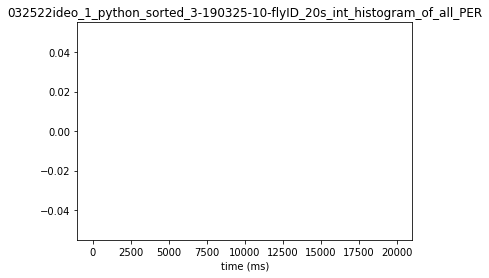

folder there
folder there
('first per time', array([], dtype=float64))


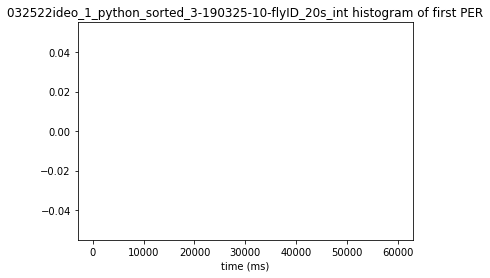

folder there
folder there


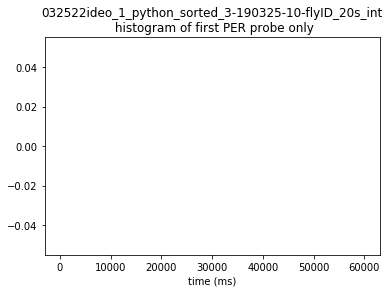

folder there
folder there


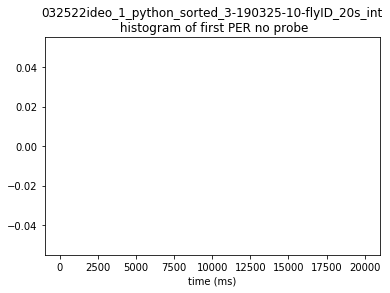

folder there
folder there


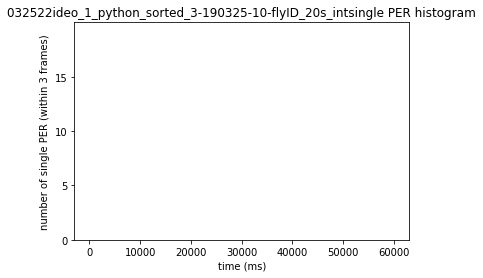

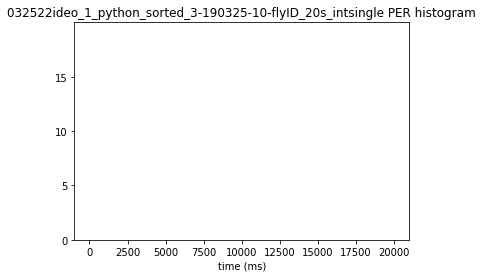

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

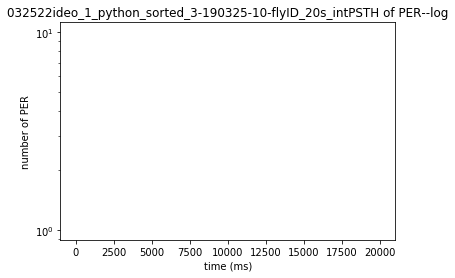

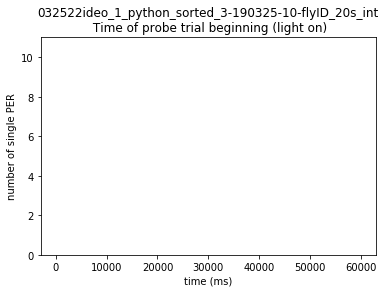

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

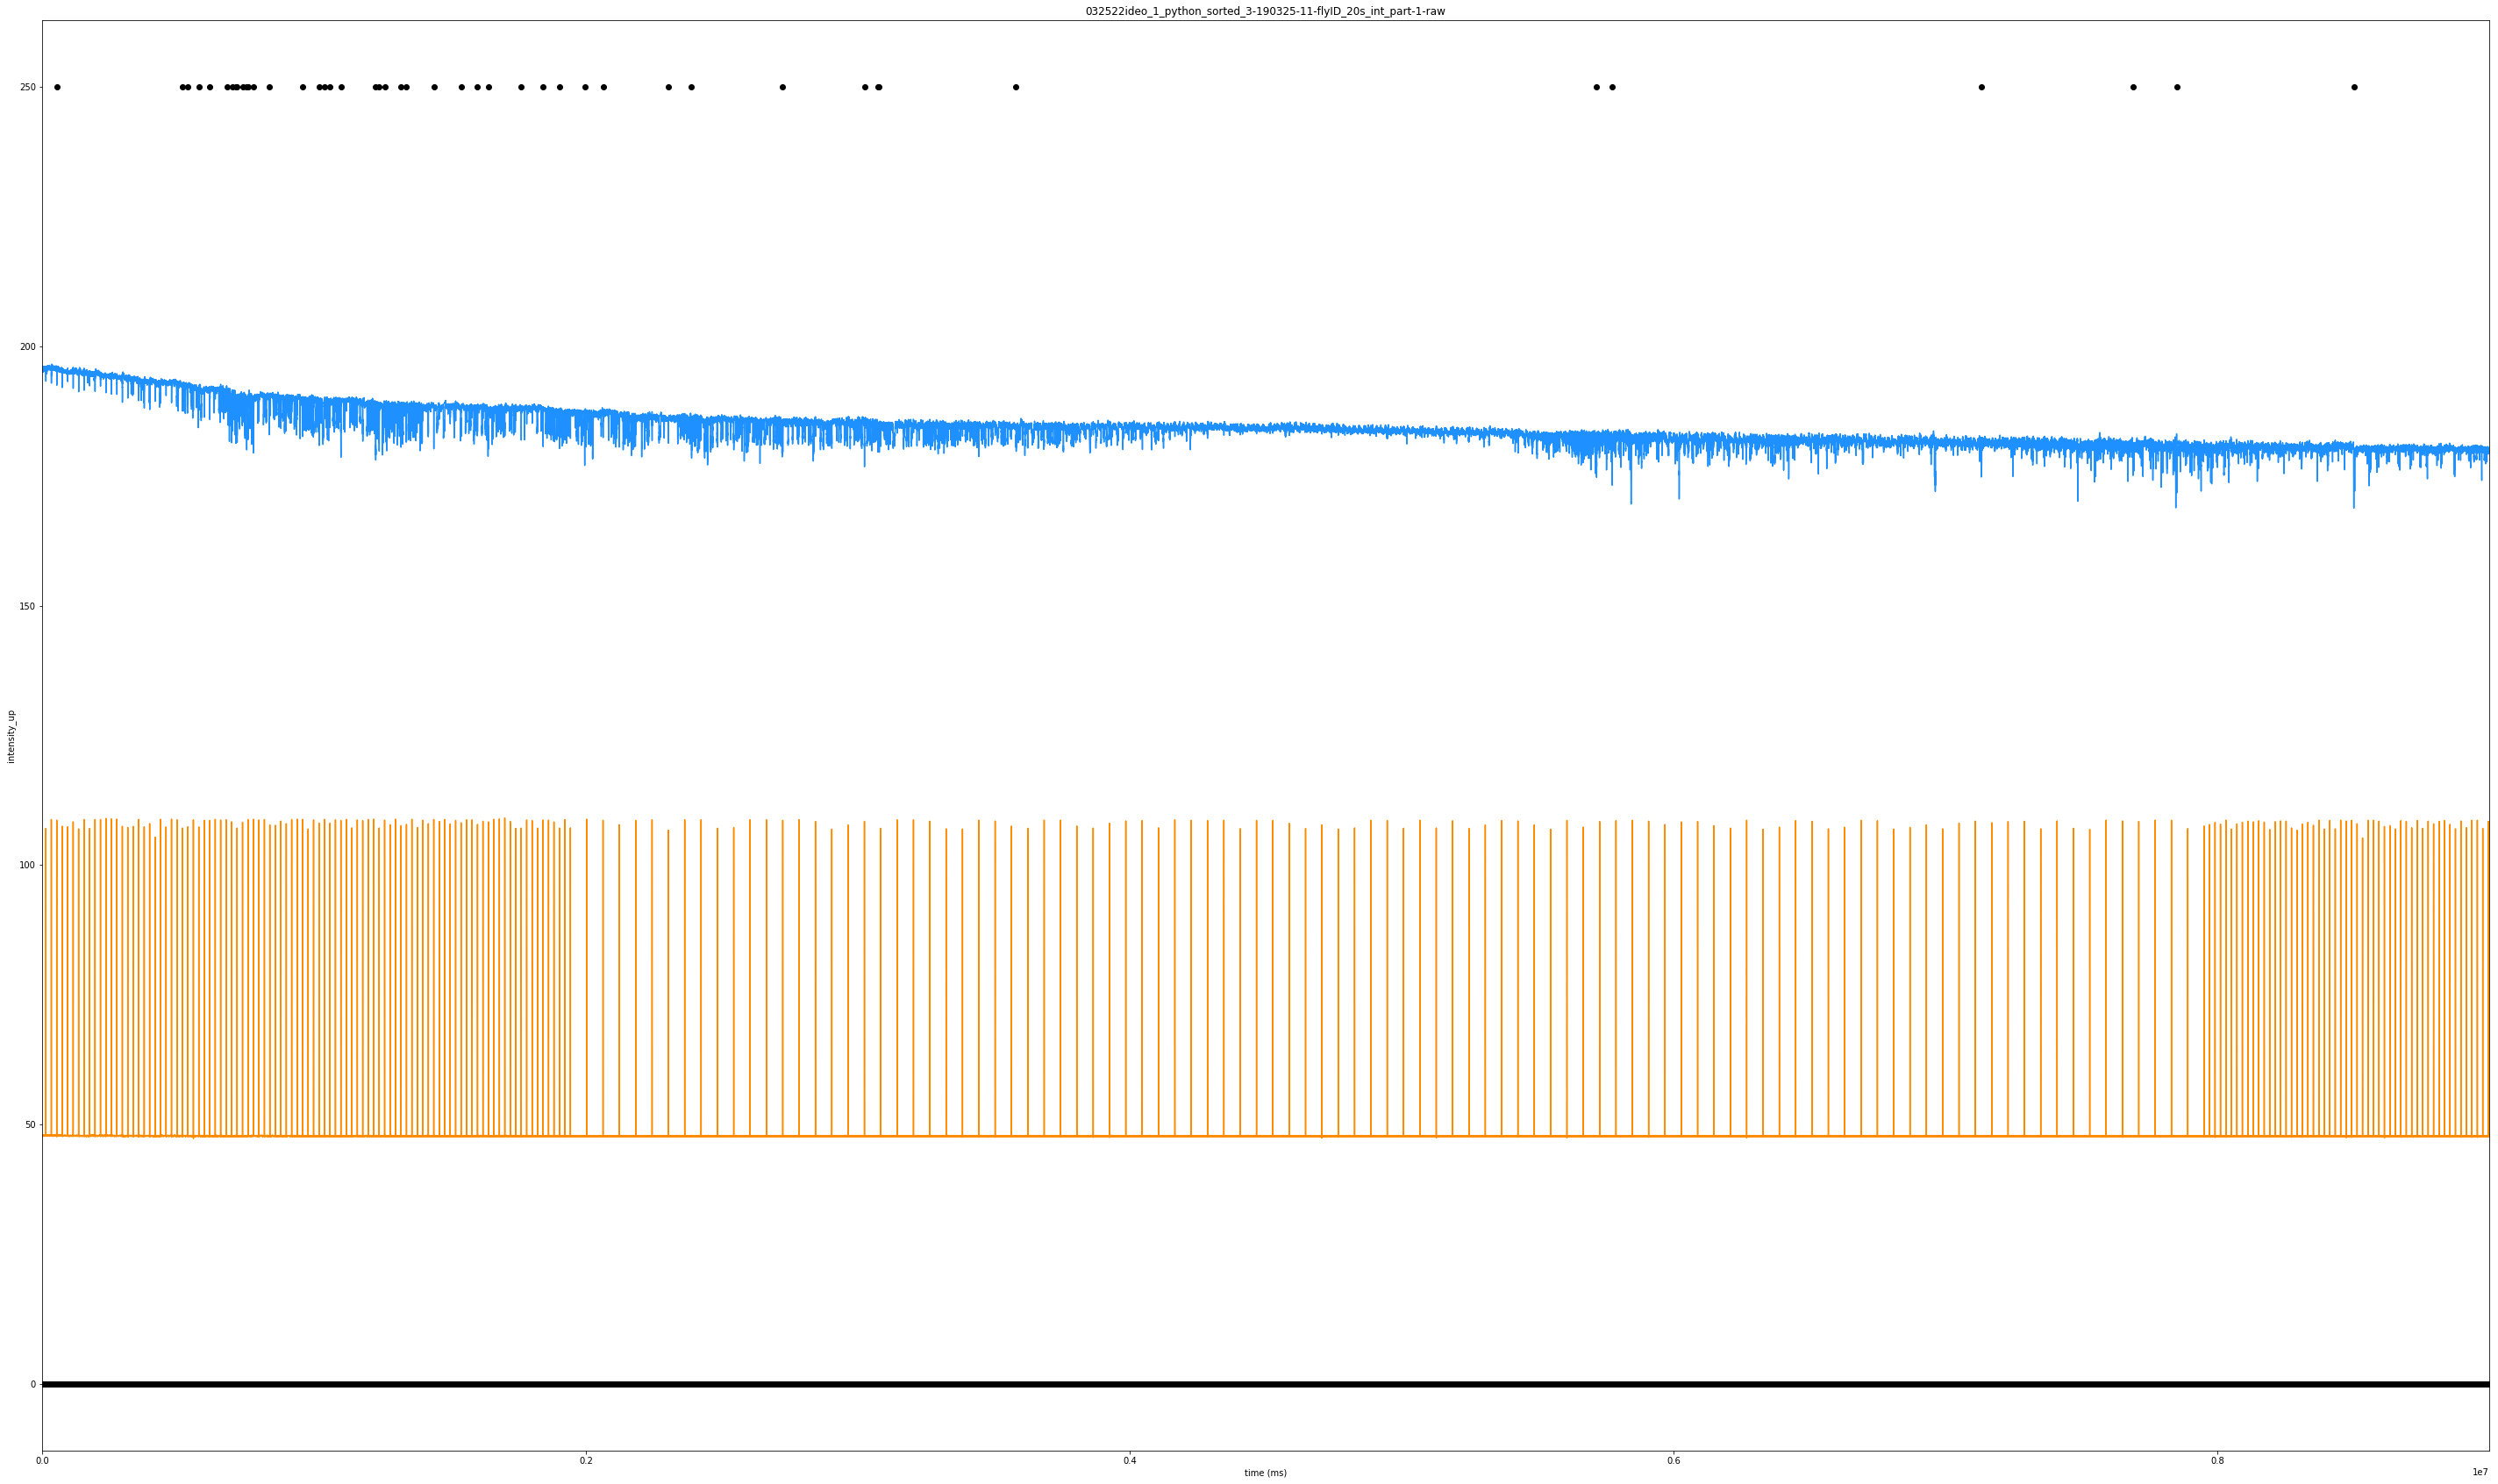

folder there
part-2-raw0325-11


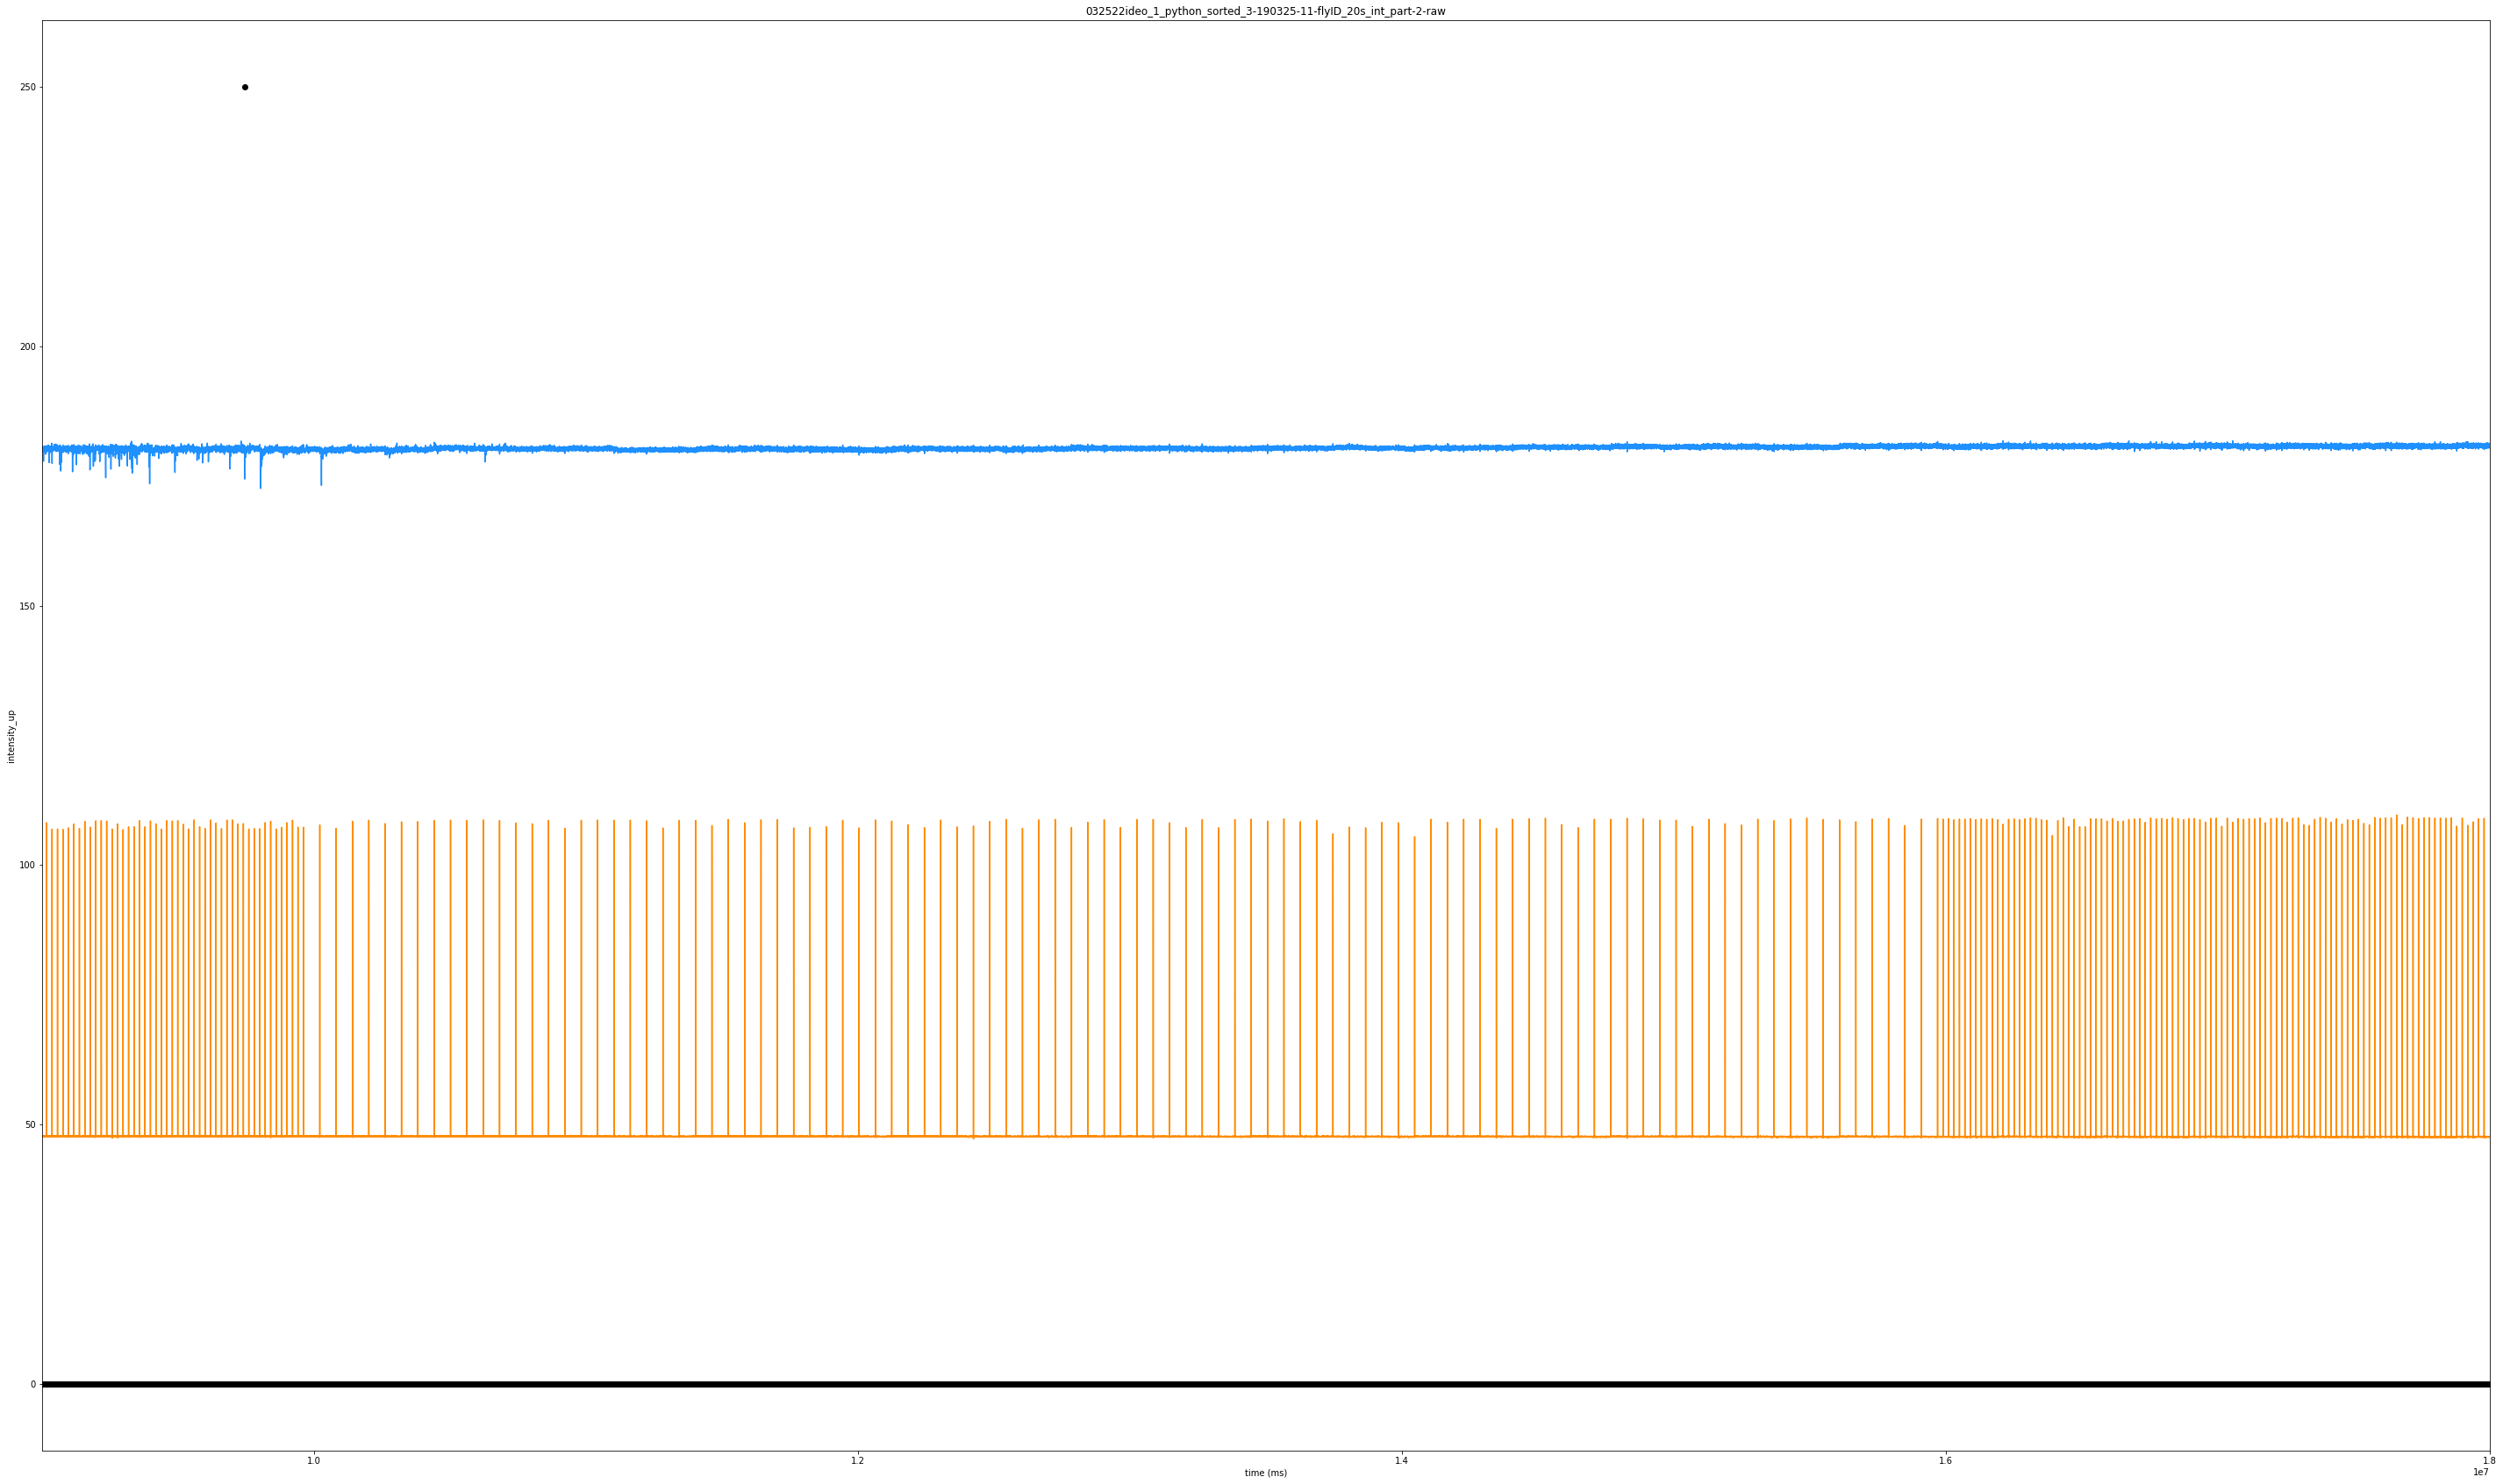

folder there


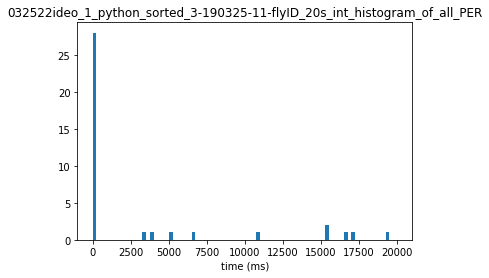

folder there
folder there
('first per time', array([ 3828,  3432, 15378, 19272, 17127,  6666, 52734, 24750, 49368,
       16500, 48708, 46035, 21318, 38346, 20328, 10857,  5181],
      dtype=int64))


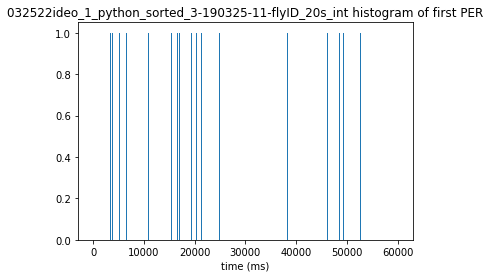

folder there
folder there


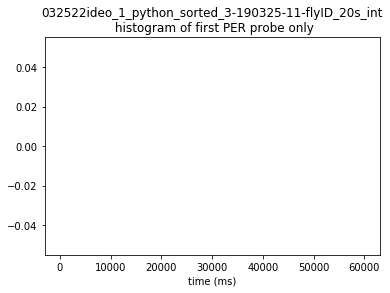

folder there
folder there


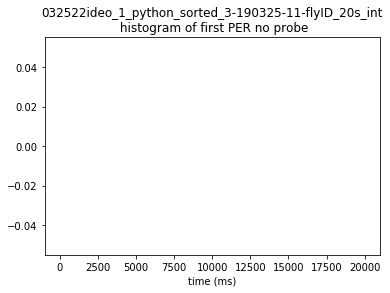

folder there
folder there


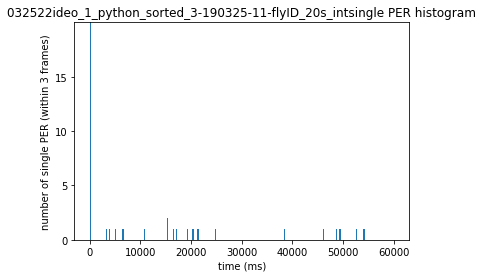

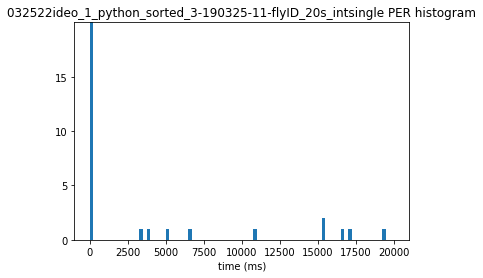

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

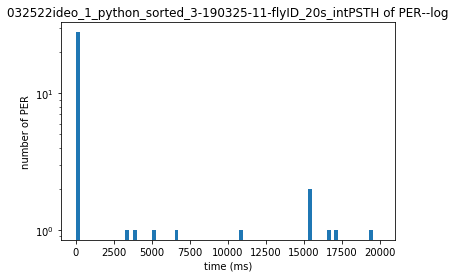

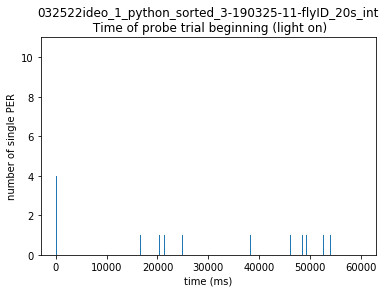

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

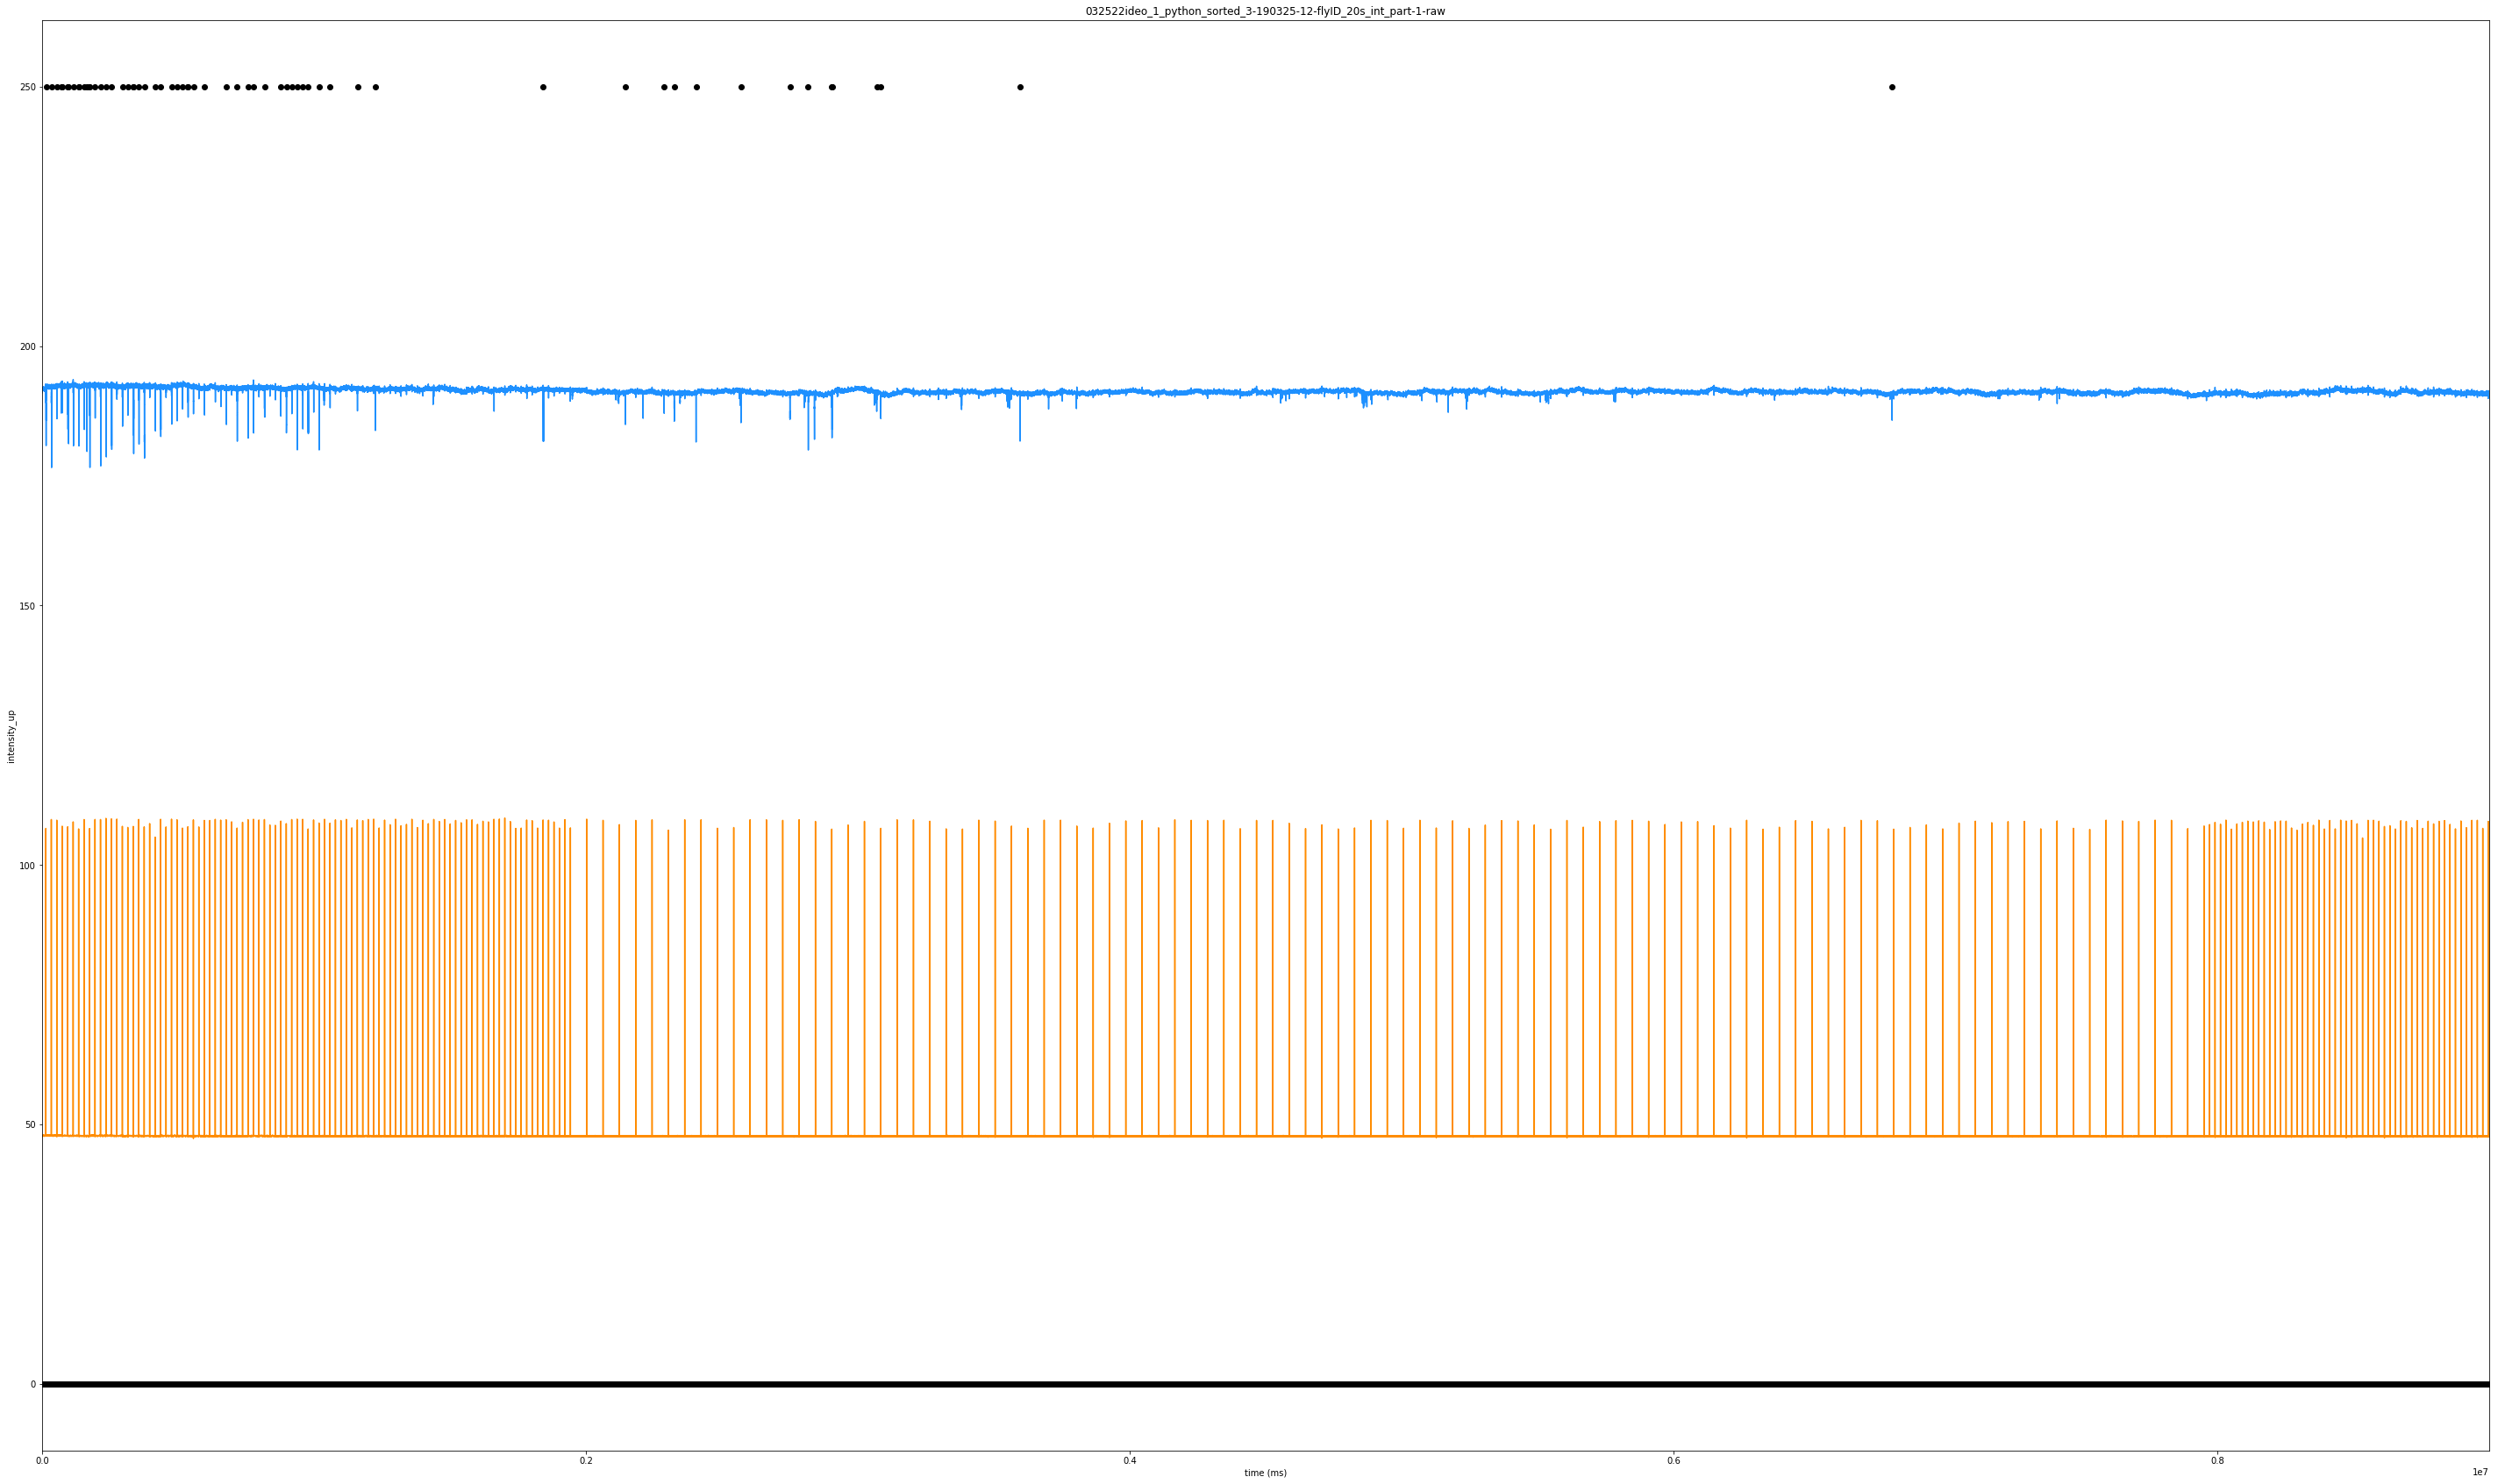

folder there
part-2-raw0325-12


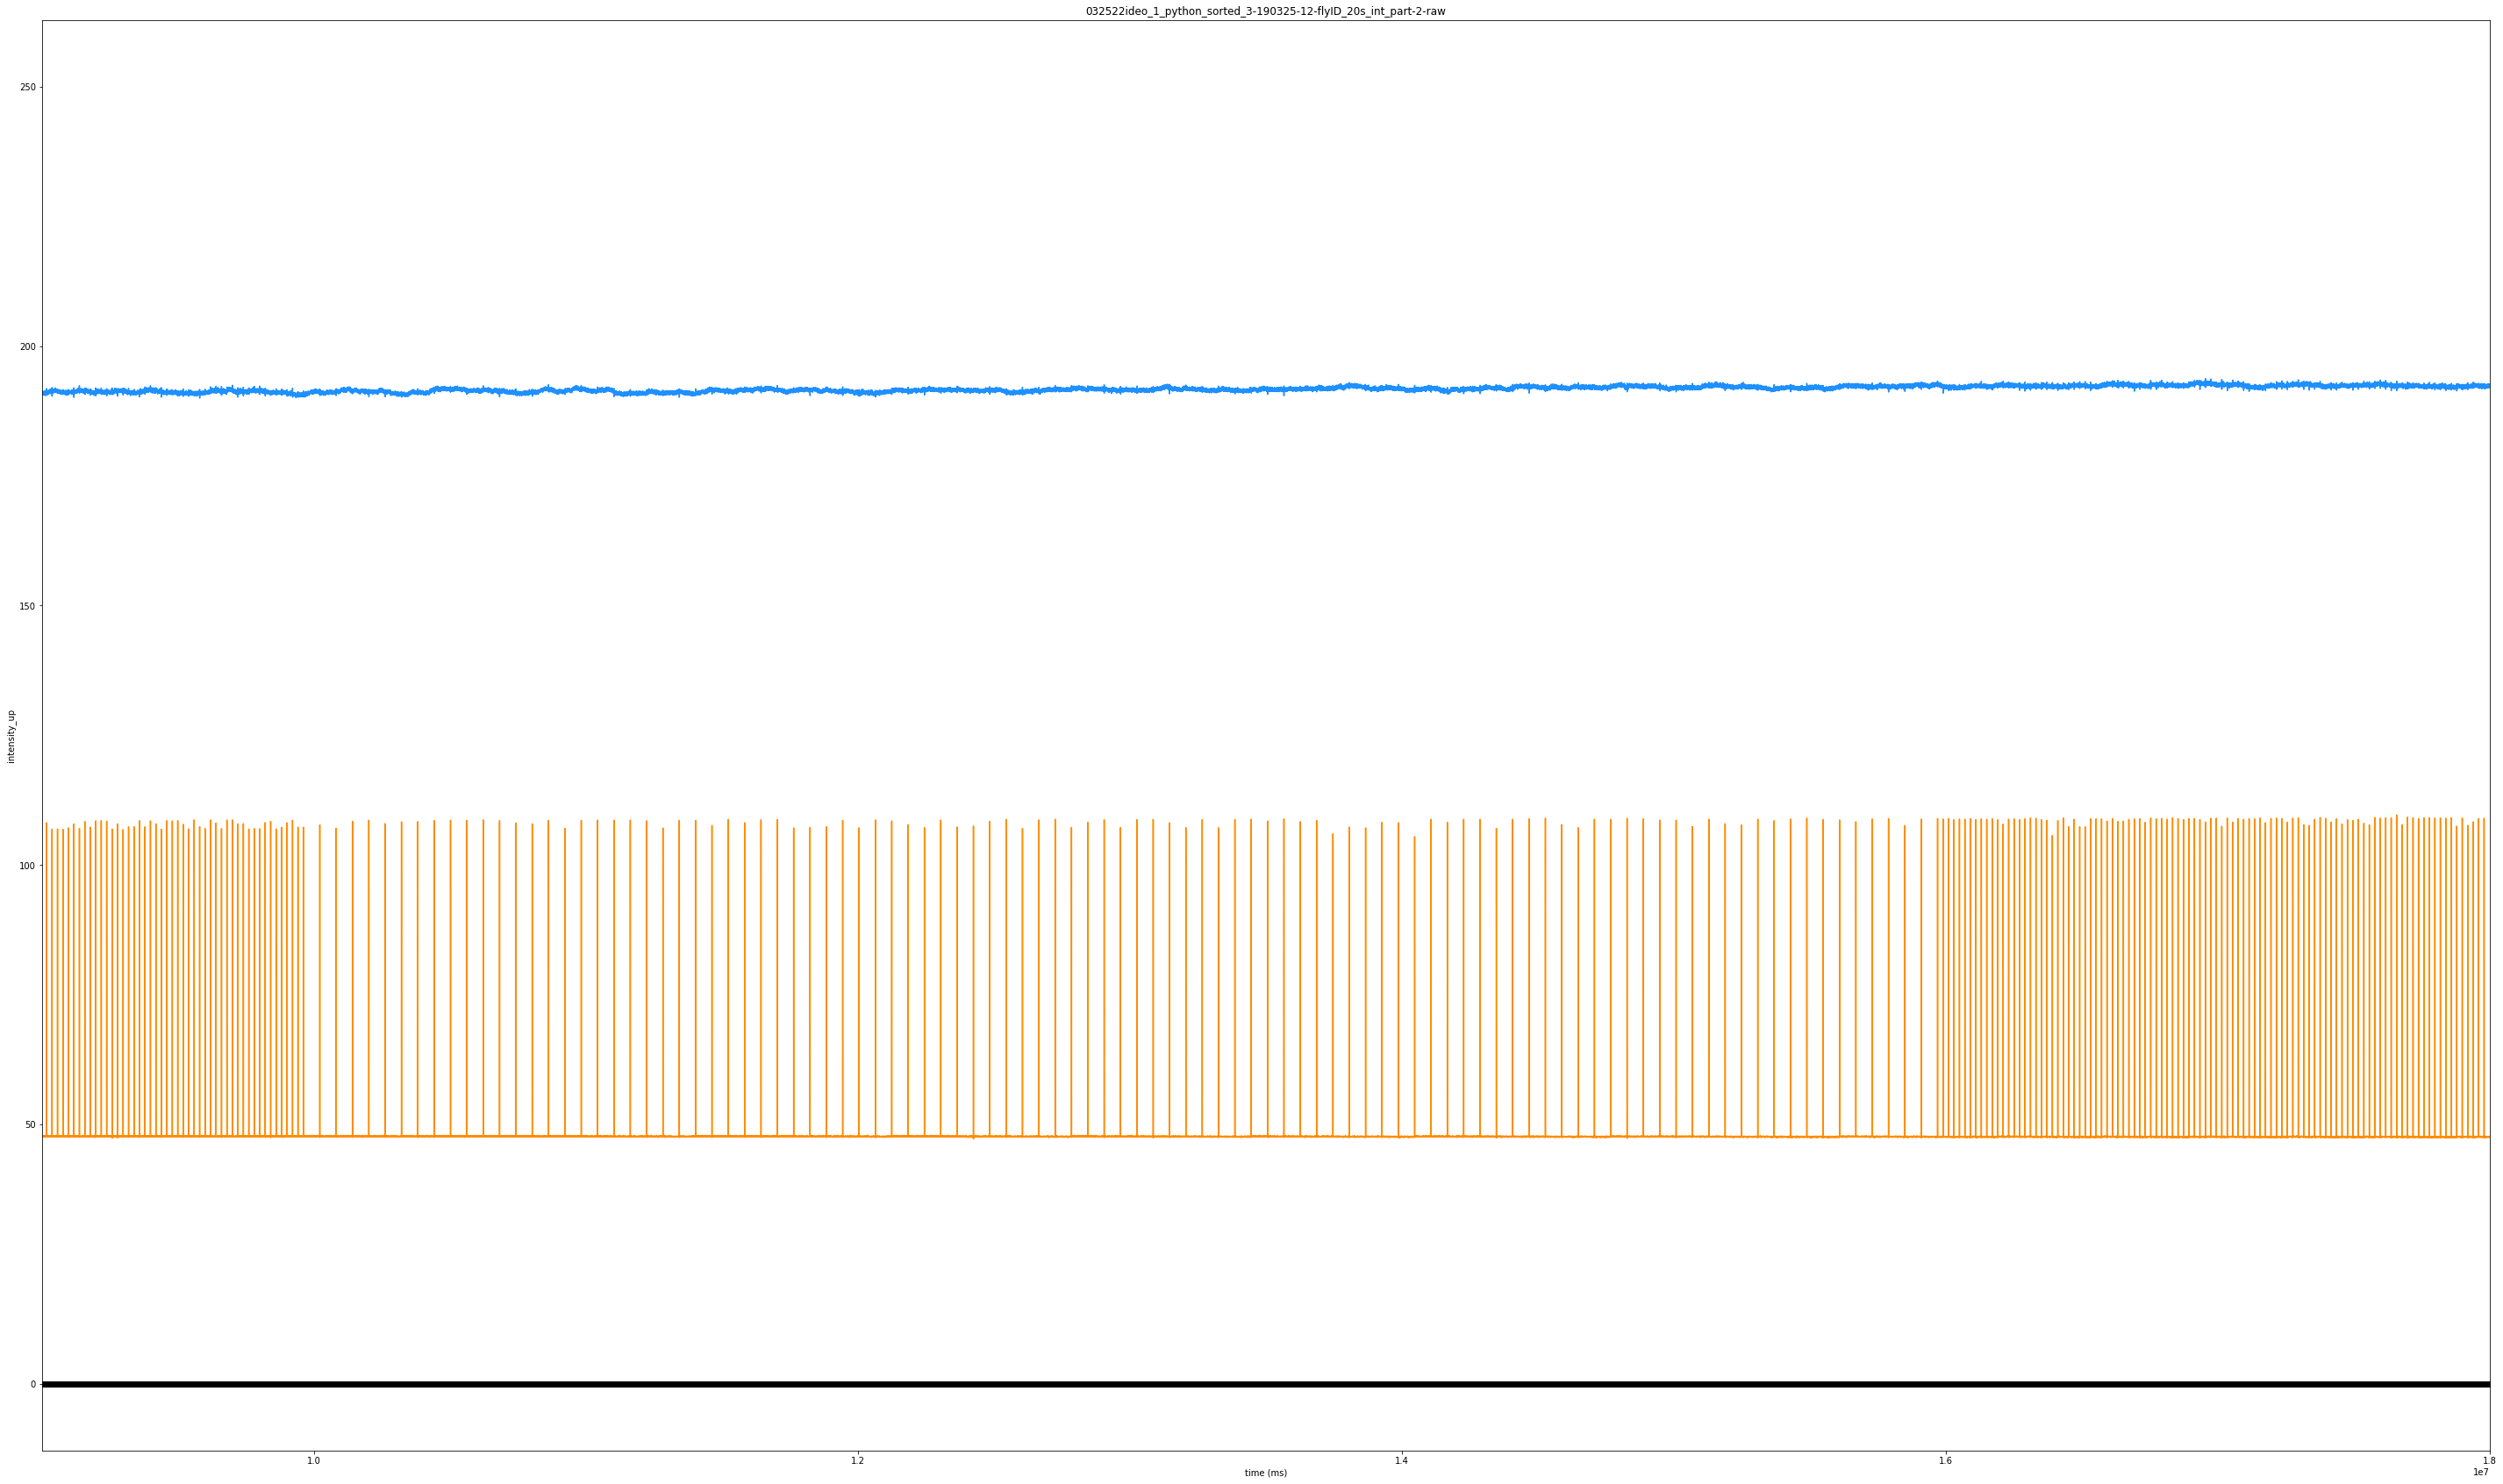

folder there


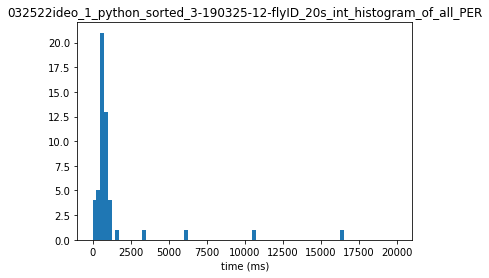

folder there
folder there
('first per time', array([16467,  3366, 10560,  1188,  1122,  1551,  1056,  6237,  1122,
       21780, 44121, 21516, 41679, 26466, 26433, 33726, 45111, 31548,
       54120], dtype=int64))


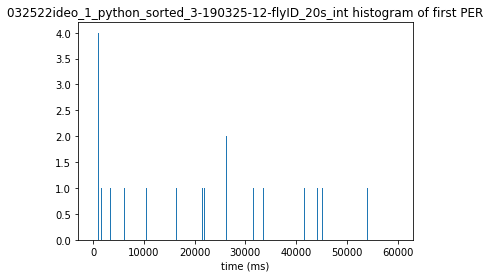

folder there
folder there


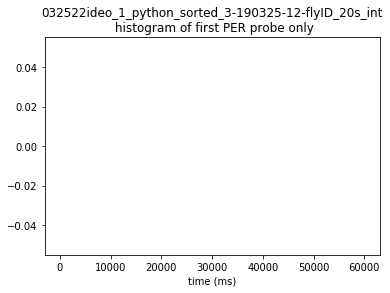

folder there
folder there


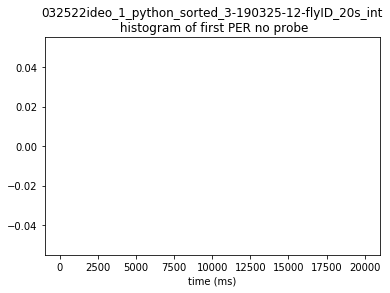

folder there
folder there


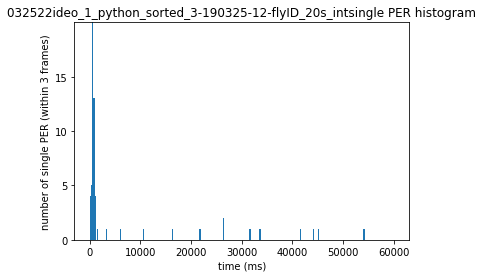

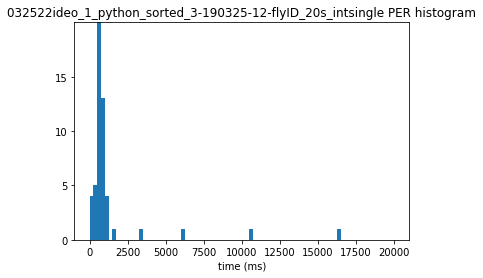

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

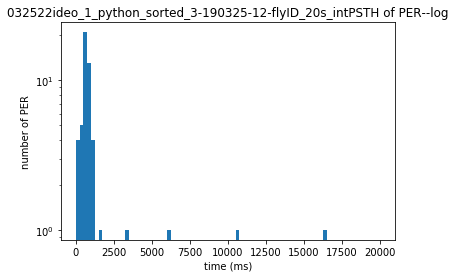

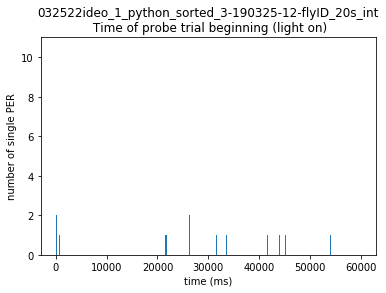

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

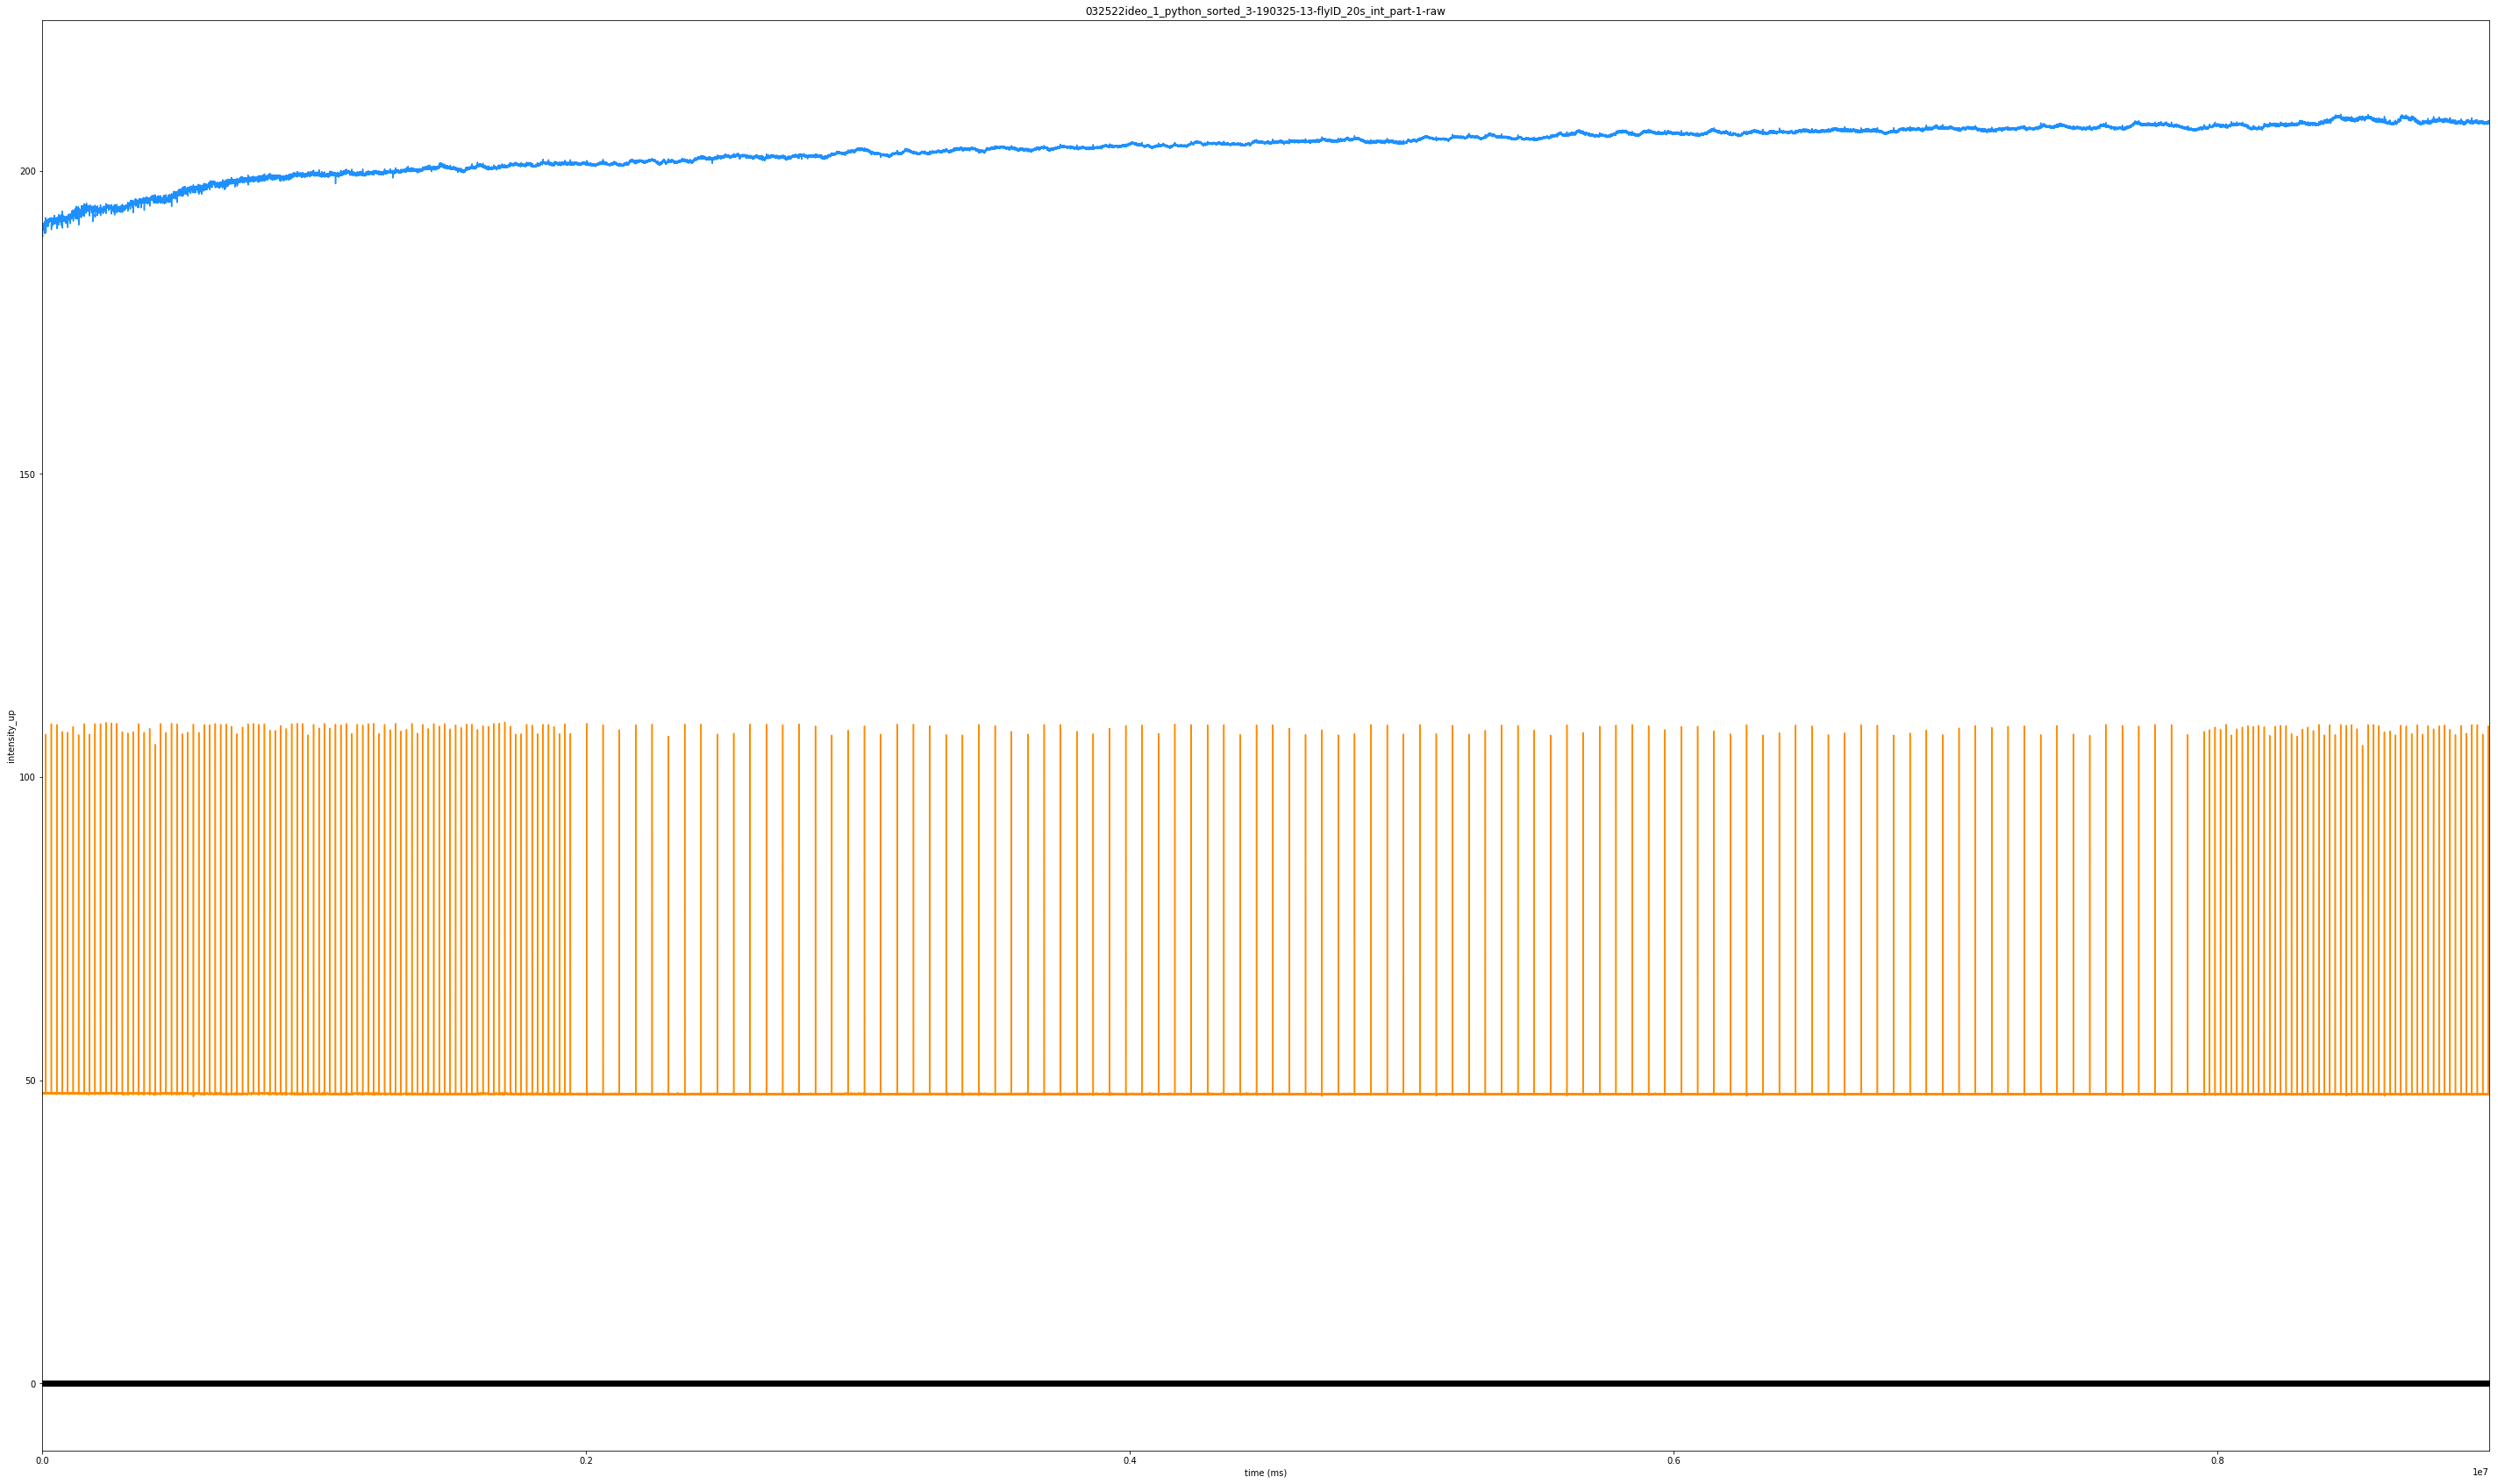

folder there
part-2-raw0325-13


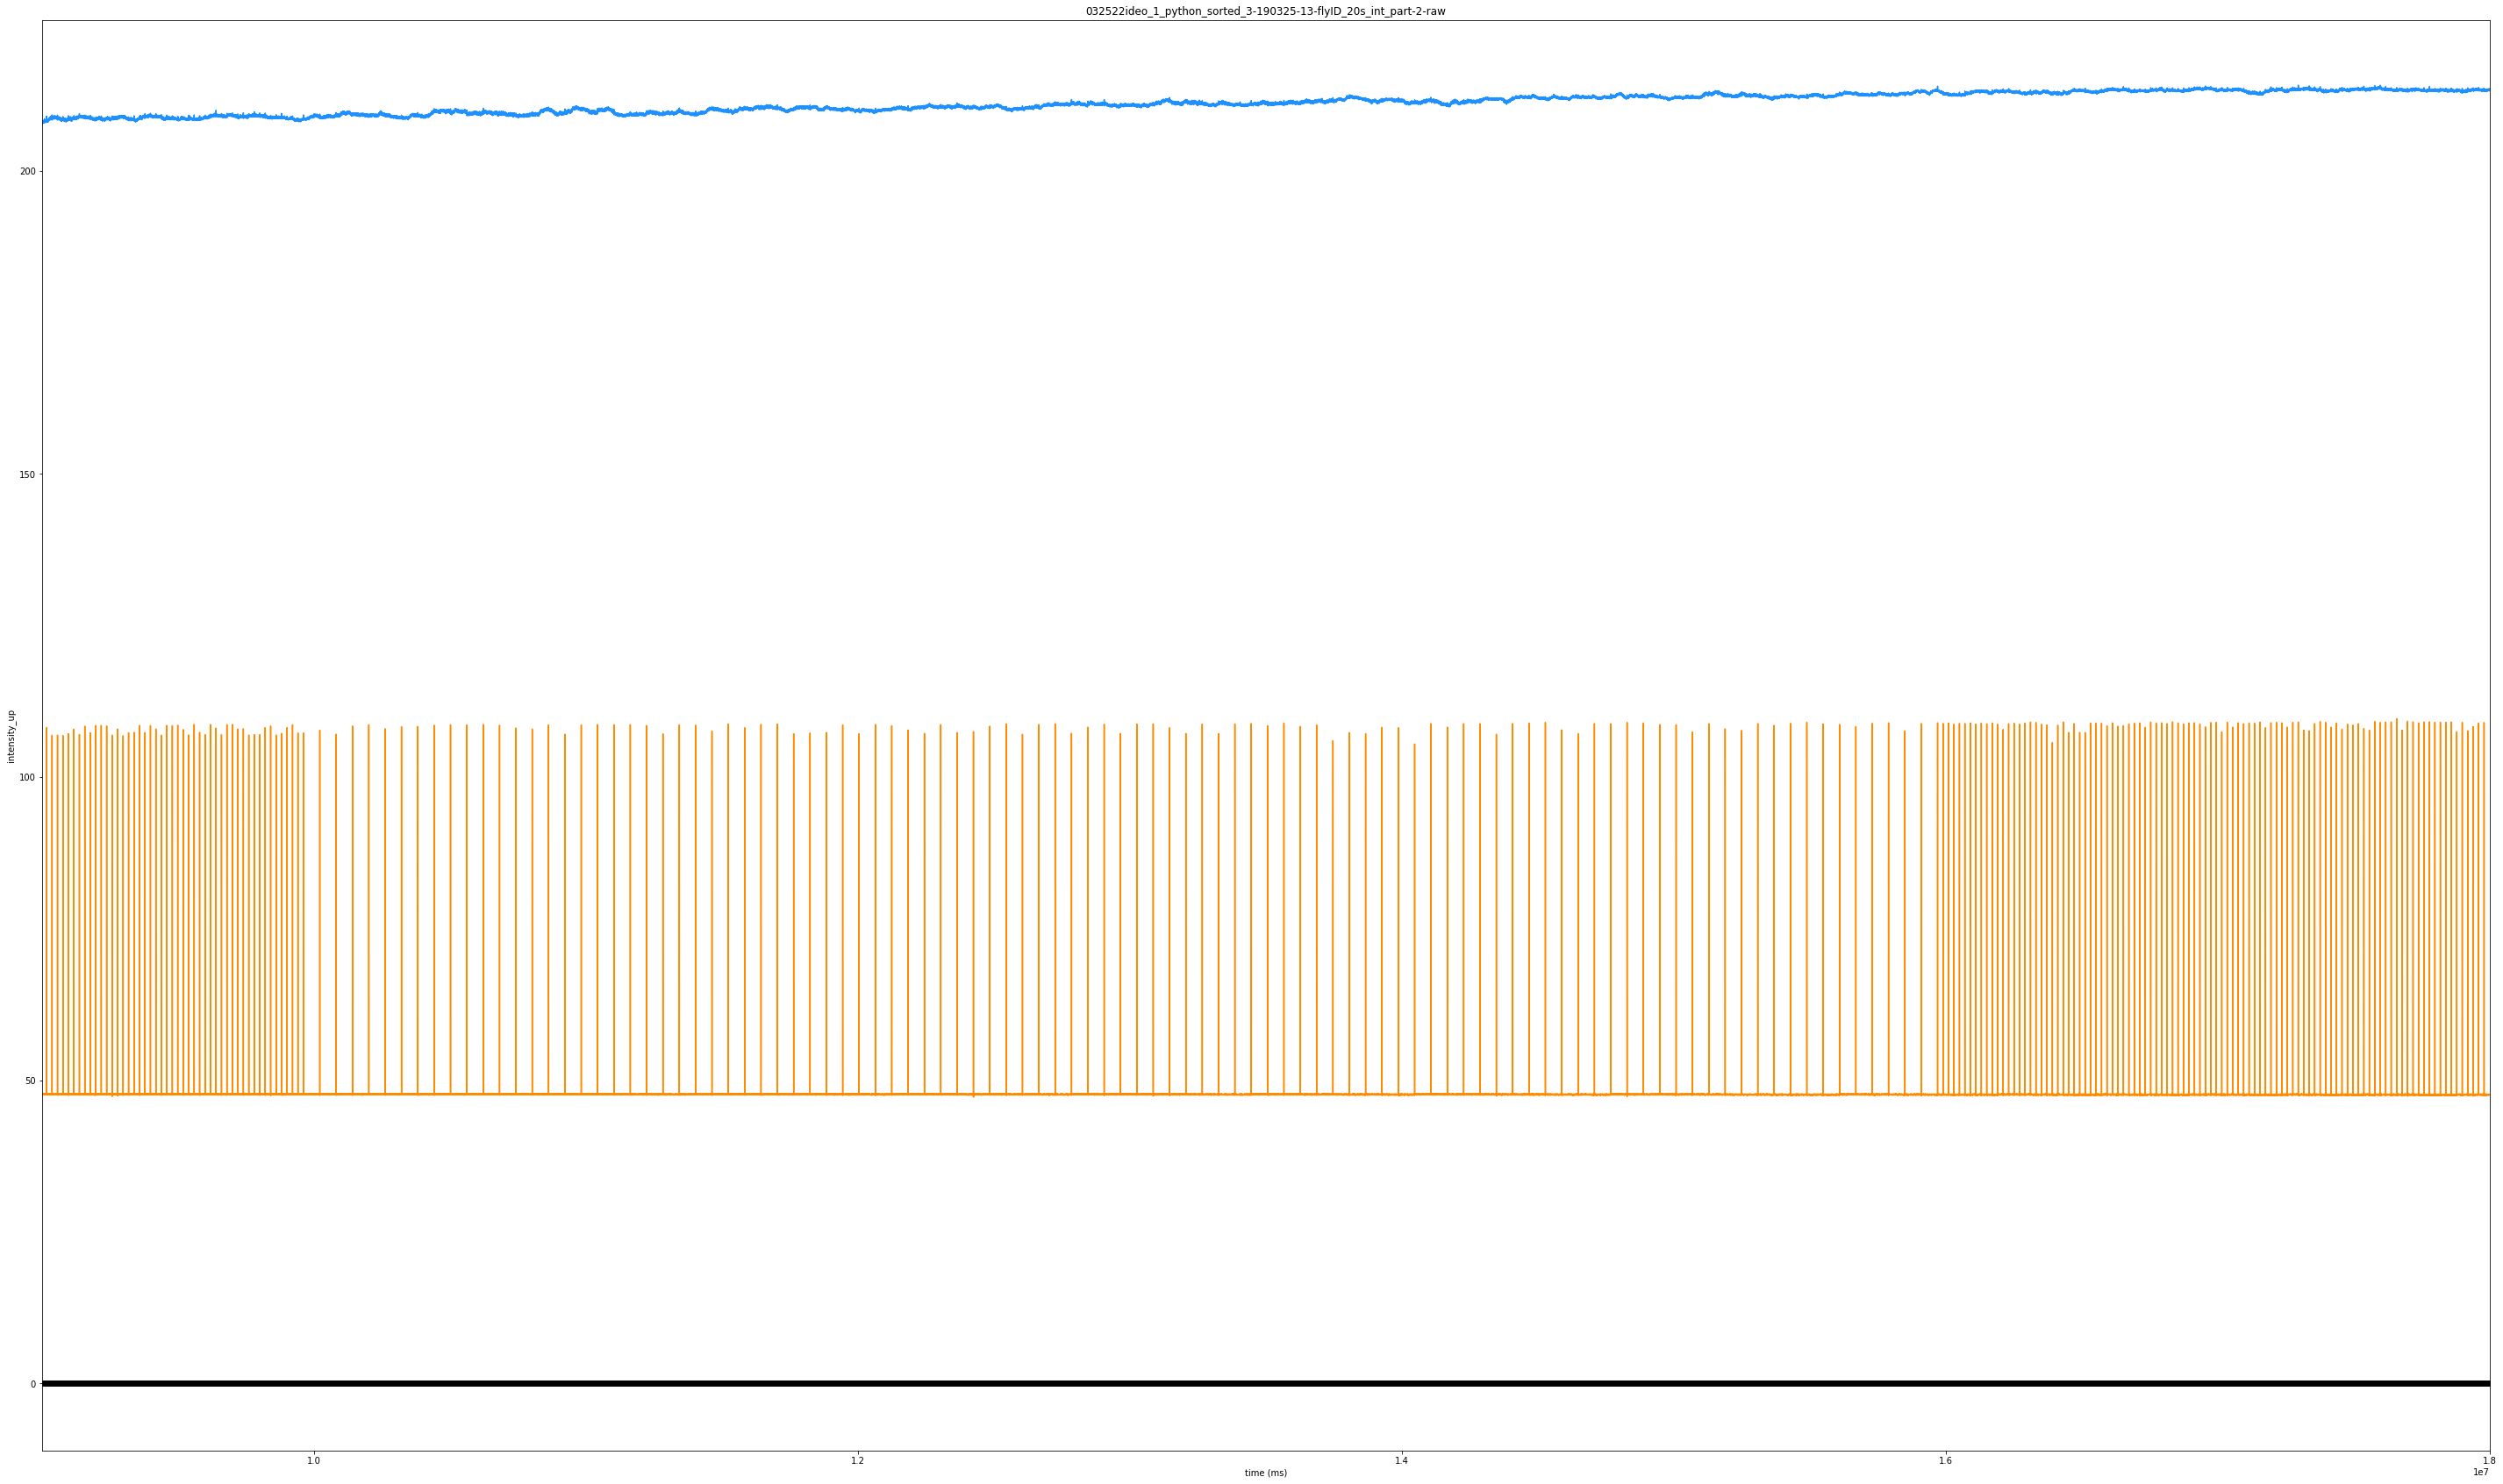

folder there


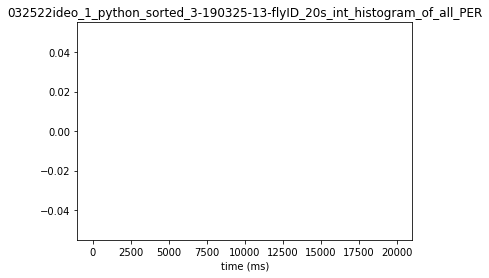

folder there
folder there
('first per time', array([], dtype=float64))


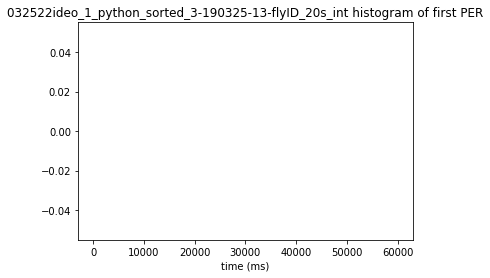

folder there
folder there


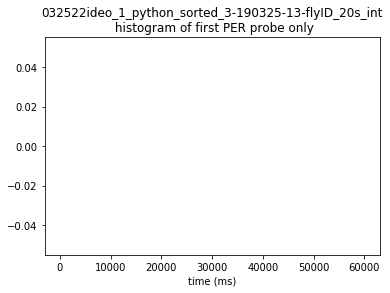

folder there
folder there


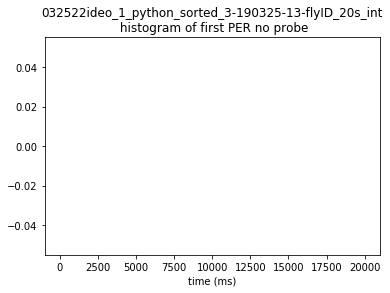

folder there
folder there


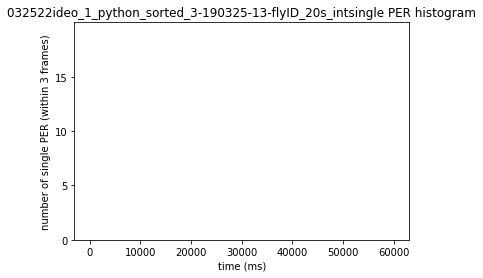

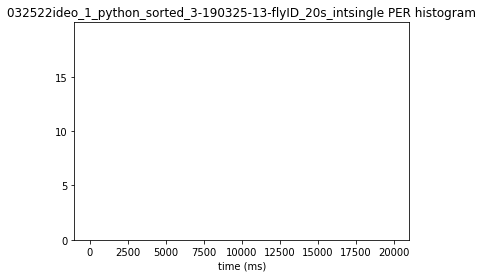

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

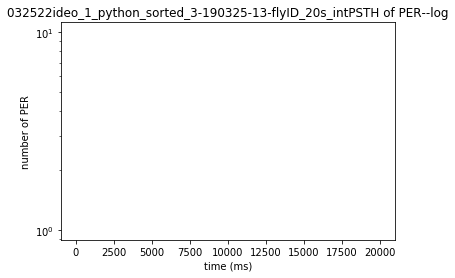

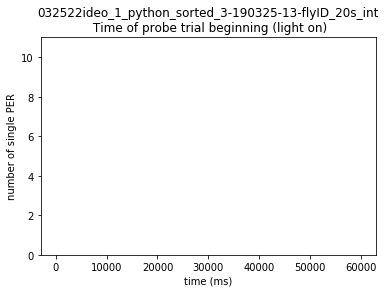

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

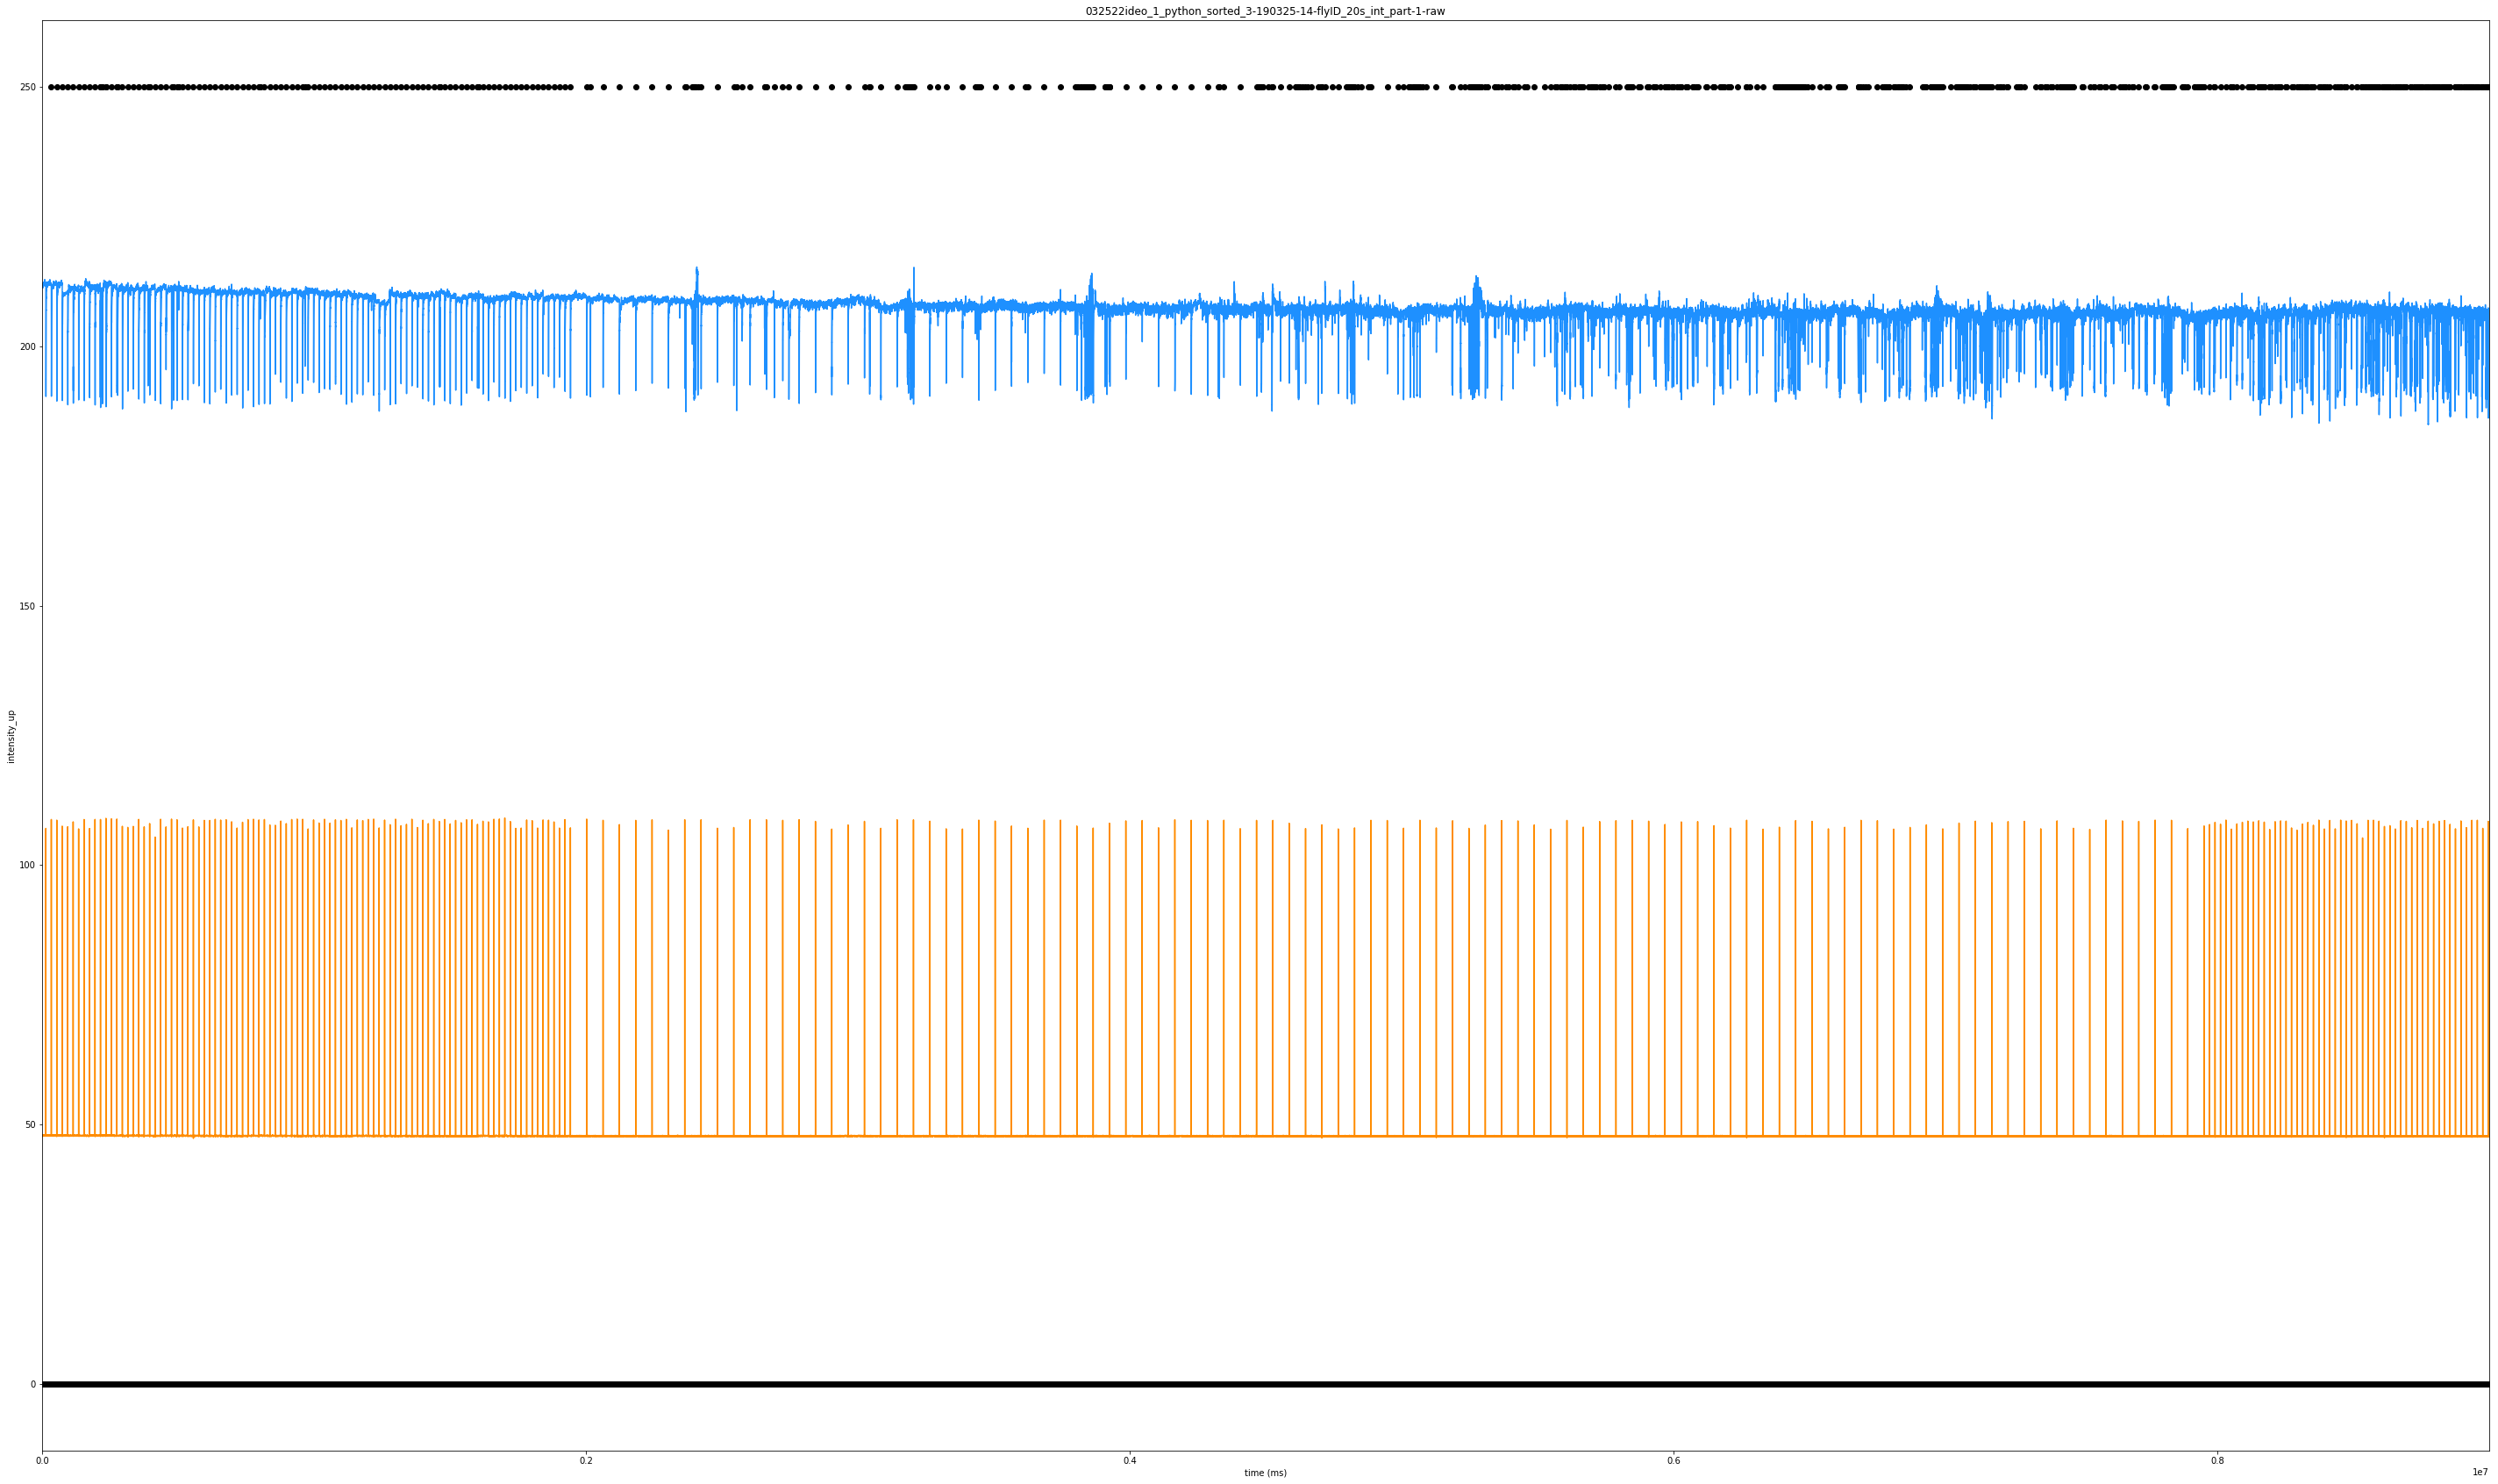

folder there
part-2-raw0325-14


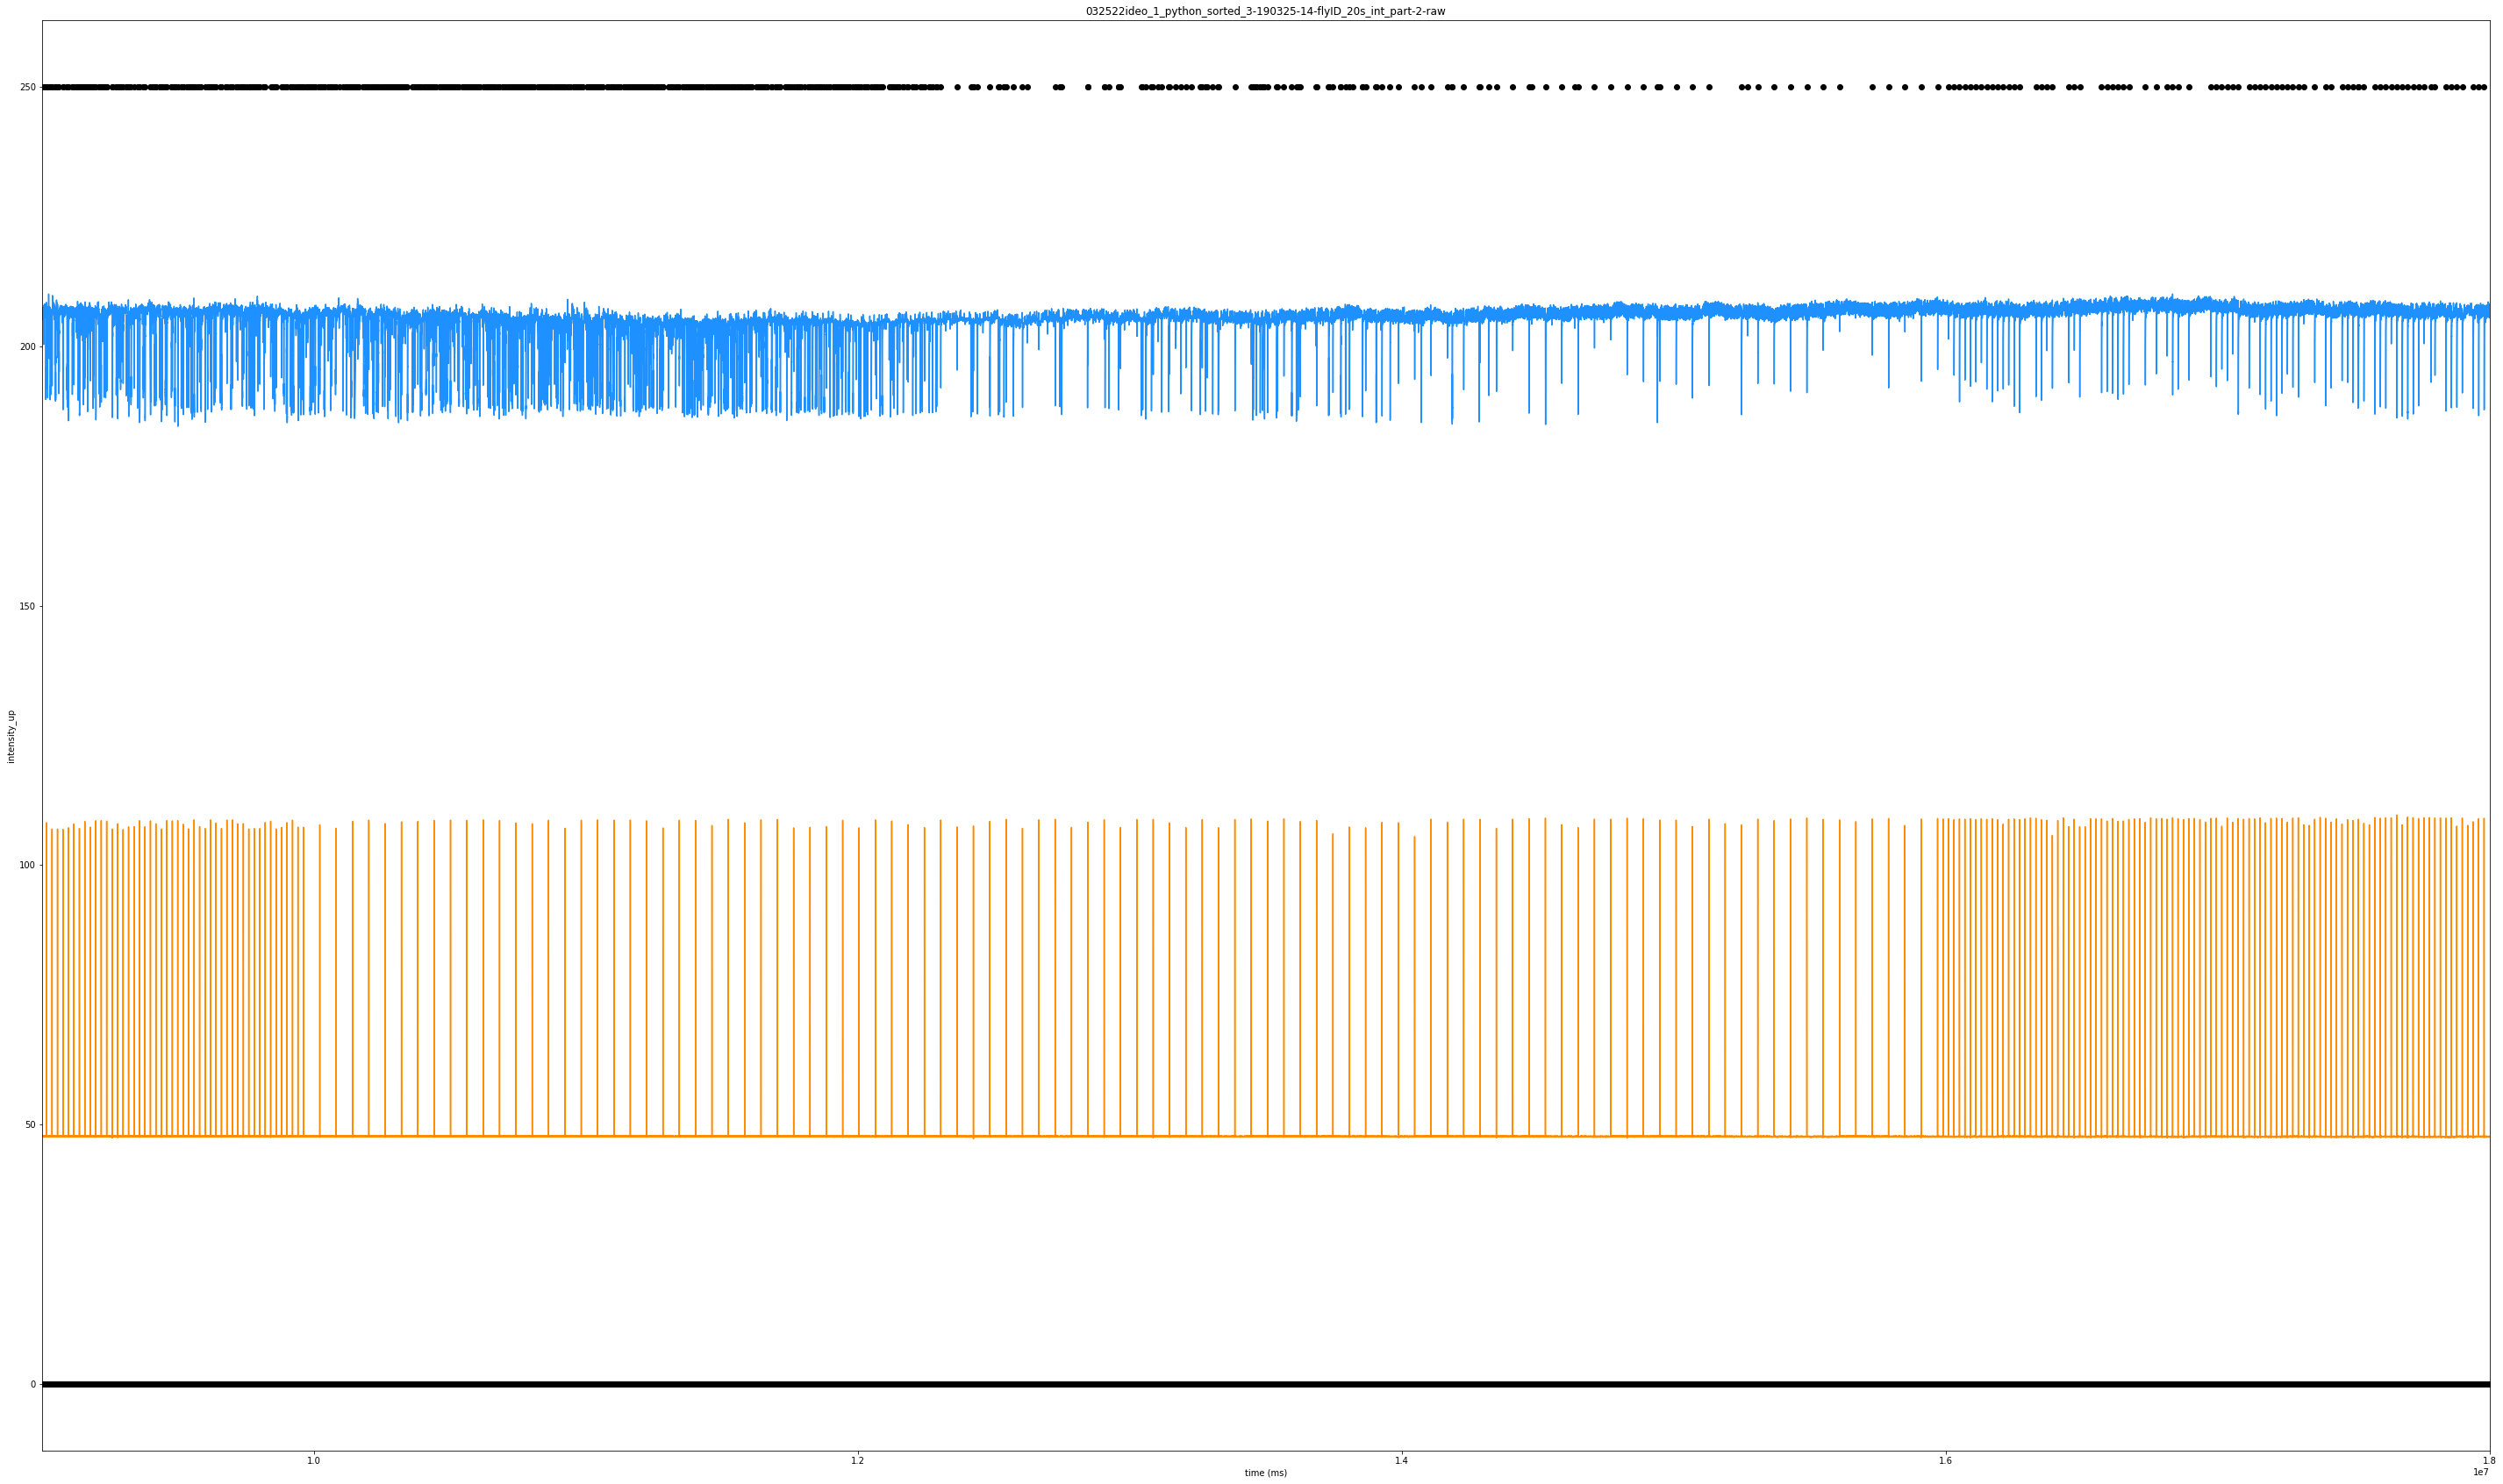

folder there


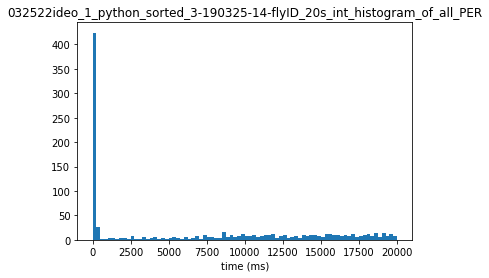

folder there
folder there
('first per time', array([19107,  7392,  1485,  2112, 14157,  7557,  6600,  5016,  8547,
        1485,  4554, 13596,  3300, 10626, 53097, 28842, 22605, 18711,
       30162,  2244, 30228, 47157,  6897, 51117, 53691,  2739, 43362,
        1650, 38874,  8679, 27918, 23793,  8382, 13233, 31548, 12078,
       38742, 18975, 10395, 57750, 29304,  6369,  7326, 15510, 24783,
       37818, 15246, 11913, 17787,  9768, 12705, 21747, 16764,  2508,
       15477, 31350,  1122, 26664, 10164, 44319,  9570,  1815, 28710,
       35574, 49863,  8580, 18513,  6897, 44781, 16104, 29337,  4389,
       16830, 21120, 31911, 40689,  2607, 11517, 31515, 15642, 19140,
        9669, 24651, 24849,  8646, 23529, 16038, 15642,  6897, 19173,
        8514, 17820,  1023,  1287,  8151,  9042, 18810,  2178,  9306,
        9768, 10032, 11451,  6765, 11352,  9207, 13761, 17952, 15840,
       10857,  3135,  7359, 10626,  7590, 10164,  3597,  9966, 15015,
       11649,  8712,  8679,  7326,  9471, 101

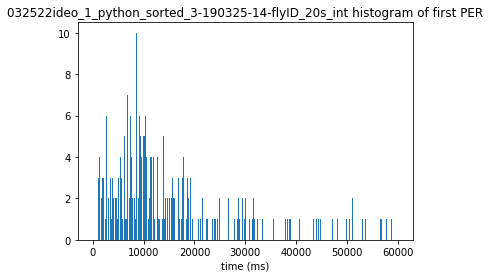

folder there
folder there


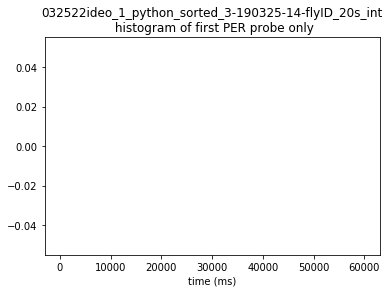

folder there
folder there


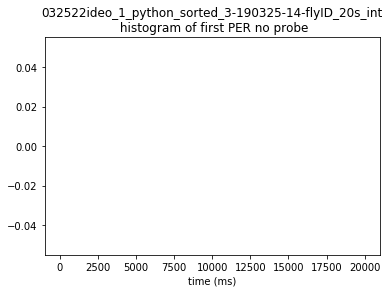

folder there
folder there


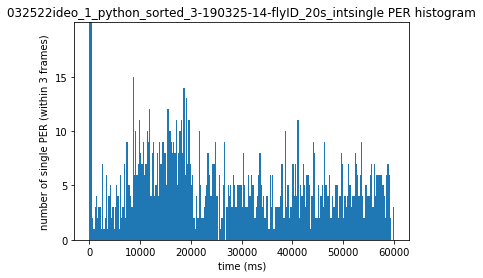

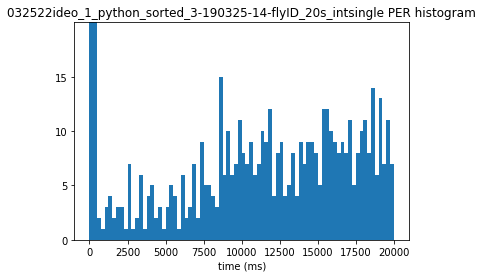

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

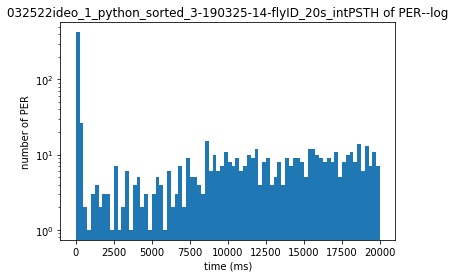

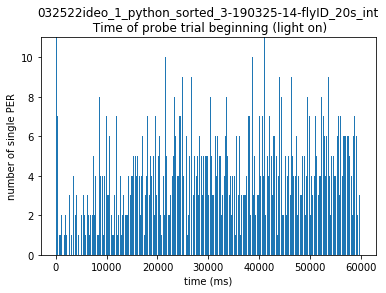

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

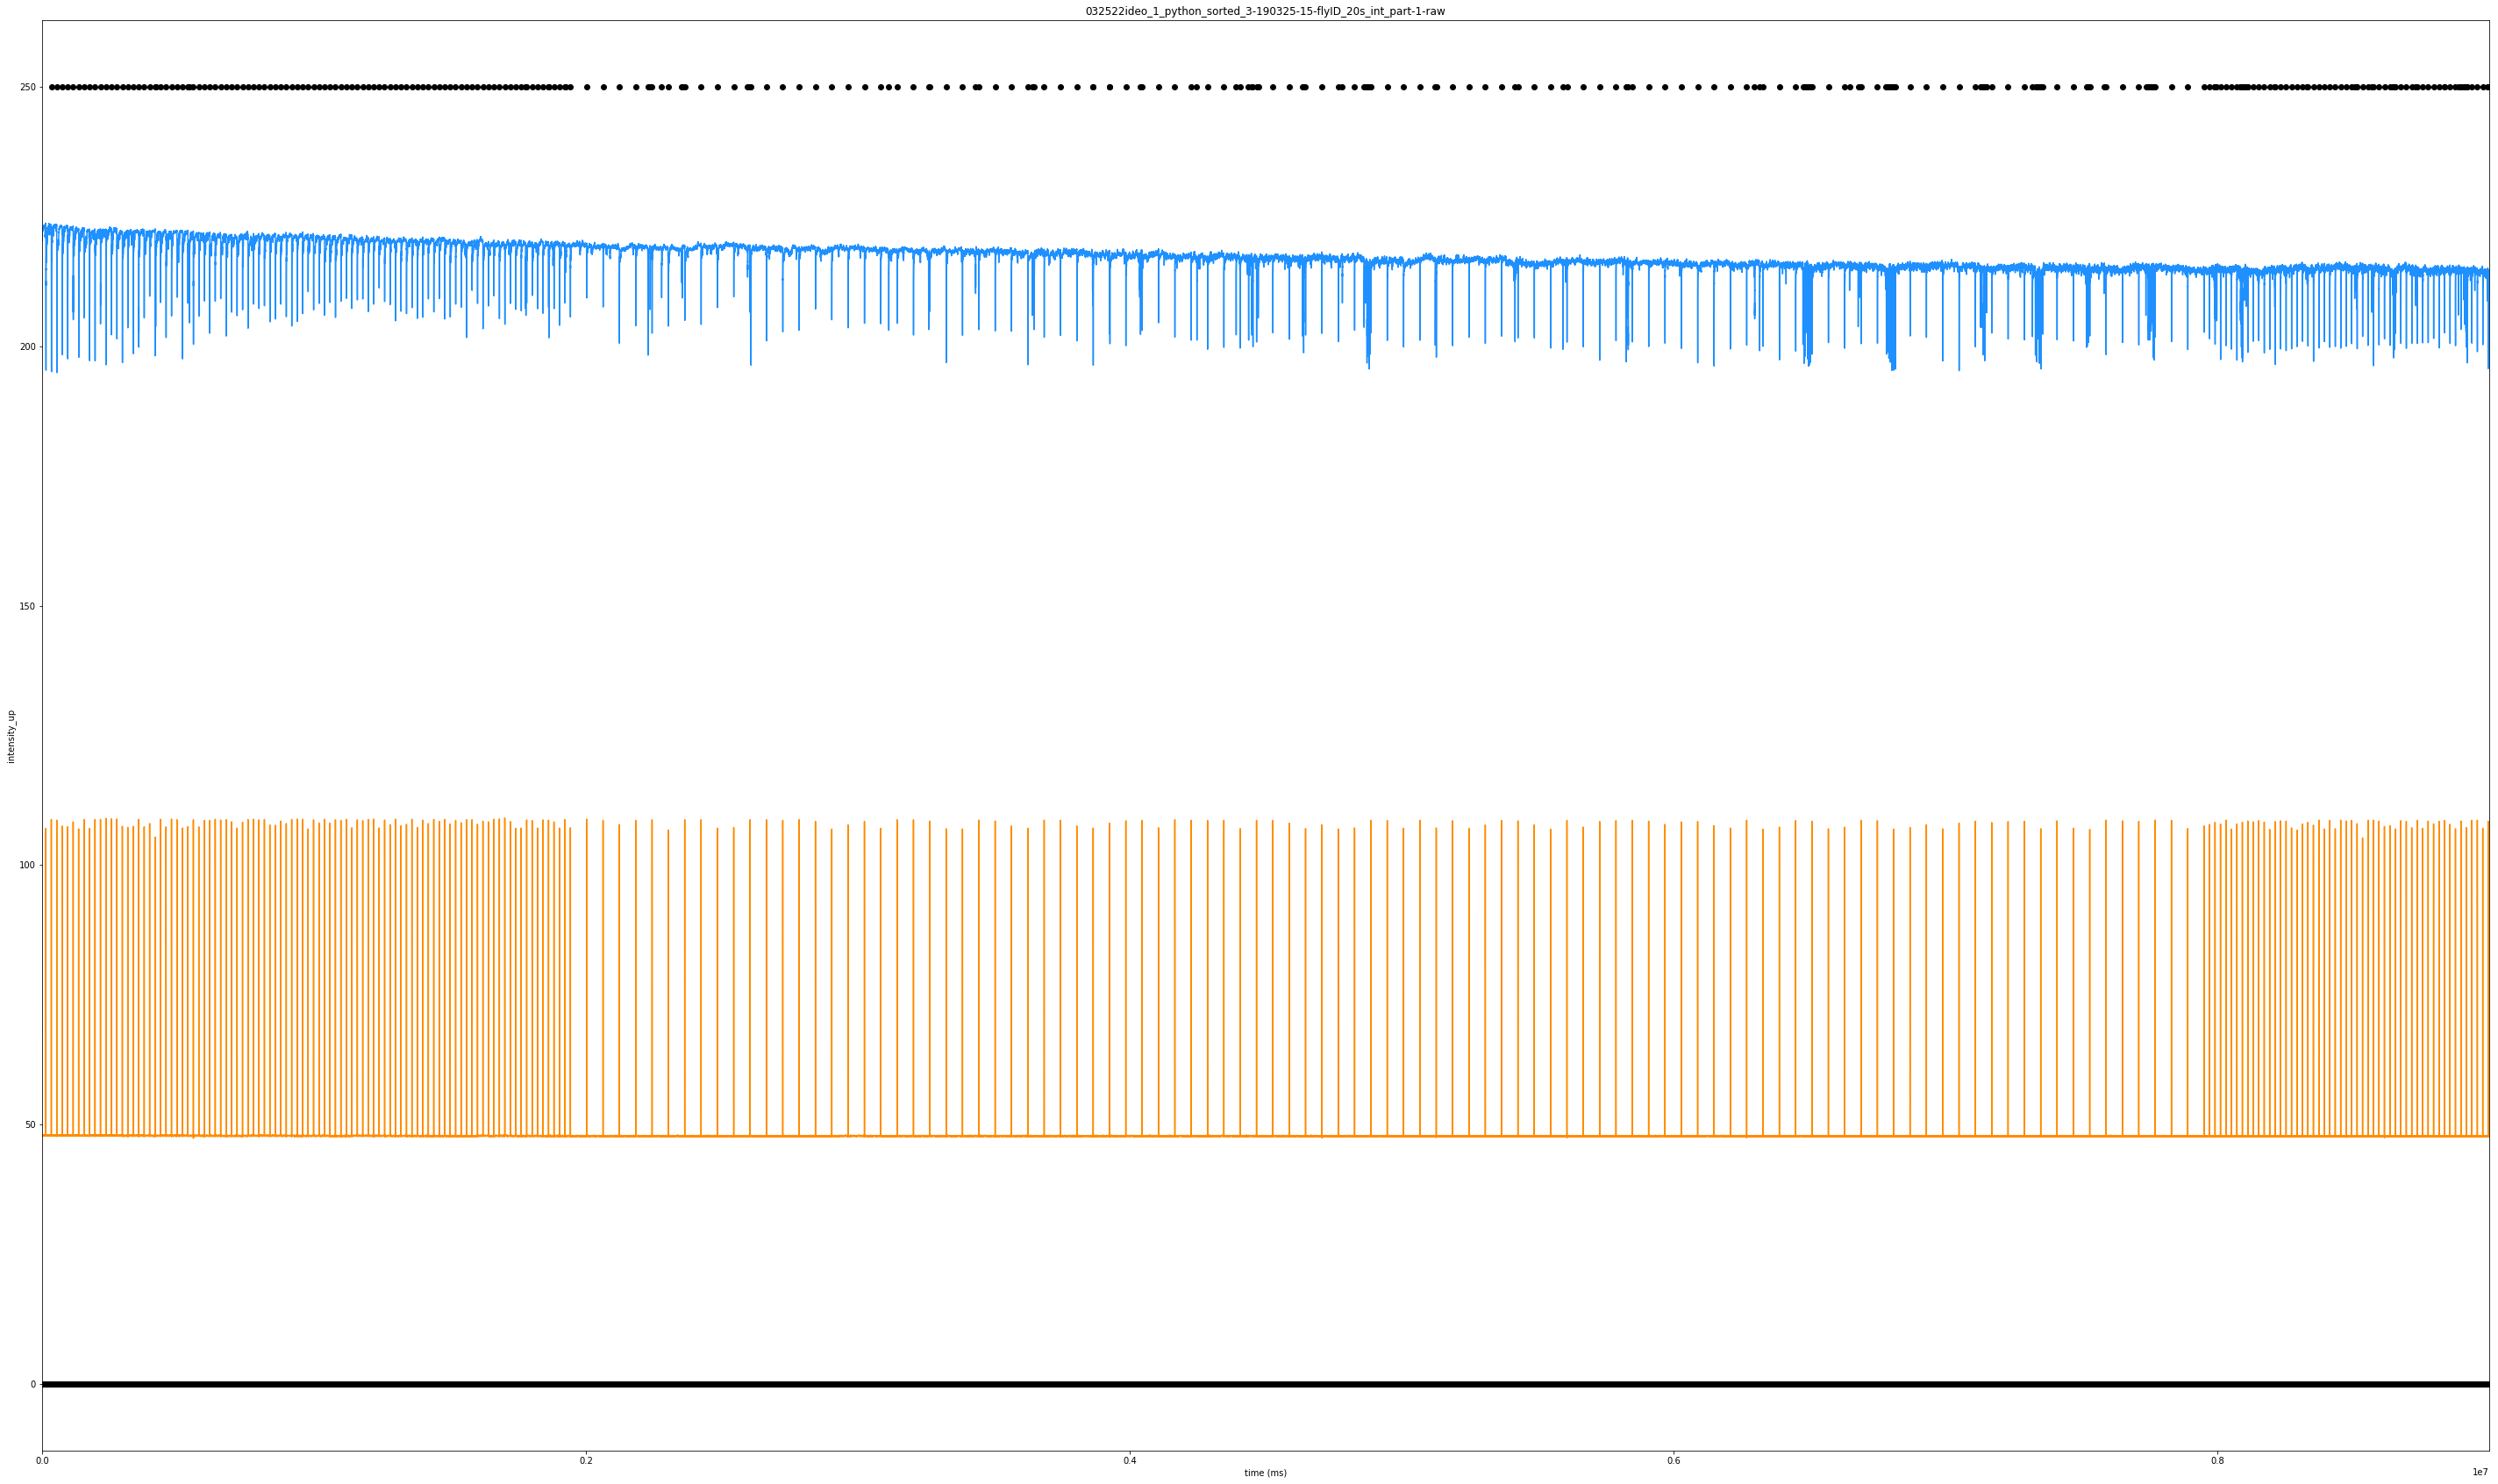

folder there
part-2-raw0325-15


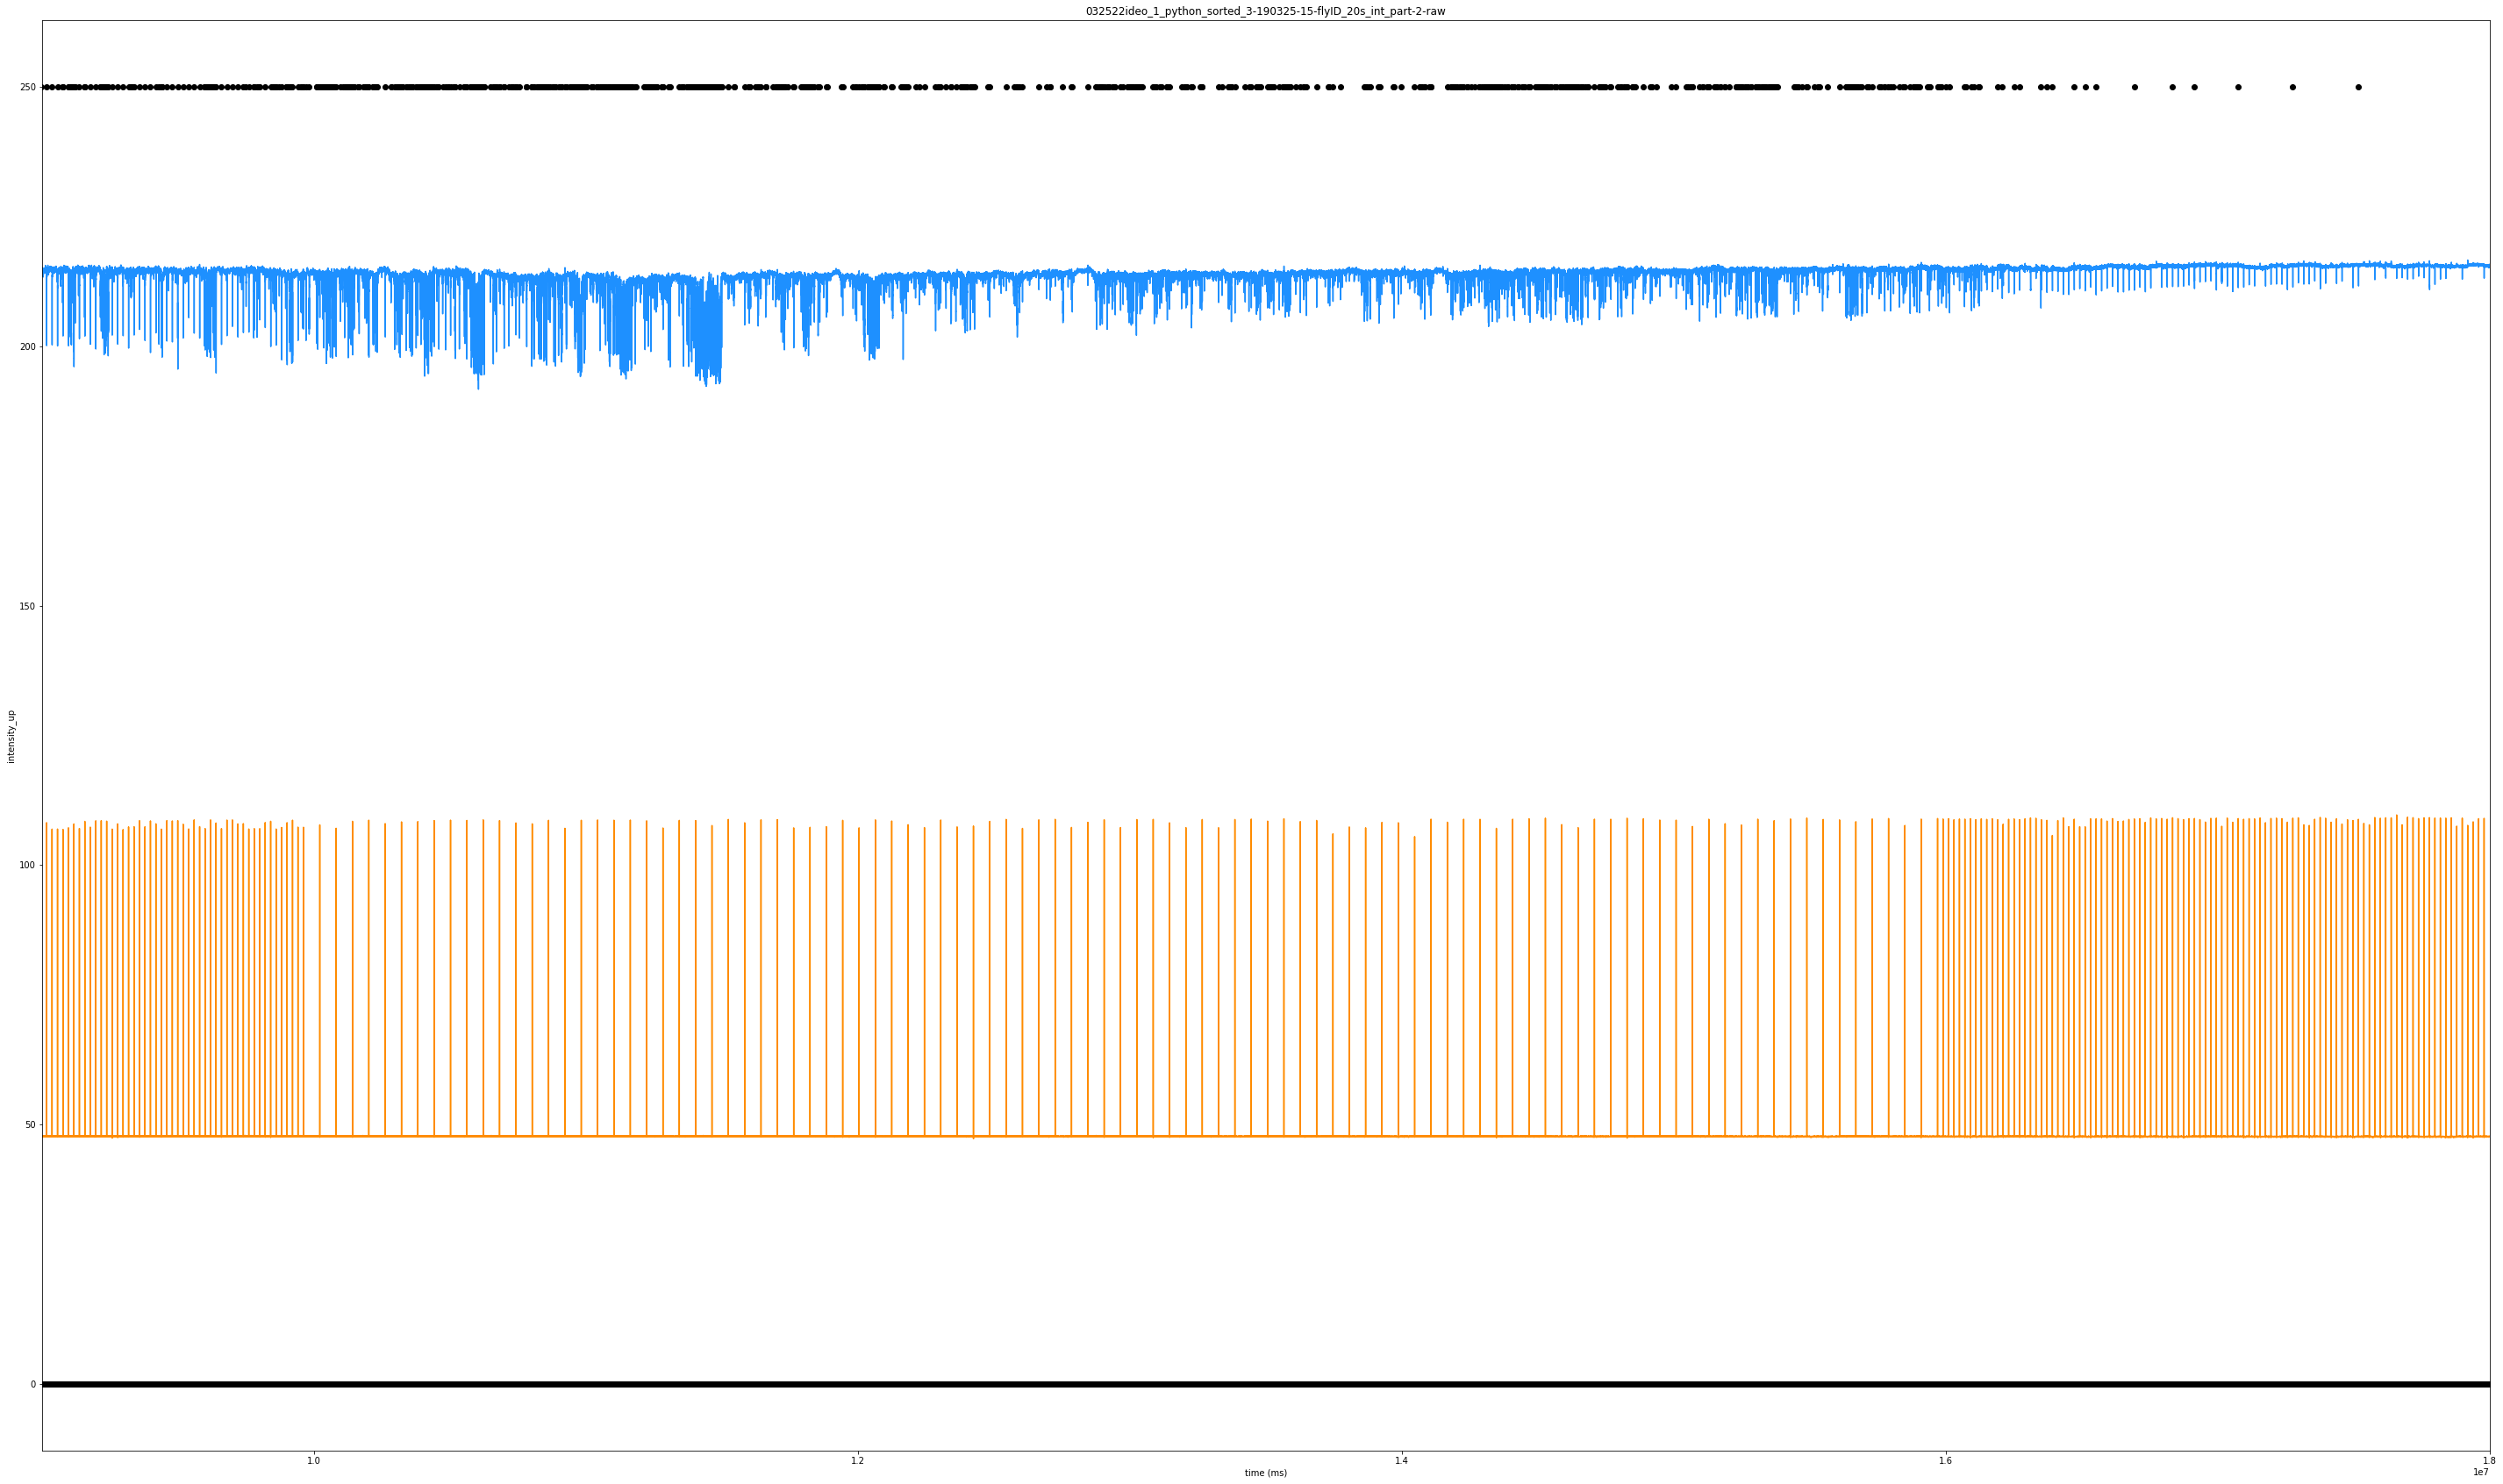

folder there


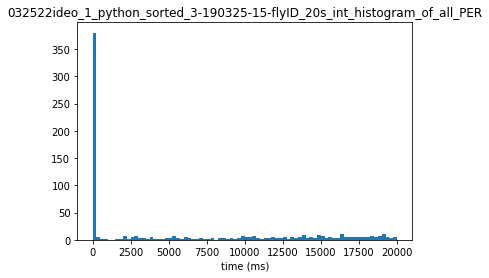

folder there
folder there
('first per time', array([ 2244,  5115, 15873,  1650,  2838, 45177, 35244, 48147, 50952,
        3300, 29403, 55770, 48345, 16632, 57981,  1551, 54021, 20724,
       45243, 30690,  6270, 48576, 15180, 34749, 56100, 49170, 44946,
       37719, 29436, 26697, 17820, 31284,  6105, 19338, 29634,  7095,
       47949, 52701, 26301, 17622,  6369, 13101,  7029, 18579, 17490,
       11319, 13563, 10065, 14883, 19041, 10593,  9900,  3432, 16467,
       18546, 19338,  5280,  4686, 18909, 16962,  5115,  5280,  9240,
       10923,  2442, 19866, 16731,  7524,  4752, 10164, 18183, 10395,
        9042, 11550, 14949, 10263, 10461,  9306,  8679, 15609,  4587,
       14883, 21450,  1947,  7689,  9801, 11781, 11187,  2541,  2145,
        2871,  6204,  5544,  5346,  2475,  8448,  2079,  2508,  5610,
       20526,  8481,  2178,  1914, 20559, 12144, 17160,  6006, 27951,
        2937,  3861, 38181,  9702,  3201,  3465, 27390, 41085, 19470,
       11814,  4026, 29040, 28017, 28413,  29

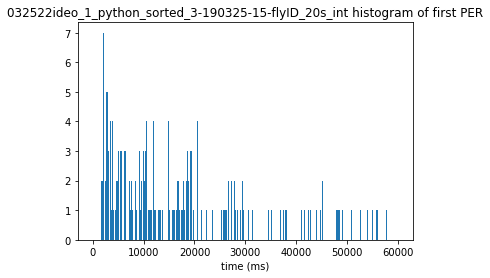

folder there
folder there


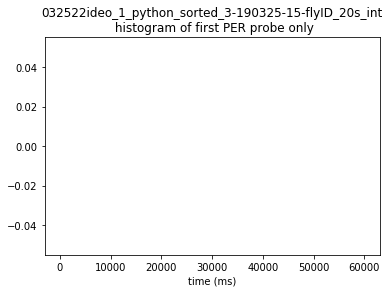

folder there
folder there


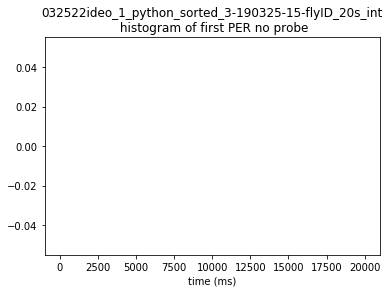

folder there
folder there


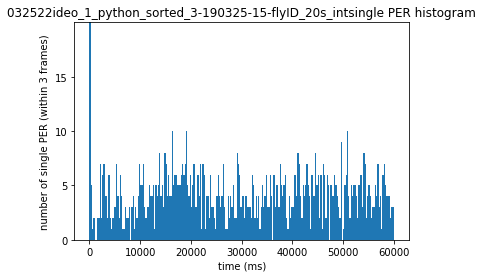

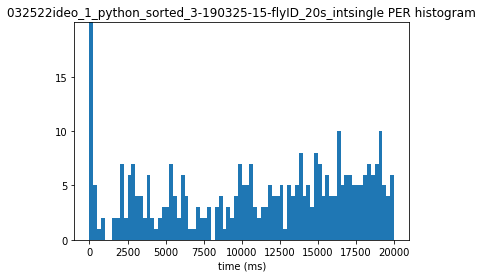

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

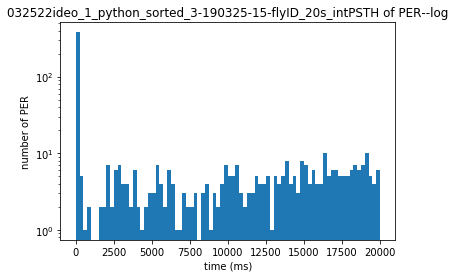

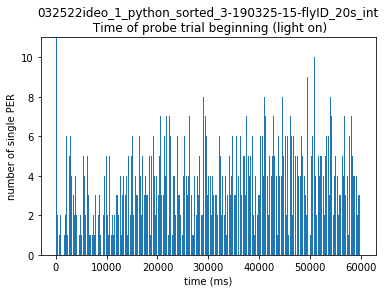

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

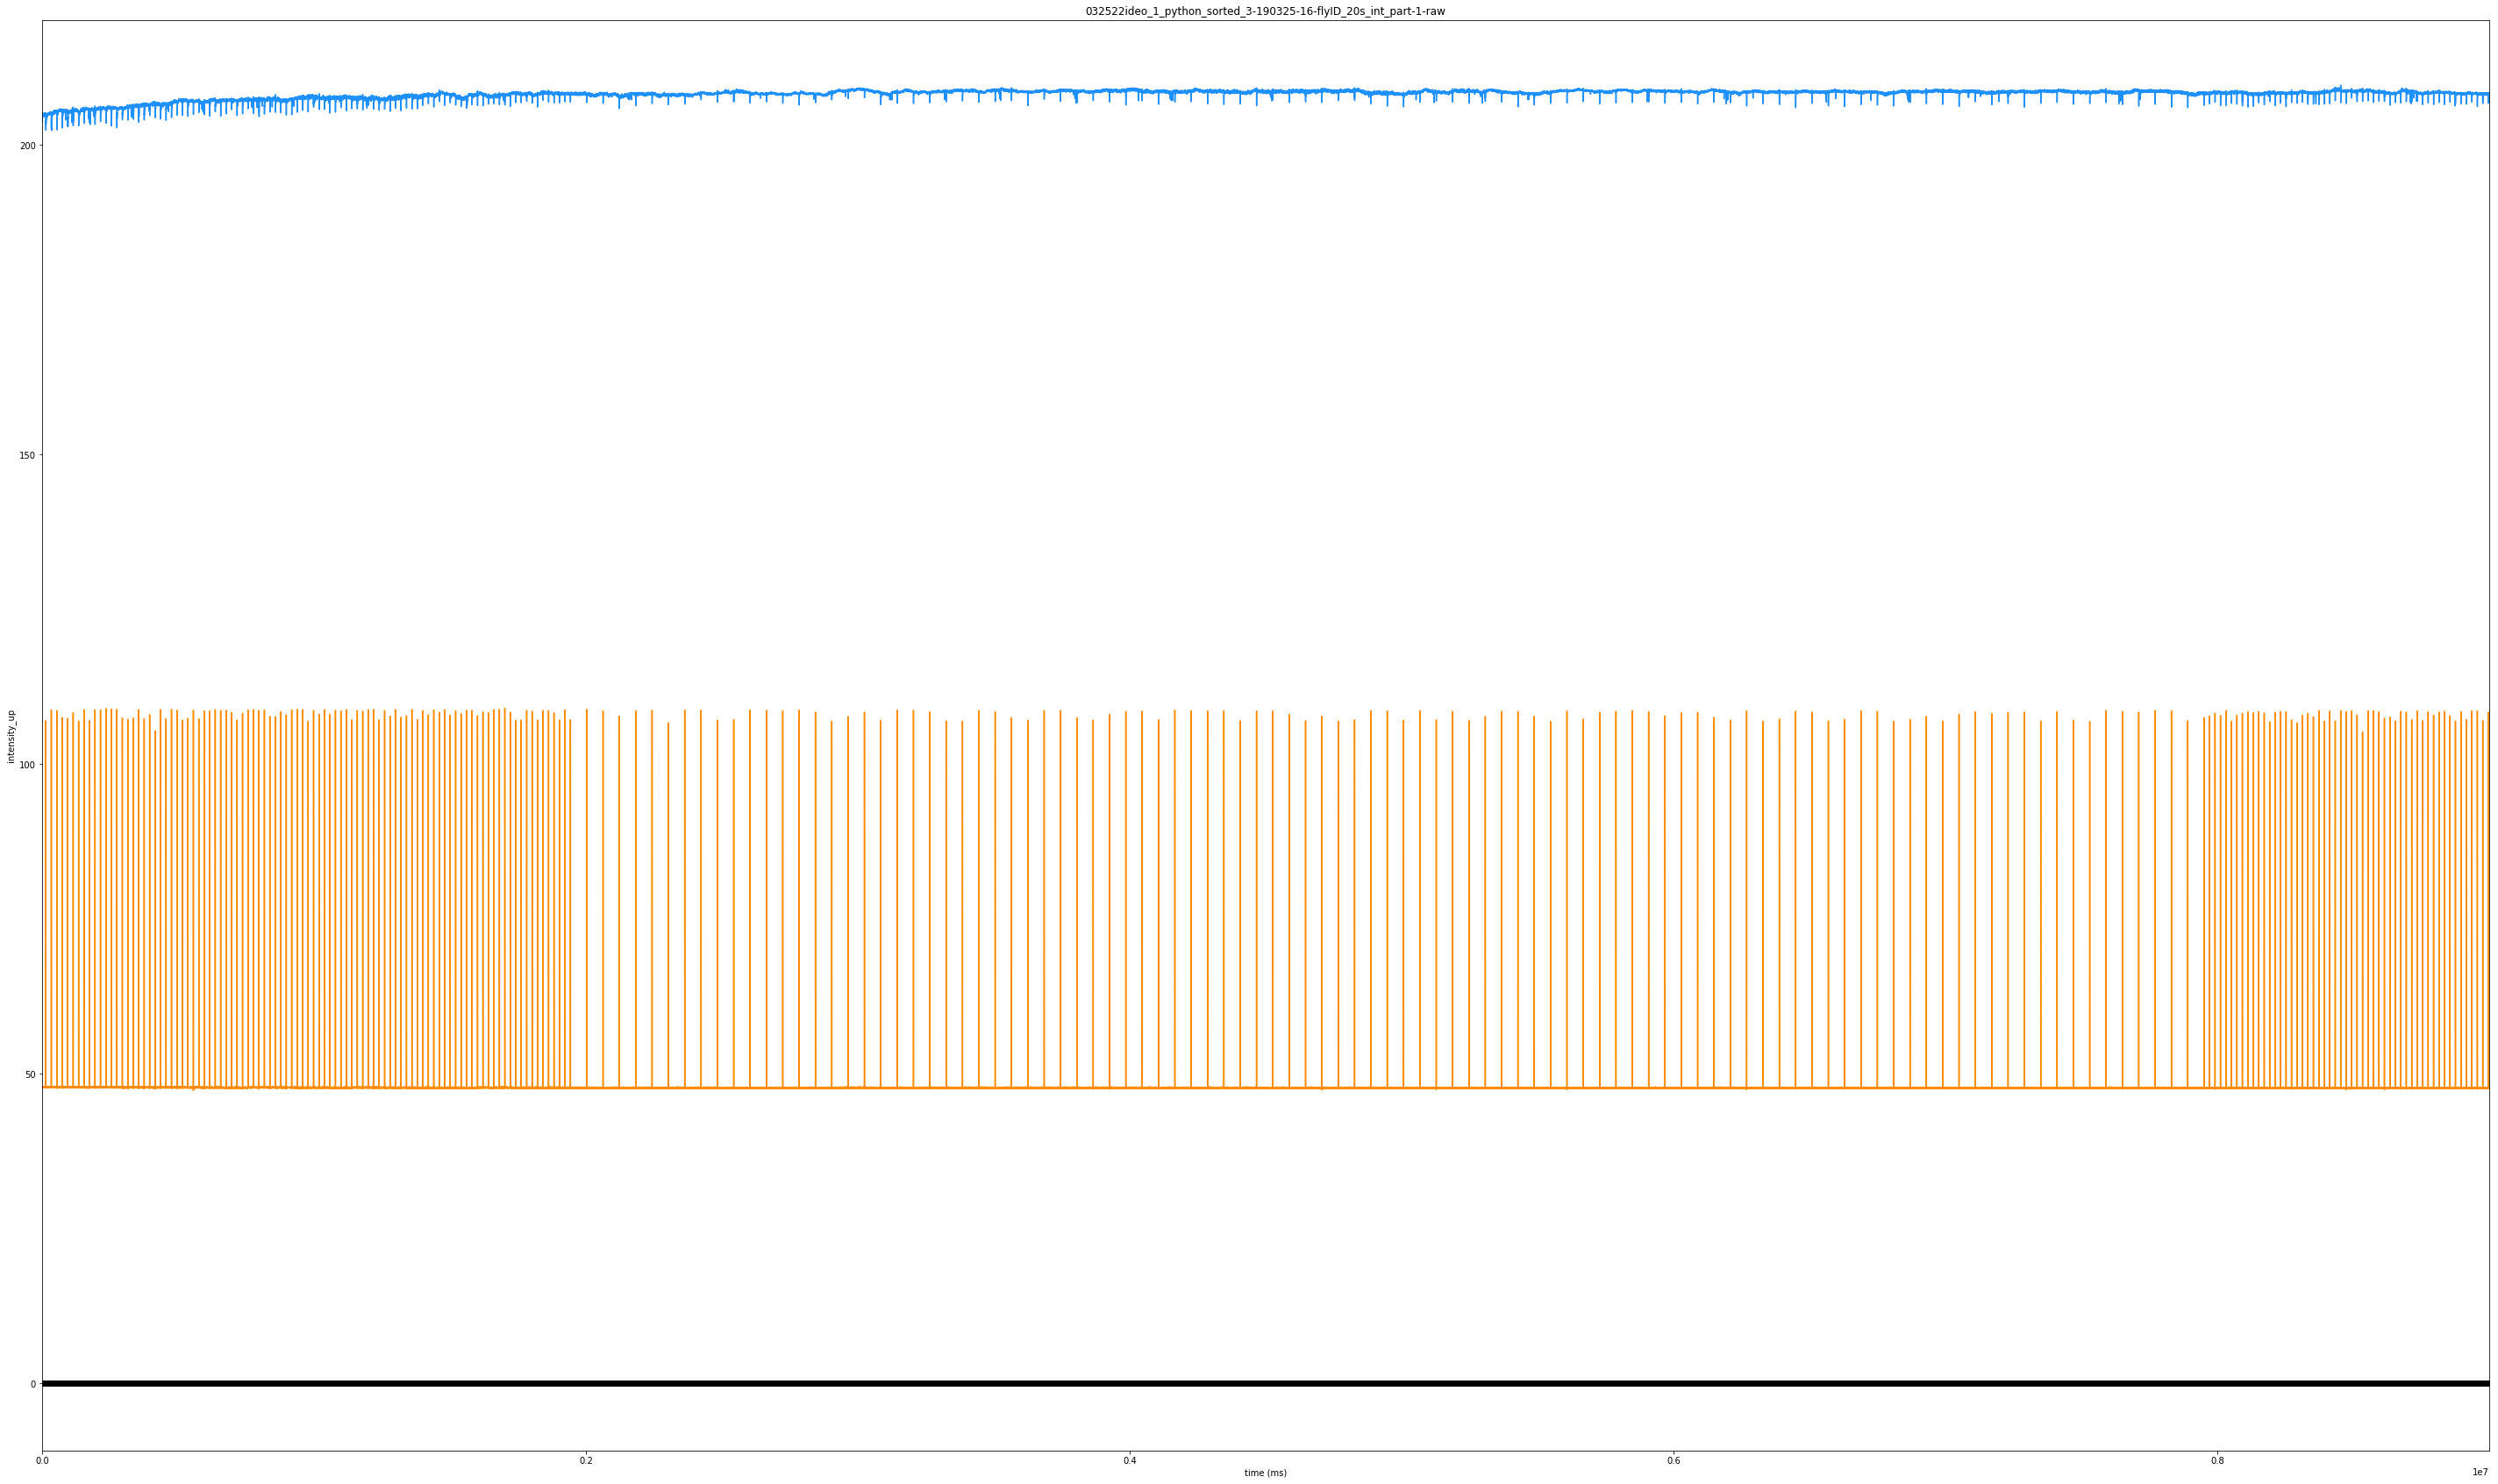

folder there
part-2-raw0325-16


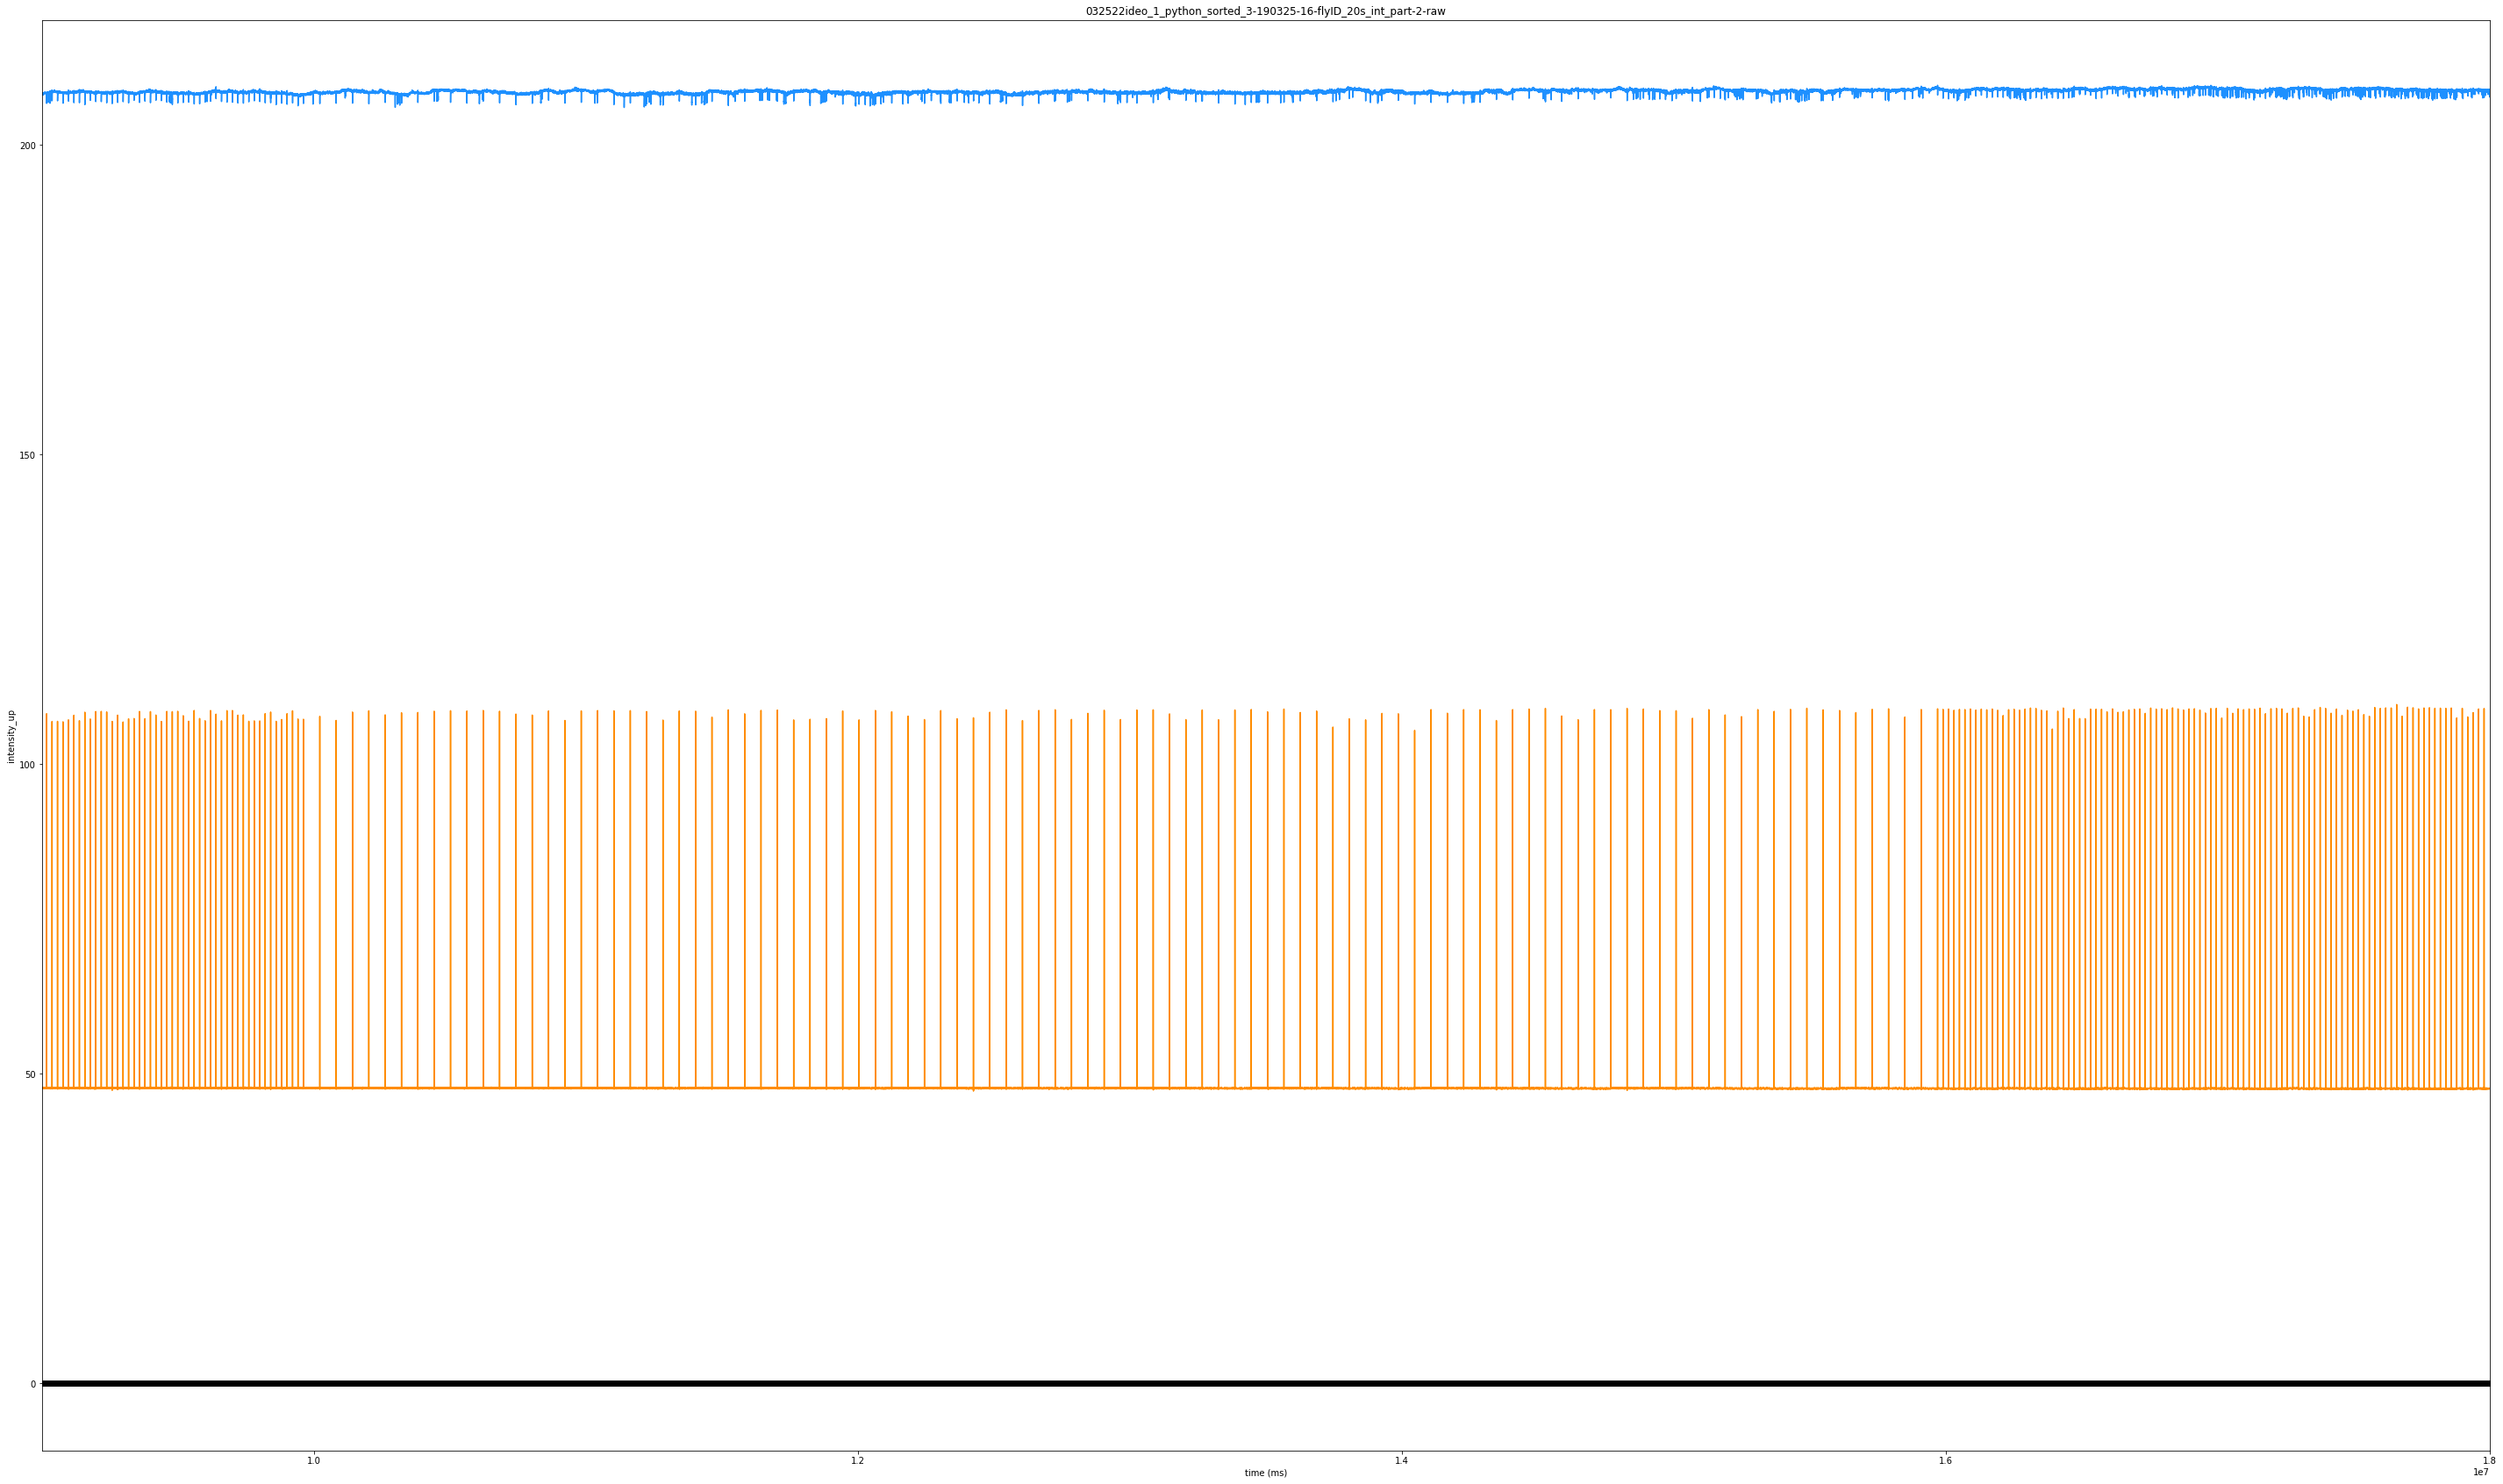

folder there


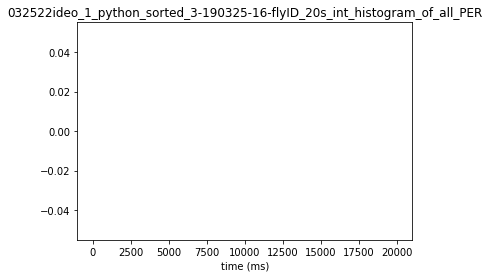

folder there
folder there
('first per time', array([], dtype=float64))


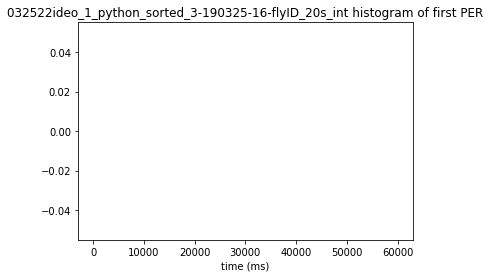

folder there
folder there


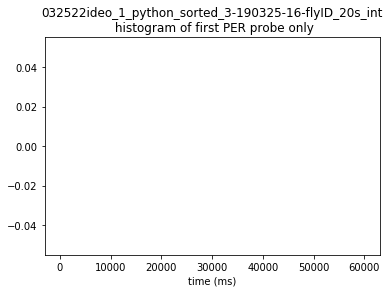

folder there
folder there


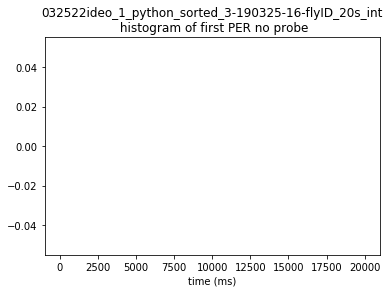

folder there
folder there


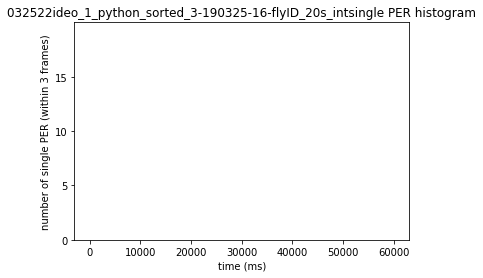

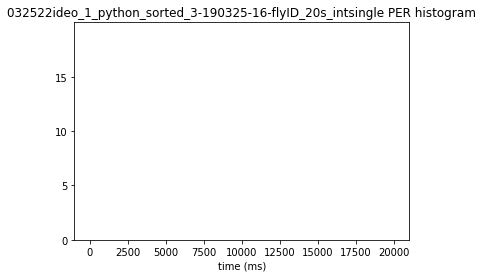

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

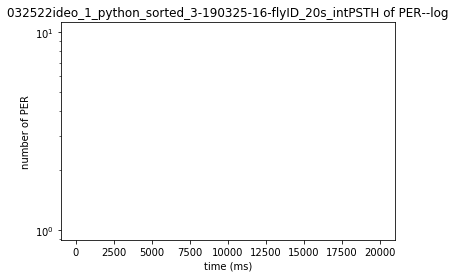

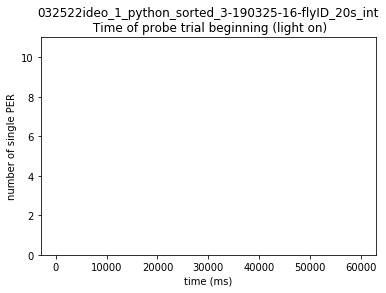

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

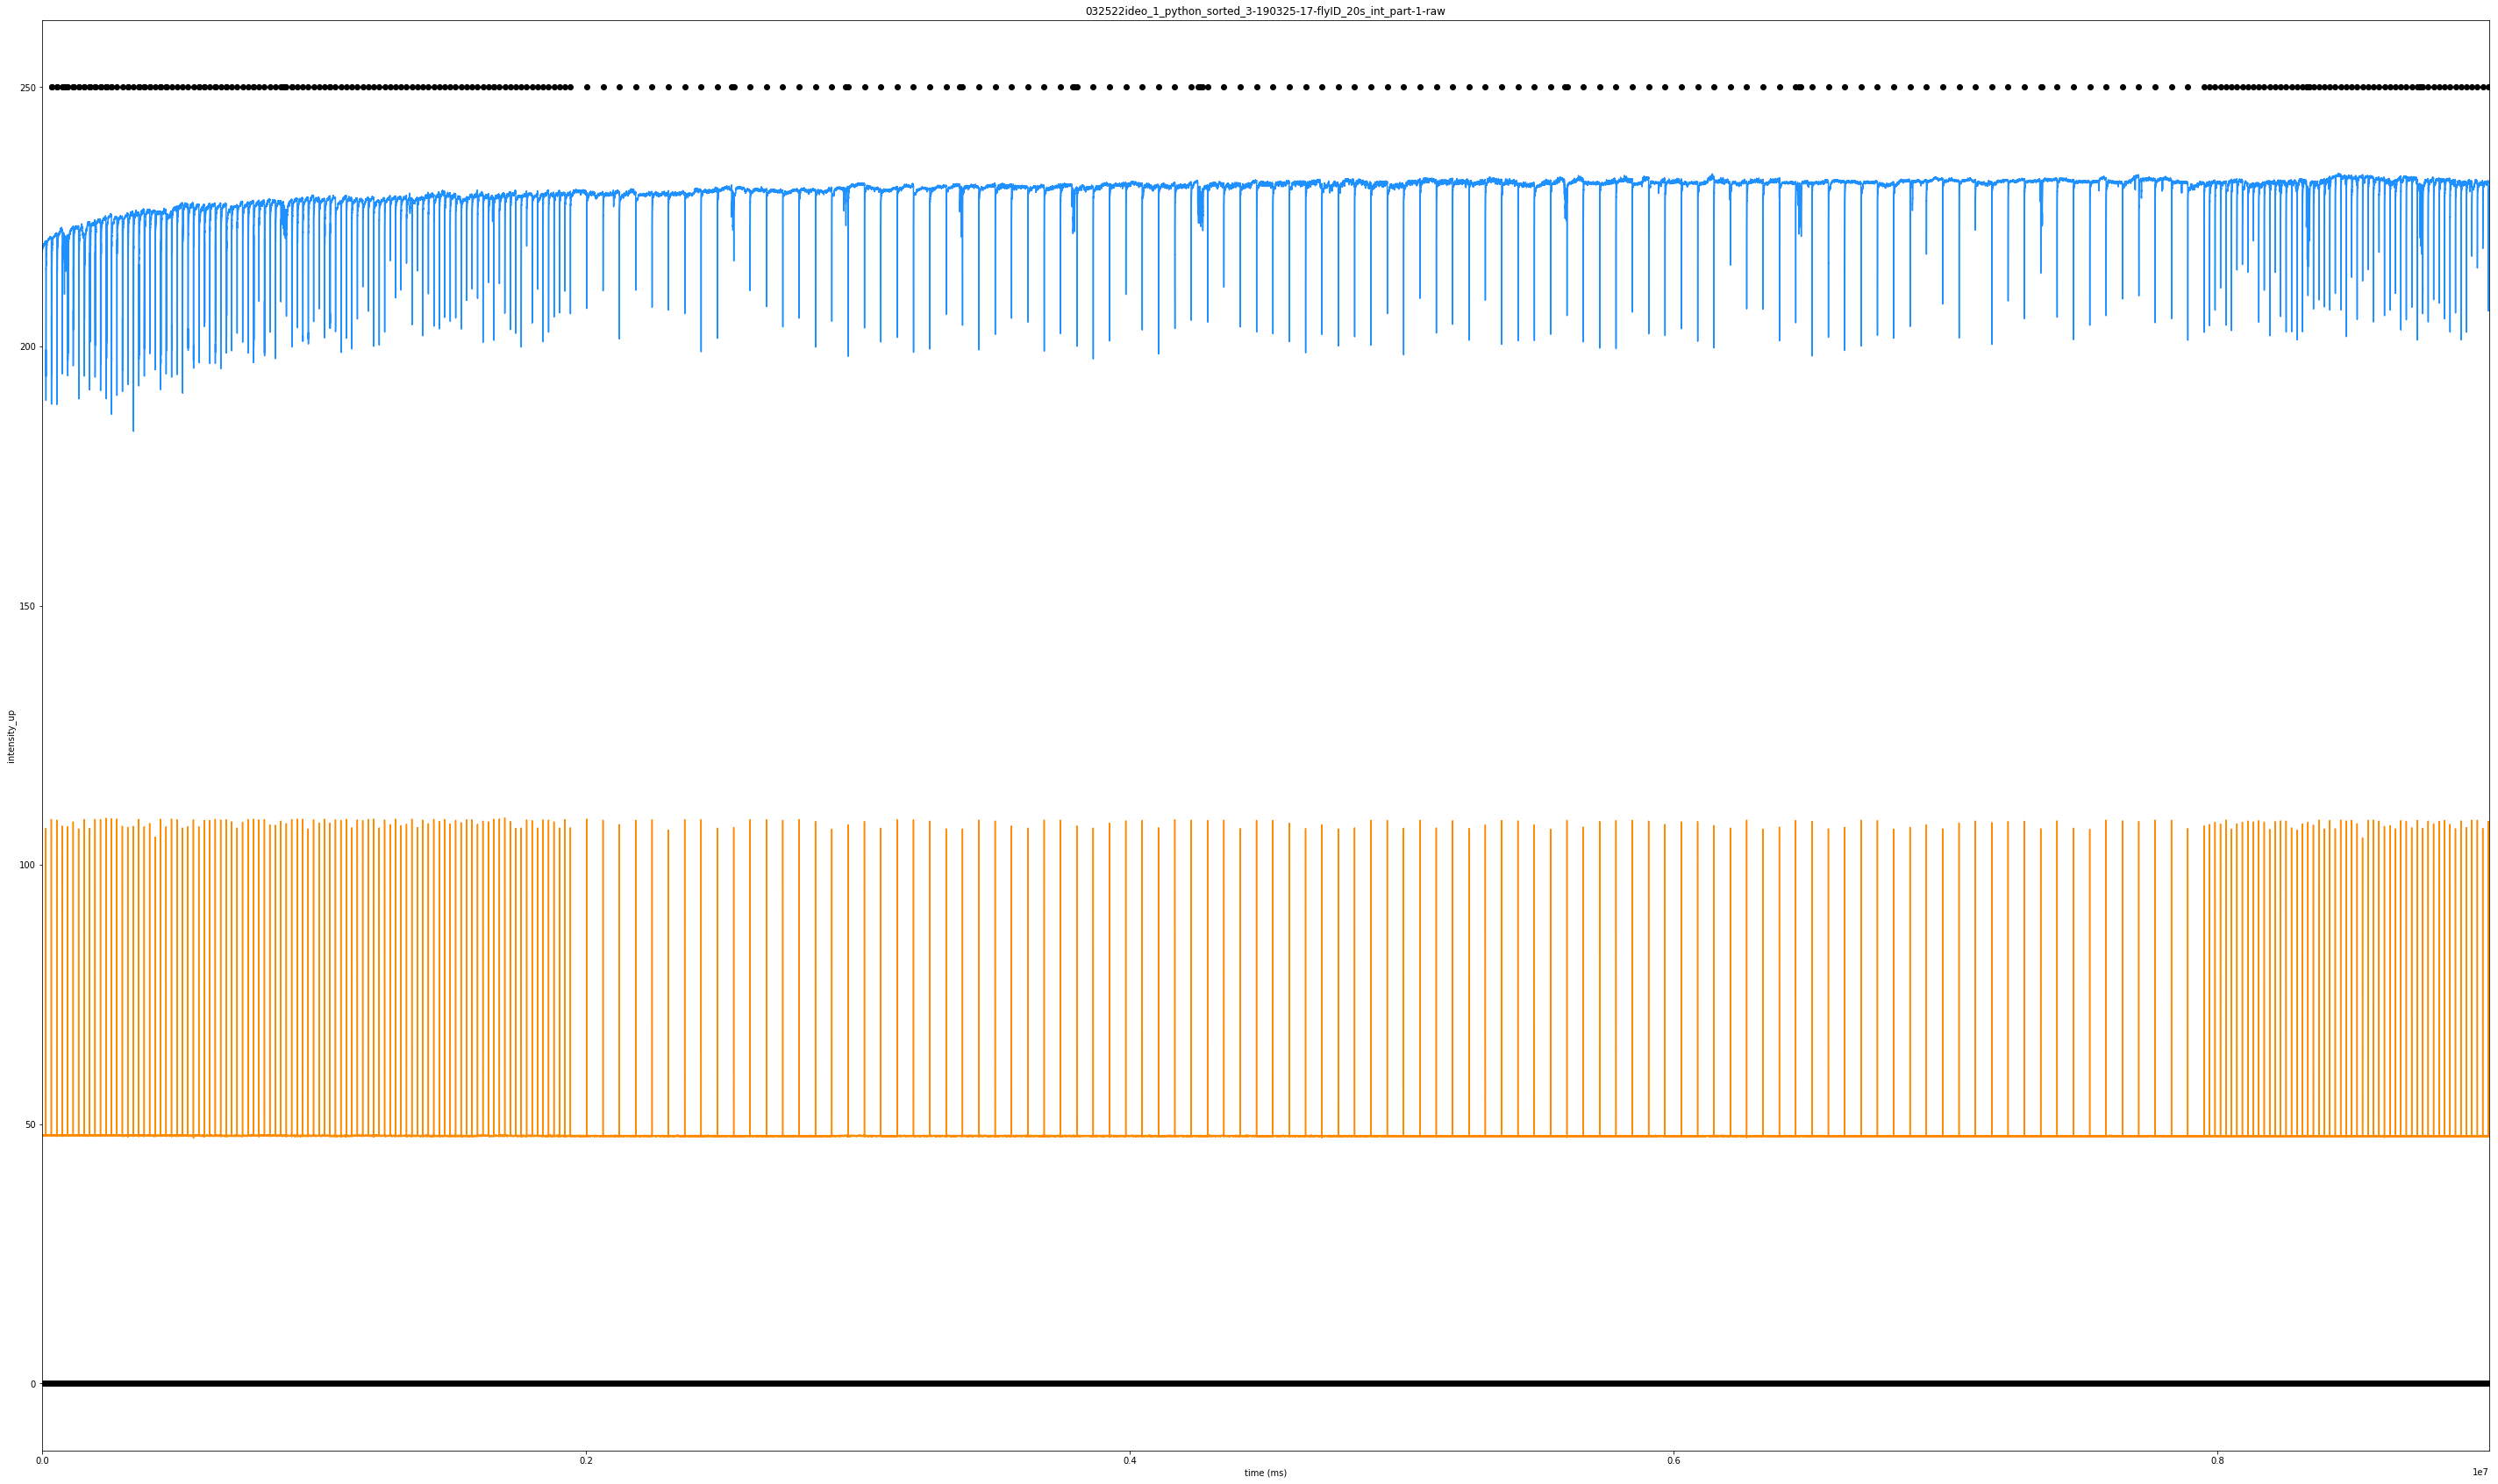

folder there
part-2-raw0325-17


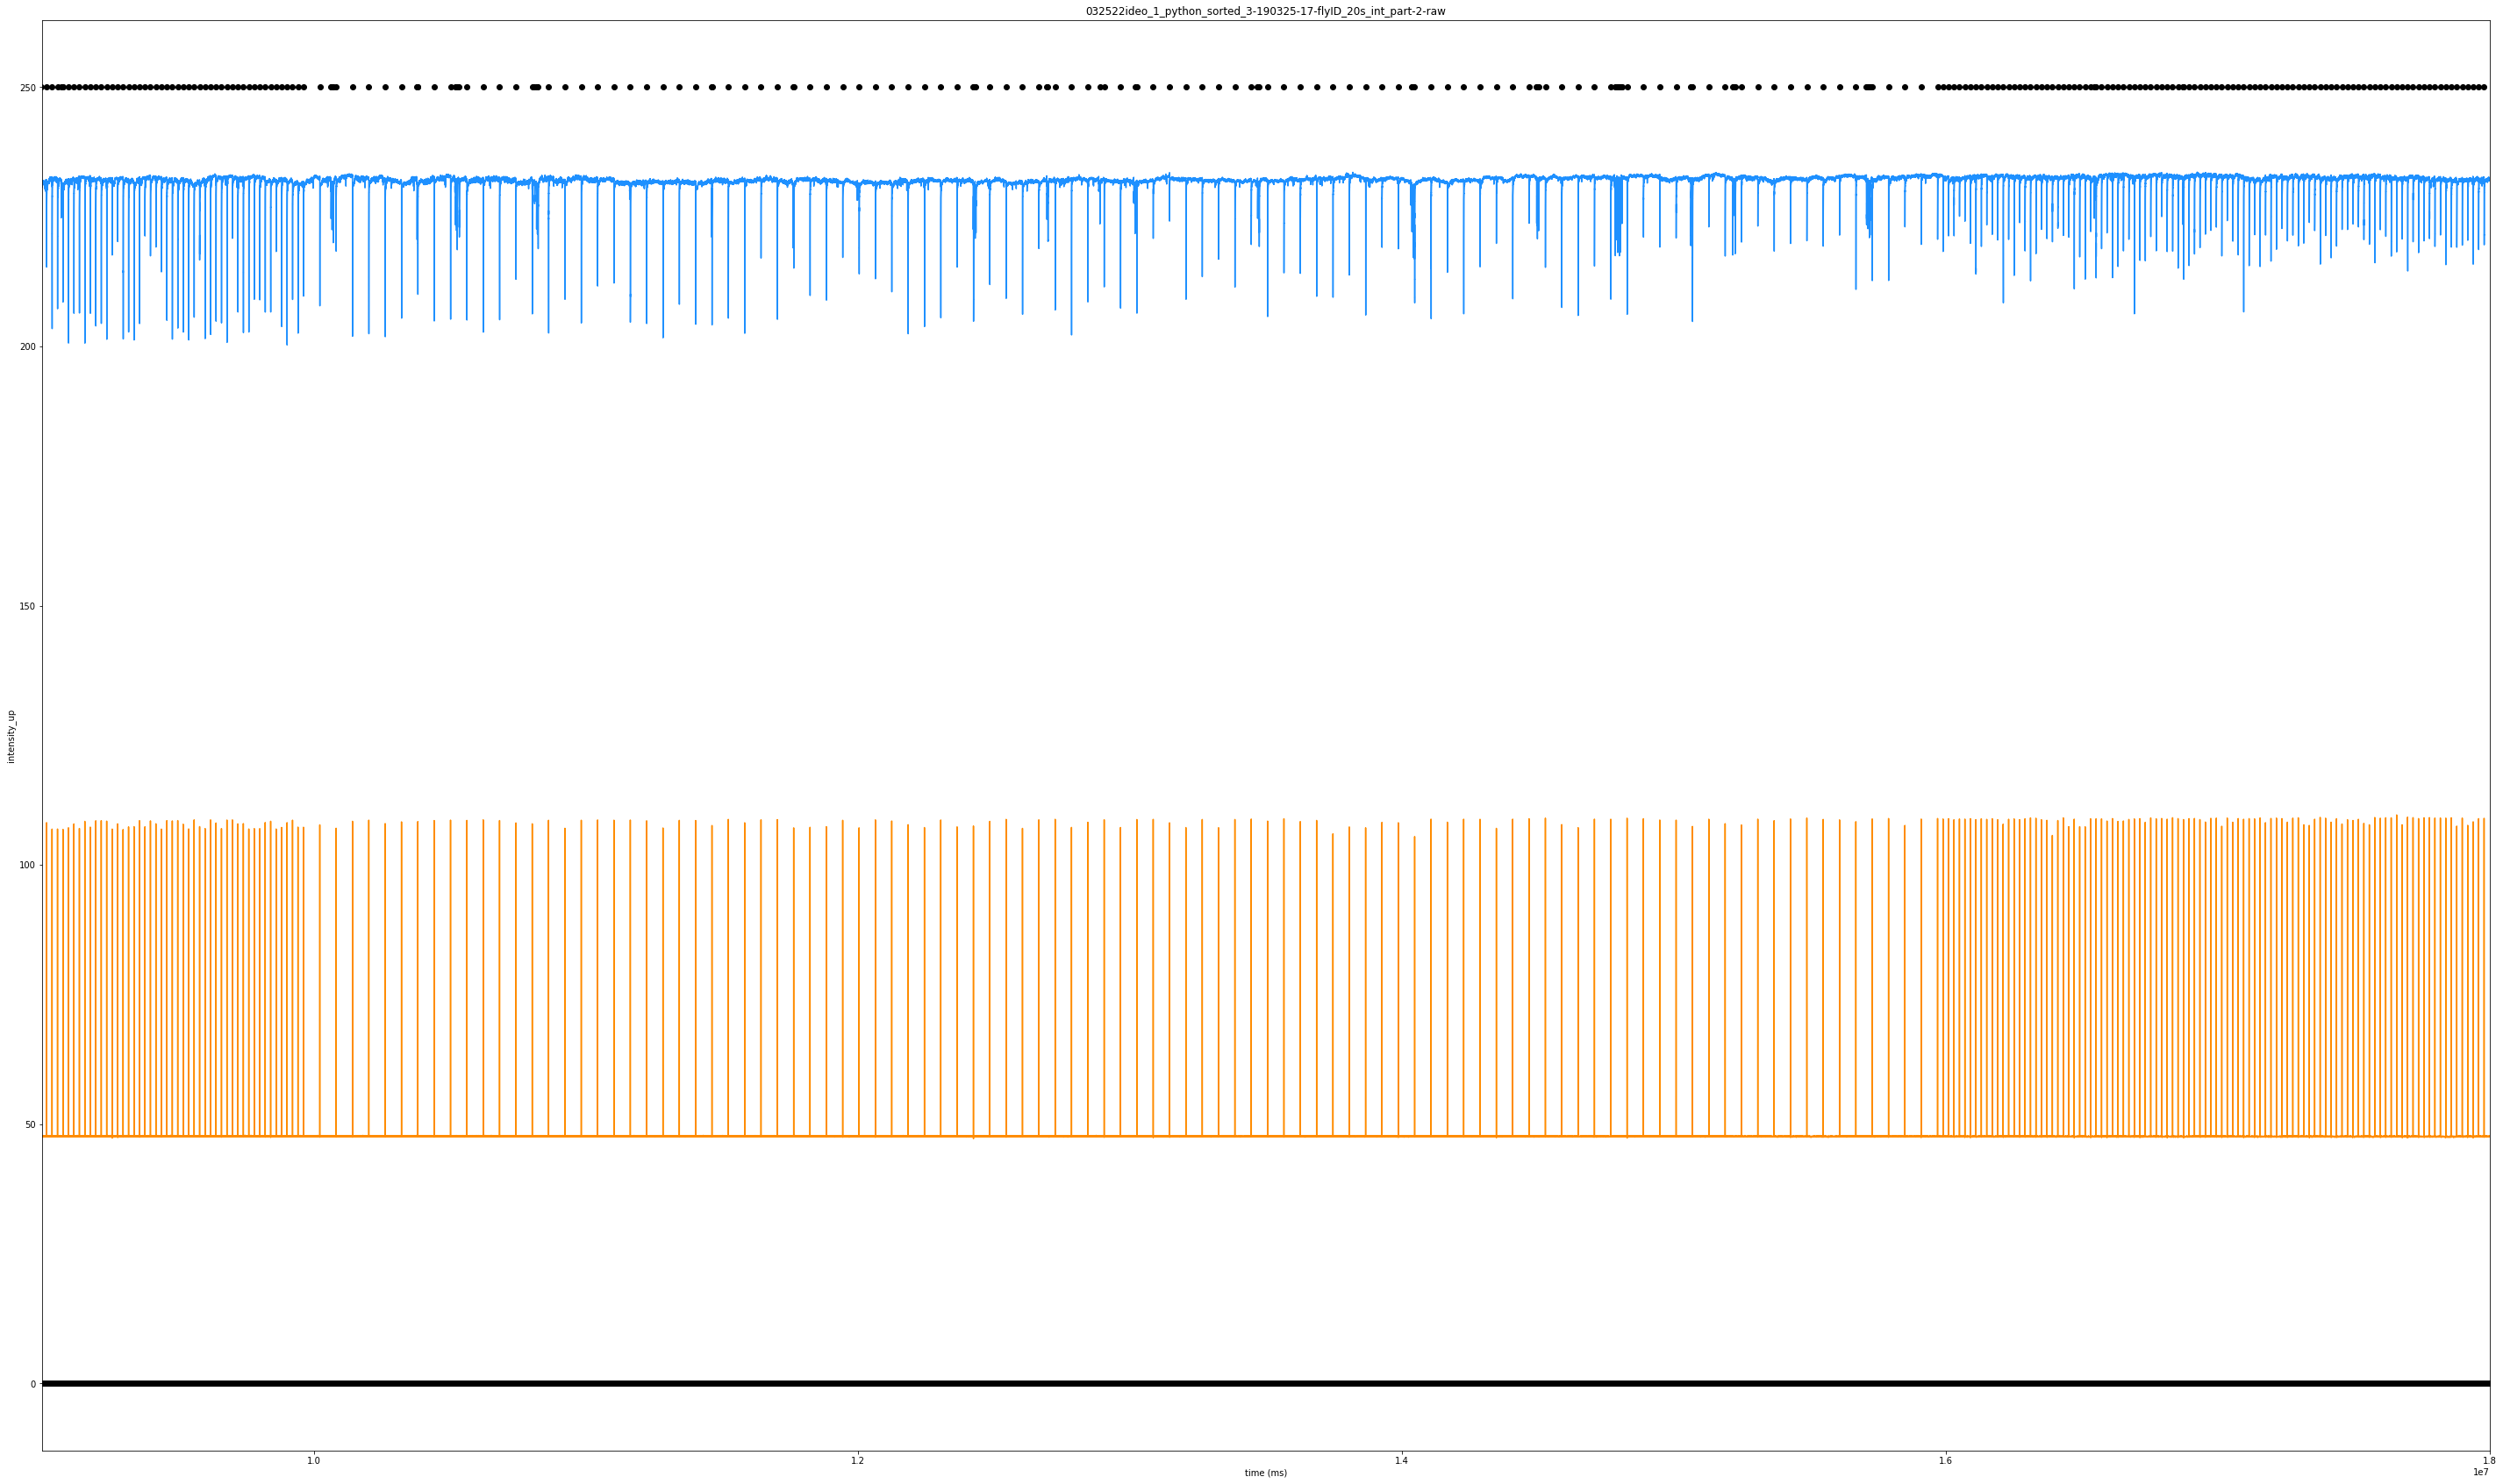

folder there


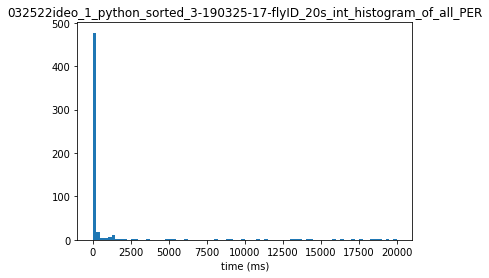

folder there
folder there
('first per time', array([ 1320,  4950,  1353,  1023,  1221,  1254,  2178,  1947,  1353,
        1452,  1254,  1320,  1122,  1353,  1320,  1056,  1551,  1089,
        1452,  1122,  9042,  1221, 18810, 52239, 51678, 49830, 45771,
       26499, 52899, 11352,  5247, 14421,  2706,  9933, 13530, 41316,
       57024, 18315,  8811, 58542, 57354, 59235,  6072, 29436, 44451,
       52965, 23331, 49863, 27852, 16335, 53889, 27588, 38775, 13497,
       17622], dtype=int64))


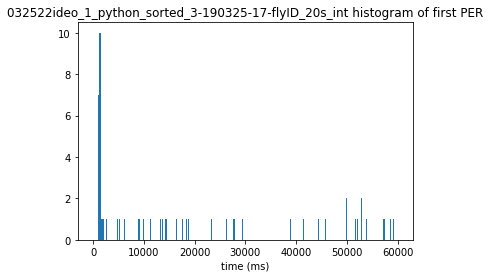

folder there
folder there


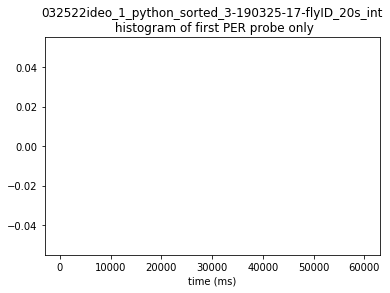

folder there
folder there


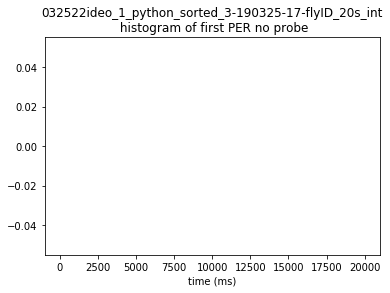

folder there
folder there


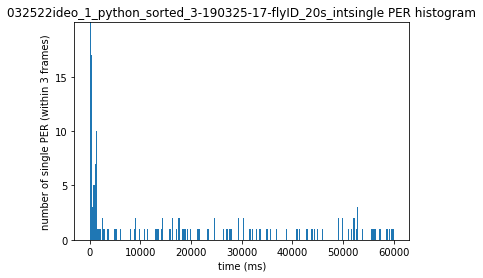

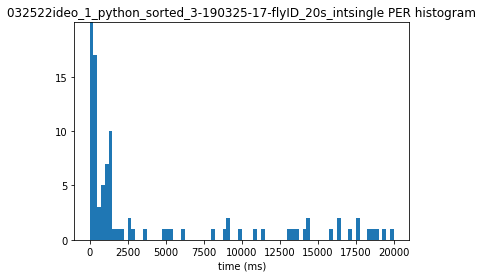

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

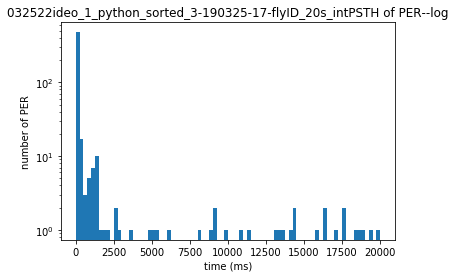

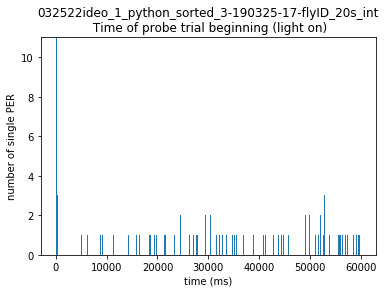

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

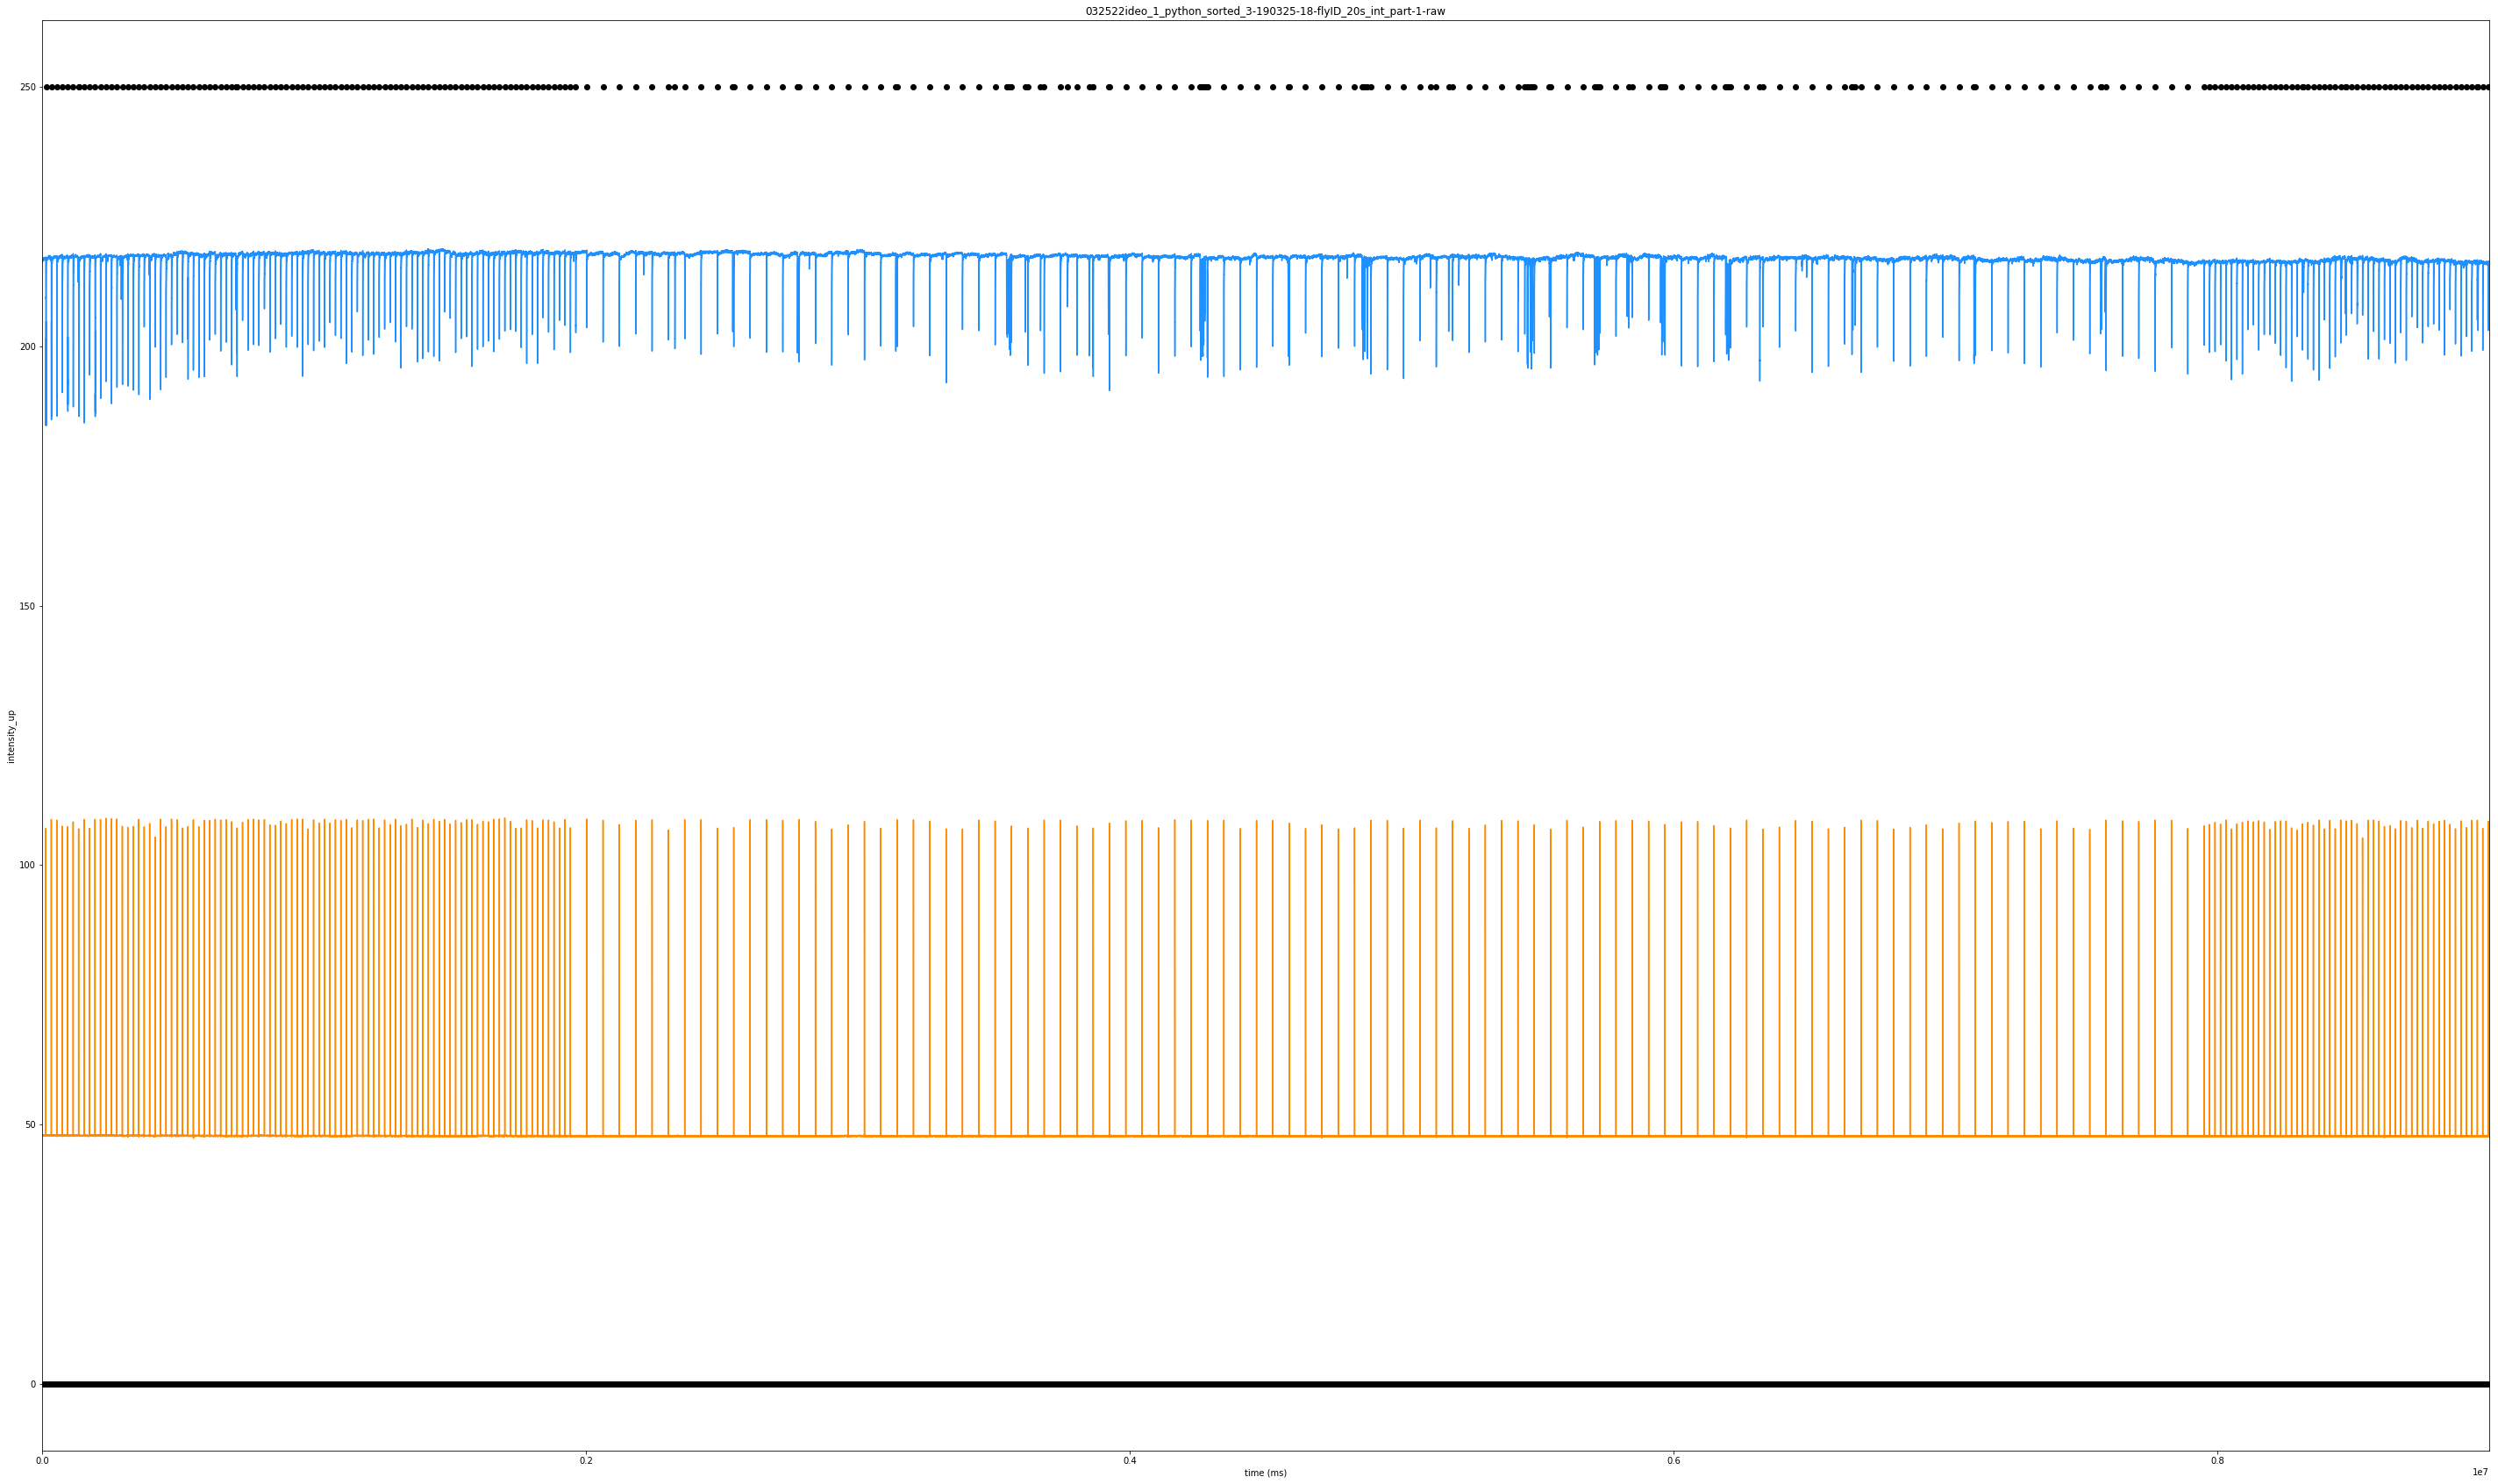

folder there
part-2-raw0325-18


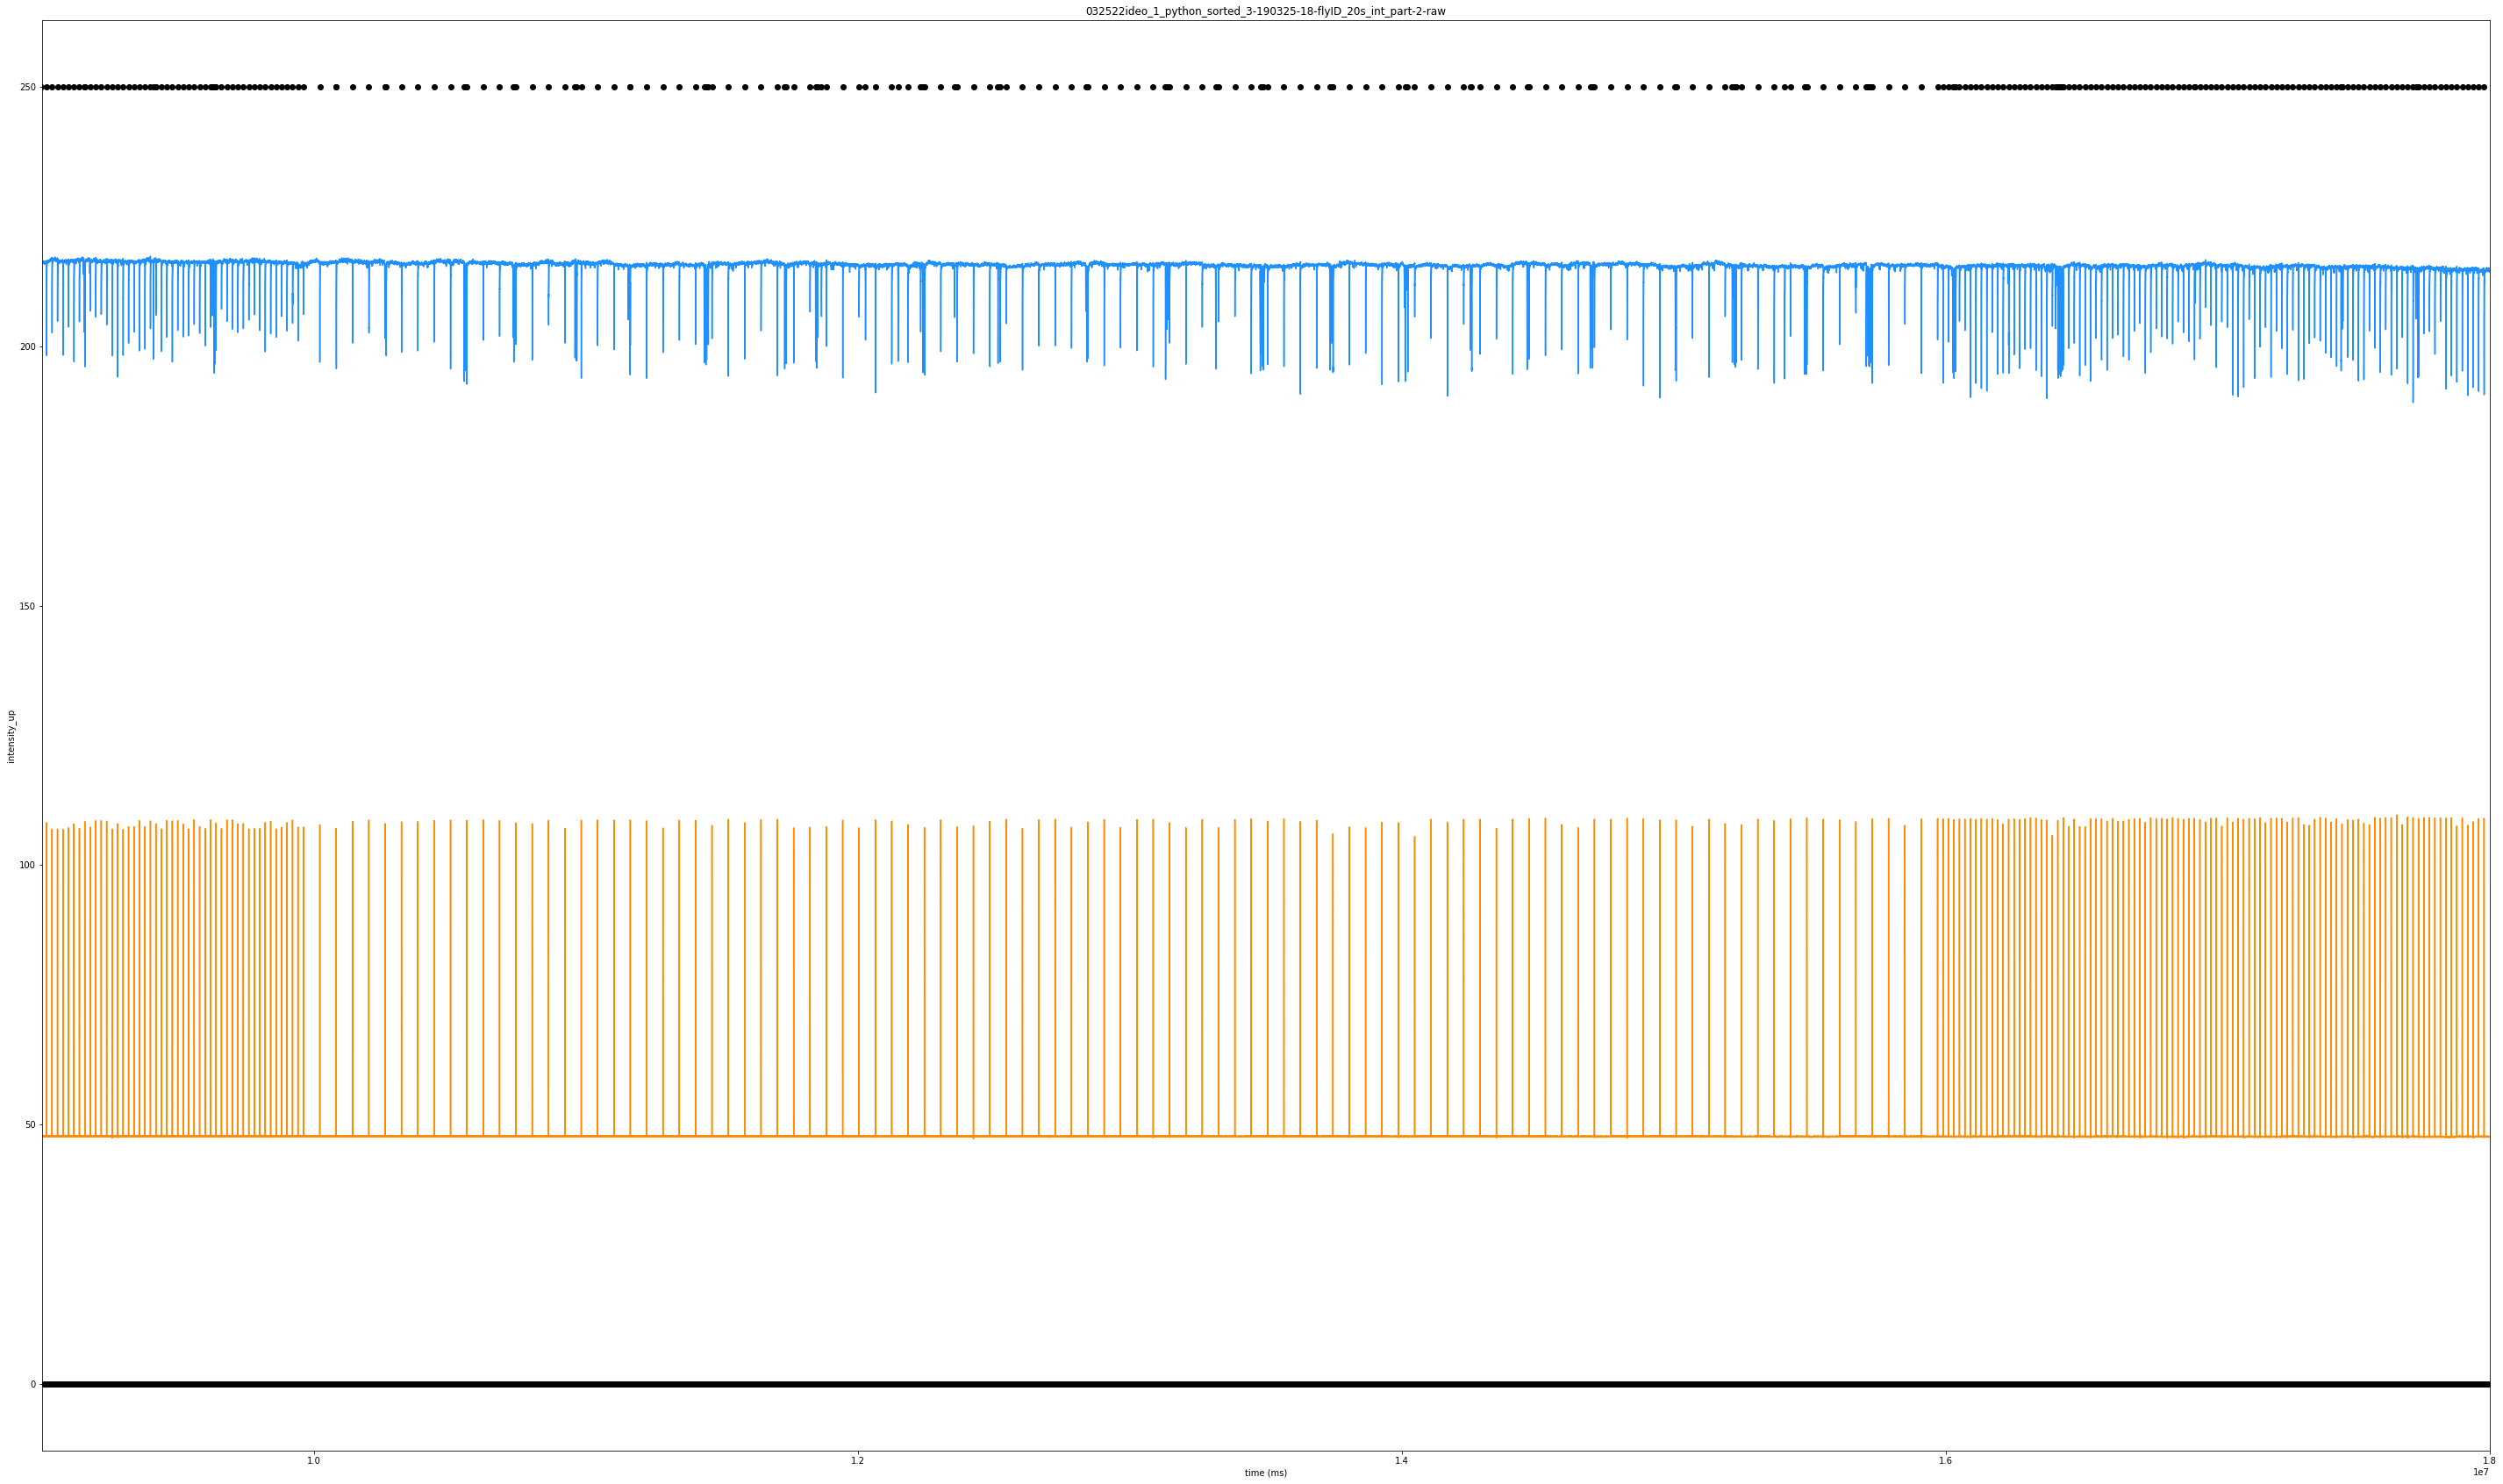

folder there


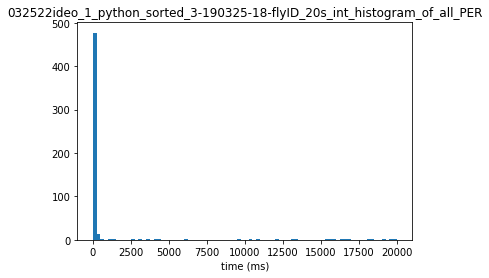

folder there
folder there
('first per time', array([ 1188, 15444, 19800, 23760, 56265, 54087, 55044, 42372, 50094,
       46695, 25938, 45177, 55803, 32637, 56562, 27918, 37884, 45639,
       25014, 55143, 41580, 47058, 43725, 42834, 48213, 26499, 54747,
       40755,  4257, 16632,  2541, 16830, 10791,  6006, 59136,  3696,
       49434, 49797, 36993, 58872, 31614, 26631, 20526, 23463, 23331,
       45903, 49698, 29997, 52800, 45375, 49467, 33462, 48741, 25014,
       24651, 52932, 44517, 56925, 26169, 38280, 51216, 37983, 15312,
        6105, 12210,  1452,  2640, 16368,  3102, 10296], dtype=int64))


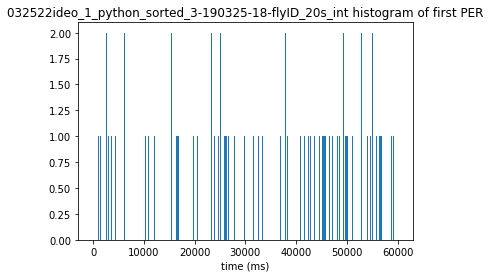

folder there
folder there


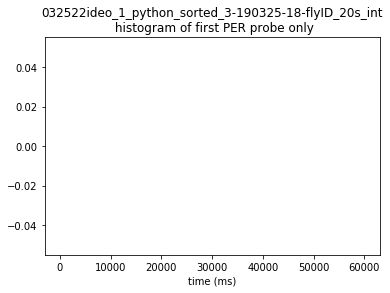

folder there
folder there


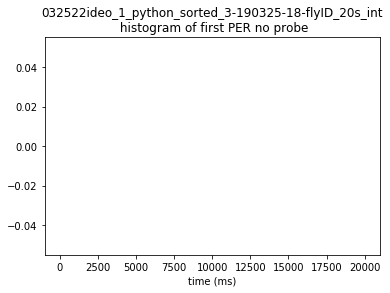

folder there
folder there


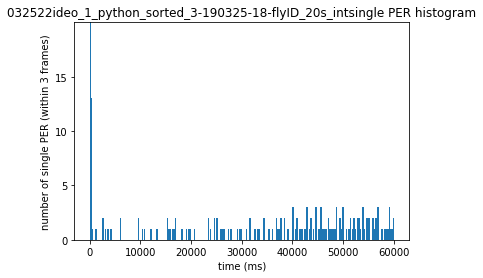

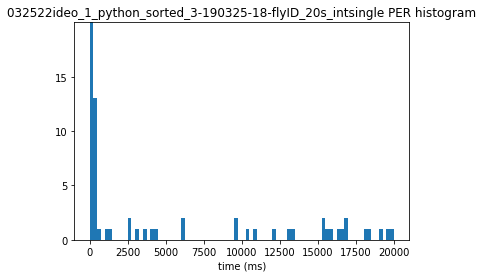

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

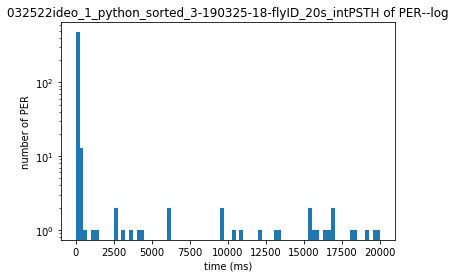

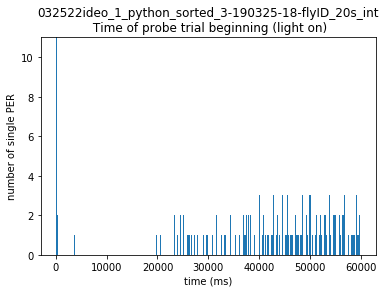

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

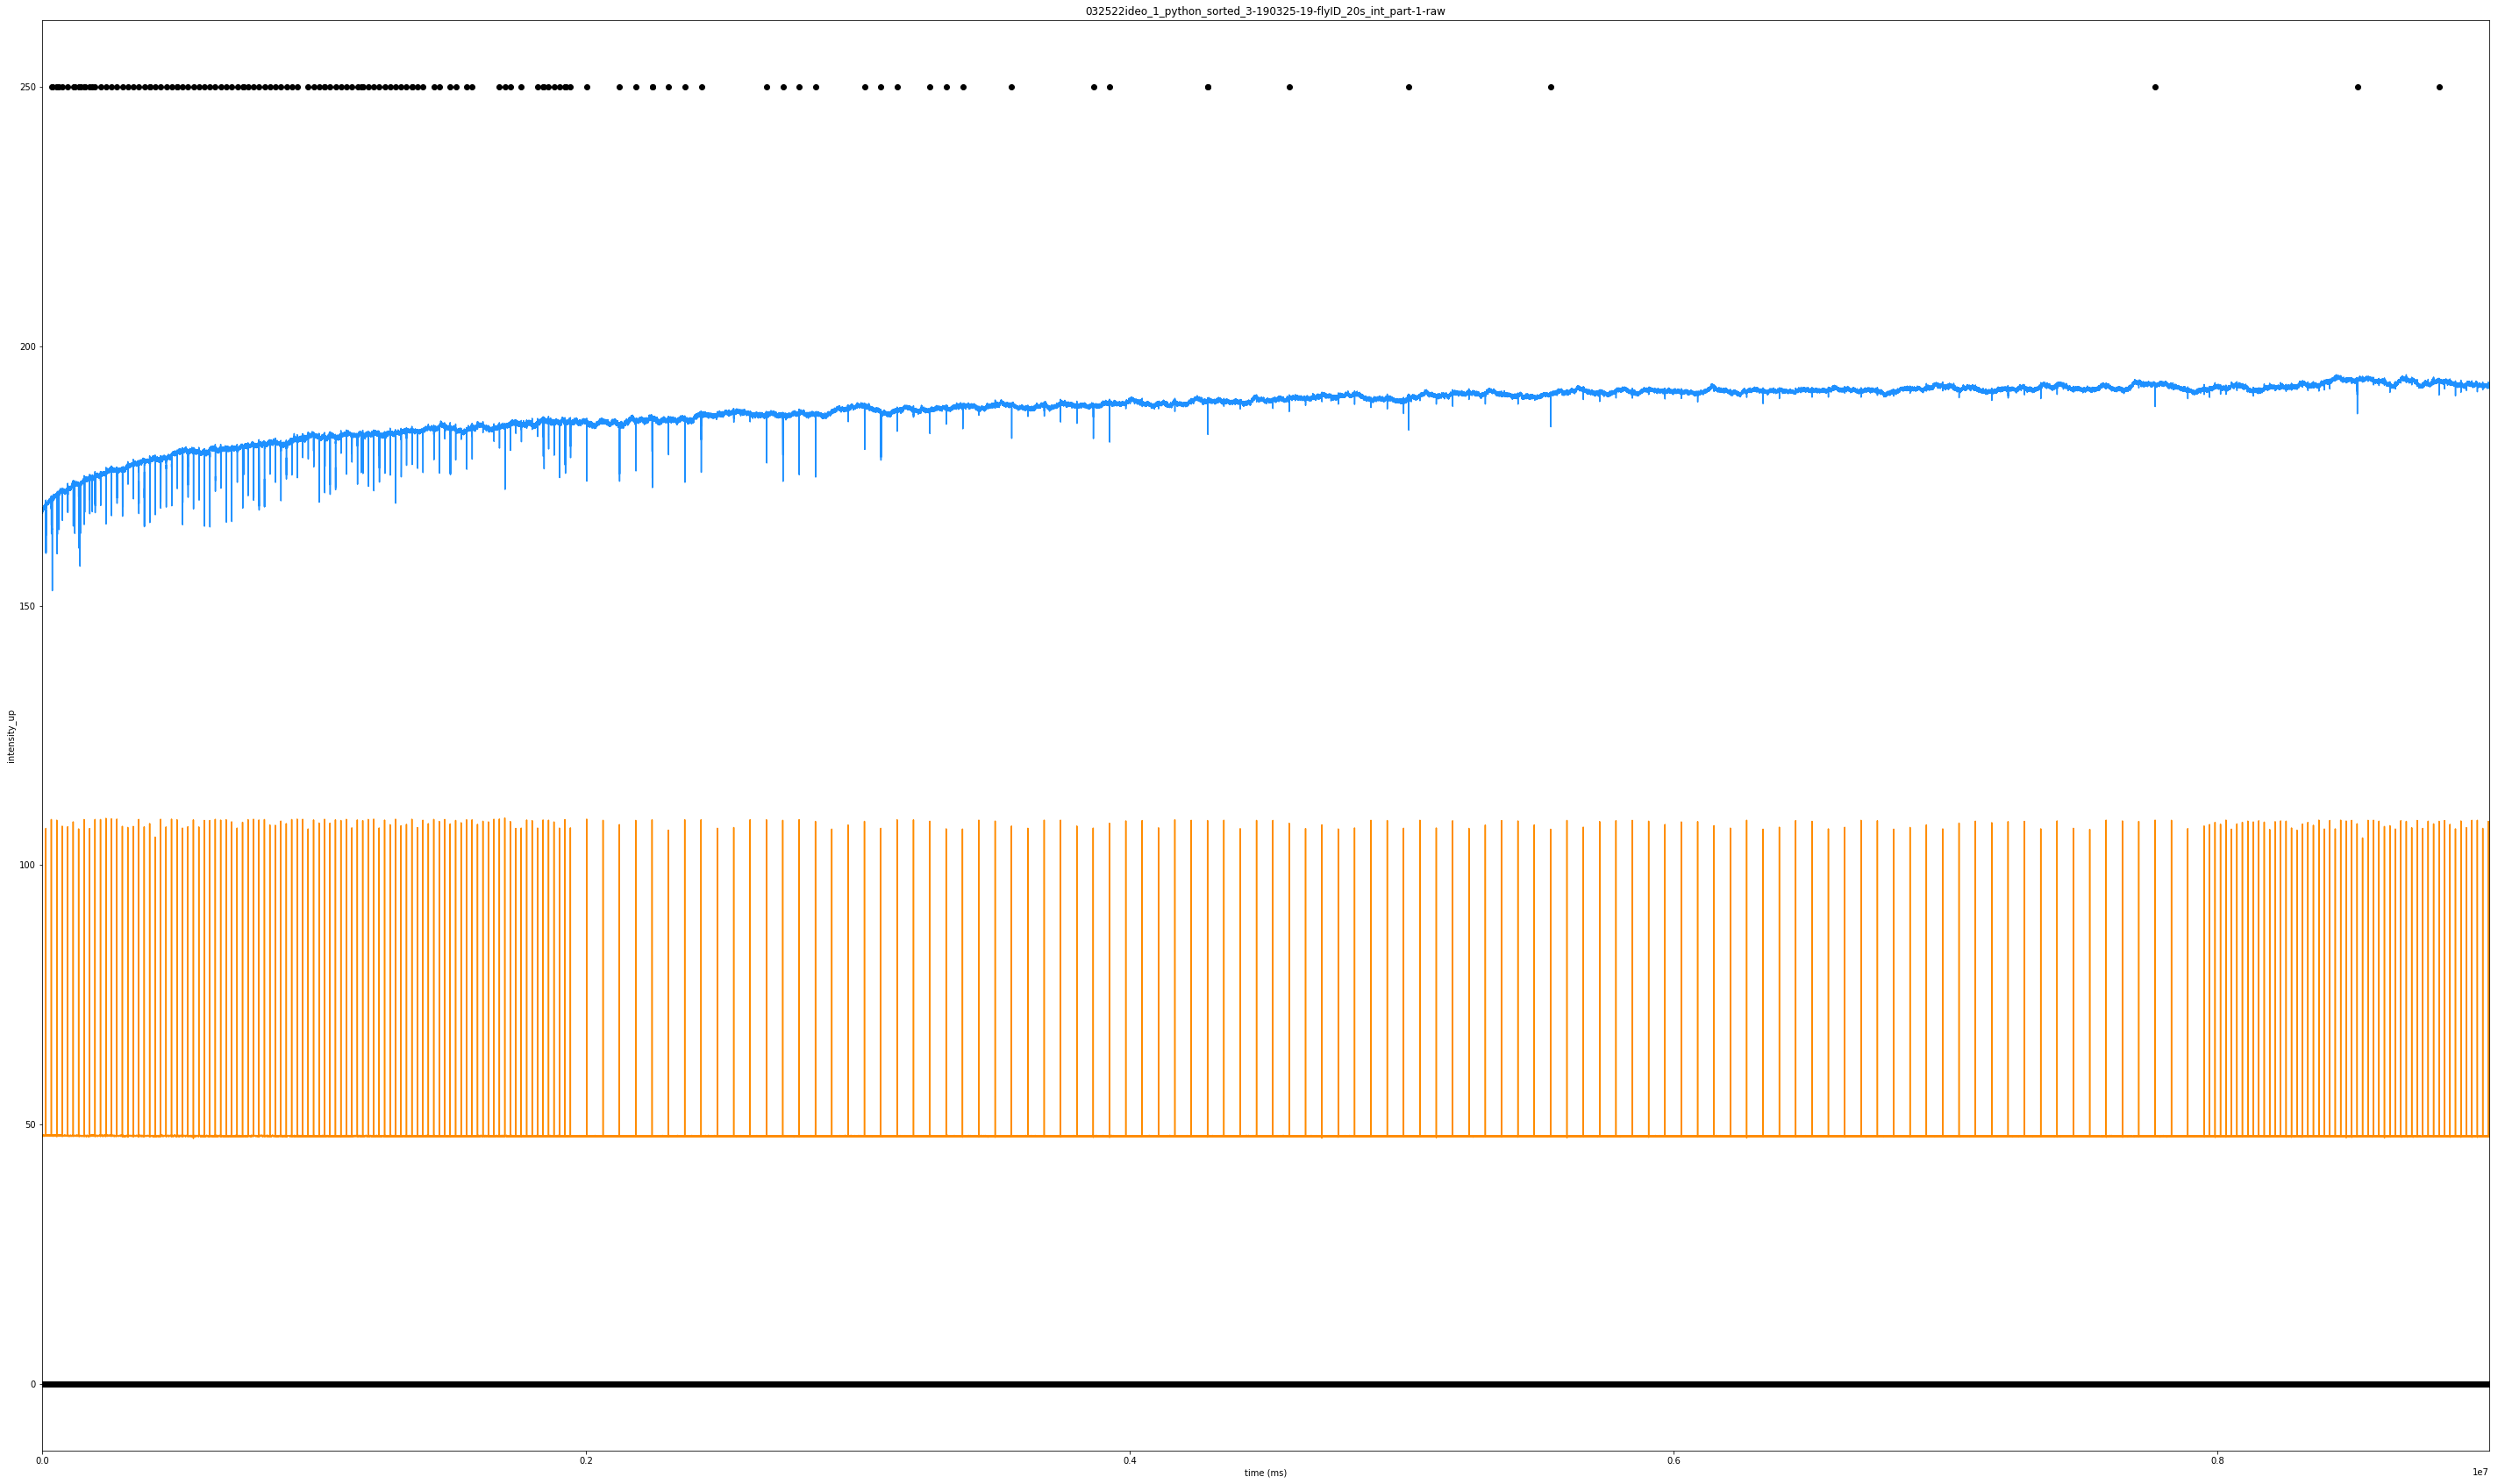

folder there
part-2-raw0325-19


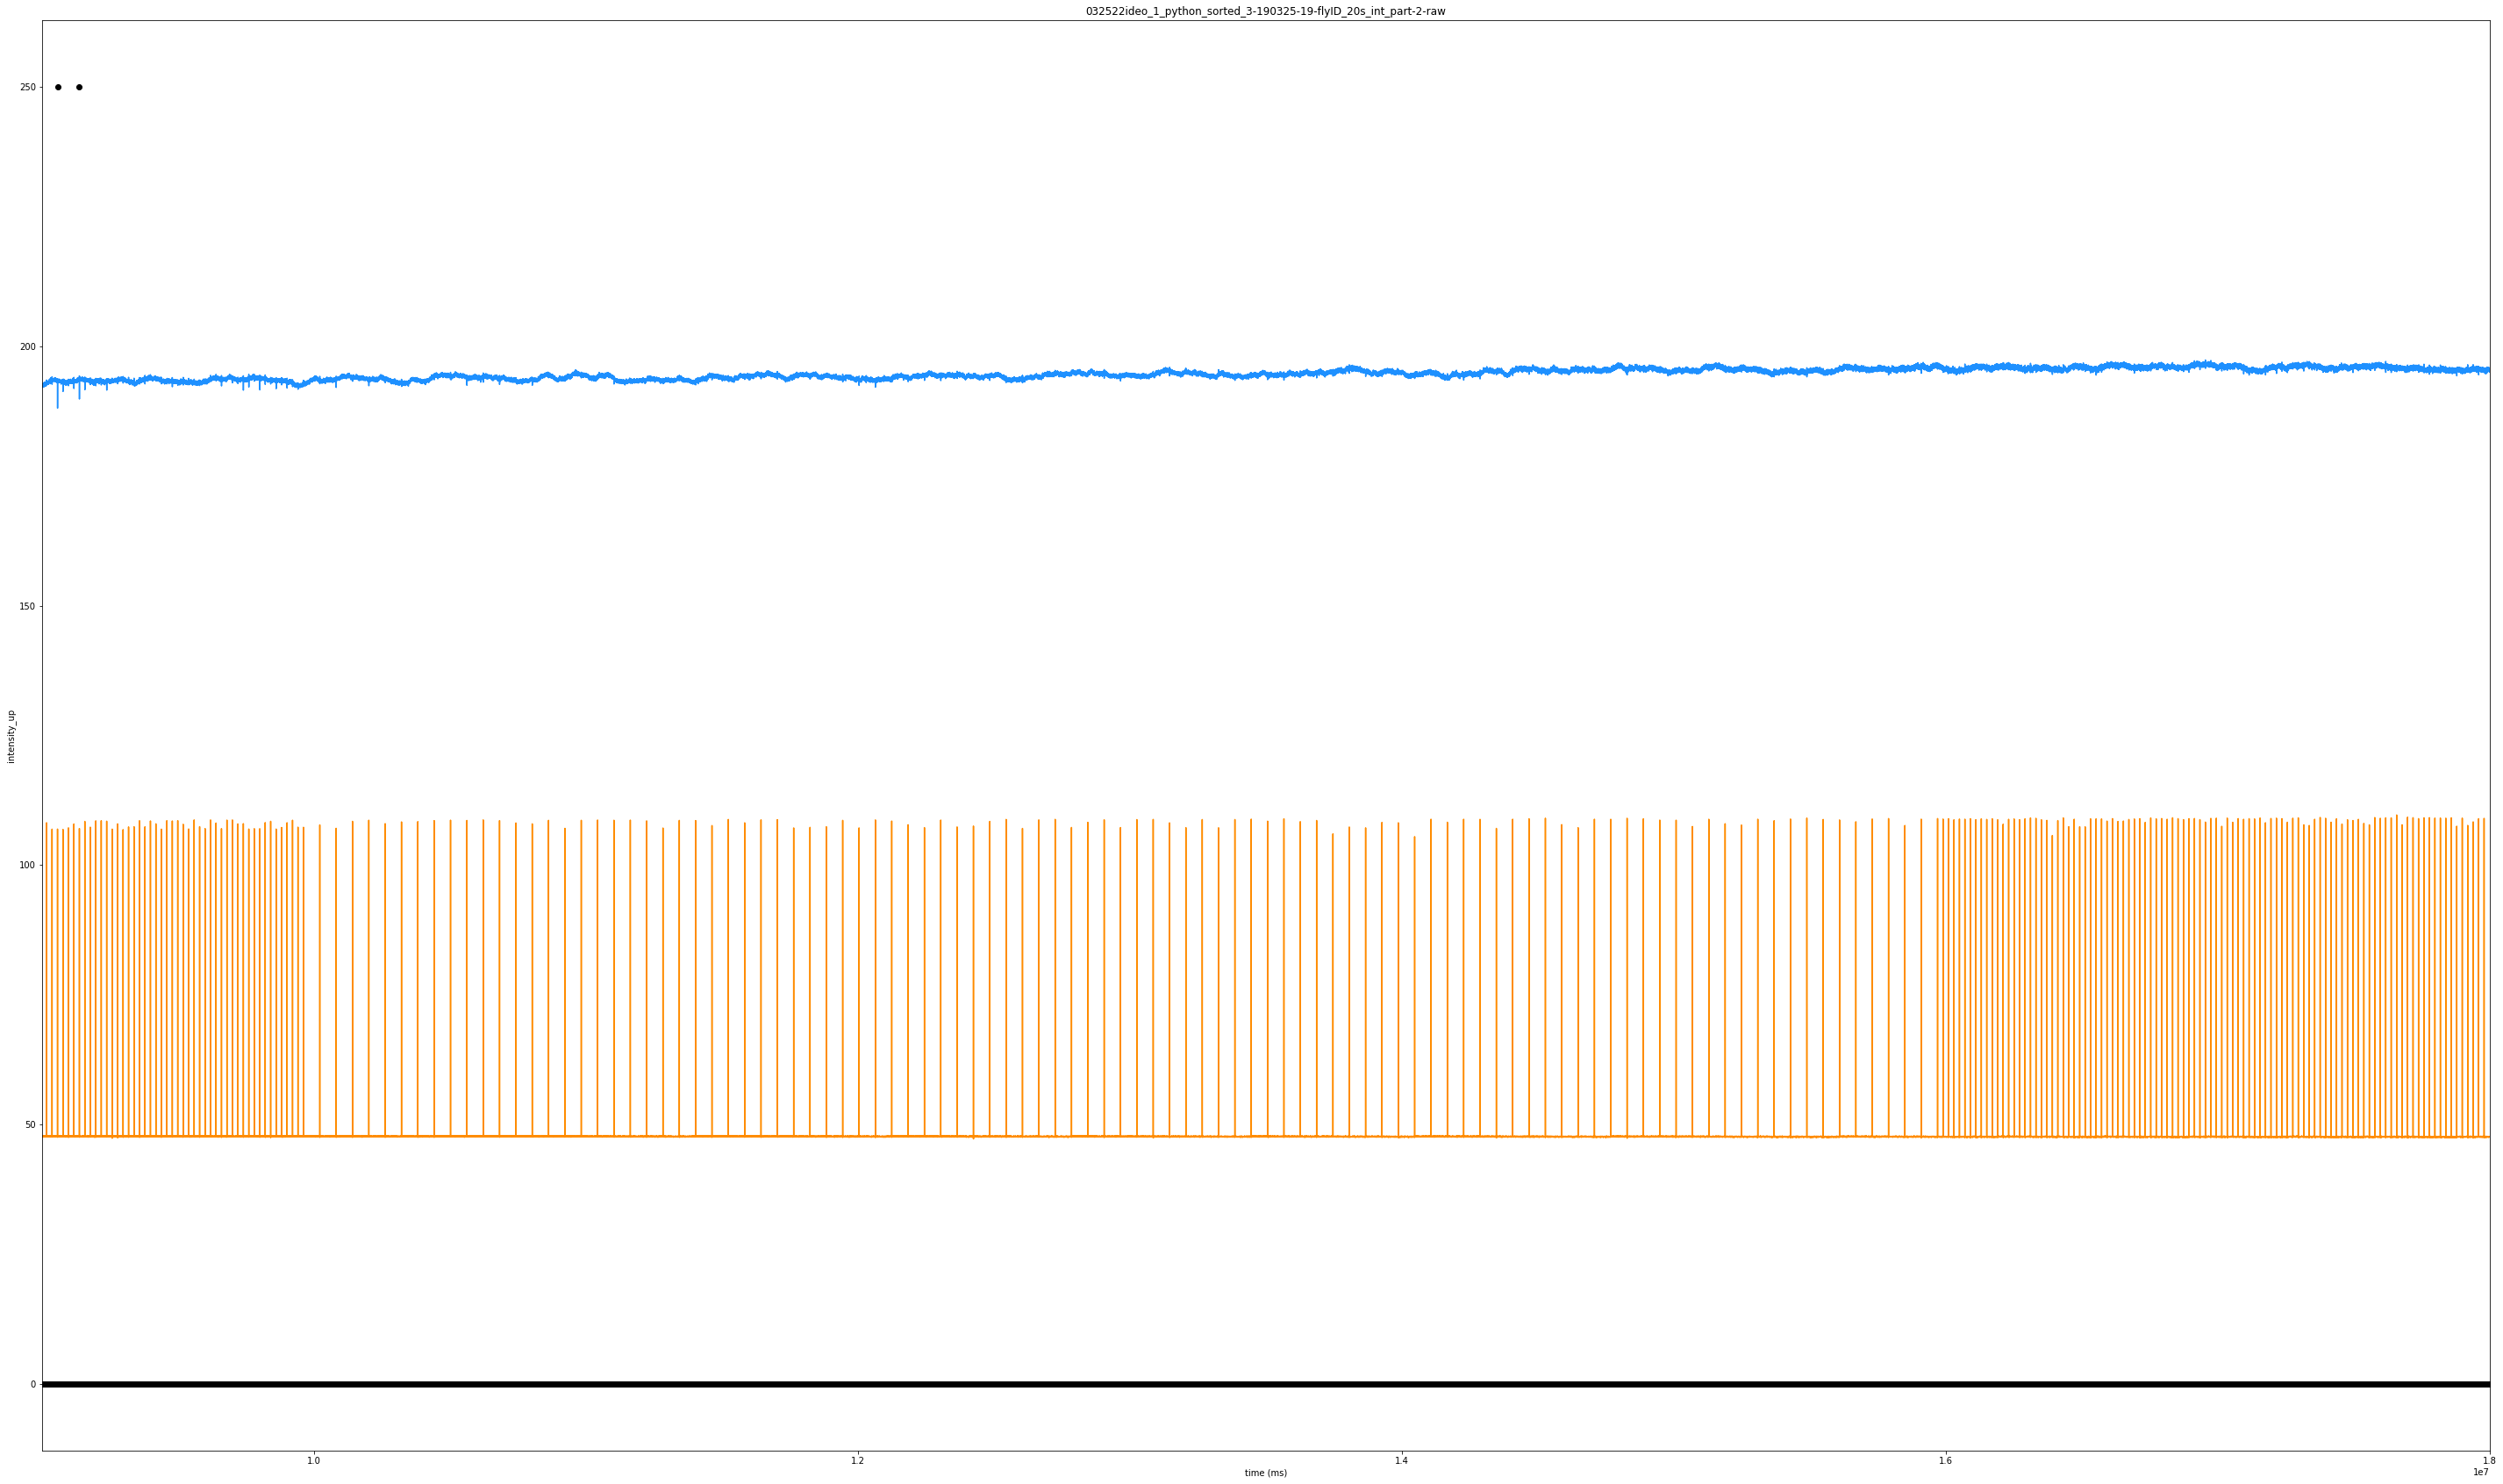

folder there


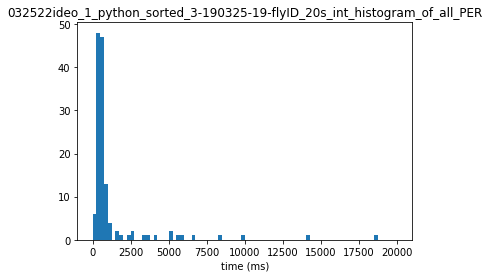

folder there
folder there
('first per time', array([ 3399,  1617,  5148,  4224,  2442,  9933,  5676,  1617, 14091,
        1122,  3729,  1980,  1056,  1188,  1023, 18612], dtype=int64))


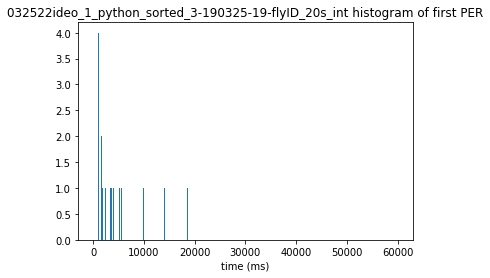

folder there
folder there


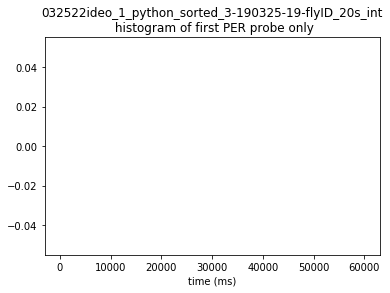

folder there
folder there


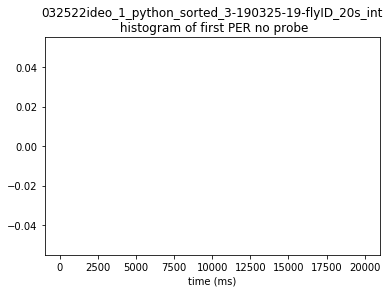

folder there
folder there


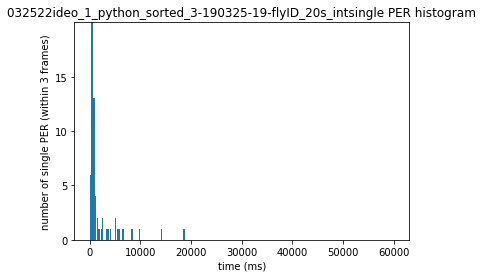

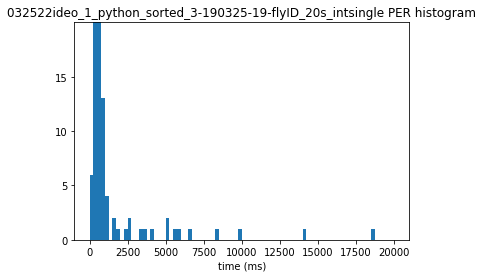

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

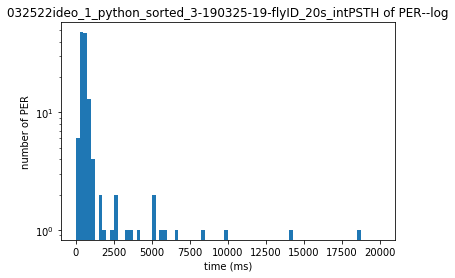

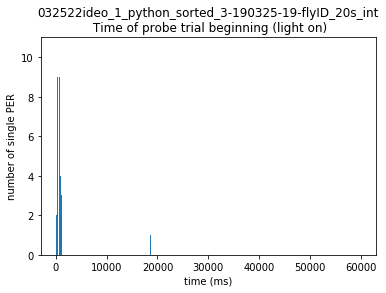

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

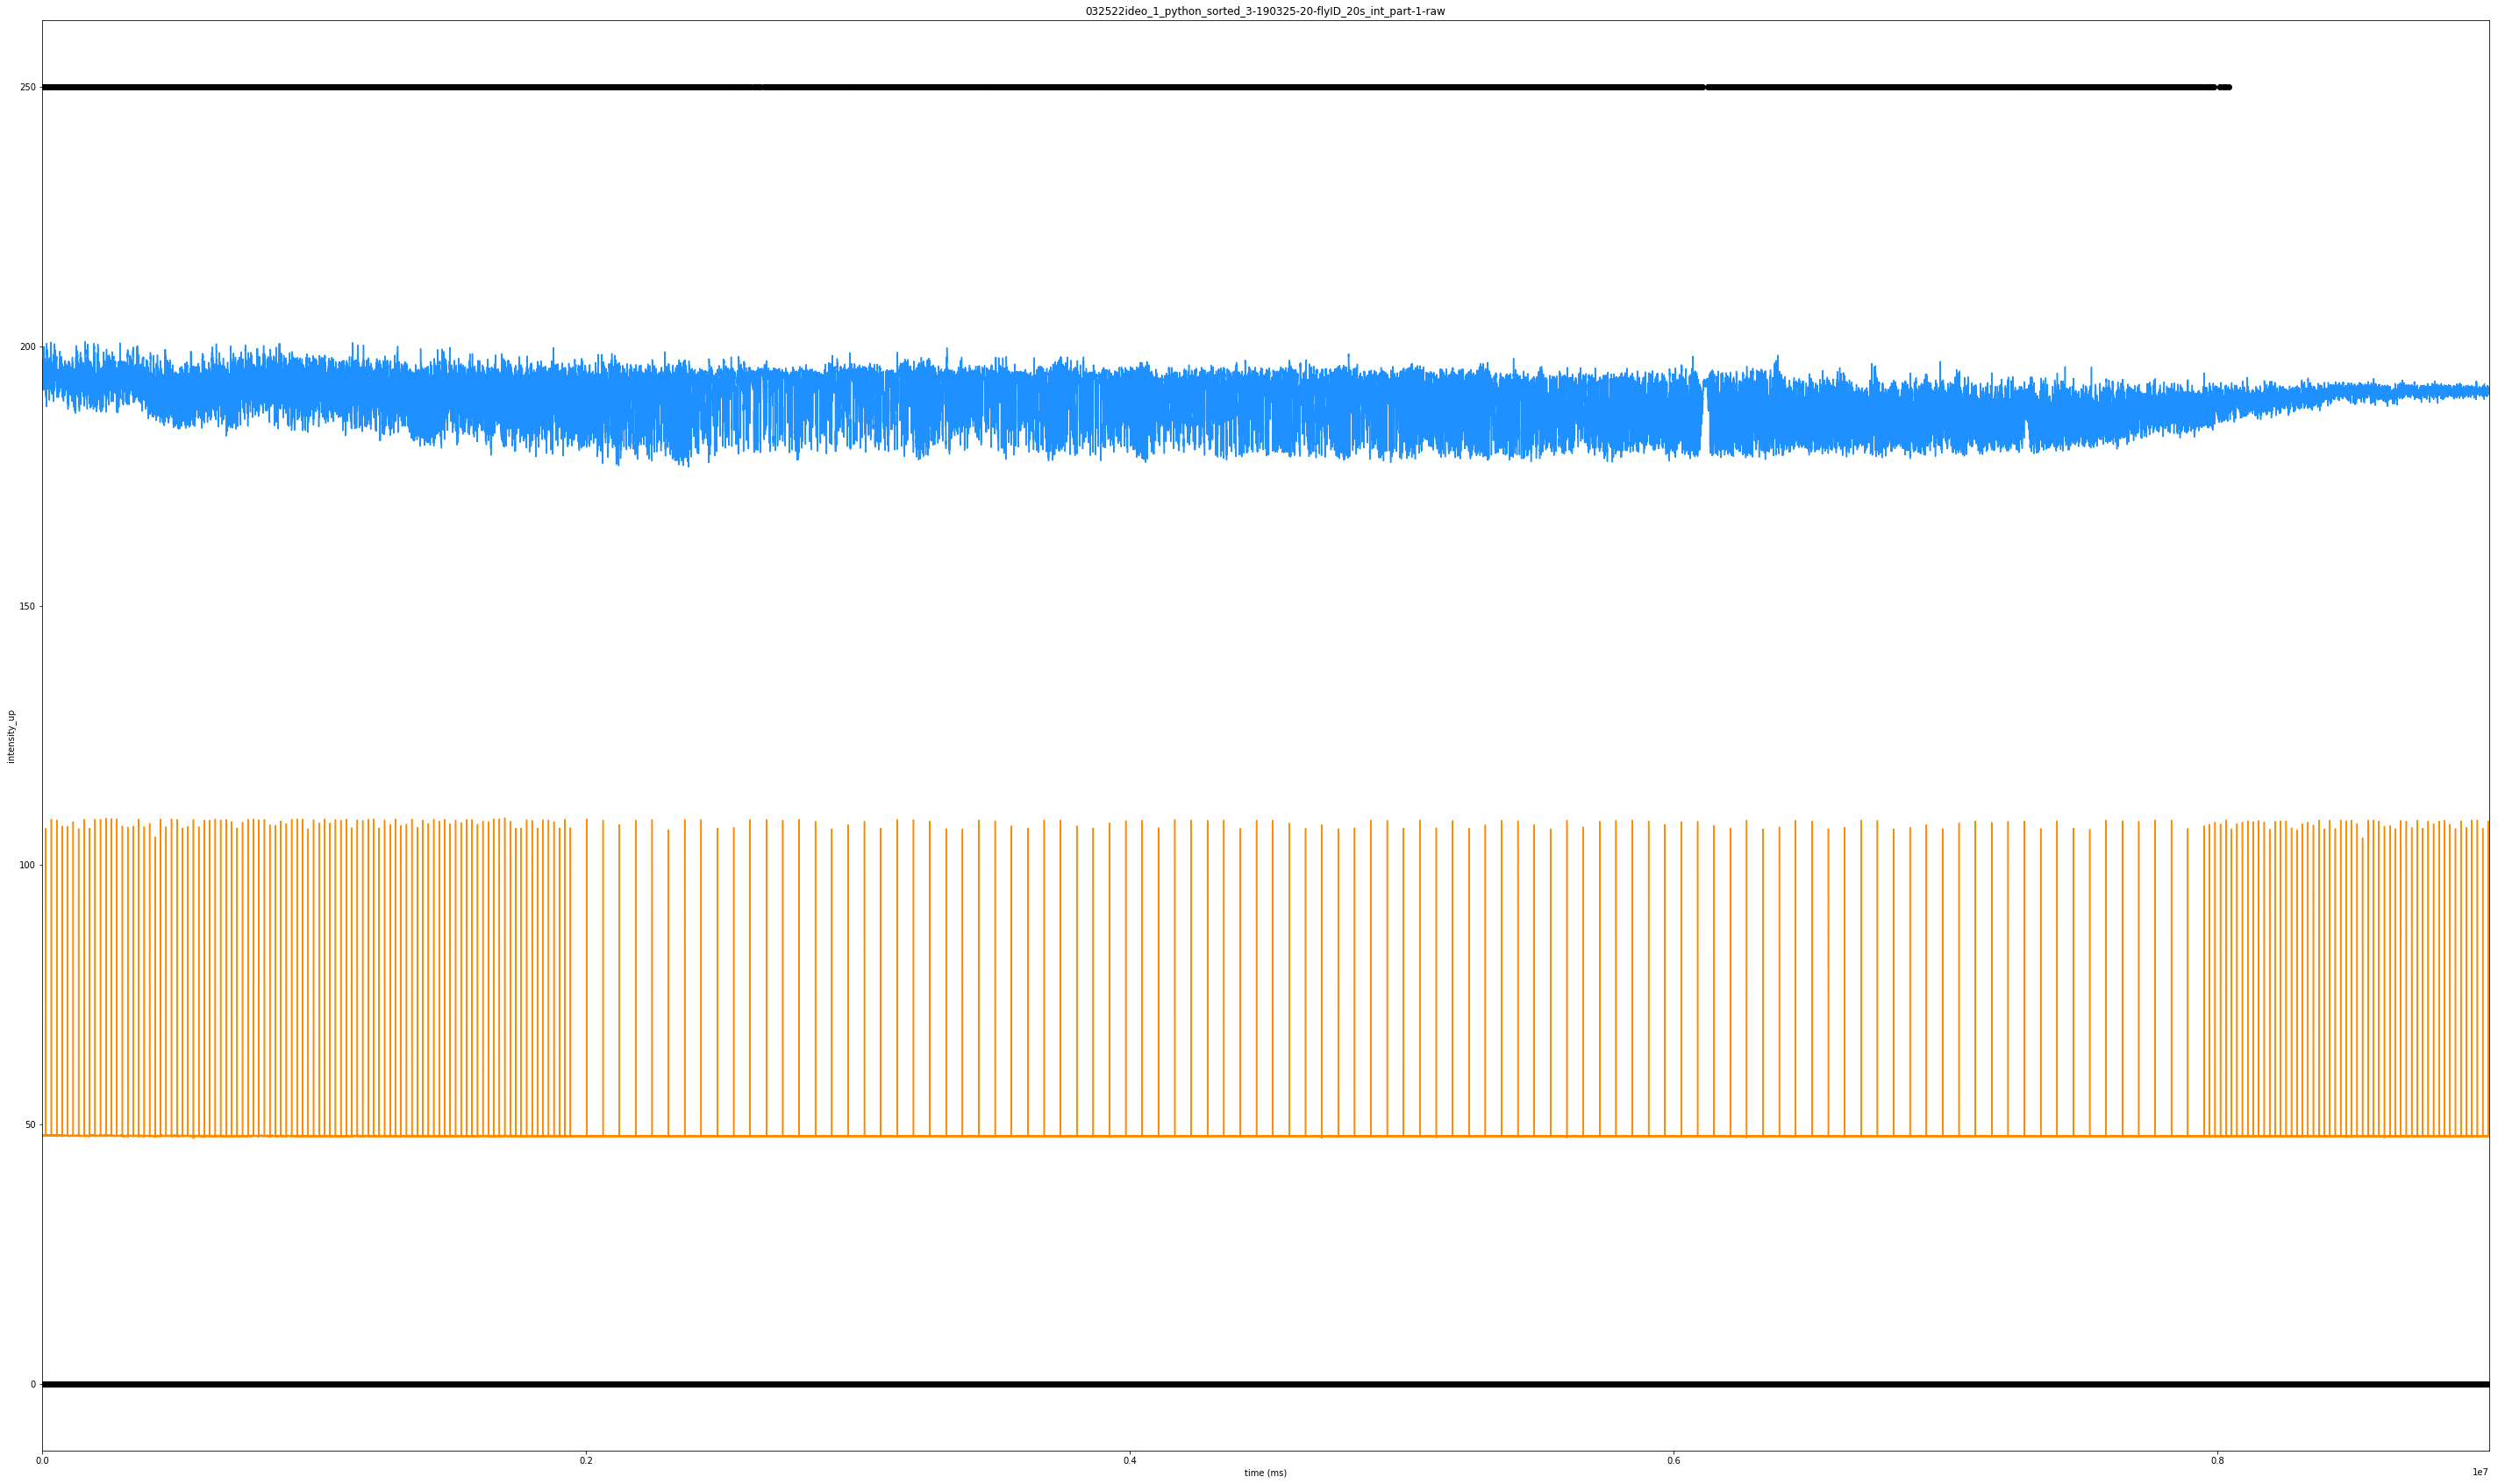

folder there
part-2-raw0325-20


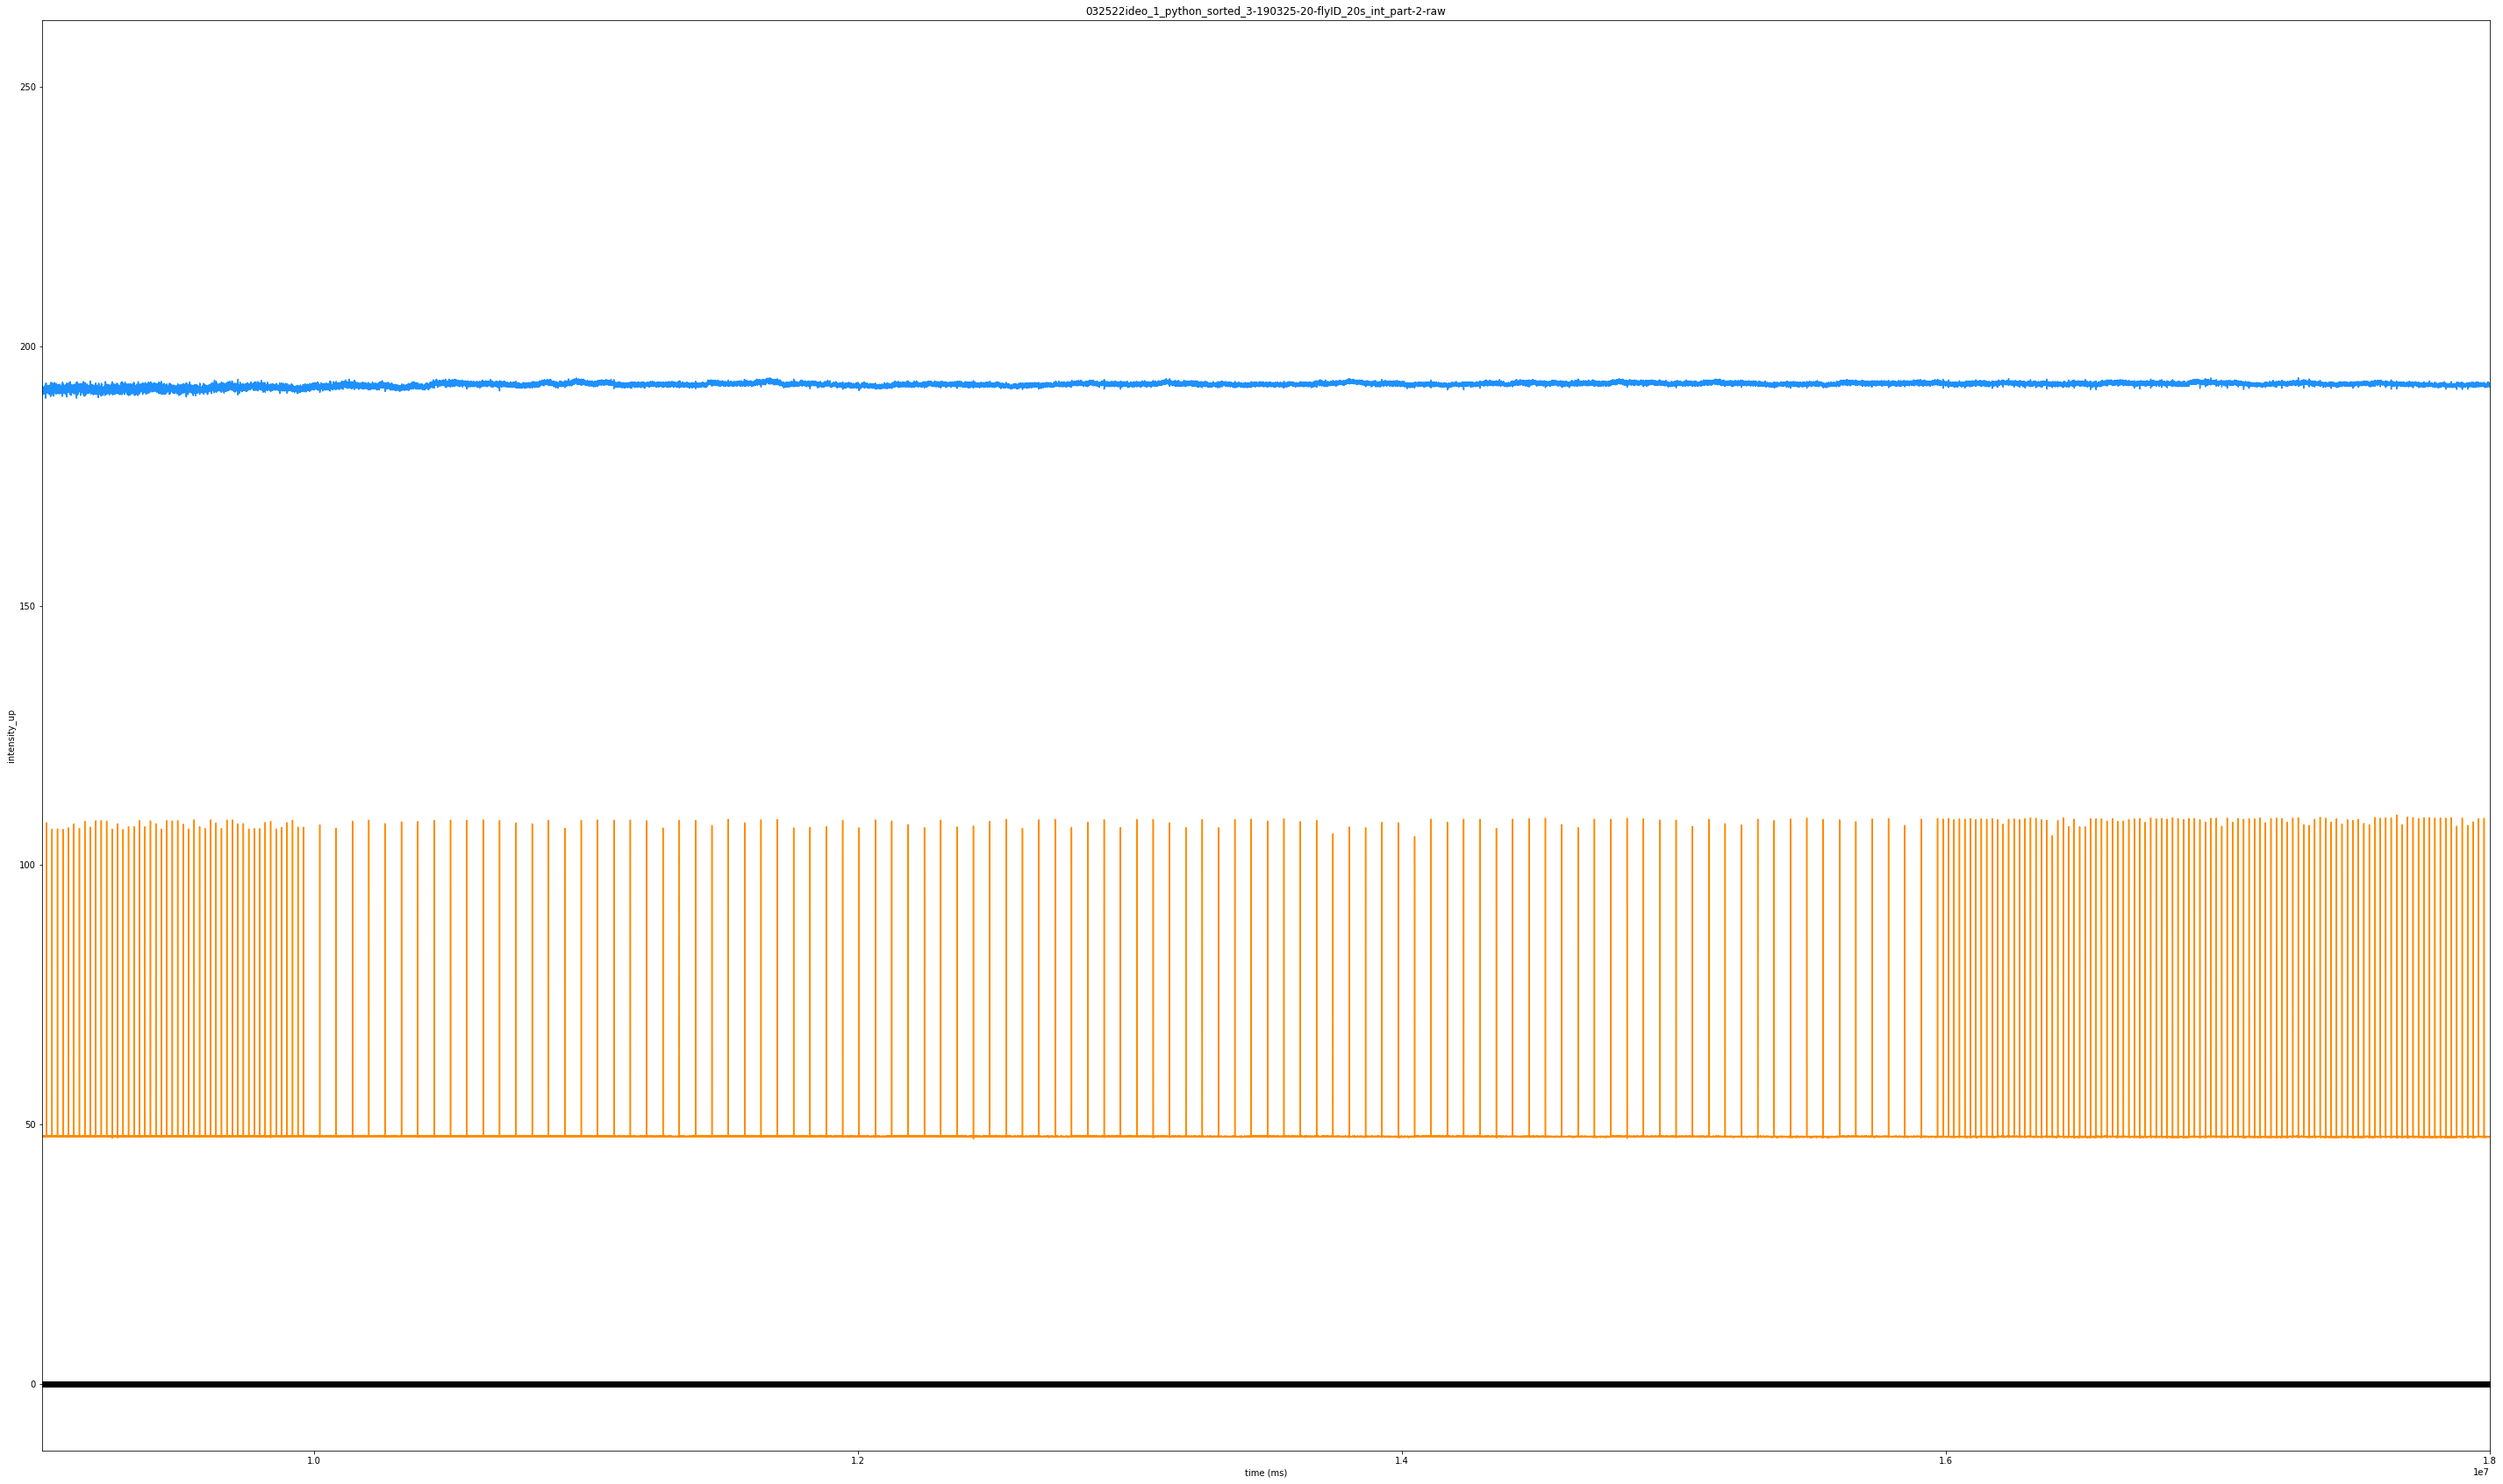

folder there


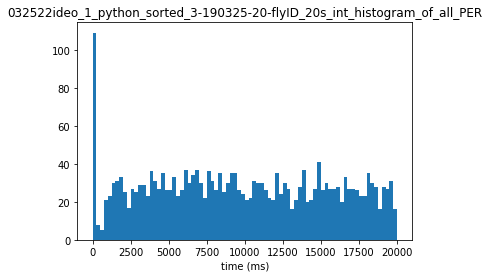

folder there
folder there
('first per time', array([ 1551,  1980,  2508,  1353,  1815,  1254,  1551,  1254,  1980,
        1881,  1089,  1089,  1353,  1584,  1551,  1650,  1221,  1551,
        1617,  4158,  1980,  1155,  1749,  1716,  1452,  1188,  1188,
        1353,  1287,  2607,  1617,  1056,  1254,  2376,  1914,  1221,
        1188,  1353,  3366,  3630,  3531,  1650,  1089,  4488,  1254,
        4455,  3795,  1353,  1848,  4224,  5907,  1914,  2244,  1452,
        1386,  3762,  1914,  1287,  1551,  3432,  1584,  2211,  1947,
        3069,  1419,  3135,  1683,  1188,  1386,  1452,  1023,  1683,
        2706,  1188,  1947,  1353,  1221,  2013,  1881,  2805,  1122,
        1980,  1155,  2739,  1287,  1122,  2079,  1122,  1617,  1386,
        3927,  2508,  2838,  3795,  1386,  3498,  2937,  2904,  3432,
        2475,  2805,  3564,  3168,  2112,  5544,  6534,  4653, 13860,
        1452,  8382,  4323,  1617,  2178,  4884,  1716,  2508,  1551,
        1353,  2442,  6039,  5247,  2277,  15

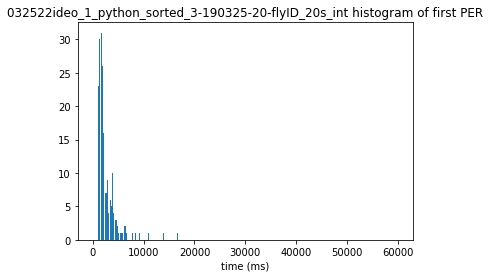

folder there
folder there


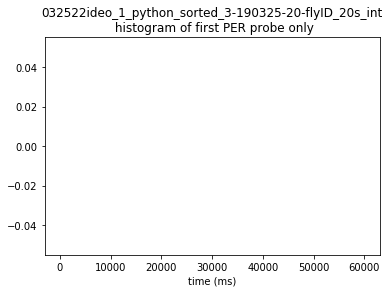

folder there
folder there


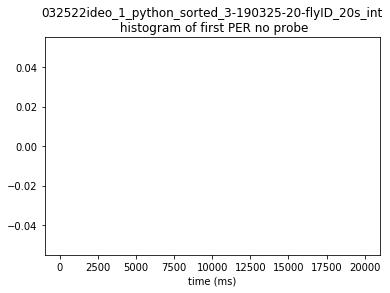

folder there
folder there


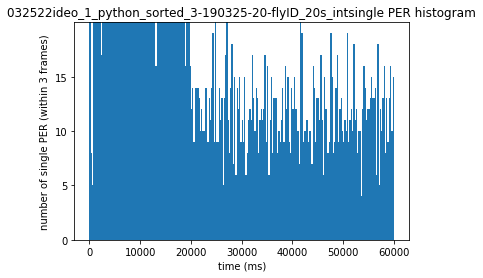

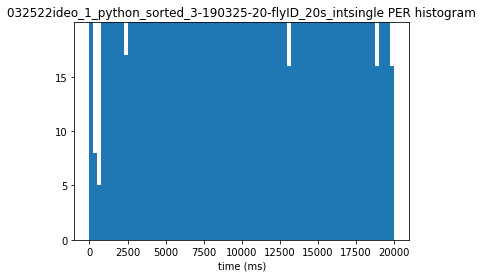

folder there
folder there
[ 610  607  610  609  609  608  609  609  610  608  609  609  610  608
  610  608  609  608  610  609  608  610  609  608  610  609  608  610
  608  609  609  609  609  609  610  608  609  609  609  609  608  609
  610  609  608  609  610  608  609  608  610  609  608  610  609  608
  611  608  609  609  609  609  609  608  609  609  610  609  608  609
  608  611  608  609  608  610  609  608  609  609  609  610  609  609
  609  609  608  609  609  609  609  608  609  609  610  609 1821 1820
 1821 1821 1821 1821 1820 1821 1821 1821 1820 1821 1820 1821 1822 1820
 1820 1821 1822 1820 1821 1820 1821 1821 1822 1819 1822 1819 1822 1821
 1821 1821 1821 1819 1822 1821 1821 1820 1821 1820 1820 1822 1820 1822
 1820 1822 1820 1821 1820 1821 1821 1820 1821 1821 1821 1821 1821 1820
 1821 1820 1821 1822 1820 1821 1820 1822 1820 1822 1820 1820 1821 1820
 1822 1821 1820 1821 1821 1821 1820 1821 1821 1820 1821 1821 1822 1820
 1821 1820 1821 1821 1820 1822 1820 1822 1820 1821 

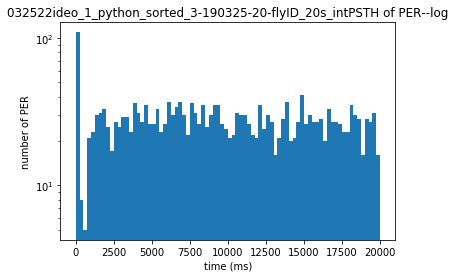

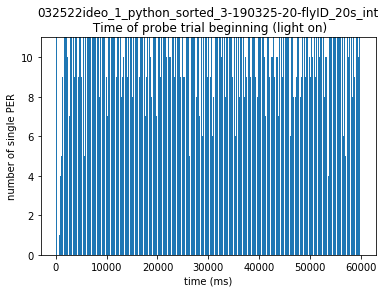

folder there
folder there
('interval list: ', array([ 610,  607,  610,  609,  609,  608,  609,  609,  610,  608,  609,
        609,  610,  608,  610,  608,  609,  608,  610,  609,  608,  610,
        609,  608,  610,  609,  608,  610,  608,  609,  609,  609,  609,
        609,  610,  608,  609,  609,  609,  609,  608,  609,  610,  609,
        608,  609,  610,  608,  609,  608,  610,  609,  608,  610,  609,
        608,  611,  608,  609,  609,  609,  609,  609,  608,  609,  609,
        610,  609,  608,  609,  608,  611,  608,  609,  608,  610,  609,
        608,  609,  609,  609,  610,  609,  609,  609,  609,  608,  609,
        609,  609,  609,  608,  609,  609,  610,  609, 1821, 1820, 1821,
       1821, 1821, 1821, 1820, 1821, 1821, 1821, 1820, 1821, 1820, 1821,
       1822, 1820, 1820, 1821, 1822, 1820, 1821, 1820, 1821, 1821, 1822,
       1819, 1822, 1819, 1822, 1821, 1821, 1821, 1821, 1819, 1822, 1821,
       1821, 1820, 1821, 1820, 1820, 1822, 1820, 1822, 1820, 1822, 1820,
     

IndexError: list index out of range

In [89]:
#6-20-19 edit for scipy peaks--find the onset of the peaks for light and PER

###----Set up stage----
#date = str(raw_input("enter date (MMDDYY): ")) ##change to just input when convert to python 3
#framerate = int(input("enter framerate (# ms between frames (10 or 33)): "))
#smoothed_threshold = float(input("enter thresholding amount for PER (typically 1 (up to 2.5)): "))
#binsize = int(input("enter binsize for histograms in ms (typically 250): "))

binsize = 250
smoothed_threshold = 1
save = 'y'

#### RUNNING THROUGH ALL THE DATA
for data_index in range(len(data_all)):
    data = []
    data = data_all[data_index]
    framerate = framerate_list[data_index]
    interval_ms = interval_ms_list[data_index]

    #to get the video title    
    #video = get_video_name(data, 1)
    video = file_name_list[data_index] 
    video = str(video).strip('Results_').strip('.csv')


    #this gives just the column numbers that contain the word mean
    mean_column = []
    for row in range(len(data)):
        for column in range(len(data[row])):
            if is_column_mean(data, row, column):
                mean_column.append(column)
    print('number of columns with means: ', len(mean_column))
    
    #get the columns that have means and turn them into a new matrix
    columns = []
    means_matrix = []
    for item in mean_column:
        columns.append(get_means(data, item))
    means_matrix = np.vstack(columns).T # converts the list of arrays into a matrix ".T" makes it report tall   
    
    #get the titles for columns that have means and turn them into a new array
    title_collection = []
    mean_titles = []
    for t in mean_column:
        title_collection.append(get_header(data, t))
    mean_titles = np.vstack(title_collection).T
    print(mean_titles)
    
    ##----designate columns by light---- (PER designation is later)
    #find the column number for "light" or "Light"
    light_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_light(mean_titles, row, column):
                light_indices.append(column)
    light_indices = np.array(light_indices)
    light_indices_int = int(light_indices) ##to convert to integer so light_up_50 ends up with only one list and not a list of zeros
    print(light_indices_int)
    
    #get the columns that have means and use them to get the peaks
    columns = []
    peaks_matrix = []
    all_peaks = []
    for mean_index in range(len(mean_column)):
        squeeze_column = []
        single_column = []
        single_column = get_means(data, mean_column[mean_index])
        columns.append(single_column)  #collects the means in columns
        squeeze_column = np.squeeze(single_column)  #to get each element out of their own array and into one array with all elements
        if is_column_light(mean_titles, 0, mean_index):
            #NA changing prominence from .5 to 1
            peaks, _ = scipy.signal.find_peaks(squeeze_column, prominence = .5) #changing to .5 from .05 #7.8.20 changing prominence from .5 to .25 #9.10.19 changed prominence from 3 to 1
            print('light column', mean_titles[0][mean_index])
        else:
            #added height to get it to run without finding peaks
            peaks, _ = scipy.signal.find_peaks(squeeze_column*-1, prominence = 3, distance = 20) #changed disance from 15 to 20, height = .05) #distance is req frames between peaks
            print('not light')     
        all_peaks.append(peaks)
        print('peaks length', len(peaks))
    print('all_peaks shape', np.shape(all_peaks))
    
    
    ##get smoothed means matrix
    #call each column to perform the vectorized smoothing average over 3 frames to see if it changes intensity
        ##Essentially take windowsize number of columns that are off by 1 until get to windowsize (in this case=3)
        ##[begin:end:stride] end is exclusive so if you want to include item #n write n+1. -1 is second to last
        ###NOTE: this will not give a value for the last 2 items (will shorten the array by 2) 
    smoothed_means_matrix = []
    smoothed_means_matrix = means_matrix[:-2]/3 + means_matrix[1:-1]/3 + means_matrix[2:]/3
    #to just see if previous value greater than next value of smoothened array--if the intensity drops
    smoothed_intensity_decreases = []
    smoothed_intensity_decreases = smoothed_means_matrix[:-1]>(smoothed_means_matrix[1:] + smoothed_threshold)
    smoothed_intensity_decreases = smoothed_intensity_decreases.T  #want to stack the other way
    
    #to just see if previous value smaller than next value of smoothened array--if the intensity increases
    smoothed_intensity_increases = []
    smoothed_intensity_increases = smoothed_means_matrix[:-1]<(smoothed_means_matrix[1:] + smoothed_threshold)
    smoothed_intensity_increases = smoothed_intensity_increases.T

    smoothed_increase_index = []
    for column in range(len(smoothed_intensity_increases)):
        true_indices = np.where(smoothed_intensity_increases[column])
        smoothed_increase_index.append(np.squeeze(true_indices))
            
    
    smoothed_decrease_index = []
    for column in range(len(smoothed_intensity_decreases)):
        true_indices = np.where(smoothed_intensity_decreases[column])
        smoothed_decrease_index.append(np.squeeze(true_indices))
           
    
    
    
    ##unsmoothed matrix and unthresholded
    intensity_decreases = []
    intensity_decreases = means_matrix[:-1]>means_matrix[1:]
    intensity_increases = []
    intensity_increases = means_matrix[:-1]<means_matrix[1:]
    #with thresholding 
    ##look for a difference of 50 units (lower sometimes gives artificial intervals)
    intensity_down_50 = []
    intensity_down_50 = means_matrix[:-1]-means_matrix[1:]>=25  #changing this to 25 because I should be able to clean out doubles with peaks and I'd rather not miss one
    intensity_up_50 = []
    intensity_up_50 = means_matrix[1:]-means_matrix[:-1]>=10  #9.10.19 changed from 25 to 10 to see if I can get the light pulses
    
    intensity_up_50 = intensity_up_50.T
    up_50_index = []
    for column in range(len(intensity_up_50)):
        true_indices = np.where(intensity_up_50[column])
        up_50_index.append(np.squeeze(true_indices))
    
    
    #find onset of peaks from scipy peaks and intensity changes
    #onset is found by looking at the frames of peaks and looking for the smoothed_intensity change before that
    #for PER looking for a decrease, for light looking for an increase
    #each per or light can be accessed by means_matrix[:, index of per (column)]
    #I want to look at the peaks values of each column and compare them to the intensity changes of each column (depending on if it is light or not)
    #light index is light_indices
    
    all_onsets_matrix = []
    for mean_item_index in range(len(all_peaks)): #mean item index is light or PERs
        onsets = []
        onset = [] #this should be cleared more often than this, but really I just need to initialize it for my checks
        if mean_item_index == light_indices: #if the index corresponds to light index then use intensity up 50
            for i in range(len(all_peaks[mean_item_index])):
                possible_onset = []
                new_possible_onset = []
                if up_50_index[mean_item_index].size > 1: #if it exists and has more than one element
                    for j in range(len(up_50_index[mean_item_index])):
                        if up_50_index[mean_item_index][j] < all_peaks[mean_item_index][i] and all_peaks[mean_item_index][i]-up_50_index[mean_item_index][j] < 50: #if the value is less than the peak and the onset isn't far from peak (here 20 frames (~660ms for 33ms framerate))
                            possible_onset.append(up_50_index[mean_item_index][j]) #make a list of possible onsets
                        else:
                            possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match
                    if i == 0: #if we are on the first element in peaks_PER
                        if possible_onset: #this will check if possible_onset is an empty list, if it is it will fail
                            onset = possible_onset[0]  #then the onset is the first in the list... this could fail sometimes, but hopefully with frame limit it won't
                    if i > 0: #if it is not the first element
                        #remove the possible onsets that are before the previous peak then take the first one
                        for onset_index in possible_onset:
                            if onset_index > all_peaks[mean_item_index][i-1]:
                                new_possible_onset.append(onset_index)
                                onset = new_possible_onset[0]
                    #to prevent appending empty lists
                    if onset:  #this fails if onset is an empty list and will not append anything
                        onsets.append(onset)  #these are light but will add PER below
        else: #the index is for a PER
            for i in range(len(all_peaks[mean_item_index])):
                possible_onset = []
                new_possible_onset = []
                if smoothed_decrease_index[mean_item_index].size > 1: #if it is not empty or one element
                    for j in range((smoothed_decrease_index[mean_item_index].size)):
                        if smoothed_decrease_index[mean_item_index][j] < all_peaks[mean_item_index][i] and all_peaks[mean_item_index][i] - smoothed_decrease_index[mean_item_index][j] < 50: #if the value is less than the peak and the onset isn't far from peak (here 20 frames (~660ms for 33ms framerate))
                            possible_onset.append(smoothed_decrease_index[mean_item_index][j]) #make a list of possible onsets 
                        else:
                            possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match    
                    if i == 0: #if we are on the first element in peaks_PER
                        if possible_onset: #checks to make sure there is something in possible_onset
                        #onset = possible_onset[0]  #then the onset is the first in the list... this could fail sometimes, but hopefully with frame limit it won't
                            onset = int(np.median(possible_onset)) #needs to be int because it is an index
                    if i > 0: #if it is not the first element
                        #remove the possible onsets that are before the previous peak then take the first one
                        for onset_index in possible_onset:
                            if onset_index > all_peaks[mean_item_index][i-1]:  #I need to fix this in case it is not >. I think skip otherwise?
                                new_possible_onset.append(onset_index)
                                #onset = new_possible_onset[0]  #might be better if this doesn't have to collect the first one everytime, but it should work fine and eliminates the issue if the if statement is not true
                                onset = int(np.median(new_possible_onset)) #needs to be int because it is an index
                    #to prevent appending empty lists
                    if onset:  #this fails if onset is an empty list and will not append anything
                        onsets.append(onset)
        all_onsets_matrix.append(onsets)
        
        
        
        
        
        
    
   



    #convert all_onsets into a boolean
    onsets_boolean = []
    for index in range(len(all_onsets_matrix)):
        boolean_single = []
        for i in range(len(columns[0])): #because it has all of the elements not just the ones with peaks
            if i in all_onsets_matrix[index]: #look through each index and see if it is in the onsets list
                boolean_single.append(True) #if it is replace with true
            else:
                boolean_single.append(False)
        onsets_boolean.append(boolean_single)
    onsets_matrix = np.vstack(onsets_boolean).T  #do I need this?
   
    print('bool peaks', np.shape(onsets_boolean))
    print('col shape', np.shape(columns))
    print('peaks matrix shape', np.shape(peaks_matrix))
    #convert all_peaks boolean to matrix with columns
   
    #needs to be a boolean matrix where TRUE is the index in all_peaks (columns are maintained...currently columns are rows)  
    #print(np.shape(peaks_matrix))


    
# #TO USE INTENSITY UP 50 FOR LIGHT_UP_50   
#     light_up_50 = intensity_up_50[:,light_indices_int]
#     light_up_50 = np.squeeze(np.where(light_up_50))
#     print('light up 50 pre (using intensity): ', light_up_50)
    
    #convert back to variables used in the other code   
    #fix this later so it is less confusing. this is messy
    intensity_up_50 = onsets_matrix #rewrite variable names and change functions later
    smoothed_intensity_decreases = onsets_matrix  ##fix these variables later, 
                   #but for now make everything the same so different functions will use the same peaks info
        
###  TO USE ONSETS FOR LIGHT UP 50    
    light_up_50 = onsets_matrix[:,light_indices_int]   
    light_up_50 = np.squeeze(np.where(light_up_50))
    print('light up 50-pre: ', light_up_50)
    
    
    #In case the light is too dim to get any responses
    if interval_ms != 0 and len(light_up_50) < 1:  #!= is to eliminate no light conditions
        #redo the find peaks with lower threshold requirement--this would require a lot of duplication. I should make functions
        print("ERROR: light up 50 threshold is too low or light is absent")
    
    
    
    #ignore second peak for double flash
    if double_flash == True:
        first_flash_light_up_50 = []
        for i in range(len(light_up_50)-1):
            if i == 0: #always take the first light pulse
                first_flash_light_up_50.append(int(light_up_50[i]))
            if i > 0: #ignore first flash
                if (light_up_50[i+1]-light_up_50[i]) < time_to_discount/framerate:
                    first_flash_light_up_50.append(int(light_up_50[i]))  #ignore second flash
                    print('double, ignore: ', light_up_50[i+1])
                #to get ones where there is no double flash or it isn't captured
                elif ((light_up_50[i+1]-light_up_50[i]) > time_to_discount/framerate) and ((light_up_50[i]-light_up_50[i-1]) > time_to_discount/framerate):
                    first_flash_light_up_50.append(int(light_up_50[i]))
                    print('single flash')
        all_light_up_50 = light_up_50 # store all the light still, this will be saved in a dict further down
        
        light_up_50 = np.array(first_flash_light_up_50)  #overwrite previous light settings
        print('light up 50-post: ', light_up_50)
        
    
    
    
    

    
    
    #it would be nicer if these were functions so it could scale based on the number of PERs detected
    
    PER_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER(mean_titles, row, column):
                PER_indices.append(column)
    PER2_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER2(mean_titles, row, column):
                PER2_indices.append(column)
    PER3_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER3(mean_titles, row, column):
                PER3_indices.append(column)             
    PER4_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER4(mean_titles, row, column):
                PER4_indices.append(column)
    
    PER5_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER5(mean_titles, row, column):
                PER5_indices.append(column)
                
    PER6_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER6(mean_titles, row, column):
                PER6_indices.append(column)
    
    PER7_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER7(mean_titles, row, column):
                PER7_indices.append(column)
    PER8_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER8(mean_titles, row, column):
                PER8_indices.append(column)
                
    PER9_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER9(mean_titles, row, column):
                PER9_indices.append(column)
    
    PER10_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER10(mean_titles, row, column):
                PER10_indices.append(column)



    ##---functions that give analysis AND that need INPUT ---
    print(video)

 
        #get a list of PER to run through (and make the associated fly number list using data_all
    PER_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER(mean_titles, row, column):
                PER_indices.append(column)
    PER2_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER2(mean_titles, row, column):
                PER2_indices.append(column)
    PER3_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER3(mean_titles, row, column):
                PER3_indices.append(column)             
    PER4_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER4(mean_titles, row, column):
                PER4_indices.append(column)
    
    PER5_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER5(mean_titles, row, column):
                PER5_indices.append(column)
                
    PER6_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER6(mean_titles, row, column):
                PER6_indices.append(column)
    
    PER7_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER7(mean_titles, row, column):
                PER7_indices.append(column)
    PER8_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER8(mean_titles, row, column):
                PER8_indices.append(column)
                
    PER9_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER9(mean_titles, row, column):
                PER9_indices.append(column)
    
    PER10_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER10(mean_titles, row, column):
                PER10_indices.append(column)
                     
    PER11_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER11(mean_titles, row, column):
                PER11_indices.append(column)
                
    PER12_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER12(mean_titles, row, column):
                PER12_indices.append(column)
    
    PER13_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER13(mean_titles, row, column):
                PER13_indices.append(column)
    
    PER14_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER14(mean_titles, row, column):
                PER14_indices.append(column)
    
    PER15_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER15(mean_titles, row, column):
                PER15_indices.append(column)
    
    PER16_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER16(mean_titles, row, column):
                PER16_indices.append(column)
    
    PER17_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER17(mean_titles, row, column):
                PER17_indices.append(column)
    PER18_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER18(mean_titles, row, column):
                PER18_indices.append(column)
    PER19_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER19(mean_titles, row, column):
                PER19_indices.append(column)
    PER20_indices = []
    for row in range(len(mean_titles)):
        for column in range(len(mean_titles[row])):
            if is_column_PER20(mean_titles, row, column):
                PER20_indices.append(column)



    ##---functions that give analysis AND that need INPUT ---
    print(video)

    #     #get a list of PER to run through (and make the associated fly number list)
    #     PER_list = []
    #     fly_number_list = []
    #     fly_id_list = []
    #     if len(PER_indices) > 0:
    #         PER_list.append(PER_indices)
    #         fly_number_list.append("fly-1")
    #         fly_id = str(raw_input("enter fly-id for fly 1: "))
    #         fly_id_list.append(fly_id)
    #     if len(PER2_indices) > 0:
    #         PER_list.append(PER2_indices)
    #         fly_number_list.append("fly-2")
    #         fly_id = str(raw_input("enter fly-id for fly 2: "))
    #         fly_id_list.append(fly_id)
    #     if len(PER3_indices) > 0:
    #         PER_list.append(PER3_indices)
    #         fly_number_list.append("fly-3")
    #         fly_id = str(raw_input("enter fly-id for fly 3: "))
    #         fly_id_list.append(fly_id)
    #     if len(PER4_indices) > 0:
    #         PER_list.append(PER4_indices)
    #         fly_number_list.append("fly-4")
    #         fly_id = str(raw_input("enter fly-id for fly 4: "))
    #         fly_id_list.append(fly_id)

        #get a list of PER to run through (and make the associated fly number list using data_all
    PER_list = []
    fly_id_list = []
    if len(PER_indices) > 0:
        PER_list.append(PER_indices)        
        fly_id = fly_number_list[data_index][0]
        fly_id_list.append(fly_id)
    if len(PER2_indices) > 0:
        PER_list.append(PER2_indices)        
        fly_id = fly_number_list[data_index][1]
        fly_id_list.append(fly_id)
    if len(PER3_indices) > 0:
        PER_list.append(PER3_indices)        
        fly_id = fly_number_list[data_index][2]
        fly_id_list.append(fly_id)
    if len(PER4_indices) > 0:
        PER_list.append(PER4_indices)
        fly_id = fly_number_list[data_index][3]
        fly_id_list.append(fly_id)
        
    if len(PER5_indices) > 0:
        PER_list.append(PER5_indices)
        fly_id = fly_number_list[data_index][4]
        fly_id_list.append(fly_id)
        
    if len(PER6_indices) > 0:
        PER_list.append(PER6_indices)
        fly_id = fly_number_list[data_index][5]
        fly_id_list.append(fly_id)
        
    if len(PER7_indices) > 0:
        PER_list.append(PER7_indices)
        fly_id = fly_number_list[data_index][6]
        fly_id_list.append(fly_id)
        
    if len(PER8_indices) > 0:
        PER_list.append(PER8_indices)
        fly_id = fly_number_list[data_index][7]
        fly_id_list.append(fly_id)
        
    if len(PER9_indices) > 0:
        PER_list.append(PER9_indices)
        fly_id = fly_number_list[data_index][8]
        fly_id_list.append(fly_id)
    if len(PER10_indices) > 0:
        PER_list.append(PER10_indices)
        fly_id = fly_number_list[data_index][9]
        fly_id_list.append(fly_id)
    if len(PER11_indices) > 0:
        PER_list.append(PER11_indices)
        fly_id = fly_number_list[data_index][10]
        fly_id_list.append(fly_id)
    if len(PER12_indices) > 0:
        PER_list.append(PER12_indices)
        fly_id = fly_number_list[data_index][11]
        fly_id_list.append(fly_id)
    if len(PER13_indices) > 0:
        PER_list.append(PER13_indices)
        fly_id = fly_number_list[data_index][12]
        fly_id_list.append(fly_id)
    if len(PER14_indices) > 0:
        PER_list.append(PER14_indices)
        fly_id = fly_number_list[data_index][13]
        fly_id_list.append(fly_id)
    if len(PER15_indices) > 0:
        PER_list.append(PER15_indices)
        fly_id = fly_number_list[data_index][14]
        fly_id_list.append(fly_id)
    if len(PER16_indices) > 0:
        PER_list.append(PER16_indices)
        fly_id = fly_number_list[data_index][15]
        fly_id_list.append(fly_id)
    if len(PER17_indices) > 0:
        PER_list.append(PER17_indices)
        fly_id = fly_number_list[data_index][16]
        fly_id_list.append(fly_id)
    if len(PER18_indices) > 0:
        PER_list.append(PER18_indices)
        fly_id = fly_number_list[data_index][17]
        fly_id_list.append(fly_id)
    if len(PER19_indices) > 0:
        PER_list.append(PER19_indices)
        fly_id = fly_number_list[data_index][18]
        fly_id_list.append(fly_id)
    if len(PER20_indices) > 0:
        PER_list.append(PER20_indices)
        fly_id = fly_number_list[data_index][19]
        fly_id_list.append(fly_id)

    #determine if want split raw plots
    #     split = str(raw_input("enter y to make ONLY split raw plots, b to make split and full plots, n for no plots: "))
    #     time_post_light_ms = int(input("enter ms post light to start checking for first PER (typically 1000): "))

    #chosen setting
    split = 'y'
    time_post_light_ms = 1000
    save = 'y'
    save_raw = 'y'
    save_hist = 'y'
    save_first_PER = 'y'
    save_single_hist = 'y'
    save_probe = 'y'
    save_total = 'y'
    save_anticipation = 'y'


#set previously
#interval_ms = int(input("enter interval in ms (if RANDOM or NO LIGHT type 0): "))


    total_PER_smooth = []

    #if normal interval
    if interval_ms != 0:
        #print("normal")
        probe_ms = 3 * interval_ms
        #since interval_s only for title
        interval_s = str(int(interval_ms/1000)) + 's' 
        number_interval_s = int(interval_ms/1000)
        probe_ms_binlength = make_bins(probe_ms, binsize)
        interval_ms_binlength = make_bins(interval_ms, binsize)

        #run through PER list and execute each analysis function
        for index in range(len(PER_list)):

            PER_index = PER_list[index]
            #fly_number = fly_number_list[index]
            fly_number = fly_id_list[index]

            data_dict = {} ##to set up dictionary to store data in for each fly
            data_dict['fly-ID'] = fly_number
            data_dict['framerate'] = framerate
            data_dict['video number'] = str(video).strip('[]')
            data_dict['date'] = str(date)
            data_dict['threshold for smoothing'] = smoothed_threshold
            data_dict['inputed interval (s)'] = number_interval_s
            
            #store all flashes if there is a double flash
            if double_flash == True:
                data_dict['all light without second flash removal'] = all_light_up_50
                data_dict['light with second flash removal'] = light_up_50

            #make raw plots
            make_raw_plots (PER_index, fly_number, split, save_raw)

            #make histogram by light
            make_histogram_by_light (PER_index, fly_number, save_hist)

            #first PER
            get_first_PER (PER_index, fly_number, time_post_light_ms, save_first_PER)
            get_first_PER_probe_only (PER_index, fly_number, time_post_light_ms, save_first_PER)
            get_first_PER_no_probe (PER_index, fly_number, time_post_light_ms, save_first_PER)

            #make single histogram by light
            make_single_PER_histogram_by_light (PER_index, fly_number, save_single_hist)

            #get probe information
            probe_trial_histogram (PER_index, fly_number, save_probe)

            #get total numbers single PER
            single_PER_smooth = []
            single_PER_smooth = get_single_PER_smooth_totals(PER_index, fly_number, save_total)
            total_PER_smooth.append(single_PER_smooth)
            
            

            #get anticipation rate
            get_anticipation_non_random_trial (PER_index, fly_number, save_anticipation)

             #make title
            title = make_title(date, video, fly_number, interval_s)

            #save dictionary
            #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
            dictionaryPath = SavePath + "/" + str(date) + "/dictionary"
            if os.path.exists(dictionaryPath):
                print('folder there')
            else:
                os.makedirs(dictionaryPath)
            with open(os.path.join(dictionaryPath, str(title) + '_dict.pickle'), 'wb') as outfile:
                pickle.dump(data_dict, outfile)

        #to save total PER
        if save_total == 'y':
            header_PER_total = fly_number_list[data_index]
            all_PER_total = [header_PER_total, total_PER_smooth]
            #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
            totalPERPath = SavePath + "/" + str(date) + "/total single PER"
            if os.path.exists(totalPERPath):
                print('folder there')
            else:
                os.makedirs(totalPERPath)
              ##DO NOT CHANGE THIS SAVE TO TITLE
            np.savetxt(os.path.join(totalPERPath, str(date) + str(video).strip('[]') + 'all_flyID' + interval_s + 'total_single_PER.txt'), all_PER_total, fmt='%s')


    #in case of no light flashes or random
    elif interval_ms == 0:
        #ask = str(raw_input("Is this a no light trial? y for yes, r for random "))
        if ask[data_index] == 'y':
            print("no light condition")
            interval_s = '_no_light_condition_'
            total_PER_smooth = []
            for index in range(len(PER_list)):
                data_dict = {} ##to set up dictionary to store data in for each fly
                

                PER_index = PER_list[index]
                #fly_number = fly_number_list[index]
                number_interval_s = int(interval_ms/1000)
                fly_number = fly_id_list[index]
                
                #make raw plots
                make_raw_plots(PER_index, fly_number, save_raw, split)
                
                data_dict['fly-ID'] = fly_number
                data_dict['framerate'] = framerate
                data_dict['video number'] = str(video).strip('[]')
                data_dict['date'] = str(date)
                data_dict['threshold for smoothing'] = smoothed_threshold
                data_dict['inputed interval (s)'] = number_interval_s

                #get total # single PER
                PER_index = np.asarray(PER_index)
                PER_index_int = int(PER_index) ##to convert to integer so ends up with only one list and not a list of zeros
                PER_smooth_out = np.nonzero(smoothed_intensity_decreases[:,PER_index_int])  #light_indices specifies light column
                PER_smooth_out = PER_smooth_out[0]
                PER_smooth_out = np.asarray(PER_smooth_out)
                data_dict['frames PER out--smoothed'] = PER_smooth_out
                
                single_PER_smooth = []
                single_PER_smooth = get_single_PER_smooth_totals(PER_index, fly_number, save_total)
                total_PER_smooth.append(single_PER_smooth)

                 #make title
                title = make_title(date, video, fly_number, interval_s)

                #save dictionary
                
                dictionaryPath = SavePath + "/" + str(date) + "/dictionary"
                if os.path.exists(dictionaryPath):
                    print('dictionary folder there')
                else:
                    os.makedirs(dictionaryPath)
                with open(os.path.join(dictionaryPath, str(title) + '_dict.pickle'), 'wb') as outfile:
                    pickle.dump(data_dict, outfile)

            #to save total PER
            if save_total == 'y':
                header_PER_total = fly_number_list[data_index]
                all_PER_total = [header_PER_total, total_PER_smooth]
                #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
                totalPERPath = SavePath + "/" + str(date) + "/total single PER"
                if os.path.exists(totalPERPath):
                    print('folder there')
                else:
                    os.makedirs(totalPERPath)
                  ##DO NOT CHANGE THIS SAVE TO TITLE
                np.savetxt(os.path.join(totalPERPath, str(date) + str(video).strip('[]') + 'all_flyID' + interval_s + 'total_single_PER.txt'), all_PER_total, fmt='%s')
            else:
                print('total PER not saved')
            #get video information
            #get_video_information(save_probe)




        if ask[data_index] == 'r':
            print("random condition")
            #add random to titles
            interval_ms = 11000
            interval_s = 'random'
            interval_ms_binlength = make_bins(interval_ms, binsize)
            probe_ms_binlength = make_bins(interval_ms, binsize)
            #run through PER list and execute each analysis function
            for index in range(len(PER_list)):
                data_dict = {} ##to set up dictionary to store data in for each fly
                data_dict['inputed interval (s)'] = interval_s
                data_dict['video number'] = str(video).strip('[]')
                PER_index = PER_list[index]
               # fly_number = fly_number_list[index]
                fly_number = fly_id_list[index]
                data_dict['fly-ID'] = fly_number
                #make raw plots
                make_raw_plots(PER_index, fly_number, save_raw, split)

                #make histogram by light
                make_histogram_by_light (PER_index, fly_number, save_hist)

                #first PER
                get_first_PER (PER_index, fly_number, time_post_light_ms, save_first_PER)

                #make single histogram by light
                make_single_PER_histogram_by_light (PER_index, fly_number, save_single_hist)

                #get total numbers single PER
                single_PER_smooth = []
                single_PER_smooth = get_single_PER_smooth_totals(PER_index, fly_number, save_total)
                total_PER_smooth.append(single_PER_smooth)

                #get anticipation rate
                get_anticipation_random_trial (PER_index, fly_number, save_anticipation)

                 #make title
                title = make_title(date, video, fly_number, interval_s)

                #save dictionary
                #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
                dictionaryPath = SavePath + "/" + str(date) + "/dictionary"
                if os.path.exists(dictionaryPath):
                    print('folder there')
                else:
                    os.makedirs(dictionaryPath)
                with open(os.path.join(dictionaryPath, str(title) + '_dict.pickle'), 'wb') as outfile:
                    pickle.dump(data_dict, outfile)

            #to save total PER
            if save_total == 'y':
                header_PER_total = fly_number_list[data_index]
                all_PER_total = [header_PER_total, total_PER_smooth]
                #Path = '/Users/ashsm/Documents/python analysis/new-code-test'
                totalPERPath = SavePath + "/" + str(date) + "/total single PER"
                if os.path.exists(totalPERPath):
                    print('folder there')
                else:
                    os.makedirs(totalPERPath)
                  ##DO NOT CHANGE THIS SAVE TO TITLE
                np.savetxt(os.path.join(totalPERPath, str(date) + str(video).strip('[]') + 'all_flyID' + interval_s + 'total_single_PER.txt'), all_PER_total, fmt='%s')


            #get video information
            get_video_information(save_probe)


In [ ]:
print(peaks)
print(len(all_peaks))
print(all_peaks[1])
print(peaks_matrix)
print(video)
print(light_up_50)